In [39]:
import cv2
import pandas as pd
import os
from tqdm import tqdm
from PIL import Image
import random
# CSV 파일에서 데이터 읽기
df = pd.read_csv(r".\datasetensemblethreshold0.10.csv")
image_id_column = 'image_id'
prediction_column = 'PredictionString'

# 로컬 출력 디렉토리 설정
output_dir = r"./output0.10"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def get_color_for_class(class_id):
    random.seed(class_id)  # 동일한 클래스 ID에 대해 항상 같은 색상을 사용하도록 시드 설정
    return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))


# 각 이미지에 대해 바운딩 박스를 그리는 함수 정의
def draw_bounding_boxes(image_path, predictions):
    print(f"Loading image from path: {image_path}")  # 이미지 경로 출력
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"이미지를 불러올 수 없습니다: {image_path}")
        return None

    predictions = predictions.split()
    for i in range(0, len(predictions), 6):
        class_id = int(predictions[i])
        score = float(predictions[i+1])
        x_min = int(float(predictions[i+2]))
        y_min = int(float(predictions[i+3]))
        x_max = int(float(predictions[i+4]))
        y_max = int(float(predictions[i+5]))
        color = get_color_for_class(class_id)
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)
        label = f'Class: {class_id}, Score: {score:.2f}'
        cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    return image

# CSV 파일을 순회하면서 각 이미지에 대해 바운딩 박스를 그려 저장
for idx, row in tqdm(df.iterrows(), desc="Processing images", total=len(df)):
    image_id = row[image_id_column]
    predictions = row[prediction_column]
    image_path = os.path.join('test', f'{image_id}')  # 이미지 경로 형식에 맞게 수정
    output_image = draw_bounding_boxes(image_path, predictions)
    
    if output_image is not None:
        # OpenCV 이미지를 PIL 이미지로 변환
        output_image_pil = Image.fromarray(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
        output_image_path = os.path.join(output_dir, f"{image_id}")
        
        try:
            output_image_pil.save(output_image_path, format='JPEG')
            print(f"Saved image with bounding boxes: {output_image_path}")
        except Exception as e:
            print(f"Failed to save image: {output_image_path}, error: {e}")
    else:
        print(f"Skipping image due to loading issue: {image_id}")


Processing images:   0%|▏                                                            | 13/4871 [00:00<01:17, 63.03it/s]

Loading image from path: test\test/0000.jpg
Saved image with bounding boxes: ./output0.10\test/0000.jpg
Loading image from path: test\test/0001.jpg
Saved image with bounding boxes: ./output0.10\test/0001.jpg
Loading image from path: test\test/0002.jpg
Saved image with bounding boxes: ./output0.10\test/0002.jpg
Loading image from path: test\test/0003.jpg
Saved image with bounding boxes: ./output0.10\test/0003.jpg
Loading image from path: test\test/0004.jpg
Saved image with bounding boxes: ./output0.10\test/0004.jpg
Loading image from path: test\test/0005.jpg
Saved image with bounding boxes: ./output0.10\test/0005.jpg
Loading image from path: test\test/0006.jpg
Saved image with bounding boxes: ./output0.10\test/0006.jpg
Loading image from path: test\test/0007.jpg
Saved image with bounding boxes: ./output0.10\test/0007.jpg
Loading image from path: test\test/0008.jpg
Saved image with bounding boxes: ./output0.10\test/0008.jpg
Loading image from path: test\test/0009.jpg
Saved image with bou

Processing images:   0%|▎                                                            | 20/4871 [00:00<01:14, 64.69it/s]

Loading image from path: test\test/0013.jpg
Saved image with bounding boxes: ./output0.10\test/0013.jpg
Loading image from path: test\test/0014.jpg
Saved image with bounding boxes: ./output0.10\test/0014.jpg
Loading image from path: test\test/0015.jpg
Saved image with bounding boxes: ./output0.10\test/0015.jpg
Loading image from path: test\test/0016.jpg
Saved image with bounding boxes: ./output0.10\test/0016.jpg
Loading image from path: test\test/0017.jpg
Saved image with bounding boxes: ./output0.10\test/0017.jpg
Loading image from path: test\test/0018.jpg
Saved image with bounding boxes: ./output0.10\test/0018.jpg
Loading image from path: test\test/0019.jpg
Saved image with bounding boxes: ./output0.10\test/0019.jpg
Loading image from path: test\test/0020.jpg
Saved image with bounding boxes: ./output0.10\test/0020.jpg
Loading image from path: test\test/0021.jpg
Saved image with bounding boxes: ./output0.10\test/0021.jpg
Loading image from path: test\test/0022.jpg
Saved image with bou

Processing images:   1%|▍                                                            | 34/4871 [00:00<01:14, 65.01it/s]

Saved image with bounding boxes: ./output0.10\test/0026.jpg
Loading image from path: test\test/0027.jpg
Saved image with bounding boxes: ./output0.10\test/0027.jpg
Loading image from path: test\test/0028.jpg
Saved image with bounding boxes: ./output0.10\test/0028.jpg
Loading image from path: test\test/0029.jpg
Saved image with bounding boxes: ./output0.10\test/0029.jpg
Loading image from path: test\test/0030.jpg
Saved image with bounding boxes: ./output0.10\test/0030.jpg
Loading image from path: test\test/0031.jpg
Saved image with bounding boxes: ./output0.10\test/0031.jpg
Loading image from path: test\test/0032.jpg
Saved image with bounding boxes: ./output0.10\test/0032.jpg
Loading image from path: test\test/0033.jpg
Saved image with bounding boxes: ./output0.10\test/0033.jpg
Loading image from path: test\test/0034.jpg
Saved image with bounding boxes: ./output0.10\test/0034.jpg
Loading image from path: test\test/0035.jpg
Saved image with bounding boxes: ./output0.10\test/0035.jpg
Load

Processing images:   1%|▋                                                            | 50/4871 [00:00<01:08, 70.49it/s]

Saved image with bounding boxes: ./output0.10\test/0040.jpg
Loading image from path: test\test/0041.jpg
Saved image with bounding boxes: ./output0.10\test/0041.jpg
Loading image from path: test\test/0042.jpg
Saved image with bounding boxes: ./output0.10\test/0042.jpg
Loading image from path: test\test/0043.jpg
Saved image with bounding boxes: ./output0.10\test/0043.jpg
Loading image from path: test\test/0044.jpg
Saved image with bounding boxes: ./output0.10\test/0044.jpg
Loading image from path: test\test/0045.jpg
Saved image with bounding boxes: ./output0.10\test/0045.jpg
Loading image from path: test\test/0046.jpg
Saved image with bounding boxes: ./output0.10\test/0046.jpg
Loading image from path: test\test/0047.jpg
Saved image with bounding boxes: ./output0.10\test/0047.jpg
Loading image from path: test\test/0048.jpg
Saved image with bounding boxes: ./output0.10\test/0048.jpg
Loading image from path: test\test/0049.jpg
Saved image with bounding boxes: ./output0.10\test/0049.jpg
Load

Processing images:   1%|▊                                                            | 66/4871 [00:00<01:09, 68.69it/s]

Saved image with bounding boxes: ./output0.10\test/0057.jpg
Loading image from path: test\test/0058.jpg
Saved image with bounding boxes: ./output0.10\test/0058.jpg
Loading image from path: test\test/0059.jpg
Saved image with bounding boxes: ./output0.10\test/0059.jpg
Loading image from path: test\test/0060.jpg
Saved image with bounding boxes: ./output0.10\test/0060.jpg
Loading image from path: test\test/0061.jpg
Saved image with bounding boxes: ./output0.10\test/0061.jpg
Loading image from path: test\test/0062.jpg
Saved image with bounding boxes: ./output0.10\test/0062.jpg
Loading image from path: test\test/0063.jpg
Saved image with bounding boxes: ./output0.10\test/0063.jpg
Loading image from path: test\test/0064.jpg
Saved image with bounding boxes: ./output0.10\test/0064.jpg
Loading image from path: test\test/0065.jpg
Saved image with bounding boxes: ./output0.10\test/0065.jpg
Loading image from path: test\test/0066.jpg
Saved image with bounding boxes: ./output0.10\test/0066.jpg
Load

Processing images:   2%|█                                                            | 82/4871 [00:01<01:07, 70.57it/s]

Saved image with bounding boxes: ./output0.10\test/0072.jpg
Loading image from path: test\test/0073.jpg
Saved image with bounding boxes: ./output0.10\test/0073.jpg
Loading image from path: test\test/0074.jpg
Saved image with bounding boxes: ./output0.10\test/0074.jpg
Loading image from path: test\test/0075.jpg
Saved image with bounding boxes: ./output0.10\test/0075.jpg
Loading image from path: test\test/0076.jpg
Saved image with bounding boxes: ./output0.10\test/0076.jpg
Loading image from path: test\test/0077.jpg
Saved image with bounding boxes: ./output0.10\test/0077.jpg
Loading image from path: test\test/0078.jpg
Saved image with bounding boxes: ./output0.10\test/0078.jpg
Loading image from path: test\test/0079.jpg
Saved image with bounding boxes: ./output0.10\test/0079.jpg
Loading image from path: test\test/0080.jpg
Saved image with bounding boxes: ./output0.10\test/0080.jpg
Loading image from path: test\test/0081.jpg
Saved image with bounding boxes: ./output0.10\test/0081.jpg
Load

Processing images:   2%|█▏                                                           | 98/4871 [00:01<01:06, 71.46it/s]

Saved image with bounding boxes: ./output0.10\test/0087.jpg
Loading image from path: test\test/0088.jpg
Saved image with bounding boxes: ./output0.10\test/0088.jpg
Loading image from path: test\test/0089.jpg
Saved image with bounding boxes: ./output0.10\test/0089.jpg
Loading image from path: test\test/0090.jpg
Saved image with bounding boxes: ./output0.10\test/0090.jpg
Loading image from path: test\test/0091.jpg
Saved image with bounding boxes: ./output0.10\test/0091.jpg
Loading image from path: test\test/0092.jpg
Saved image with bounding boxes: ./output0.10\test/0092.jpg
Loading image from path: test\test/0093.jpg
Saved image with bounding boxes: ./output0.10\test/0093.jpg
Loading image from path: test\test/0094.jpg
Saved image with bounding boxes: ./output0.10\test/0094.jpg
Loading image from path: test\test/0095.jpg
Saved image with bounding boxes: ./output0.10\test/0095.jpg
Loading image from path: test\test/0096.jpg
Saved image with bounding boxes: ./output0.10\test/0096.jpg
Load

Processing images:   2%|█▍                                                          | 114/4871 [00:01<01:05, 72.69it/s]

Saved image with bounding boxes: ./output0.10\test/0103.jpg
Loading image from path: test\test/0104.jpg
Saved image with bounding boxes: ./output0.10\test/0104.jpg
Loading image from path: test\test/0105.jpg
Saved image with bounding boxes: ./output0.10\test/0105.jpg
Loading image from path: test\test/0106.jpg
Saved image with bounding boxes: ./output0.10\test/0106.jpg
Loading image from path: test\test/0107.jpg
Saved image with bounding boxes: ./output0.10\test/0107.jpg
Loading image from path: test\test/0108.jpg
Saved image with bounding boxes: ./output0.10\test/0108.jpg
Loading image from path: test\test/0109.jpg
Saved image with bounding boxes: ./output0.10\test/0109.jpg
Loading image from path: test\test/0110.jpg
Saved image with bounding boxes: ./output0.10\test/0110.jpg
Loading image from path: test\test/0111.jpg
Saved image with bounding boxes: ./output0.10\test/0111.jpg
Loading image from path: test\test/0112.jpg
Saved image with bounding boxes: ./output0.10\test/0112.jpg
Load

Processing images:   3%|█▌                                                          | 130/4871 [00:01<01:08, 69.40it/s]

Saved image with bounding boxes: ./output0.10\test/0118.jpg
Loading image from path: test\test/0119.jpg
Saved image with bounding boxes: ./output0.10\test/0119.jpg
Loading image from path: test\test/0120.jpg
Saved image with bounding boxes: ./output0.10\test/0120.jpg
Loading image from path: test\test/0121.jpg
Saved image with bounding boxes: ./output0.10\test/0121.jpg
Loading image from path: test\test/0122.jpg
Saved image with bounding boxes: ./output0.10\test/0122.jpg
Loading image from path: test\test/0123.jpg
Saved image with bounding boxes: ./output0.10\test/0123.jpg
Loading image from path: test\test/0124.jpg
Saved image with bounding boxes: ./output0.10\test/0124.jpg
Loading image from path: test\test/0125.jpg
Saved image with bounding boxes: ./output0.10\test/0125.jpg
Loading image from path: test\test/0126.jpg
Saved image with bounding boxes: ./output0.10\test/0126.jpg
Loading image from path: test\test/0127.jpg
Saved image with bounding boxes: ./output0.10\test/0127.jpg
Load

Processing images:   3%|█▋                                                          | 137/4871 [00:02<01:13, 64.64it/s]

Saved image with bounding boxes: ./output0.10\test/0131.jpg
Loading image from path: test\test/0132.jpg
Saved image with bounding boxes: ./output0.10\test/0132.jpg
Loading image from path: test\test/0133.jpg
Saved image with bounding boxes: ./output0.10\test/0133.jpg
Loading image from path: test\test/0134.jpg
Saved image with bounding boxes: ./output0.10\test/0134.jpg
Loading image from path: test\test/0135.jpg
Saved image with bounding boxes: ./output0.10\test/0135.jpg
Loading image from path: test\test/0136.jpg
Saved image with bounding boxes: ./output0.10\test/0136.jpg
Loading image from path: test\test/0137.jpg
Saved image with bounding boxes: ./output0.10\test/0137.jpg
Loading image from path: test\test/0138.jpg
Saved image with bounding boxes: ./output0.10\test/0138.jpg
Loading image from path: test\test/0139.jpg
Saved image with bounding boxes: ./output0.10\test/0139.jpg
Loading image from path: test\test/0140.jpg
Saved image with bounding boxes: ./output0.10\test/0140.jpg
Load

Processing images:   3%|█▉                                                          | 153/4871 [00:02<01:09, 68.18it/s]

Loading image from path: test\test/0145.jpg
Saved image with bounding boxes: ./output0.10\test/0145.jpg
Loading image from path: test\test/0146.jpg
Saved image with bounding boxes: ./output0.10\test/0146.jpg
Loading image from path: test\test/0147.jpg
Saved image with bounding boxes: ./output0.10\test/0147.jpg
Loading image from path: test\test/0148.jpg
Saved image with bounding boxes: ./output0.10\test/0148.jpg
Loading image from path: test\test/0149.jpg
Saved image with bounding boxes: ./output0.10\test/0149.jpg
Loading image from path: test\test/0150.jpg
Saved image with bounding boxes: ./output0.10\test/0150.jpg
Loading image from path: test\test/0151.jpg
Saved image with bounding boxes: ./output0.10\test/0151.jpg
Loading image from path: test\test/0152.jpg
Saved image with bounding boxes: ./output0.10\test/0152.jpg
Loading image from path: test\test/0153.jpg
Saved image with bounding boxes: ./output0.10\test/0153.jpg
Loading image from path: test\test/0154.jpg
Saved image with bou

Processing images:   3%|██                                                          | 169/4871 [00:02<01:06, 70.28it/s]

Saved image with bounding boxes: ./output0.10\test/0160.jpg
Loading image from path: test\test/0161.jpg
Saved image with bounding boxes: ./output0.10\test/0161.jpg
Loading image from path: test\test/0162.jpg
Saved image with bounding boxes: ./output0.10\test/0162.jpg
Loading image from path: test\test/0163.jpg
Saved image with bounding boxes: ./output0.10\test/0163.jpg
Loading image from path: test\test/0164.jpg
Saved image with bounding boxes: ./output0.10\test/0164.jpg
Loading image from path: test\test/0165.jpg
Saved image with bounding boxes: ./output0.10\test/0165.jpg
Loading image from path: test\test/0166.jpg
Saved image with bounding boxes: ./output0.10\test/0166.jpg
Loading image from path: test\test/0167.jpg
Saved image with bounding boxes: ./output0.10\test/0167.jpg
Loading image from path: test\test/0168.jpg
Saved image with bounding boxes: ./output0.10\test/0168.jpg
Loading image from path: test\test/0169.jpg
Saved image with bounding boxes: ./output0.10\test/0169.jpg
Load

Processing images:   4%|██▎                                                         | 185/4871 [00:02<01:07, 69.20it/s]

Saved image with bounding boxes: ./output0.10\test/0175.jpg
Loading image from path: test\test/0176.jpg
Saved image with bounding boxes: ./output0.10\test/0176.jpg
Loading image from path: test\test/0177.jpg
Saved image with bounding boxes: ./output0.10\test/0177.jpg
Loading image from path: test\test/0178.jpg
Saved image with bounding boxes: ./output0.10\test/0178.jpg
Loading image from path: test\test/0179.jpg
Saved image with bounding boxes: ./output0.10\test/0179.jpg
Loading image from path: test\test/0180.jpg
Saved image with bounding boxes: ./output0.10\test/0180.jpg
Loading image from path: test\test/0181.jpg
Saved image with bounding boxes: ./output0.10\test/0181.jpg
Loading image from path: test\test/0182.jpg
Saved image with bounding boxes: ./output0.10\test/0182.jpg
Loading image from path: test\test/0183.jpg
Saved image with bounding boxes: ./output0.10\test/0183.jpg
Loading image from path: test\test/0184.jpg
Saved image with bounding boxes: ./output0.10\test/0184.jpg
Load

Processing images:   4%|██▍                                                         | 200/4871 [00:02<01:07, 69.61it/s]

Saved image with bounding boxes: ./output0.10\test/0189.jpg
Loading image from path: test\test/0190.jpg
Saved image with bounding boxes: ./output0.10\test/0190.jpg
Loading image from path: test\test/0191.jpg
Saved image with bounding boxes: ./output0.10\test/0191.jpg
Loading image from path: test\test/0192.jpg
Saved image with bounding boxes: ./output0.10\test/0192.jpg
Loading image from path: test\test/0193.jpg
Saved image with bounding boxes: ./output0.10\test/0193.jpg
Loading image from path: test\test/0194.jpg
Saved image with bounding boxes: ./output0.10\test/0194.jpg
Loading image from path: test\test/0195.jpg
Saved image with bounding boxes: ./output0.10\test/0195.jpg
Loading image from path: test\test/0196.jpg
Saved image with bounding boxes: ./output0.10\test/0196.jpg
Loading image from path: test\test/0197.jpg
Saved image with bounding boxes: ./output0.10\test/0197.jpg
Loading image from path: test\test/0198.jpg
Saved image with bounding boxes: ./output0.10\test/0198.jpg
Load

Processing images:   4%|██▋                                                         | 216/4871 [00:03<01:07, 69.04it/s]

Saved image with bounding boxes: ./output0.10\test/0204.jpg
Loading image from path: test\test/0205.jpg
Saved image with bounding boxes: ./output0.10\test/0205.jpg
Loading image from path: test\test/0206.jpg
Saved image with bounding boxes: ./output0.10\test/0206.jpg
Loading image from path: test\test/0207.jpg
Saved image with bounding boxes: ./output0.10\test/0207.jpg
Loading image from path: test\test/0208.jpg
Saved image with bounding boxes: ./output0.10\test/0208.jpg
Loading image from path: test\test/0209.jpg
Saved image with bounding boxes: ./output0.10\test/0209.jpg
Loading image from path: test\test/0210.jpg
Saved image with bounding boxes: ./output0.10\test/0210.jpg
Loading image from path: test\test/0211.jpg
Saved image with bounding boxes: ./output0.10\test/0211.jpg
Loading image from path: test\test/0212.jpg
Saved image with bounding boxes: ./output0.10\test/0212.jpg
Loading image from path: test\test/0213.jpg
Saved image with bounding boxes: ./output0.10\test/0213.jpg
Load

Processing images:   5%|██▊                                                         | 231/4871 [00:03<01:07, 68.72it/s]

Saved image with bounding boxes: ./output0.10\test/0219.jpg
Loading image from path: test\test/0220.jpg
Saved image with bounding boxes: ./output0.10\test/0220.jpg
Loading image from path: test\test/0221.jpg
Saved image with bounding boxes: ./output0.10\test/0221.jpg
Loading image from path: test\test/0222.jpg
Saved image with bounding boxes: ./output0.10\test/0222.jpg
Loading image from path: test\test/0223.jpg
Saved image with bounding boxes: ./output0.10\test/0223.jpg
Loading image from path: test\test/0224.jpg
Saved image with bounding boxes: ./output0.10\test/0224.jpg
Loading image from path: test\test/0225.jpg
Saved image with bounding boxes: ./output0.10\test/0225.jpg
Loading image from path: test\test/0226.jpg
Saved image with bounding boxes: ./output0.10\test/0226.jpg
Loading image from path: test\test/0227.jpg
Saved image with bounding boxes: ./output0.10\test/0227.jpg
Loading image from path: test\test/0228.jpg
Saved image with bounding boxes: ./output0.10\test/0228.jpg
Load

Processing images:   5%|███                                                         | 247/4871 [00:03<01:06, 69.76it/s]

Saved image with bounding boxes: ./output0.10\test/0233.jpg
Loading image from path: test\test/0234.jpg
Saved image with bounding boxes: ./output0.10\test/0234.jpg
Loading image from path: test\test/0235.jpg
Saved image with bounding boxes: ./output0.10\test/0235.jpg
Loading image from path: test\test/0236.jpg
Saved image with bounding boxes: ./output0.10\test/0236.jpg
Loading image from path: test\test/0237.jpg
Saved image with bounding boxes: ./output0.10\test/0237.jpg
Loading image from path: test\test/0238.jpg
Saved image with bounding boxes: ./output0.10\test/0238.jpg
Loading image from path: test\test/0239.jpg
Saved image with bounding boxes: ./output0.10\test/0239.jpg
Loading image from path: test\test/0240.jpg
Saved image with bounding boxes: ./output0.10\test/0240.jpg
Loading image from path: test\test/0241.jpg
Saved image with bounding boxes: ./output0.10\test/0241.jpg
Loading image from path: test\test/0242.jpg
Saved image with bounding boxes: ./output0.10\test/0242.jpg
Load

Processing images:   5%|███▏                                                        | 255/4871 [00:03<01:04, 71.04it/s]

Loading image from path: test\test/0247.jpg
Saved image with bounding boxes: ./output0.10\test/0247.jpg
Loading image from path: test\test/0248.jpg
Saved image with bounding boxes: ./output0.10\test/0248.jpg
Loading image from path: test\test/0249.jpg
Saved image with bounding boxes: ./output0.10\test/0249.jpg
Loading image from path: test\test/0250.jpg
Saved image with bounding boxes: ./output0.10\test/0250.jpg
Loading image from path: test\test/0251.jpg
Saved image with bounding boxes: ./output0.10\test/0251.jpg
Loading image from path: test\test/0252.jpg
Saved image with bounding boxes: ./output0.10\test/0252.jpg
Loading image from path: test\test/0253.jpg
Saved image with bounding boxes: ./output0.10\test/0253.jpg
Loading image from path: test\test/0254.jpg
Saved image with bounding boxes: ./output0.10\test/0254.jpg
Loading image from path: test\test/0255.jpg
Saved image with bounding boxes: ./output0.10\test/0255.jpg
Loading image from path: test\test/0256.jpg
Saved image with bou

Processing images:   6%|███▎                                                        | 271/4871 [00:03<01:05, 70.37it/s]

Saved image with bounding boxes: ./output0.10\test/0262.jpg
Loading image from path: test\test/0263.jpg
Saved image with bounding boxes: ./output0.10\test/0263.jpg
Loading image from path: test\test/0264.jpg
Saved image with bounding boxes: ./output0.10\test/0264.jpg
Loading image from path: test\test/0265.jpg
Saved image with bounding boxes: ./output0.10\test/0265.jpg
Loading image from path: test\test/0266.jpg
Saved image with bounding boxes: ./output0.10\test/0266.jpg
Loading image from path: test\test/0267.jpg
Saved image with bounding boxes: ./output0.10\test/0267.jpg
Loading image from path: test\test/0268.jpg
Saved image with bounding boxes: ./output0.10\test/0268.jpg
Loading image from path: test\test/0269.jpg
Saved image with bounding boxes: ./output0.10\test/0269.jpg
Loading image from path: test\test/0270.jpg
Saved image with bounding boxes: ./output0.10\test/0270.jpg
Loading image from path: test\test/0271.jpg
Saved image with bounding boxes: ./output0.10\test/0271.jpg
Load

Processing images:   6%|███▌                                                        | 286/4871 [00:04<01:06, 69.25it/s]

Saved image with bounding boxes: ./output0.10\test/0276.jpg
Loading image from path: test\test/0277.jpg
Saved image with bounding boxes: ./output0.10\test/0277.jpg
Loading image from path: test\test/0278.jpg
Saved image with bounding boxes: ./output0.10\test/0278.jpg
Loading image from path: test\test/0279.jpg
Saved image with bounding boxes: ./output0.10\test/0279.jpg
Loading image from path: test\test/0280.jpg
Saved image with bounding boxes: ./output0.10\test/0280.jpg
Loading image from path: test\test/0281.jpg
Saved image with bounding boxes: ./output0.10\test/0281.jpg
Loading image from path: test\test/0282.jpg
Saved image with bounding boxes: ./output0.10\test/0282.jpg
Loading image from path: test\test/0283.jpg
Saved image with bounding boxes: ./output0.10\test/0283.jpg
Loading image from path: test\test/0284.jpg
Saved image with bounding boxes: ./output0.10\test/0284.jpg
Loading image from path: test\test/0285.jpg
Saved image with bounding boxes: ./output0.10\test/0285.jpg
Load

Processing images:   6%|███▋                                                        | 301/4871 [00:04<01:04, 70.71it/s]

Saved image with bounding boxes: ./output0.10\test/0290.jpg
Loading image from path: test\test/0291.jpg
Saved image with bounding boxes: ./output0.10\test/0291.jpg
Loading image from path: test\test/0292.jpg
Saved image with bounding boxes: ./output0.10\test/0292.jpg
Loading image from path: test\test/0293.jpg
Saved image with bounding boxes: ./output0.10\test/0293.jpg
Loading image from path: test\test/0294.jpg
Saved image with bounding boxes: ./output0.10\test/0294.jpg
Loading image from path: test\test/0295.jpg
Saved image with bounding boxes: ./output0.10\test/0295.jpg
Loading image from path: test\test/0296.jpg
Saved image with bounding boxes: ./output0.10\test/0296.jpg
Loading image from path: test\test/0297.jpg
Saved image with bounding boxes: ./output0.10\test/0297.jpg
Loading image from path: test\test/0298.jpg
Saved image with bounding boxes: ./output0.10\test/0298.jpg
Loading image from path: test\test/0299.jpg
Saved image with bounding boxes: ./output0.10\test/0299.jpg
Load

Processing images:   7%|███▉                                                        | 317/4871 [00:04<01:05, 69.75it/s]

Saved image with bounding boxes: ./output0.10\test/0305.jpg
Loading image from path: test\test/0306.jpg
Saved image with bounding boxes: ./output0.10\test/0306.jpg
Loading image from path: test\test/0307.jpg
Saved image with bounding boxes: ./output0.10\test/0307.jpg
Loading image from path: test\test/0308.jpg
Saved image with bounding boxes: ./output0.10\test/0308.jpg
Loading image from path: test\test/0309.jpg
Saved image with bounding boxes: ./output0.10\test/0309.jpg
Loading image from path: test\test/0310.jpg
Saved image with bounding boxes: ./output0.10\test/0310.jpg
Loading image from path: test\test/0311.jpg
Saved image with bounding boxes: ./output0.10\test/0311.jpg
Loading image from path: test\test/0312.jpg
Saved image with bounding boxes: ./output0.10\test/0312.jpg
Loading image from path: test\test/0313.jpg
Saved image with bounding boxes: ./output0.10\test/0313.jpg
Loading image from path: test\test/0314.jpg
Saved image with bounding boxes: ./output0.10\test/0314.jpg
Load

Processing images:   7%|████                                                        | 333/4871 [00:04<01:04, 70.60it/s]

Saved image with bounding boxes: ./output0.10\test/0319.jpg
Loading image from path: test\test/0320.jpg
Saved image with bounding boxes: ./output0.10\test/0320.jpg
Loading image from path: test\test/0321.jpg
Saved image with bounding boxes: ./output0.10\test/0321.jpg
Loading image from path: test\test/0322.jpg
Saved image with bounding boxes: ./output0.10\test/0322.jpg
Loading image from path: test\test/0323.jpg
Saved image with bounding boxes: ./output0.10\test/0323.jpg
Loading image from path: test\test/0324.jpg
Saved image with bounding boxes: ./output0.10\test/0324.jpg
Loading image from path: test\test/0325.jpg
Saved image with bounding boxes: ./output0.10\test/0325.jpg
Loading image from path: test\test/0326.jpg
Saved image with bounding boxes: ./output0.10\test/0326.jpg
Loading image from path: test\test/0327.jpg
Saved image with bounding boxes: ./output0.10\test/0327.jpg
Loading image from path: test\test/0328.jpg
Saved image with bounding boxes: ./output0.10\test/0328.jpg
Load

Processing images:   7%|████▎                                                       | 349/4871 [00:05<01:04, 69.65it/s]

Saved image with bounding boxes: ./output0.10\test/0335.jpg
Loading image from path: test\test/0336.jpg
Saved image with bounding boxes: ./output0.10\test/0336.jpg
Loading image from path: test\test/0337.jpg
Saved image with bounding boxes: ./output0.10\test/0337.jpg
Loading image from path: test\test/0338.jpg
Saved image with bounding boxes: ./output0.10\test/0338.jpg
Loading image from path: test\test/0339.jpg
Saved image with bounding boxes: ./output0.10\test/0339.jpg
Loading image from path: test\test/0340.jpg
Saved image with bounding boxes: ./output0.10\test/0340.jpg
Loading image from path: test\test/0341.jpg
Saved image with bounding boxes: ./output0.10\test/0341.jpg
Loading image from path: test\test/0342.jpg
Saved image with bounding boxes: ./output0.10\test/0342.jpg
Loading image from path: test\test/0343.jpg
Saved image with bounding boxes: ./output0.10\test/0343.jpg
Loading image from path: test\test/0344.jpg
Saved image with bounding boxes: ./output0.10\test/0344.jpg
Load

Processing images:   7%|████▍                                                       | 357/4871 [00:05<01:04, 69.97it/s]

Loading image from path: test\test/0349.jpg
Saved image with bounding boxes: ./output0.10\test/0349.jpg
Loading image from path: test\test/0350.jpg
Saved image with bounding boxes: ./output0.10\test/0350.jpg
Loading image from path: test\test/0351.jpg
Saved image with bounding boxes: ./output0.10\test/0351.jpg
Loading image from path: test\test/0352.jpg
Saved image with bounding boxes: ./output0.10\test/0352.jpg
Loading image from path: test\test/0353.jpg
Saved image with bounding boxes: ./output0.10\test/0353.jpg
Loading image from path: test\test/0354.jpg
Saved image with bounding boxes: ./output0.10\test/0354.jpg
Loading image from path: test\test/0355.jpg
Saved image with bounding boxes: ./output0.10\test/0355.jpg
Loading image from path: test\test/0356.jpg
Saved image with bounding boxes: ./output0.10\test/0356.jpg
Loading image from path: test\test/0357.jpg
Saved image with bounding boxes: ./output0.10\test/0357.jpg
Loading image from path: test\test/0358.jpg
Saved image with bou

Processing images:   8%|████▌                                                       | 373/4871 [00:05<01:03, 70.46it/s]

Saved image with bounding boxes: ./output0.10\test/0362.jpg
Loading image from path: test\test/0363.jpg
Saved image with bounding boxes: ./output0.10\test/0363.jpg
Loading image from path: test\test/0364.jpg
Saved image with bounding boxes: ./output0.10\test/0364.jpg
Loading image from path: test\test/0365.jpg
Saved image with bounding boxes: ./output0.10\test/0365.jpg
Loading image from path: test\test/0366.jpg
Saved image with bounding boxes: ./output0.10\test/0366.jpg
Loading image from path: test\test/0367.jpg
Saved image with bounding boxes: ./output0.10\test/0367.jpg
Loading image from path: test\test/0368.jpg
Saved image with bounding boxes: ./output0.10\test/0368.jpg
Loading image from path: test\test/0369.jpg
Saved image with bounding boxes: ./output0.10\test/0369.jpg
Loading image from path: test\test/0370.jpg
Saved image with bounding boxes: ./output0.10\test/0370.jpg
Loading image from path: test\test/0371.jpg
Saved image with bounding boxes: ./output0.10\test/0371.jpg
Load

Processing images:   8%|████▊                                                       | 388/4871 [00:05<01:06, 67.29it/s]

Saved image with bounding boxes: ./output0.10\test/0377.jpg
Loading image from path: test\test/0378.jpg
Saved image with bounding boxes: ./output0.10\test/0378.jpg
Loading image from path: test\test/0379.jpg
Saved image with bounding boxes: ./output0.10\test/0379.jpg
Loading image from path: test\test/0380.jpg
Saved image with bounding boxes: ./output0.10\test/0380.jpg
Loading image from path: test\test/0381.jpg
Saved image with bounding boxes: ./output0.10\test/0381.jpg
Loading image from path: test\test/0382.jpg
Saved image with bounding boxes: ./output0.10\test/0382.jpg
Loading image from path: test\test/0383.jpg
Saved image with bounding boxes: ./output0.10\test/0383.jpg
Loading image from path: test\test/0384.jpg
Saved image with bounding boxes: ./output0.10\test/0384.jpg
Loading image from path: test\test/0385.jpg
Saved image with bounding boxes: ./output0.10\test/0385.jpg
Loading image from path: test\test/0386.jpg
Saved image with bounding boxes: ./output0.10\test/0386.jpg
Load

Processing images:   8%|████▉                                                       | 403/4871 [00:05<01:03, 69.87it/s]

Saved image with bounding boxes: ./output0.10\test/0392.jpg
Loading image from path: test\test/0393.jpg
Saved image with bounding boxes: ./output0.10\test/0393.jpg
Loading image from path: test\test/0394.jpg
Saved image with bounding boxes: ./output0.10\test/0394.jpg
Loading image from path: test\test/0395.jpg
Saved image with bounding boxes: ./output0.10\test/0395.jpg
Loading image from path: test\test/0396.jpg
Saved image with bounding boxes: ./output0.10\test/0396.jpg
Loading image from path: test\test/0397.jpg
Saved image with bounding boxes: ./output0.10\test/0397.jpg
Loading image from path: test\test/0398.jpg
Saved image with bounding boxes: ./output0.10\test/0398.jpg
Loading image from path: test\test/0399.jpg
Saved image with bounding boxes: ./output0.10\test/0399.jpg
Loading image from path: test\test/0400.jpg
Saved image with bounding boxes: ./output0.10\test/0400.jpg
Loading image from path: test\test/0401.jpg
Saved image with bounding boxes: ./output0.10\test/0401.jpg
Load

Processing images:   9%|█████▏                                                      | 419/4871 [00:06<01:03, 70.45it/s]

Saved image with bounding boxes: ./output0.10\test/0407.jpg
Loading image from path: test\test/0408.jpg
Saved image with bounding boxes: ./output0.10\test/0408.jpg
Loading image from path: test\test/0409.jpg
Saved image with bounding boxes: ./output0.10\test/0409.jpg
Loading image from path: test\test/0410.jpg
Saved image with bounding boxes: ./output0.10\test/0410.jpg
Loading image from path: test\test/0411.jpg
Saved image with bounding boxes: ./output0.10\test/0411.jpg
Loading image from path: test\test/0412.jpg
Saved image with bounding boxes: ./output0.10\test/0412.jpg
Loading image from path: test\test/0413.jpg
Saved image with bounding boxes: ./output0.10\test/0413.jpg
Loading image from path: test\test/0414.jpg
Saved image with bounding boxes: ./output0.10\test/0414.jpg
Loading image from path: test\test/0415.jpg
Saved image with bounding boxes: ./output0.10\test/0415.jpg
Loading image from path: test\test/0416.jpg
Saved image with bounding boxes: ./output0.10\test/0416.jpg
Load

Processing images:   9%|█████▎                                                      | 435/4871 [00:06<01:03, 70.28it/s]

Saved image with bounding boxes: ./output0.10\test/0422.jpg
Loading image from path: test\test/0423.jpg
Saved image with bounding boxes: ./output0.10\test/0423.jpg
Loading image from path: test\test/0424.jpg
Saved image with bounding boxes: ./output0.10\test/0424.jpg
Loading image from path: test\test/0425.jpg
Saved image with bounding boxes: ./output0.10\test/0425.jpg
Loading image from path: test\test/0426.jpg
Saved image with bounding boxes: ./output0.10\test/0426.jpg
Loading image from path: test\test/0427.jpg
Saved image with bounding boxes: ./output0.10\test/0427.jpg
Loading image from path: test\test/0428.jpg
Saved image with bounding boxes: ./output0.10\test/0428.jpg
Loading image from path: test\test/0429.jpg
Saved image with bounding boxes: ./output0.10\test/0429.jpg
Loading image from path: test\test/0430.jpg
Saved image with bounding boxes: ./output0.10\test/0430.jpg
Loading image from path: test\test/0431.jpg
Saved image with bounding boxes: ./output0.10\test/0431.jpg
Load

Processing images:   9%|█████▌                                                      | 450/4871 [00:06<01:03, 69.32it/s]

Saved image with bounding boxes: ./output0.10\test/0436.jpg
Loading image from path: test\test/0437.jpg
Saved image with bounding boxes: ./output0.10\test/0437.jpg
Loading image from path: test\test/0438.jpg
Saved image with bounding boxes: ./output0.10\test/0438.jpg
Loading image from path: test\test/0439.jpg
Saved image with bounding boxes: ./output0.10\test/0439.jpg
Loading image from path: test\test/0440.jpg
Saved image with bounding boxes: ./output0.10\test/0440.jpg
Loading image from path: test\test/0441.jpg
Saved image with bounding boxes: ./output0.10\test/0441.jpg
Loading image from path: test\test/0442.jpg
Saved image with bounding boxes: ./output0.10\test/0442.jpg
Loading image from path: test\test/0443.jpg
Saved image with bounding boxes: ./output0.10\test/0443.jpg
Loading image from path: test\test/0444.jpg
Saved image with bounding boxes: ./output0.10\test/0444.jpg
Loading image from path: test\test/0445.jpg
Saved image with bounding boxes: ./output0.10\test/0445.jpg
Load

Processing images:   9%|█████▋                                                      | 458/4871 [00:06<01:03, 69.96it/s]

Loading image from path: test\test/0450.jpg
Saved image with bounding boxes: ./output0.10\test/0450.jpg
Loading image from path: test\test/0451.jpg
Saved image with bounding boxes: ./output0.10\test/0451.jpg
Loading image from path: test\test/0452.jpg
Saved image with bounding boxes: ./output0.10\test/0452.jpg
Loading image from path: test\test/0453.jpg
Saved image with bounding boxes: ./output0.10\test/0453.jpg
Loading image from path: test\test/0454.jpg
Saved image with bounding boxes: ./output0.10\test/0454.jpg
Loading image from path: test\test/0455.jpg
Saved image with bounding boxes: ./output0.10\test/0455.jpg
Loading image from path: test\test/0456.jpg
Saved image with bounding boxes: ./output0.10\test/0456.jpg
Loading image from path: test\test/0457.jpg
Saved image with bounding boxes: ./output0.10\test/0457.jpg
Loading image from path: test\test/0458.jpg
Saved image with bounding boxes: ./output0.10\test/0458.jpg
Loading image from path: test\test/0459.jpg
Saved image with bou

Processing images:  10%|█████▊                                                      | 472/4871 [00:06<01:03, 69.15it/s]

Saved image with bounding boxes: ./output0.10\test/0464.jpg
Loading image from path: test\test/0465.jpg
Saved image with bounding boxes: ./output0.10\test/0465.jpg
Loading image from path: test\test/0466.jpg
Saved image with bounding boxes: ./output0.10\test/0466.jpg
Loading image from path: test\test/0467.jpg
Saved image with bounding boxes: ./output0.10\test/0467.jpg
Loading image from path: test\test/0468.jpg
Saved image with bounding boxes: ./output0.10\test/0468.jpg
Loading image from path: test\test/0469.jpg
Saved image with bounding boxes: ./output0.10\test/0469.jpg
Loading image from path: test\test/0470.jpg
Saved image with bounding boxes: ./output0.10\test/0470.jpg
Loading image from path: test\test/0471.jpg
Saved image with bounding boxes: ./output0.10\test/0471.jpg
Loading image from path: test\test/0472.jpg
Saved image with bounding boxes: ./output0.10\test/0472.jpg
Loading image from path: test\test/0473.jpg
Saved image with bounding boxes: ./output0.10\test/0473.jpg
Load

Processing images:  10%|█████▉                                                      | 487/4871 [00:07<01:03, 69.27it/s]

Loading image from path: test\test/0479.jpg
Saved image with bounding boxes: ./output0.10\test/0479.jpg
Loading image from path: test\test/0480.jpg
Saved image with bounding boxes: ./output0.10\test/0480.jpg
Loading image from path: test\test/0481.jpg
Saved image with bounding boxes: ./output0.10\test/0481.jpg
Loading image from path: test\test/0482.jpg
Saved image with bounding boxes: ./output0.10\test/0482.jpg
Loading image from path: test\test/0483.jpg
Saved image with bounding boxes: ./output0.10\test/0483.jpg
Loading image from path: test\test/0484.jpg
Saved image with bounding boxes: ./output0.10\test/0484.jpg
Loading image from path: test\test/0485.jpg
Saved image with bounding boxes: ./output0.10\test/0485.jpg
Loading image from path: test\test/0486.jpg
Saved image with bounding boxes: ./output0.10\test/0486.jpg
Loading image from path: test\test/0487.jpg
Saved image with bounding boxes: ./output0.10\test/0487.jpg
Loading image from path: test\test/0488.jpg
Saved image with bou

Processing images:  10%|██████▏                                                     | 501/4871 [00:07<01:04, 68.27it/s]

Saved image with bounding boxes: ./output0.10\test/0492.jpg
Loading image from path: test\test/0493.jpg
Saved image with bounding boxes: ./output0.10\test/0493.jpg
Loading image from path: test\test/0494.jpg
Saved image with bounding boxes: ./output0.10\test/0494.jpg
Loading image from path: test\test/0495.jpg
Saved image with bounding boxes: ./output0.10\test/0495.jpg
Loading image from path: test\test/0496.jpg
Saved image with bounding boxes: ./output0.10\test/0496.jpg
Loading image from path: test\test/0497.jpg
Saved image with bounding boxes: ./output0.10\test/0497.jpg
Loading image from path: test\test/0498.jpg
Saved image with bounding boxes: ./output0.10\test/0498.jpg
Loading image from path: test\test/0499.jpg
Saved image with bounding boxes: ./output0.10\test/0499.jpg
Loading image from path: test\test/0500.jpg
Saved image with bounding boxes: ./output0.10\test/0500.jpg
Loading image from path: test\test/0501.jpg
Saved image with bounding boxes: ./output0.10\test/0501.jpg
Load

Processing images:  11%|██████▎                                                     | 515/4871 [00:07<01:03, 68.51it/s]

Saved image with bounding boxes: ./output0.10\test/0506.jpg
Loading image from path: test\test/0507.jpg
Saved image with bounding boxes: ./output0.10\test/0507.jpg
Loading image from path: test\test/0508.jpg
Saved image with bounding boxes: ./output0.10\test/0508.jpg
Loading image from path: test\test/0509.jpg
Saved image with bounding boxes: ./output0.10\test/0509.jpg
Loading image from path: test\test/0510.jpg
Saved image with bounding boxes: ./output0.10\test/0510.jpg
Loading image from path: test\test/0511.jpg
Saved image with bounding boxes: ./output0.10\test/0511.jpg
Loading image from path: test\test/0512.jpg
Saved image with bounding boxes: ./output0.10\test/0512.jpg
Loading image from path: test\test/0513.jpg
Saved image with bounding boxes: ./output0.10\test/0513.jpg
Loading image from path: test\test/0514.jpg
Saved image with bounding boxes: ./output0.10\test/0514.jpg
Loading image from path: test\test/0515.jpg
Saved image with bounding boxes: ./output0.10\test/0515.jpg
Load

Processing images:  11%|██████▌                                                     | 530/4871 [00:07<01:02, 68.95it/s]

Saved image with bounding boxes: ./output0.10\test/0521.jpg
Loading image from path: test\test/0522.jpg
Saved image with bounding boxes: ./output0.10\test/0522.jpg
Loading image from path: test\test/0523.jpg
Saved image with bounding boxes: ./output0.10\test/0523.jpg
Loading image from path: test\test/0524.jpg
Saved image with bounding boxes: ./output0.10\test/0524.jpg
Loading image from path: test\test/0525.jpg
Saved image with bounding boxes: ./output0.10\test/0525.jpg
Loading image from path: test\test/0526.jpg
Saved image with bounding boxes: ./output0.10\test/0526.jpg
Loading image from path: test\test/0527.jpg
Saved image with bounding boxes: ./output0.10\test/0527.jpg
Loading image from path: test\test/0528.jpg
Saved image with bounding boxes: ./output0.10\test/0528.jpg
Loading image from path: test\test/0529.jpg
Saved image with bounding boxes: ./output0.10\test/0529.jpg
Loading image from path: test\test/0530.jpg
Saved image with bounding boxes: ./output0.10\test/0530.jpg
Load

Processing images:  11%|██████▋                                                     | 545/4871 [00:07<01:01, 70.13it/s]

Saved image with bounding boxes: ./output0.10\test/0535.jpg
Loading image from path: test\test/0536.jpg
Saved image with bounding boxes: ./output0.10\test/0536.jpg
Loading image from path: test\test/0537.jpg
Saved image with bounding boxes: ./output0.10\test/0537.jpg
Loading image from path: test\test/0538.jpg
Saved image with bounding boxes: ./output0.10\test/0538.jpg
Loading image from path: test\test/0539.jpg
Saved image with bounding boxes: ./output0.10\test/0539.jpg
Loading image from path: test\test/0540.jpg
Saved image with bounding boxes: ./output0.10\test/0540.jpg
Loading image from path: test\test/0541.jpg
Saved image with bounding boxes: ./output0.10\test/0541.jpg
Loading image from path: test\test/0542.jpg
Saved image with bounding boxes: ./output0.10\test/0542.jpg
Loading image from path: test\test/0543.jpg
Saved image with bounding boxes: ./output0.10\test/0543.jpg
Loading image from path: test\test/0544.jpg
Saved image with bounding boxes: ./output0.10\test/0544.jpg
Load

Processing images:  12%|██████▉                                                     | 561/4871 [00:08<01:01, 69.83it/s]

Saved image with bounding boxes: ./output0.10\test/0550.jpg
Loading image from path: test\test/0551.jpg
Saved image with bounding boxes: ./output0.10\test/0551.jpg
Loading image from path: test\test/0552.jpg
Saved image with bounding boxes: ./output0.10\test/0552.jpg
Loading image from path: test\test/0553.jpg
Saved image with bounding boxes: ./output0.10\test/0553.jpg
Loading image from path: test\test/0554.jpg
Saved image with bounding boxes: ./output0.10\test/0554.jpg
Loading image from path: test\test/0555.jpg
Saved image with bounding boxes: ./output0.10\test/0555.jpg
Loading image from path: test\test/0556.jpg
Saved image with bounding boxes: ./output0.10\test/0556.jpg
Loading image from path: test\test/0557.jpg
Saved image with bounding boxes: ./output0.10\test/0557.jpg
Loading image from path: test\test/0558.jpg
Saved image with bounding boxes: ./output0.10\test/0558.jpg
Loading image from path: test\test/0559.jpg
Saved image with bounding boxes: ./output0.10\test/0559.jpg
Load

Processing images:  12%|███████                                                     | 576/4871 [00:08<01:00, 70.88it/s]

Saved image with bounding boxes: ./output0.10\test/0565.jpg
Loading image from path: test\test/0566.jpg
Saved image with bounding boxes: ./output0.10\test/0566.jpg
Loading image from path: test\test/0567.jpg
Saved image with bounding boxes: ./output0.10\test/0567.jpg
Loading image from path: test\test/0568.jpg
Saved image with bounding boxes: ./output0.10\test/0568.jpg
Loading image from path: test\test/0569.jpg
Saved image with bounding boxes: ./output0.10\test/0569.jpg
Loading image from path: test\test/0570.jpg
Saved image with bounding boxes: ./output0.10\test/0570.jpg
Loading image from path: test\test/0571.jpg
Saved image with bounding boxes: ./output0.10\test/0571.jpg
Loading image from path: test\test/0572.jpg
Saved image with bounding boxes: ./output0.10\test/0572.jpg
Loading image from path: test\test/0573.jpg
Saved image with bounding boxes: ./output0.10\test/0573.jpg
Loading image from path: test\test/0574.jpg
Saved image with bounding boxes: ./output0.10\test/0574.jpg
Load

Processing images:  12%|███████▎                                                    | 592/4871 [00:08<01:00, 70.91it/s]

Saved image with bounding boxes: ./output0.10\test/0581.jpg
Loading image from path: test\test/0582.jpg
Saved image with bounding boxes: ./output0.10\test/0582.jpg
Loading image from path: test\test/0583.jpg
Saved image with bounding boxes: ./output0.10\test/0583.jpg
Loading image from path: test\test/0584.jpg
Saved image with bounding boxes: ./output0.10\test/0584.jpg
Loading image from path: test\test/0585.jpg
Saved image with bounding boxes: ./output0.10\test/0585.jpg
Loading image from path: test\test/0586.jpg
Saved image with bounding boxes: ./output0.10\test/0586.jpg
Loading image from path: test\test/0587.jpg
Saved image with bounding boxes: ./output0.10\test/0587.jpg
Loading image from path: test\test/0588.jpg
Saved image with bounding boxes: ./output0.10\test/0588.jpg
Loading image from path: test\test/0589.jpg
Saved image with bounding boxes: ./output0.10\test/0589.jpg
Loading image from path: test\test/0590.jpg
Saved image with bounding boxes: ./output0.10\test/0590.jpg
Load

Processing images:  12%|███████▍                                                    | 608/4871 [00:08<00:59, 72.07it/s]

Saved image with bounding boxes: ./output0.10\test/0595.jpg
Loading image from path: test\test/0596.jpg
Saved image with bounding boxes: ./output0.10\test/0596.jpg
Loading image from path: test\test/0597.jpg
Saved image with bounding boxes: ./output0.10\test/0597.jpg
Loading image from path: test\test/0598.jpg
Saved image with bounding boxes: ./output0.10\test/0598.jpg
Loading image from path: test\test/0599.jpg
Saved image with bounding boxes: ./output0.10\test/0599.jpg
Loading image from path: test\test/0600.jpg
Saved image with bounding boxes: ./output0.10\test/0600.jpg
Loading image from path: test\test/0601.jpg
Saved image with bounding boxes: ./output0.10\test/0601.jpg
Loading image from path: test\test/0602.jpg
Saved image with bounding boxes: ./output0.10\test/0602.jpg
Loading image from path: test\test/0603.jpg
Saved image with bounding boxes: ./output0.10\test/0603.jpg
Loading image from path: test\test/0604.jpg
Saved image with bounding boxes: ./output0.10\test/0604.jpg
Load

Processing images:  13%|███████▌                                                    | 616/4871 [00:08<00:59, 71.10it/s]

Saved image with bounding boxes: ./output0.10\test/0610.jpg
Loading image from path: test\test/0611.jpg
Saved image with bounding boxes: ./output0.10\test/0611.jpg
Loading image from path: test\test/0612.jpg
Saved image with bounding boxes: ./output0.10\test/0612.jpg
Loading image from path: test\test/0613.jpg
Saved image with bounding boxes: ./output0.10\test/0613.jpg
Loading image from path: test\test/0614.jpg
Saved image with bounding boxes: ./output0.10\test/0614.jpg
Loading image from path: test\test/0615.jpg
Saved image with bounding boxes: ./output0.10\test/0615.jpg
Loading image from path: test\test/0616.jpg
Saved image with bounding boxes: ./output0.10\test/0616.jpg
Loading image from path: test\test/0617.jpg
Saved image with bounding boxes: ./output0.10\test/0617.jpg
Loading image from path: test\test/0618.jpg
Saved image with bounding boxes: ./output0.10\test/0618.jpg
Loading image from path: test\test/0619.jpg
Saved image with bounding boxes: ./output0.10\test/0619.jpg
Load

Processing images:  13%|███████▊                                                    | 632/4871 [00:09<00:59, 71.64it/s]

Saved image with bounding boxes: ./output0.10\test/0623.jpg
Loading image from path: test\test/0624.jpg
Saved image with bounding boxes: ./output0.10\test/0624.jpg
Loading image from path: test\test/0625.jpg
Saved image with bounding boxes: ./output0.10\test/0625.jpg
Loading image from path: test\test/0626.jpg
Saved image with bounding boxes: ./output0.10\test/0626.jpg
Loading image from path: test\test/0627.jpg
Saved image with bounding boxes: ./output0.10\test/0627.jpg
Loading image from path: test\test/0628.jpg
Saved image with bounding boxes: ./output0.10\test/0628.jpg
Loading image from path: test\test/0629.jpg
Saved image with bounding boxes: ./output0.10\test/0629.jpg
Loading image from path: test\test/0630.jpg
Saved image with bounding boxes: ./output0.10\test/0630.jpg
Loading image from path: test\test/0631.jpg
Saved image with bounding boxes: ./output0.10\test/0631.jpg
Loading image from path: test\test/0632.jpg
Saved image with bounding boxes: ./output0.10\test/0632.jpg
Load

Processing images:  13%|███████▉                                                    | 648/4871 [00:09<01:01, 68.21it/s]

Saved image with bounding boxes: ./output0.10\test/0636.jpg
Loading image from path: test\test/0637.jpg
Saved image with bounding boxes: ./output0.10\test/0637.jpg
Loading image from path: test\test/0638.jpg
Saved image with bounding boxes: ./output0.10\test/0638.jpg
Loading image from path: test\test/0639.jpg
Saved image with bounding boxes: ./output0.10\test/0639.jpg
Loading image from path: test\test/0640.jpg
Saved image with bounding boxes: ./output0.10\test/0640.jpg
Loading image from path: test\test/0641.jpg
Saved image with bounding boxes: ./output0.10\test/0641.jpg
Loading image from path: test\test/0642.jpg
Saved image with bounding boxes: ./output0.10\test/0642.jpg
Loading image from path: test\test/0643.jpg
Saved image with bounding boxes: ./output0.10\test/0643.jpg
Loading image from path: test\test/0644.jpg
Saved image with bounding boxes: ./output0.10\test/0644.jpg
Loading image from path: test\test/0645.jpg
Saved image with bounding boxes: ./output0.10\test/0645.jpg
Load

Processing images:  14%|████████▏                                                   | 663/4871 [00:09<01:01, 68.94it/s]

Saved image with bounding boxes: ./output0.10\test/0651.jpg
Loading image from path: test\test/0652.jpg
Saved image with bounding boxes: ./output0.10\test/0652.jpg
Loading image from path: test\test/0653.jpg
Saved image with bounding boxes: ./output0.10\test/0653.jpg
Loading image from path: test\test/0654.jpg
Saved image with bounding boxes: ./output0.10\test/0654.jpg
Loading image from path: test\test/0655.jpg
Saved image with bounding boxes: ./output0.10\test/0655.jpg
Loading image from path: test\test/0656.jpg
Saved image with bounding boxes: ./output0.10\test/0656.jpg
Loading image from path: test\test/0657.jpg
Saved image with bounding boxes: ./output0.10\test/0657.jpg
Loading image from path: test\test/0658.jpg
Saved image with bounding boxes: ./output0.10\test/0658.jpg
Loading image from path: test\test/0659.jpg
Saved image with bounding boxes: ./output0.10\test/0659.jpg
Loading image from path: test\test/0660.jpg
Saved image with bounding boxes: ./output0.10\test/0660.jpg
Load

Processing images:  14%|████████▎                                                   | 677/4871 [00:09<01:02, 67.39it/s]

Saved image with bounding boxes: ./output0.10\test/0666.jpg
Loading image from path: test\test/0667.jpg
Saved image with bounding boxes: ./output0.10\test/0667.jpg
Loading image from path: test\test/0668.jpg
Saved image with bounding boxes: ./output0.10\test/0668.jpg
Loading image from path: test\test/0669.jpg
Saved image with bounding boxes: ./output0.10\test/0669.jpg
Loading image from path: test\test/0670.jpg
Saved image with bounding boxes: ./output0.10\test/0670.jpg
Loading image from path: test\test/0671.jpg
Saved image with bounding boxes: ./output0.10\test/0671.jpg
Loading image from path: test\test/0672.jpg
Saved image with bounding boxes: ./output0.10\test/0672.jpg
Loading image from path: test\test/0673.jpg
Saved image with bounding boxes: ./output0.10\test/0673.jpg
Loading image from path: test\test/0674.jpg
Saved image with bounding boxes: ./output0.10\test/0674.jpg
Loading image from path: test\test/0675.jpg
Saved image with bounding boxes: ./output0.10\test/0675.jpg
Load

Processing images:  14%|████████▌                                                   | 691/4871 [00:09<01:03, 66.00it/s]

Saved image with bounding boxes: ./output0.10\test/0679.jpg
Loading image from path: test\test/0680.jpg
Saved image with bounding boxes: ./output0.10\test/0680.jpg
Loading image from path: test\test/0681.jpg
Saved image with bounding boxes: ./output0.10\test/0681.jpg
Loading image from path: test\test/0682.jpg
Saved image with bounding boxes: ./output0.10\test/0682.jpg
Loading image from path: test\test/0683.jpg
Saved image with bounding boxes: ./output0.10\test/0683.jpg
Loading image from path: test\test/0684.jpg
Saved image with bounding boxes: ./output0.10\test/0684.jpg
Loading image from path: test\test/0685.jpg
Saved image with bounding boxes: ./output0.10\test/0685.jpg
Loading image from path: test\test/0686.jpg
Saved image with bounding boxes: ./output0.10\test/0686.jpg
Loading image from path: test\test/0687.jpg
Saved image with bounding boxes: ./output0.10\test/0687.jpg
Loading image from path: test\test/0688.jpg
Saved image with bounding boxes: ./output0.10\test/0688.jpg
Load

Processing images:  14%|████████▋                                                   | 705/4871 [00:10<01:04, 64.19it/s]

Saved image with bounding boxes: ./output0.10\test/0693.jpg
Loading image from path: test\test/0694.jpg
Saved image with bounding boxes: ./output0.10\test/0694.jpg
Loading image from path: test\test/0695.jpg
Saved image with bounding boxes: ./output0.10\test/0695.jpg
Loading image from path: test\test/0696.jpg
Saved image with bounding boxes: ./output0.10\test/0696.jpg
Loading image from path: test\test/0697.jpg
Saved image with bounding boxes: ./output0.10\test/0697.jpg
Loading image from path: test\test/0698.jpg
Saved image with bounding boxes: ./output0.10\test/0698.jpg
Loading image from path: test\test/0699.jpg
Saved image with bounding boxes: ./output0.10\test/0699.jpg
Loading image from path: test\test/0700.jpg
Saved image with bounding boxes: ./output0.10\test/0700.jpg
Loading image from path: test\test/0701.jpg
Saved image with bounding boxes: ./output0.10\test/0701.jpg
Loading image from path: test\test/0702.jpg
Saved image with bounding boxes: ./output0.10\test/0702.jpg
Load

Processing images:  15%|████████▊                                                   | 712/4871 [00:10<01:03, 65.81it/s]

Saved image with bounding boxes: ./output0.10\test/0705.jpg
Loading image from path: test\test/0706.jpg
Saved image with bounding boxes: ./output0.10\test/0706.jpg
Loading image from path: test\test/0707.jpg
Saved image with bounding boxes: ./output0.10\test/0707.jpg
Loading image from path: test\test/0708.jpg
Saved image with bounding boxes: ./output0.10\test/0708.jpg
Loading image from path: test\test/0709.jpg
Saved image with bounding boxes: ./output0.10\test/0709.jpg
Loading image from path: test\test/0710.jpg
Saved image with bounding boxes: ./output0.10\test/0710.jpg
Loading image from path: test\test/0711.jpg
Saved image with bounding boxes: ./output0.10\test/0711.jpg
Loading image from path: test\test/0712.jpg
Saved image with bounding boxes: ./output0.10\test/0712.jpg
Loading image from path: test\test/0713.jpg
Saved image with bounding boxes: ./output0.10\test/0713.jpg
Loading image from path: test\test/0714.jpg
Saved image with bounding boxes: ./output0.10\test/0714.jpg
Load

Processing images:  15%|████████▉                                                   | 728/4871 [00:10<01:00, 69.00it/s]

Saved image with bounding boxes: ./output0.10\test/0719.jpg
Loading image from path: test\test/0720.jpg
Saved image with bounding boxes: ./output0.10\test/0720.jpg
Loading image from path: test\test/0721.jpg
Saved image with bounding boxes: ./output0.10\test/0721.jpg
Loading image from path: test\test/0722.jpg
Saved image with bounding boxes: ./output0.10\test/0722.jpg
Loading image from path: test\test/0723.jpg
Saved image with bounding boxes: ./output0.10\test/0723.jpg
Loading image from path: test\test/0724.jpg
Saved image with bounding boxes: ./output0.10\test/0724.jpg
Loading image from path: test\test/0725.jpg
Saved image with bounding boxes: ./output0.10\test/0725.jpg
Loading image from path: test\test/0726.jpg
Saved image with bounding boxes: ./output0.10\test/0726.jpg
Loading image from path: test\test/0727.jpg
Saved image with bounding boxes: ./output0.10\test/0727.jpg
Loading image from path: test\test/0728.jpg
Saved image with bounding boxes: ./output0.10\test/0728.jpg
Load

Processing images:  15%|█████████▏                                                  | 744/4871 [00:10<00:58, 70.96it/s]

Saved image with bounding boxes: ./output0.10\test/0734.jpg
Loading image from path: test\test/0735.jpg
Saved image with bounding boxes: ./output0.10\test/0735.jpg
Loading image from path: test\test/0736.jpg
Saved image with bounding boxes: ./output0.10\test/0736.jpg
Loading image from path: test\test/0737.jpg
Saved image with bounding boxes: ./output0.10\test/0737.jpg
Loading image from path: test\test/0738.jpg
Saved image with bounding boxes: ./output0.10\test/0738.jpg
Loading image from path: test\test/0739.jpg
Saved image with bounding boxes: ./output0.10\test/0739.jpg
Loading image from path: test\test/0740.jpg
Saved image with bounding boxes: ./output0.10\test/0740.jpg
Loading image from path: test\test/0741.jpg
Saved image with bounding boxes: ./output0.10\test/0741.jpg
Loading image from path: test\test/0742.jpg
Saved image with bounding boxes: ./output0.10\test/0742.jpg
Loading image from path: test\test/0743.jpg
Saved image with bounding boxes: ./output0.10\test/0743.jpg
Load

Processing images:  16%|█████████▎                                                  | 759/4871 [00:10<01:01, 66.75it/s]

Saved image with bounding boxes: ./output0.10\test/0748.jpg
Loading image from path: test\test/0749.jpg
Saved image with bounding boxes: ./output0.10\test/0749.jpg
Loading image from path: test\test/0750.jpg
Saved image with bounding boxes: ./output0.10\test/0750.jpg
Loading image from path: test\test/0751.jpg
Saved image with bounding boxes: ./output0.10\test/0751.jpg
Loading image from path: test\test/0752.jpg
Saved image with bounding boxes: ./output0.10\test/0752.jpg
Loading image from path: test\test/0753.jpg
Saved image with bounding boxes: ./output0.10\test/0753.jpg
Loading image from path: test\test/0754.jpg
Saved image with bounding boxes: ./output0.10\test/0754.jpg
Loading image from path: test\test/0755.jpg
Saved image with bounding boxes: ./output0.10\test/0755.jpg
Loading image from path: test\test/0756.jpg
Saved image with bounding boxes: ./output0.10\test/0756.jpg
Loading image from path: test\test/0757.jpg
Saved image with bounding boxes: ./output0.10\test/0757.jpg
Load

Processing images:  16%|█████████▌                                                  | 774/4871 [00:11<00:59, 68.52it/s]

Saved image with bounding boxes: ./output0.10\test/0762.jpg
Loading image from path: test\test/0763.jpg
Saved image with bounding boxes: ./output0.10\test/0763.jpg
Loading image from path: test\test/0764.jpg
Saved image with bounding boxes: ./output0.10\test/0764.jpg
Loading image from path: test\test/0765.jpg
Saved image with bounding boxes: ./output0.10\test/0765.jpg
Loading image from path: test\test/0766.jpg
Saved image with bounding boxes: ./output0.10\test/0766.jpg
Loading image from path: test\test/0767.jpg
Saved image with bounding boxes: ./output0.10\test/0767.jpg
Loading image from path: test\test/0768.jpg
Saved image with bounding boxes: ./output0.10\test/0768.jpg
Loading image from path: test\test/0769.jpg
Saved image with bounding boxes: ./output0.10\test/0769.jpg
Loading image from path: test\test/0770.jpg
Saved image with bounding boxes: ./output0.10\test/0770.jpg
Loading image from path: test\test/0771.jpg
Saved image with bounding boxes: ./output0.10\test/0771.jpg
Load

Processing images:  16%|█████████▋                                                  | 788/4871 [00:11<01:01, 66.89it/s]

Saved image with bounding boxes: ./output0.10\test/0777.jpg
Loading image from path: test\test/0778.jpg
Saved image with bounding boxes: ./output0.10\test/0778.jpg
Loading image from path: test\test/0779.jpg
Saved image with bounding boxes: ./output0.10\test/0779.jpg
Loading image from path: test\test/0780.jpg
Saved image with bounding boxes: ./output0.10\test/0780.jpg
Loading image from path: test\test/0781.jpg
Saved image with bounding boxes: ./output0.10\test/0781.jpg
Loading image from path: test\test/0782.jpg
Saved image with bounding boxes: ./output0.10\test/0782.jpg
Loading image from path: test\test/0783.jpg
Saved image with bounding boxes: ./output0.10\test/0783.jpg
Loading image from path: test\test/0784.jpg
Saved image with bounding boxes: ./output0.10\test/0784.jpg
Loading image from path: test\test/0785.jpg
Saved image with bounding boxes: ./output0.10\test/0785.jpg
Loading image from path: test\test/0786.jpg
Saved image with bounding boxes: ./output0.10\test/0786.jpg
Load

Processing images:  16%|█████████▉                                                  | 802/4871 [00:11<01:00, 66.72it/s]

Saved image with bounding boxes: ./output0.10\test/0791.jpg
Loading image from path: test\test/0792.jpg
Saved image with bounding boxes: ./output0.10\test/0792.jpg
Loading image from path: test\test/0793.jpg
Saved image with bounding boxes: ./output0.10\test/0793.jpg
Loading image from path: test\test/0794.jpg
Saved image with bounding boxes: ./output0.10\test/0794.jpg
Loading image from path: test\test/0795.jpg
Saved image with bounding boxes: ./output0.10\test/0795.jpg
Loading image from path: test\test/0796.jpg
Saved image with bounding boxes: ./output0.10\test/0796.jpg
Loading image from path: test\test/0797.jpg
Saved image with bounding boxes: ./output0.10\test/0797.jpg
Loading image from path: test\test/0798.jpg
Saved image with bounding boxes: ./output0.10\test/0798.jpg
Loading image from path: test\test/0799.jpg
Saved image with bounding boxes: ./output0.10\test/0799.jpg
Loading image from path: test\test/0800.jpg
Saved image with bounding boxes: ./output0.10\test/0800.jpg
Load

Processing images:  17%|██████████                                                  | 817/4871 [00:11<00:59, 68.20it/s]

Saved image with bounding boxes: ./output0.10\test/0805.jpg
Loading image from path: test\test/0806.jpg
Saved image with bounding boxes: ./output0.10\test/0806.jpg
Loading image from path: test\test/0807.jpg
Saved image with bounding boxes: ./output0.10\test/0807.jpg
Loading image from path: test\test/0808.jpg
Saved image with bounding boxes: ./output0.10\test/0808.jpg
Loading image from path: test\test/0809.jpg
Saved image with bounding boxes: ./output0.10\test/0809.jpg
Loading image from path: test\test/0810.jpg
Saved image with bounding boxes: ./output0.10\test/0810.jpg
Loading image from path: test\test/0811.jpg
Saved image with bounding boxes: ./output0.10\test/0811.jpg
Loading image from path: test\test/0812.jpg
Saved image with bounding boxes: ./output0.10\test/0812.jpg
Loading image from path: test\test/0813.jpg
Saved image with bounding boxes: ./output0.10\test/0813.jpg
Loading image from path: test\test/0814.jpg
Saved image with bounding boxes: ./output0.10\test/0814.jpg
Load

Processing images:  17%|██████████▏                                                 | 831/4871 [00:12<00:59, 68.35it/s]

Saved image with bounding boxes: ./output0.10\test/0819.jpg
Loading image from path: test\test/0820.jpg
Saved image with bounding boxes: ./output0.10\test/0820.jpg
Loading image from path: test\test/0821.jpg
Saved image with bounding boxes: ./output0.10\test/0821.jpg
Loading image from path: test\test/0822.jpg
Saved image with bounding boxes: ./output0.10\test/0822.jpg
Loading image from path: test\test/0823.jpg
Saved image with bounding boxes: ./output0.10\test/0823.jpg
Loading image from path: test\test/0824.jpg
Saved image with bounding boxes: ./output0.10\test/0824.jpg
Loading image from path: test\test/0825.jpg
Saved image with bounding boxes: ./output0.10\test/0825.jpg
Loading image from path: test\test/0826.jpg
Saved image with bounding boxes: ./output0.10\test/0826.jpg
Loading image from path: test\test/0827.jpg
Saved image with bounding boxes: ./output0.10\test/0827.jpg
Loading image from path: test\test/0828.jpg
Saved image with bounding boxes: ./output0.10\test/0828.jpg
Load

Processing images:  17%|██████████▍                                                 | 846/4871 [00:12<00:58, 68.22it/s]

Saved image with bounding boxes: ./output0.10\test/0833.jpg
Loading image from path: test\test/0834.jpg
Saved image with bounding boxes: ./output0.10\test/0834.jpg
Loading image from path: test\test/0835.jpg
Saved image with bounding boxes: ./output0.10\test/0835.jpg
Loading image from path: test\test/0836.jpg
Saved image with bounding boxes: ./output0.10\test/0836.jpg
Loading image from path: test\test/0837.jpg
Saved image with bounding boxes: ./output0.10\test/0837.jpg
Loading image from path: test\test/0838.jpg
Saved image with bounding boxes: ./output0.10\test/0838.jpg
Loading image from path: test\test/0839.jpg
Saved image with bounding boxes: ./output0.10\test/0839.jpg
Loading image from path: test\test/0840.jpg
Saved image with bounding boxes: ./output0.10\test/0840.jpg
Loading image from path: test\test/0841.jpg
Saved image with bounding boxes: ./output0.10\test/0841.jpg
Loading image from path: test\test/0842.jpg
Saved image with bounding boxes: ./output0.10\test/0842.jpg
Load

Processing images:  18%|██████████▌                                                 | 861/4871 [00:12<00:59, 67.53it/s]

Saved image with bounding boxes: ./output0.10\test/0848.jpg
Loading image from path: test\test/0849.jpg
Saved image with bounding boxes: ./output0.10\test/0849.jpg
Loading image from path: test\test/0850.jpg
Saved image with bounding boxes: ./output0.10\test/0850.jpg
Loading image from path: test\test/0851.jpg
Saved image with bounding boxes: ./output0.10\test/0851.jpg
Loading image from path: test\test/0852.jpg
Saved image with bounding boxes: ./output0.10\test/0852.jpg
Loading image from path: test\test/0853.jpg
Saved image with bounding boxes: ./output0.10\test/0853.jpg
Loading image from path: test\test/0854.jpg
Saved image with bounding boxes: ./output0.10\test/0854.jpg
Loading image from path: test\test/0855.jpg
Saved image with bounding boxes: ./output0.10\test/0855.jpg
Loading image from path: test\test/0856.jpg
Saved image with bounding boxes: ./output0.10\test/0856.jpg
Loading image from path: test\test/0857.jpg
Saved image with bounding boxes: ./output0.10\test/0857.jpg
Load

Processing images:  18%|██████████▊                                                 | 875/4871 [00:12<01:00, 66.17it/s]

Saved image with bounding boxes: ./output0.10\test/0863.jpg
Loading image from path: test\test/0864.jpg
Saved image with bounding boxes: ./output0.10\test/0864.jpg
Loading image from path: test\test/0865.jpg
Saved image with bounding boxes: ./output0.10\test/0865.jpg
Loading image from path: test\test/0866.jpg
Saved image with bounding boxes: ./output0.10\test/0866.jpg
Loading image from path: test\test/0867.jpg
Saved image with bounding boxes: ./output0.10\test/0867.jpg
Loading image from path: test\test/0868.jpg
Saved image with bounding boxes: ./output0.10\test/0868.jpg
Loading image from path: test\test/0869.jpg
Saved image with bounding boxes: ./output0.10\test/0869.jpg
Loading image from path: test\test/0870.jpg
Saved image with bounding boxes: ./output0.10\test/0870.jpg
Loading image from path: test\test/0871.jpg
Saved image with bounding boxes: ./output0.10\test/0871.jpg
Loading image from path: test\test/0872.jpg
Saved image with bounding boxes: ./output0.10\test/0872.jpg
Load

Processing images:  18%|██████████▉                                                 | 889/4871 [00:12<01:01, 65.05it/s]

Saved image with bounding boxes: ./output0.10\test/0877.jpg
Loading image from path: test\test/0878.jpg
Saved image with bounding boxes: ./output0.10\test/0878.jpg
Loading image from path: test\test/0879.jpg
Saved image with bounding boxes: ./output0.10\test/0879.jpg
Loading image from path: test\test/0880.jpg
Saved image with bounding boxes: ./output0.10\test/0880.jpg
Loading image from path: test\test/0881.jpg
Saved image with bounding boxes: ./output0.10\test/0881.jpg
Loading image from path: test\test/0882.jpg
Saved image with bounding boxes: ./output0.10\test/0882.jpg
Loading image from path: test\test/0883.jpg
Saved image with bounding boxes: ./output0.10\test/0883.jpg
Loading image from path: test\test/0884.jpg
Saved image with bounding boxes: ./output0.10\test/0884.jpg
Loading image from path: test\test/0885.jpg
Saved image with bounding boxes: ./output0.10\test/0885.jpg
Loading image from path: test\test/0886.jpg
Saved image with bounding boxes: ./output0.10\test/0886.jpg
Load

Processing images:  19%|███████████                                                 | 903/4871 [00:13<01:00, 65.99it/s]

Saved image with bounding boxes: ./output0.10\test/0891.jpg
Loading image from path: test\test/0892.jpg
Saved image with bounding boxes: ./output0.10\test/0892.jpg
Loading image from path: test\test/0893.jpg
Saved image with bounding boxes: ./output0.10\test/0893.jpg
Loading image from path: test\test/0894.jpg
Saved image with bounding boxes: ./output0.10\test/0894.jpg
Loading image from path: test\test/0895.jpg
Saved image with bounding boxes: ./output0.10\test/0895.jpg
Loading image from path: test\test/0896.jpg
Saved image with bounding boxes: ./output0.10\test/0896.jpg
Loading image from path: test\test/0897.jpg
Saved image with bounding boxes: ./output0.10\test/0897.jpg
Loading image from path: test\test/0898.jpg
Saved image with bounding boxes: ./output0.10\test/0898.jpg
Loading image from path: test\test/0899.jpg
Saved image with bounding boxes: ./output0.10\test/0899.jpg
Loading image from path: test\test/0900.jpg
Saved image with bounding boxes: ./output0.10\test/0900.jpg
Load

Processing images:  19%|███████████▎                                                | 917/4871 [00:13<00:59, 66.08it/s]

Saved image with bounding boxes: ./output0.10\test/0905.jpg
Loading image from path: test\test/0906.jpg
Saved image with bounding boxes: ./output0.10\test/0906.jpg
Loading image from path: test\test/0907.jpg
Saved image with bounding boxes: ./output0.10\test/0907.jpg
Loading image from path: test\test/0908.jpg
Saved image with bounding boxes: ./output0.10\test/0908.jpg
Loading image from path: test\test/0909.jpg
Saved image with bounding boxes: ./output0.10\test/0909.jpg
Loading image from path: test\test/0910.jpg
Saved image with bounding boxes: ./output0.10\test/0910.jpg
Loading image from path: test\test/0911.jpg
Saved image with bounding boxes: ./output0.10\test/0911.jpg
Loading image from path: test\test/0912.jpg
Saved image with bounding boxes: ./output0.10\test/0912.jpg
Loading image from path: test\test/0913.jpg
Saved image with bounding boxes: ./output0.10\test/0913.jpg
Loading image from path: test\test/0914.jpg
Saved image with bounding boxes: ./output0.10\test/0914.jpg
Load

Processing images:  19%|███████████▍                                                | 931/4871 [00:13<00:59, 66.61it/s]

Saved image with bounding boxes: ./output0.10\test/0919.jpg
Loading image from path: test\test/0920.jpg
Saved image with bounding boxes: ./output0.10\test/0920.jpg
Loading image from path: test\test/0921.jpg
Saved image with bounding boxes: ./output0.10\test/0921.jpg
Loading image from path: test\test/0922.jpg
Saved image with bounding boxes: ./output0.10\test/0922.jpg
Loading image from path: test\test/0923.jpg
Saved image with bounding boxes: ./output0.10\test/0923.jpg
Loading image from path: test\test/0924.jpg
Saved image with bounding boxes: ./output0.10\test/0924.jpg
Loading image from path: test\test/0925.jpg
Saved image with bounding boxes: ./output0.10\test/0925.jpg
Loading image from path: test\test/0926.jpg
Saved image with bounding boxes: ./output0.10\test/0926.jpg
Loading image from path: test\test/0927.jpg
Saved image with bounding boxes: ./output0.10\test/0927.jpg
Loading image from path: test\test/0928.jpg
Saved image with bounding boxes: ./output0.10\test/0928.jpg
Load

Processing images:  19%|███████████▋                                                | 945/4871 [00:13<00:58, 67.02it/s]

Saved image with bounding boxes: ./output0.10\test/0934.jpg
Loading image from path: test\test/0935.jpg
Saved image with bounding boxes: ./output0.10\test/0935.jpg
Loading image from path: test\test/0936.jpg
Saved image with bounding boxes: ./output0.10\test/0936.jpg
Loading image from path: test\test/0937.jpg
Saved image with bounding boxes: ./output0.10\test/0937.jpg
Loading image from path: test\test/0938.jpg
Saved image with bounding boxes: ./output0.10\test/0938.jpg
Loading image from path: test\test/0939.jpg
Saved image with bounding boxes: ./output0.10\test/0939.jpg
Loading image from path: test\test/0940.jpg
Saved image with bounding boxes: ./output0.10\test/0940.jpg
Loading image from path: test\test/0941.jpg
Saved image with bounding boxes: ./output0.10\test/0941.jpg
Loading image from path: test\test/0942.jpg
Saved image with bounding boxes: ./output0.10\test/0942.jpg
Loading image from path: test\test/0943.jpg
Saved image with bounding boxes: ./output0.10\test/0943.jpg
Load

Processing images:  20%|███████████▊                                                | 960/4871 [00:13<00:56, 68.90it/s]

Saved image with bounding boxes: ./output0.10\test/0948.jpg
Loading image from path: test\test/0949.jpg
Saved image with bounding boxes: ./output0.10\test/0949.jpg
Loading image from path: test\test/0950.jpg
Saved image with bounding boxes: ./output0.10\test/0950.jpg
Loading image from path: test\test/0951.jpg
Saved image with bounding boxes: ./output0.10\test/0951.jpg
Loading image from path: test\test/0952.jpg
Saved image with bounding boxes: ./output0.10\test/0952.jpg
Loading image from path: test\test/0953.jpg
Saved image with bounding boxes: ./output0.10\test/0953.jpg
Loading image from path: test\test/0954.jpg
Saved image with bounding boxes: ./output0.10\test/0954.jpg
Loading image from path: test\test/0955.jpg
Saved image with bounding boxes: ./output0.10\test/0955.jpg
Loading image from path: test\test/0956.jpg
Saved image with bounding boxes: ./output0.10\test/0956.jpg
Loading image from path: test\test/0957.jpg
Saved image with bounding boxes: ./output0.10\test/0957.jpg
Load

Processing images:  20%|████████████                                                | 975/4871 [00:14<00:57, 67.79it/s]

Saved image with bounding boxes: ./output0.10\test/0964.jpg
Loading image from path: test\test/0965.jpg
Saved image with bounding boxes: ./output0.10\test/0965.jpg
Loading image from path: test\test/0966.jpg
Saved image with bounding boxes: ./output0.10\test/0966.jpg
Loading image from path: test\test/0967.jpg
Saved image with bounding boxes: ./output0.10\test/0967.jpg
Loading image from path: test\test/0968.jpg
Saved image with bounding boxes: ./output0.10\test/0968.jpg
Loading image from path: test\test/0969.jpg
Saved image with bounding boxes: ./output0.10\test/0969.jpg
Loading image from path: test\test/0970.jpg
Saved image with bounding boxes: ./output0.10\test/0970.jpg
Loading image from path: test\test/0971.jpg
Saved image with bounding boxes: ./output0.10\test/0971.jpg
Loading image from path: test\test/0972.jpg
Saved image with bounding boxes: ./output0.10\test/0972.jpg
Loading image from path: test\test/0973.jpg
Saved image with bounding boxes: ./output0.10\test/0973.jpg
Load

Processing images:  20%|████████████▏                                               | 990/4871 [00:14<00:56, 68.25it/s]

Saved image with bounding boxes: ./output0.10\test/0978.jpg
Loading image from path: test\test/0979.jpg
Saved image with bounding boxes: ./output0.10\test/0979.jpg
Loading image from path: test\test/0980.jpg
Saved image with bounding boxes: ./output0.10\test/0980.jpg
Loading image from path: test\test/0981.jpg
Saved image with bounding boxes: ./output0.10\test/0981.jpg
Loading image from path: test\test/0982.jpg
Saved image with bounding boxes: ./output0.10\test/0982.jpg
Loading image from path: test\test/0983.jpg
Saved image with bounding boxes: ./output0.10\test/0983.jpg
Loading image from path: test\test/0984.jpg
Saved image with bounding boxes: ./output0.10\test/0984.jpg
Loading image from path: test\test/0985.jpg
Saved image with bounding boxes: ./output0.10\test/0985.jpg
Loading image from path: test\test/0986.jpg
Saved image with bounding boxes: ./output0.10\test/0986.jpg
Loading image from path: test\test/0987.jpg
Saved image with bounding boxes: ./output0.10\test/0987.jpg
Load

Processing images:  21%|████████████▏                                              | 1005/4871 [00:14<00:55, 69.12it/s]

Saved image with bounding boxes: ./output0.10\test/0992.jpg
Loading image from path: test\test/0993.jpg
Saved image with bounding boxes: ./output0.10\test/0993.jpg
Loading image from path: test\test/0994.jpg
Saved image with bounding boxes: ./output0.10\test/0994.jpg
Loading image from path: test\test/0995.jpg
Saved image with bounding boxes: ./output0.10\test/0995.jpg
Loading image from path: test\test/0996.jpg
Saved image with bounding boxes: ./output0.10\test/0996.jpg
Loading image from path: test\test/0997.jpg
Saved image with bounding boxes: ./output0.10\test/0997.jpg
Loading image from path: test\test/0998.jpg
Saved image with bounding boxes: ./output0.10\test/0998.jpg
Loading image from path: test\test/0999.jpg
Saved image with bounding boxes: ./output0.10\test/0999.jpg
Loading image from path: test\test/1000.jpg
Saved image with bounding boxes: ./output0.10\test/1000.jpg
Loading image from path: test\test/1001.jpg
Saved image with bounding boxes: ./output0.10\test/1001.jpg
Load

Processing images:  21%|████████████▎                                              | 1020/4871 [00:14<00:55, 69.40it/s]

Saved image with bounding boxes: ./output0.10\test/1007.jpg
Loading image from path: test\test/1008.jpg
Saved image with bounding boxes: ./output0.10\test/1008.jpg
Loading image from path: test\test/1009.jpg
Saved image with bounding boxes: ./output0.10\test/1009.jpg
Loading image from path: test\test/1010.jpg
Saved image with bounding boxes: ./output0.10\test/1010.jpg
Loading image from path: test\test/1011.jpg
Saved image with bounding boxes: ./output0.10\test/1011.jpg
Loading image from path: test\test/1012.jpg
Saved image with bounding boxes: ./output0.10\test/1012.jpg
Loading image from path: test\test/1013.jpg
Saved image with bounding boxes: ./output0.10\test/1013.jpg
Loading image from path: test\test/1014.jpg
Saved image with bounding boxes: ./output0.10\test/1014.jpg
Loading image from path: test\test/1015.jpg
Saved image with bounding boxes: ./output0.10\test/1015.jpg
Loading image from path: test\test/1016.jpg
Saved image with bounding boxes: ./output0.10\test/1016.jpg
Load

Processing images:  21%|████████████▌                                              | 1036/4871 [00:15<00:54, 70.30it/s]

Saved image with bounding boxes: ./output0.10\test/1022.jpg
Loading image from path: test\test/1023.jpg
Saved image with bounding boxes: ./output0.10\test/1023.jpg
Loading image from path: test\test/1024.jpg
Saved image with bounding boxes: ./output0.10\test/1024.jpg
Loading image from path: test\test/1025.jpg
Saved image with bounding boxes: ./output0.10\test/1025.jpg
Loading image from path: test\test/1026.jpg
Saved image with bounding boxes: ./output0.10\test/1026.jpg
Loading image from path: test\test/1027.jpg
Saved image with bounding boxes: ./output0.10\test/1027.jpg
Loading image from path: test\test/1028.jpg
Saved image with bounding boxes: ./output0.10\test/1028.jpg
Loading image from path: test\test/1029.jpg
Saved image with bounding boxes: ./output0.10\test/1029.jpg
Loading image from path: test\test/1030.jpg
Saved image with bounding boxes: ./output0.10\test/1030.jpg
Loading image from path: test\test/1031.jpg
Saved image with bounding boxes: ./output0.10\test/1031.jpg
Load

Processing images:  21%|████████████▋                                              | 1044/4871 [00:15<00:55, 69.51it/s]

Loading image from path: test\test/1036.jpg
Saved image with bounding boxes: ./output0.10\test/1036.jpg
Loading image from path: test\test/1037.jpg
Saved image with bounding boxes: ./output0.10\test/1037.jpg
Loading image from path: test\test/1038.jpg
Saved image with bounding boxes: ./output0.10\test/1038.jpg
Loading image from path: test\test/1039.jpg
Saved image with bounding boxes: ./output0.10\test/1039.jpg
Loading image from path: test\test/1040.jpg
Saved image with bounding boxes: ./output0.10\test/1040.jpg
Loading image from path: test\test/1041.jpg
Saved image with bounding boxes: ./output0.10\test/1041.jpg
Loading image from path: test\test/1042.jpg
Saved image with bounding boxes: ./output0.10\test/1042.jpg
Loading image from path: test\test/1043.jpg
Saved image with bounding boxes: ./output0.10\test/1043.jpg
Loading image from path: test\test/1044.jpg
Saved image with bounding boxes: ./output0.10\test/1044.jpg
Loading image from path: test\test/1045.jpg
Saved image with bou

Processing images:  22%|████████████▊                                              | 1060/4871 [00:15<00:53, 70.60it/s]

Saved image with bounding boxes: ./output0.10\test/1049.jpg
Loading image from path: test\test/1050.jpg
Saved image with bounding boxes: ./output0.10\test/1050.jpg
Loading image from path: test\test/1051.jpg
Saved image with bounding boxes: ./output0.10\test/1051.jpg
Loading image from path: test\test/1052.jpg
Saved image with bounding boxes: ./output0.10\test/1052.jpg
Loading image from path: test\test/1053.jpg
Saved image with bounding boxes: ./output0.10\test/1053.jpg
Loading image from path: test\test/1054.jpg
Saved image with bounding boxes: ./output0.10\test/1054.jpg
Loading image from path: test\test/1055.jpg
Saved image with bounding boxes: ./output0.10\test/1055.jpg
Loading image from path: test\test/1056.jpg
Saved image with bounding boxes: ./output0.10\test/1056.jpg
Loading image from path: test\test/1057.jpg
Saved image with bounding boxes: ./output0.10\test/1057.jpg
Loading image from path: test\test/1058.jpg
Saved image with bounding boxes: ./output0.10\test/1058.jpg
Load

Processing images:  22%|█████████████                                              | 1076/4871 [00:15<00:53, 70.44it/s]

Saved image with bounding boxes: ./output0.10\test/1064.jpg
Loading image from path: test\test/1065.jpg
Saved image with bounding boxes: ./output0.10\test/1065.jpg
Loading image from path: test\test/1066.jpg
Saved image with bounding boxes: ./output0.10\test/1066.jpg
Loading image from path: test\test/1067.jpg
Saved image with bounding boxes: ./output0.10\test/1067.jpg
Loading image from path: test\test/1068.jpg
Saved image with bounding boxes: ./output0.10\test/1068.jpg
Loading image from path: test\test/1069.jpg
Saved image with bounding boxes: ./output0.10\test/1069.jpg
Loading image from path: test\test/1070.jpg
Saved image with bounding boxes: ./output0.10\test/1070.jpg
Loading image from path: test\test/1071.jpg
Saved image with bounding boxes: ./output0.10\test/1071.jpg
Loading image from path: test\test/1072.jpg
Saved image with bounding boxes: ./output0.10\test/1072.jpg
Loading image from path: test\test/1073.jpg
Saved image with bounding boxes: ./output0.10\test/1073.jpg
Load

Processing images:  22%|█████████████▏                                             | 1084/4871 [00:15<00:53, 70.92it/s]

Saved image with bounding boxes: ./output0.10\test/1079.jpg
Loading image from path: test\test/1080.jpg
Saved image with bounding boxes: ./output0.10\test/1080.jpg
Loading image from path: test\test/1081.jpg
Saved image with bounding boxes: ./output0.10\test/1081.jpg
Loading image from path: test\test/1082.jpg
Saved image with bounding boxes: ./output0.10\test/1082.jpg
Loading image from path: test\test/1083.jpg
Saved image with bounding boxes: ./output0.10\test/1083.jpg
Loading image from path: test\test/1084.jpg
Saved image with bounding boxes: ./output0.10\test/1084.jpg
Loading image from path: test\test/1085.jpg
Saved image with bounding boxes: ./output0.10\test/1085.jpg
Loading image from path: test\test/1086.jpg
Saved image with bounding boxes: ./output0.10\test/1086.jpg
Loading image from path: test\test/1087.jpg
Saved image with bounding boxes: ./output0.10\test/1087.jpg
Loading image from path: test\test/1088.jpg
Saved image with bounding boxes: ./output0.10\test/1088.jpg
Load

Processing images:  23%|█████████████▎                                             | 1099/4871 [00:15<00:56, 66.93it/s]

Loading image from path: test\test/1092.jpg
Saved image with bounding boxes: ./output0.10\test/1092.jpg
Loading image from path: test\test/1093.jpg
Saved image with bounding boxes: ./output0.10\test/1093.jpg
Loading image from path: test\test/1094.jpg
Saved image with bounding boxes: ./output0.10\test/1094.jpg
Loading image from path: test\test/1095.jpg
Saved image with bounding boxes: ./output0.10\test/1095.jpg
Loading image from path: test\test/1096.jpg
Saved image with bounding boxes: ./output0.10\test/1096.jpg
Loading image from path: test\test/1097.jpg
Saved image with bounding boxes: ./output0.10\test/1097.jpg
Loading image from path: test\test/1098.jpg
Saved image with bounding boxes: ./output0.10\test/1098.jpg
Loading image from path: test\test/1099.jpg
Saved image with bounding boxes: ./output0.10\test/1099.jpg
Loading image from path: test\test/1100.jpg
Saved image with bounding boxes: ./output0.10\test/1100.jpg
Loading image from path: test\test/1101.jpg
Saved image with bou

Processing images:  23%|█████████████▍                                             | 1114/4871 [00:16<00:55, 67.75it/s]

Saved image with bounding boxes: ./output0.10\test/1105.jpg
Loading image from path: test\test/1106.jpg
Saved image with bounding boxes: ./output0.10\test/1106.jpg
Loading image from path: test\test/1107.jpg
Saved image with bounding boxes: ./output0.10\test/1107.jpg
Loading image from path: test\test/1108.jpg
Saved image with bounding boxes: ./output0.10\test/1108.jpg
Loading image from path: test\test/1109.jpg
Saved image with bounding boxes: ./output0.10\test/1109.jpg
Loading image from path: test\test/1110.jpg
Saved image with bounding boxes: ./output0.10\test/1110.jpg
Loading image from path: test\test/1111.jpg
Saved image with bounding boxes: ./output0.10\test/1111.jpg
Loading image from path: test\test/1112.jpg
Saved image with bounding boxes: ./output0.10\test/1112.jpg
Loading image from path: test\test/1113.jpg
Saved image with bounding boxes: ./output0.10\test/1113.jpg
Loading image from path: test\test/1114.jpg
Saved image with bounding boxes: ./output0.10\test/1114.jpg
Load

Processing images:  23%|█████████████▋                                             | 1129/4871 [00:16<00:54, 68.98it/s]

Saved image with bounding boxes: ./output0.10\test/1120.jpg
Loading image from path: test\test/1121.jpg
Saved image with bounding boxes: ./output0.10\test/1121.jpg
Loading image from path: test\test/1122.jpg
Saved image with bounding boxes: ./output0.10\test/1122.jpg
Loading image from path: test\test/1123.jpg
Saved image with bounding boxes: ./output0.10\test/1123.jpg
Loading image from path: test\test/1124.jpg
Saved image with bounding boxes: ./output0.10\test/1124.jpg
Loading image from path: test\test/1125.jpg
Saved image with bounding boxes: ./output0.10\test/1125.jpg
Loading image from path: test\test/1126.jpg
Saved image with bounding boxes: ./output0.10\test/1126.jpg
Loading image from path: test\test/1127.jpg
Saved image with bounding boxes: ./output0.10\test/1127.jpg
Loading image from path: test\test/1128.jpg
Saved image with bounding boxes: ./output0.10\test/1128.jpg
Loading image from path: test\test/1129.jpg
Saved image with bounding boxes: ./output0.10\test/1129.jpg
Load

Processing images:  23%|█████████████▊                                             | 1144/4871 [00:16<00:54, 68.55it/s]

Saved image with bounding boxes: ./output0.10\test/1134.jpg
Loading image from path: test\test/1135.jpg
Saved image with bounding boxes: ./output0.10\test/1135.jpg
Loading image from path: test\test/1136.jpg
Saved image with bounding boxes: ./output0.10\test/1136.jpg
Loading image from path: test\test/1137.jpg
Saved image with bounding boxes: ./output0.10\test/1137.jpg
Loading image from path: test\test/1138.jpg
Saved image with bounding boxes: ./output0.10\test/1138.jpg
Loading image from path: test\test/1139.jpg
Saved image with bounding boxes: ./output0.10\test/1139.jpg
Loading image from path: test\test/1140.jpg
Saved image with bounding boxes: ./output0.10\test/1140.jpg
Loading image from path: test\test/1141.jpg
Saved image with bounding boxes: ./output0.10\test/1141.jpg
Loading image from path: test\test/1142.jpg
Saved image with bounding boxes: ./output0.10\test/1142.jpg
Loading image from path: test\test/1143.jpg
Saved image with bounding boxes: ./output0.10\test/1143.jpg
Load

Processing images:  24%|██████████████                                             | 1160/4871 [00:16<00:52, 70.17it/s]

Saved image with bounding boxes: ./output0.10\test/1150.jpg
Loading image from path: test\test/1151.jpg
Saved image with bounding boxes: ./output0.10\test/1151.jpg
Loading image from path: test\test/1152.jpg
Saved image with bounding boxes: ./output0.10\test/1152.jpg
Loading image from path: test\test/1153.jpg
Saved image with bounding boxes: ./output0.10\test/1153.jpg
Loading image from path: test\test/1154.jpg
Saved image with bounding boxes: ./output0.10\test/1154.jpg
Loading image from path: test\test/1155.jpg
Saved image with bounding boxes: ./output0.10\test/1155.jpg
Loading image from path: test\test/1156.jpg
Saved image with bounding boxes: ./output0.10\test/1156.jpg
Loading image from path: test\test/1157.jpg
Saved image with bounding boxes: ./output0.10\test/1157.jpg
Loading image from path: test\test/1158.jpg
Saved image with bounding boxes: ./output0.10\test/1158.jpg
Loading image from path: test\test/1159.jpg
Saved image with bounding boxes: ./output0.10\test/1159.jpg
Load

Processing images:  24%|██████████████▏                                            | 1176/4871 [00:17<00:52, 70.49it/s]

Saved image with bounding boxes: ./output0.10\test/1165.jpg
Loading image from path: test\test/1166.jpg
Saved image with bounding boxes: ./output0.10\test/1166.jpg
Loading image from path: test\test/1167.jpg
Saved image with bounding boxes: ./output0.10\test/1167.jpg
Loading image from path: test\test/1168.jpg
Saved image with bounding boxes: ./output0.10\test/1168.jpg
Loading image from path: test\test/1169.jpg
Saved image with bounding boxes: ./output0.10\test/1169.jpg
Loading image from path: test\test/1170.jpg
Saved image with bounding boxes: ./output0.10\test/1170.jpg
Loading image from path: test\test/1171.jpg
Saved image with bounding boxes: ./output0.10\test/1171.jpg
Loading image from path: test\test/1172.jpg
Saved image with bounding boxes: ./output0.10\test/1172.jpg
Loading image from path: test\test/1173.jpg
Saved image with bounding boxes: ./output0.10\test/1173.jpg
Loading image from path: test\test/1174.jpg
Saved image with bounding boxes: ./output0.10\test/1174.jpg
Load

Processing images:  24%|██████████████▍                                            | 1192/4871 [00:17<00:51, 71.97it/s]

Saved image with bounding boxes: ./output0.10\test/1180.jpg
Loading image from path: test\test/1181.jpg
Saved image with bounding boxes: ./output0.10\test/1181.jpg
Loading image from path: test\test/1182.jpg
Saved image with bounding boxes: ./output0.10\test/1182.jpg
Loading image from path: test\test/1183.jpg
Saved image with bounding boxes: ./output0.10\test/1183.jpg
Loading image from path: test\test/1184.jpg
Saved image with bounding boxes: ./output0.10\test/1184.jpg
Loading image from path: test\test/1185.jpg
Saved image with bounding boxes: ./output0.10\test/1185.jpg
Loading image from path: test\test/1186.jpg
Saved image with bounding boxes: ./output0.10\test/1186.jpg
Loading image from path: test\test/1187.jpg
Saved image with bounding boxes: ./output0.10\test/1187.jpg
Loading image from path: test\test/1188.jpg
Saved image with bounding boxes: ./output0.10\test/1188.jpg
Loading image from path: test\test/1189.jpg
Saved image with bounding boxes: ./output0.10\test/1189.jpg
Load

Processing images:  25%|██████████████▋                                            | 1208/4871 [00:17<00:51, 71.23it/s]

Saved image with bounding boxes: ./output0.10\test/1196.jpg
Loading image from path: test\test/1197.jpg
Saved image with bounding boxes: ./output0.10\test/1197.jpg
Loading image from path: test\test/1198.jpg
Saved image with bounding boxes: ./output0.10\test/1198.jpg
Loading image from path: test\test/1199.jpg
Saved image with bounding boxes: ./output0.10\test/1199.jpg
Loading image from path: test\test/1200.jpg
Saved image with bounding boxes: ./output0.10\test/1200.jpg
Loading image from path: test\test/1201.jpg
Saved image with bounding boxes: ./output0.10\test/1201.jpg
Loading image from path: test\test/1202.jpg
Saved image with bounding boxes: ./output0.10\test/1202.jpg
Loading image from path: test\test/1203.jpg
Saved image with bounding boxes: ./output0.10\test/1203.jpg
Loading image from path: test\test/1204.jpg
Saved image with bounding boxes: ./output0.10\test/1204.jpg
Loading image from path: test\test/1205.jpg
Saved image with bounding boxes: ./output0.10\test/1205.jpg
Load

Processing images:  25%|██████████████▋                                            | 1216/4871 [00:17<00:51, 70.37it/s]

Saved image with bounding boxes: ./output0.10\test/1211.jpg
Loading image from path: test\test/1212.jpg
Saved image with bounding boxes: ./output0.10\test/1212.jpg
Loading image from path: test\test/1213.jpg
Saved image with bounding boxes: ./output0.10\test/1213.jpg
Loading image from path: test\test/1214.jpg
Saved image with bounding boxes: ./output0.10\test/1214.jpg
Loading image from path: test\test/1215.jpg
Saved image with bounding boxes: ./output0.10\test/1215.jpg
Loading image from path: test\test/1216.jpg
Saved image with bounding boxes: ./output0.10\test/1216.jpg
Loading image from path: test\test/1217.jpg
Saved image with bounding boxes: ./output0.10\test/1217.jpg
Loading image from path: test\test/1218.jpg
Saved image with bounding boxes: ./output0.10\test/1218.jpg
Loading image from path: test\test/1219.jpg
Saved image with bounding boxes: ./output0.10\test/1219.jpg
Loading image from path: test\test/1220.jpg
Saved image with bounding boxes: ./output0.10\test/1220.jpg
Load

Processing images:  25%|██████████████▉                                            | 1231/4871 [00:17<00:55, 66.15it/s]

Saved image with bounding boxes: ./output0.10\test/1223.jpg
Loading image from path: test\test/1224.jpg
Saved image with bounding boxes: ./output0.10\test/1224.jpg
Loading image from path: test\test/1225.jpg
Saved image with bounding boxes: ./output0.10\test/1225.jpg
Loading image from path: test\test/1226.jpg
Saved image with bounding boxes: ./output0.10\test/1226.jpg
Loading image from path: test\test/1227.jpg
Saved image with bounding boxes: ./output0.10\test/1227.jpg
Loading image from path: test\test/1228.jpg
Saved image with bounding boxes: ./output0.10\test/1228.jpg
Loading image from path: test\test/1229.jpg
Saved image with bounding boxes: ./output0.10\test/1229.jpg
Loading image from path: test\test/1230.jpg
Saved image with bounding boxes: ./output0.10\test/1230.jpg
Loading image from path: test\test/1231.jpg
Saved image with bounding boxes: ./output0.10\test/1231.jpg
Loading image from path: test\test/1232.jpg
Saved image with bounding boxes: ./output0.10\test/1232.jpg
Load

Processing images:  26%|███████████████                                            | 1247/4871 [00:18<00:51, 69.97it/s]

Saved image with bounding boxes: ./output0.10\test/1238.jpg
Loading image from path: test\test/1239.jpg
Saved image with bounding boxes: ./output0.10\test/1239.jpg
Loading image from path: test\test/1240.jpg
Saved image with bounding boxes: ./output0.10\test/1240.jpg
Loading image from path: test\test/1241.jpg
Saved image with bounding boxes: ./output0.10\test/1241.jpg
Loading image from path: test\test/1242.jpg
Saved image with bounding boxes: ./output0.10\test/1242.jpg
Loading image from path: test\test/1243.jpg
Saved image with bounding boxes: ./output0.10\test/1243.jpg
Loading image from path: test\test/1244.jpg
Saved image with bounding boxes: ./output0.10\test/1244.jpg
Loading image from path: test\test/1245.jpg
Saved image with bounding boxes: ./output0.10\test/1245.jpg
Loading image from path: test\test/1246.jpg
Saved image with bounding boxes: ./output0.10\test/1246.jpg
Loading image from path: test\test/1247.jpg
Saved image with bounding boxes: ./output0.10\test/1247.jpg
Load

Processing images:  26%|███████████████▎                                           | 1263/4871 [00:18<00:50, 70.91it/s]

Saved image with bounding boxes: ./output0.10\test/1253.jpg
Loading image from path: test\test/1254.jpg
Saved image with bounding boxes: ./output0.10\test/1254.jpg
Loading image from path: test\test/1255.jpg
Saved image with bounding boxes: ./output0.10\test/1255.jpg
Loading image from path: test\test/1256.jpg
Saved image with bounding boxes: ./output0.10\test/1256.jpg
Loading image from path: test\test/1257.jpg
Saved image with bounding boxes: ./output0.10\test/1257.jpg
Loading image from path: test\test/1258.jpg
Saved image with bounding boxes: ./output0.10\test/1258.jpg
Loading image from path: test\test/1259.jpg
Saved image with bounding boxes: ./output0.10\test/1259.jpg
Loading image from path: test\test/1260.jpg
Saved image with bounding boxes: ./output0.10\test/1260.jpg
Loading image from path: test\test/1261.jpg
Saved image with bounding boxes: ./output0.10\test/1261.jpg
Loading image from path: test\test/1262.jpg
Saved image with bounding boxes: ./output0.10\test/1262.jpg
Load

Processing images:  26%|███████████████▍                                           | 1279/4871 [00:18<00:52, 68.60it/s]

Saved image with bounding boxes: ./output0.10\test/1269.jpg
Loading image from path: test\test/1270.jpg
Saved image with bounding boxes: ./output0.10\test/1270.jpg
Loading image from path: test\test/1271.jpg
Saved image with bounding boxes: ./output0.10\test/1271.jpg
Loading image from path: test\test/1272.jpg
Saved image with bounding boxes: ./output0.10\test/1272.jpg
Loading image from path: test\test/1273.jpg
Saved image with bounding boxes: ./output0.10\test/1273.jpg
Loading image from path: test\test/1274.jpg
Saved image with bounding boxes: ./output0.10\test/1274.jpg
Loading image from path: test\test/1275.jpg
Saved image with bounding boxes: ./output0.10\test/1275.jpg
Loading image from path: test\test/1276.jpg
Saved image with bounding boxes: ./output0.10\test/1276.jpg
Loading image from path: test\test/1277.jpg
Saved image with bounding boxes: ./output0.10\test/1277.jpg
Loading image from path: test\test/1278.jpg
Saved image with bounding boxes: ./output0.10\test/1278.jpg
Load

Processing images:  27%|███████████████▋                                           | 1293/4871 [00:18<00:51, 68.88it/s]

Saved image with bounding boxes: ./output0.10\test/1283.jpg
Loading image from path: test\test/1284.jpg
Saved image with bounding boxes: ./output0.10\test/1284.jpg
Loading image from path: test\test/1285.jpg
Saved image with bounding boxes: ./output0.10\test/1285.jpg
Loading image from path: test\test/1286.jpg
Saved image with bounding boxes: ./output0.10\test/1286.jpg
Loading image from path: test\test/1287.jpg
Saved image with bounding boxes: ./output0.10\test/1287.jpg
Loading image from path: test\test/1288.jpg
Saved image with bounding boxes: ./output0.10\test/1288.jpg
Loading image from path: test\test/1289.jpg
Saved image with bounding boxes: ./output0.10\test/1289.jpg
Loading image from path: test\test/1290.jpg
Saved image with bounding boxes: ./output0.10\test/1290.jpg
Loading image from path: test\test/1291.jpg
Saved image with bounding boxes: ./output0.10\test/1291.jpg
Loading image from path: test\test/1292.jpg
Saved image with bounding boxes: ./output0.10\test/1292.jpg
Load

Processing images:  27%|███████████████▊                                           | 1307/4871 [00:18<00:54, 65.50it/s]

Saved image with bounding boxes: ./output0.10\test/1297.jpg
Loading image from path: test\test/1298.jpg
Saved image with bounding boxes: ./output0.10\test/1298.jpg
Loading image from path: test\test/1299.jpg
Saved image with bounding boxes: ./output0.10\test/1299.jpg
Loading image from path: test\test/1300.jpg
Saved image with bounding boxes: ./output0.10\test/1300.jpg
Loading image from path: test\test/1301.jpg
Saved image with bounding boxes: ./output0.10\test/1301.jpg
Loading image from path: test\test/1302.jpg
Saved image with bounding boxes: ./output0.10\test/1302.jpg
Loading image from path: test\test/1303.jpg
Saved image with bounding boxes: ./output0.10\test/1303.jpg
Loading image from path: test\test/1304.jpg
Saved image with bounding boxes: ./output0.10\test/1304.jpg
Loading image from path: test\test/1305.jpg
Saved image with bounding boxes: ./output0.10\test/1305.jpg
Loading image from path: test\test/1306.jpg
Saved image with bounding boxes: ./output0.10\test/1306.jpg
Load

Processing images:  27%|████████████████                                           | 1322/4871 [00:19<00:52, 67.56it/s]

Saved image with bounding boxes: ./output0.10\test/1310.jpg
Loading image from path: test\test/1311.jpg
Saved image with bounding boxes: ./output0.10\test/1311.jpg
Loading image from path: test\test/1312.jpg
Saved image with bounding boxes: ./output0.10\test/1312.jpg
Loading image from path: test\test/1313.jpg
Saved image with bounding boxes: ./output0.10\test/1313.jpg
Loading image from path: test\test/1314.jpg
Saved image with bounding boxes: ./output0.10\test/1314.jpg
Loading image from path: test\test/1315.jpg
Saved image with bounding boxes: ./output0.10\test/1315.jpg
Loading image from path: test\test/1316.jpg
Saved image with bounding boxes: ./output0.10\test/1316.jpg
Loading image from path: test\test/1317.jpg
Saved image with bounding boxes: ./output0.10\test/1317.jpg
Loading image from path: test\test/1318.jpg
Saved image with bounding boxes: ./output0.10\test/1318.jpg
Loading image from path: test\test/1319.jpg
Saved image with bounding boxes: ./output0.10\test/1319.jpg
Load

Processing images:  27%|████████████████                                           | 1330/4871 [00:19<00:51, 68.36it/s]

Saved image with bounding boxes: ./output0.10\test/1325.jpg
Loading image from path: test\test/1326.jpg
Saved image with bounding boxes: ./output0.10\test/1326.jpg
Loading image from path: test\test/1327.jpg
Saved image with bounding boxes: ./output0.10\test/1327.jpg
Loading image from path: test\test/1328.jpg
Saved image with bounding boxes: ./output0.10\test/1328.jpg
Loading image from path: test\test/1329.jpg
Saved image with bounding boxes: ./output0.10\test/1329.jpg
Loading image from path: test\test/1330.jpg
Saved image with bounding boxes: ./output0.10\test/1330.jpg
Loading image from path: test\test/1331.jpg
Saved image with bounding boxes: ./output0.10\test/1331.jpg
Loading image from path: test\test/1332.jpg
Saved image with bounding boxes: ./output0.10\test/1332.jpg
Loading image from path: test\test/1333.jpg
Saved image with bounding boxes: ./output0.10\test/1333.jpg
Loading image from path: test\test/1334.jpg
Saved image with bounding boxes: ./output0.10\test/1334.jpg
Load

Processing images:  28%|████████████████▍                                          | 1352/4871 [00:19<00:52, 67.52it/s]

Loading image from path: test\test/1338.jpg
Saved image with bounding boxes: ./output0.10\test/1338.jpg
Loading image from path: test\test/1339.jpg
Saved image with bounding boxes: ./output0.10\test/1339.jpg
Loading image from path: test\test/1340.jpg
Saved image with bounding boxes: ./output0.10\test/1340.jpg
Loading image from path: test\test/1341.jpg
Saved image with bounding boxes: ./output0.10\test/1341.jpg
Loading image from path: test\test/1342.jpg
Saved image with bounding boxes: ./output0.10\test/1342.jpg
Loading image from path: test\test/1343.jpg
Saved image with bounding boxes: ./output0.10\test/1343.jpg
Loading image from path: test\test/1344.jpg
Saved image with bounding boxes: ./output0.10\test/1344.jpg
Loading image from path: test\test/1345.jpg
Saved image with bounding boxes: ./output0.10\test/1345.jpg
Loading image from path: test\test/1346.jpg
Saved image with bounding boxes: ./output0.10\test/1346.jpg
Loading image from path: test\test/1347.jpg
Saved image with bou

Processing images:  28%|████████████████▍                                          | 1360/4871 [00:19<00:51, 68.53it/s]

Loading image from path: test\test/1352.jpg
Saved image with bounding boxes: ./output0.10\test/1352.jpg
Loading image from path: test\test/1353.jpg
Saved image with bounding boxes: ./output0.10\test/1353.jpg
Loading image from path: test\test/1354.jpg
Saved image with bounding boxes: ./output0.10\test/1354.jpg
Loading image from path: test\test/1355.jpg
Saved image with bounding boxes: ./output0.10\test/1355.jpg
Loading image from path: test\test/1356.jpg
Saved image with bounding boxes: ./output0.10\test/1356.jpg
Loading image from path: test\test/1357.jpg
Saved image with bounding boxes: ./output0.10\test/1357.jpg
Loading image from path: test\test/1358.jpg
Saved image with bounding boxes: ./output0.10\test/1358.jpg
Loading image from path: test\test/1359.jpg
Saved image with bounding boxes: ./output0.10\test/1359.jpg
Loading image from path: test\test/1360.jpg
Saved image with bounding boxes: ./output0.10\test/1360.jpg
Loading image from path: test\test/1361.jpg
Saved image with bou

Processing images:  28%|████████████████▋                                          | 1375/4871 [00:19<00:50, 68.94it/s]

Saved image with bounding boxes: ./output0.10\test/1365.jpg
Loading image from path: test\test/1366.jpg
Saved image with bounding boxes: ./output0.10\test/1366.jpg
Loading image from path: test\test/1367.jpg
Saved image with bounding boxes: ./output0.10\test/1367.jpg
Loading image from path: test\test/1368.jpg
Saved image with bounding boxes: ./output0.10\test/1368.jpg
Loading image from path: test\test/1369.jpg
Saved image with bounding boxes: ./output0.10\test/1369.jpg
Loading image from path: test\test/1370.jpg
Saved image with bounding boxes: ./output0.10\test/1370.jpg
Loading image from path: test\test/1371.jpg
Saved image with bounding boxes: ./output0.10\test/1371.jpg
Loading image from path: test\test/1372.jpg
Saved image with bounding boxes: ./output0.10\test/1372.jpg
Loading image from path: test\test/1373.jpg
Saved image with bounding boxes: ./output0.10\test/1373.jpg
Loading image from path: test\test/1374.jpg
Saved image with bounding boxes: ./output0.10\test/1374.jpg
Load

Processing images:  29%|████████████████▊                                          | 1389/4871 [00:20<00:50, 69.26it/s]

Saved image with bounding boxes: ./output0.10\test/1380.jpg
Loading image from path: test\test/1381.jpg
Saved image with bounding boxes: ./output0.10\test/1381.jpg
Loading image from path: test\test/1382.jpg
Saved image with bounding boxes: ./output0.10\test/1382.jpg
Loading image from path: test\test/1383.jpg
Saved image with bounding boxes: ./output0.10\test/1383.jpg
Loading image from path: test\test/1384.jpg
Saved image with bounding boxes: ./output0.10\test/1384.jpg
Loading image from path: test\test/1385.jpg
Saved image with bounding boxes: ./output0.10\test/1385.jpg
Loading image from path: test\test/1386.jpg
Saved image with bounding boxes: ./output0.10\test/1386.jpg
Loading image from path: test\test/1387.jpg
Saved image with bounding boxes: ./output0.10\test/1387.jpg
Loading image from path: test\test/1388.jpg
Saved image with bounding boxes: ./output0.10\test/1388.jpg
Loading image from path: test\test/1389.jpg
Saved image with bounding boxes: ./output0.10\test/1389.jpg
Load

Processing images:  29%|████████████████▉                                          | 1403/4871 [00:20<00:50, 68.53it/s]

Loading image from path: test\test/1396.jpg
Saved image with bounding boxes: ./output0.10\test/1396.jpg
Loading image from path: test\test/1397.jpg
Saved image with bounding boxes: ./output0.10\test/1397.jpg
Loading image from path: test\test/1398.jpg
Saved image with bounding boxes: ./output0.10\test/1398.jpg
Loading image from path: test\test/1399.jpg
Saved image with bounding boxes: ./output0.10\test/1399.jpg
Loading image from path: test\test/1400.jpg
Saved image with bounding boxes: ./output0.10\test/1400.jpg
Loading image from path: test\test/1401.jpg
Saved image with bounding boxes: ./output0.10\test/1401.jpg
Loading image from path: test\test/1402.jpg
Saved image with bounding boxes: ./output0.10\test/1402.jpg
Loading image from path: test\test/1403.jpg
Saved image with bounding boxes: ./output0.10\test/1403.jpg
Loading image from path: test\test/1404.jpg
Saved image with bounding boxes: ./output0.10\test/1404.jpg
Loading image from path: test\test/1405.jpg
Saved image with bou

Processing images:  29%|█████████████████▏                                         | 1419/4871 [00:20<00:49, 70.21it/s]

Saved image with bounding boxes: ./output0.10\test/1410.jpg
Loading image from path: test\test/1411.jpg
Saved image with bounding boxes: ./output0.10\test/1411.jpg
Loading image from path: test\test/1412.jpg
Saved image with bounding boxes: ./output0.10\test/1412.jpg
Loading image from path: test\test/1413.jpg
Saved image with bounding boxes: ./output0.10\test/1413.jpg
Loading image from path: test\test/1414.jpg
Saved image with bounding boxes: ./output0.10\test/1414.jpg
Loading image from path: test\test/1415.jpg
Saved image with bounding boxes: ./output0.10\test/1415.jpg
Loading image from path: test\test/1416.jpg
Saved image with bounding boxes: ./output0.10\test/1416.jpg
Loading image from path: test\test/1417.jpg
Saved image with bounding boxes: ./output0.10\test/1417.jpg
Loading image from path: test\test/1418.jpg
Saved image with bounding boxes: ./output0.10\test/1418.jpg
Loading image from path: test\test/1419.jpg
Saved image with bounding boxes: ./output0.10\test/1419.jpg
Load

Processing images:  29%|█████████████████▍                                         | 1435/4871 [00:20<00:50, 68.71it/s]

Saved image with bounding boxes: ./output0.10\test/1425.jpg
Loading image from path: test\test/1426.jpg
Saved image with bounding boxes: ./output0.10\test/1426.jpg
Loading image from path: test\test/1427.jpg
Saved image with bounding boxes: ./output0.10\test/1427.jpg
Loading image from path: test\test/1428.jpg
Saved image with bounding boxes: ./output0.10\test/1428.jpg
Loading image from path: test\test/1429.jpg
Saved image with bounding boxes: ./output0.10\test/1429.jpg
Loading image from path: test\test/1430.jpg
Saved image with bounding boxes: ./output0.10\test/1430.jpg
Loading image from path: test\test/1431.jpg
Saved image with bounding boxes: ./output0.10\test/1431.jpg
Loading image from path: test\test/1432.jpg
Saved image with bounding boxes: ./output0.10\test/1432.jpg
Loading image from path: test\test/1433.jpg
Saved image with bounding boxes: ./output0.10\test/1433.jpg
Loading image from path: test\test/1434.jpg
Saved image with bounding boxes: ./output0.10\test/1434.jpg
Load

Processing images:  30%|█████████████████▌                                         | 1450/4871 [00:21<00:48, 70.21it/s]

Saved image with bounding boxes: ./output0.10\test/1439.jpg
Loading image from path: test\test/1440.jpg
Saved image with bounding boxes: ./output0.10\test/1440.jpg
Loading image from path: test\test/1441.jpg
Saved image with bounding boxes: ./output0.10\test/1441.jpg
Loading image from path: test\test/1442.jpg
Saved image with bounding boxes: ./output0.10\test/1442.jpg
Loading image from path: test\test/1443.jpg
Saved image with bounding boxes: ./output0.10\test/1443.jpg
Loading image from path: test\test/1444.jpg
Saved image with bounding boxes: ./output0.10\test/1444.jpg
Loading image from path: test\test/1445.jpg
Saved image with bounding boxes: ./output0.10\test/1445.jpg
Loading image from path: test\test/1446.jpg
Saved image with bounding boxes: ./output0.10\test/1446.jpg
Loading image from path: test\test/1447.jpg
Saved image with bounding boxes: ./output0.10\test/1447.jpg
Loading image from path: test\test/1448.jpg
Saved image with bounding boxes: ./output0.10\test/1448.jpg
Load

Processing images:  30%|█████████████████▊                                         | 1466/4871 [00:21<00:49, 69.06it/s]

Saved image with bounding boxes: ./output0.10\test/1455.jpg
Loading image from path: test\test/1456.jpg
Saved image with bounding boxes: ./output0.10\test/1456.jpg
Loading image from path: test\test/1457.jpg
Saved image with bounding boxes: ./output0.10\test/1457.jpg
Loading image from path: test\test/1458.jpg
Saved image with bounding boxes: ./output0.10\test/1458.jpg
Loading image from path: test\test/1459.jpg
Saved image with bounding boxes: ./output0.10\test/1459.jpg
Loading image from path: test\test/1460.jpg
Saved image with bounding boxes: ./output0.10\test/1460.jpg
Loading image from path: test\test/1461.jpg
Saved image with bounding boxes: ./output0.10\test/1461.jpg
Loading image from path: test\test/1462.jpg
Saved image with bounding boxes: ./output0.10\test/1462.jpg
Loading image from path: test\test/1463.jpg
Saved image with bounding boxes: ./output0.10\test/1463.jpg
Loading image from path: test\test/1464.jpg
Saved image with bounding boxes: ./output0.10\test/1464.jpg
Load

Processing images:  30%|█████████████████▉                                         | 1480/4871 [00:21<00:51, 66.22it/s]

Saved image with bounding boxes: ./output0.10\test/1469.jpg
Loading image from path: test\test/1470.jpg
Saved image with bounding boxes: ./output0.10\test/1470.jpg
Loading image from path: test\test/1471.jpg
Saved image with bounding boxes: ./output0.10\test/1471.jpg
Loading image from path: test\test/1472.jpg
Saved image with bounding boxes: ./output0.10\test/1472.jpg
Loading image from path: test\test/1473.jpg
Saved image with bounding boxes: ./output0.10\test/1473.jpg
Loading image from path: test\test/1474.jpg
Saved image with bounding boxes: ./output0.10\test/1474.jpg
Loading image from path: test\test/1475.jpg
Saved image with bounding boxes: ./output0.10\test/1475.jpg
Loading image from path: test\test/1476.jpg
Saved image with bounding boxes: ./output0.10\test/1476.jpg
Loading image from path: test\test/1477.jpg
Saved image with bounding boxes: ./output0.10\test/1477.jpg
Loading image from path: test\test/1478.jpg
Saved image with bounding boxes: ./output0.10\test/1478.jpg
Load

Processing images:  31%|██████████████████                                         | 1495/4871 [00:21<00:49, 67.97it/s]

Saved image with bounding boxes: ./output0.10\test/1482.jpg
Loading image from path: test\test/1483.jpg
Saved image with bounding boxes: ./output0.10\test/1483.jpg
Loading image from path: test\test/1484.jpg
Saved image with bounding boxes: ./output0.10\test/1484.jpg
Loading image from path: test\test/1485.jpg
Saved image with bounding boxes: ./output0.10\test/1485.jpg
Loading image from path: test\test/1486.jpg
Saved image with bounding boxes: ./output0.10\test/1486.jpg
Loading image from path: test\test/1487.jpg
Saved image with bounding boxes: ./output0.10\test/1487.jpg
Loading image from path: test\test/1488.jpg
Saved image with bounding boxes: ./output0.10\test/1488.jpg
Loading image from path: test\test/1489.jpg
Saved image with bounding boxes: ./output0.10\test/1489.jpg
Loading image from path: test\test/1490.jpg
Saved image with bounding boxes: ./output0.10\test/1490.jpg
Loading image from path: test\test/1491.jpg
Saved image with bounding boxes: ./output0.10\test/1491.jpg
Load

Processing images:  31%|██████████████████▎                                        | 1511/4871 [00:21<00:47, 70.26it/s]

Saved image with bounding boxes: ./output0.10\test/1497.jpg
Loading image from path: test\test/1498.jpg
Saved image with bounding boxes: ./output0.10\test/1498.jpg
Loading image from path: test\test/1499.jpg
Saved image with bounding boxes: ./output0.10\test/1499.jpg
Loading image from path: test\test/1500.jpg
Saved image with bounding boxes: ./output0.10\test/1500.jpg
Loading image from path: test\test/1501.jpg
Saved image with bounding boxes: ./output0.10\test/1501.jpg
Loading image from path: test\test/1502.jpg
Saved image with bounding boxes: ./output0.10\test/1502.jpg
Loading image from path: test\test/1503.jpg
Saved image with bounding boxes: ./output0.10\test/1503.jpg
Loading image from path: test\test/1504.jpg
Saved image with bounding boxes: ./output0.10\test/1504.jpg
Loading image from path: test\test/1505.jpg
Saved image with bounding boxes: ./output0.10\test/1505.jpg
Loading image from path: test\test/1506.jpg
Saved image with bounding boxes: ./output0.10\test/1506.jpg
Load

Processing images:  31%|██████████████████▍                                        | 1519/4871 [00:22<00:48, 69.30it/s]

Loading image from path: test\test/1511.jpg
Saved image with bounding boxes: ./output0.10\test/1511.jpg
Loading image from path: test\test/1512.jpg
Saved image with bounding boxes: ./output0.10\test/1512.jpg
Loading image from path: test\test/1513.jpg
Saved image with bounding boxes: ./output0.10\test/1513.jpg
Loading image from path: test\test/1514.jpg
Saved image with bounding boxes: ./output0.10\test/1514.jpg
Loading image from path: test\test/1515.jpg
Saved image with bounding boxes: ./output0.10\test/1515.jpg
Loading image from path: test\test/1516.jpg
Saved image with bounding boxes: ./output0.10\test/1516.jpg
Loading image from path: test\test/1517.jpg
Saved image with bounding boxes: ./output0.10\test/1517.jpg
Loading image from path: test\test/1518.jpg
Saved image with bounding boxes: ./output0.10\test/1518.jpg
Loading image from path: test\test/1519.jpg
Saved image with bounding boxes: ./output0.10\test/1519.jpg
Loading image from path: test\test/1520.jpg
Saved image with bou

Processing images:  31%|██████████████████▌                                        | 1533/4871 [00:22<00:48, 68.90it/s]

Saved image with bounding boxes: ./output0.10\test/1525.jpg
Loading image from path: test\test/1526.jpg
Saved image with bounding boxes: ./output0.10\test/1526.jpg
Loading image from path: test\test/1527.jpg
Saved image with bounding boxes: ./output0.10\test/1527.jpg
Loading image from path: test\test/1528.jpg
Saved image with bounding boxes: ./output0.10\test/1528.jpg
Loading image from path: test\test/1529.jpg
Saved image with bounding boxes: ./output0.10\test/1529.jpg
Loading image from path: test\test/1530.jpg
Saved image with bounding boxes: ./output0.10\test/1530.jpg
Loading image from path: test\test/1531.jpg
Saved image with bounding boxes: ./output0.10\test/1531.jpg
Loading image from path: test\test/1532.jpg
Saved image with bounding boxes: ./output0.10\test/1532.jpg
Loading image from path: test\test/1533.jpg
Saved image with bounding boxes: ./output0.10\test/1533.jpg
Loading image from path: test\test/1534.jpg
Saved image with bounding boxes: ./output0.10\test/1534.jpg
Load

Processing images:  32%|██████████████████▋                                        | 1547/4871 [00:22<00:49, 67.78it/s]

Saved image with bounding boxes: ./output0.10\test/1539.jpg
Loading image from path: test\test/1540.jpg
Saved image with bounding boxes: ./output0.10\test/1540.jpg
Loading image from path: test\test/1541.jpg
Saved image with bounding boxes: ./output0.10\test/1541.jpg
Loading image from path: test\test/1542.jpg
Saved image with bounding boxes: ./output0.10\test/1542.jpg
Loading image from path: test\test/1543.jpg
Saved image with bounding boxes: ./output0.10\test/1543.jpg
Loading image from path: test\test/1544.jpg
Saved image with bounding boxes: ./output0.10\test/1544.jpg
Loading image from path: test\test/1545.jpg
Saved image with bounding boxes: ./output0.10\test/1545.jpg
Loading image from path: test\test/1546.jpg
Saved image with bounding boxes: ./output0.10\test/1546.jpg
Loading image from path: test\test/1547.jpg
Saved image with bounding boxes: ./output0.10\test/1547.jpg
Loading image from path: test\test/1548.jpg
Saved image with bounding boxes: ./output0.10\test/1548.jpg
Load

Processing images:  32%|██████████████████▉                                        | 1568/4871 [00:22<00:48, 68.13it/s]

Loading image from path: test\test/1554.jpg
Saved image with bounding boxes: ./output0.10\test/1554.jpg
Loading image from path: test\test/1555.jpg
Saved image with bounding boxes: ./output0.10\test/1555.jpg
Loading image from path: test\test/1556.jpg
Saved image with bounding boxes: ./output0.10\test/1556.jpg
Loading image from path: test\test/1557.jpg
Saved image with bounding boxes: ./output0.10\test/1557.jpg
Loading image from path: test\test/1558.jpg
Saved image with bounding boxes: ./output0.10\test/1558.jpg
Loading image from path: test\test/1559.jpg
Saved image with bounding boxes: ./output0.10\test/1559.jpg
Loading image from path: test\test/1560.jpg
Saved image with bounding boxes: ./output0.10\test/1560.jpg
Loading image from path: test\test/1561.jpg
Saved image with bounding boxes: ./output0.10\test/1561.jpg
Loading image from path: test\test/1562.jpg
Saved image with bounding boxes: ./output0.10\test/1562.jpg
Loading image from path: test\test/1563.jpg
Saved image with bou

Processing images:  32%|███████████████████▏                                       | 1583/4871 [00:23<00:47, 68.88it/s]

Loading image from path: test\test/1568.jpg
Saved image with bounding boxes: ./output0.10\test/1568.jpg
Loading image from path: test\test/1569.jpg
Saved image with bounding boxes: ./output0.10\test/1569.jpg
Loading image from path: test\test/1570.jpg
Saved image with bounding boxes: ./output0.10\test/1570.jpg
Loading image from path: test\test/1571.jpg
Saved image with bounding boxes: ./output0.10\test/1571.jpg
Loading image from path: test\test/1572.jpg
Saved image with bounding boxes: ./output0.10\test/1572.jpg
Loading image from path: test\test/1573.jpg
Saved image with bounding boxes: ./output0.10\test/1573.jpg
Loading image from path: test\test/1574.jpg
Saved image with bounding boxes: ./output0.10\test/1574.jpg
Loading image from path: test\test/1575.jpg
Saved image with bounding boxes: ./output0.10\test/1575.jpg
Loading image from path: test\test/1576.jpg
Saved image with bounding boxes: ./output0.10\test/1576.jpg
Loading image from path: test\test/1577.jpg
Saved image with bou

Processing images:  33%|███████████████████▎                                       | 1591/4871 [00:23<00:47, 69.68it/s]

Loading image from path: test\test/1583.jpg
Saved image with bounding boxes: ./output0.10\test/1583.jpg
Loading image from path: test\test/1584.jpg
Saved image with bounding boxes: ./output0.10\test/1584.jpg
Loading image from path: test\test/1585.jpg
Saved image with bounding boxes: ./output0.10\test/1585.jpg
Loading image from path: test\test/1586.jpg
Saved image with bounding boxes: ./output0.10\test/1586.jpg
Loading image from path: test\test/1587.jpg
Saved image with bounding boxes: ./output0.10\test/1587.jpg
Loading image from path: test\test/1588.jpg
Saved image with bounding boxes: ./output0.10\test/1588.jpg
Loading image from path: test\test/1589.jpg
Saved image with bounding boxes: ./output0.10\test/1589.jpg
Loading image from path: test\test/1590.jpg
Saved image with bounding boxes: ./output0.10\test/1590.jpg
Loading image from path: test\test/1591.jpg
Saved image with bounding boxes: ./output0.10\test/1591.jpg
Loading image from path: test\test/1592.jpg
Saved image with bou

Processing images:  33%|███████████████████▍                                       | 1606/4871 [00:23<00:46, 70.28it/s]

Saved image with bounding boxes: ./output0.10\test/1596.jpg
Loading image from path: test\test/1597.jpg
Saved image with bounding boxes: ./output0.10\test/1597.jpg
Loading image from path: test\test/1598.jpg
Saved image with bounding boxes: ./output0.10\test/1598.jpg
Loading image from path: test\test/1599.jpg
Saved image with bounding boxes: ./output0.10\test/1599.jpg
Loading image from path: test\test/1600.jpg
Saved image with bounding boxes: ./output0.10\test/1600.jpg
Loading image from path: test\test/1601.jpg
Saved image with bounding boxes: ./output0.10\test/1601.jpg
Loading image from path: test\test/1602.jpg
Saved image with bounding boxes: ./output0.10\test/1602.jpg
Loading image from path: test\test/1603.jpg
Saved image with bounding boxes: ./output0.10\test/1603.jpg
Loading image from path: test\test/1604.jpg
Saved image with bounding boxes: ./output0.10\test/1604.jpg
Loading image from path: test\test/1605.jpg
Saved image with bounding boxes: ./output0.10\test/1605.jpg
Load

Processing images:  33%|███████████████████▋                                       | 1621/4871 [00:23<00:47, 68.56it/s]

Saved image with bounding boxes: ./output0.10\test/1611.jpg
Loading image from path: test\test/1612.jpg
Saved image with bounding boxes: ./output0.10\test/1612.jpg
Loading image from path: test\test/1613.jpg
Saved image with bounding boxes: ./output0.10\test/1613.jpg
Loading image from path: test\test/1614.jpg
Saved image with bounding boxes: ./output0.10\test/1614.jpg
Loading image from path: test\test/1615.jpg
Saved image with bounding boxes: ./output0.10\test/1615.jpg
Loading image from path: test\test/1616.jpg
Saved image with bounding boxes: ./output0.10\test/1616.jpg
Loading image from path: test\test/1617.jpg
Saved image with bounding boxes: ./output0.10\test/1617.jpg
Loading image from path: test\test/1618.jpg
Saved image with bounding boxes: ./output0.10\test/1618.jpg
Loading image from path: test\test/1619.jpg
Saved image with bounding boxes: ./output0.10\test/1619.jpg
Loading image from path: test\test/1620.jpg
Saved image with bounding boxes: ./output0.10\test/1620.jpg
Load

Processing images:  34%|███████████████████▊                                       | 1636/4871 [00:23<00:46, 69.07it/s]

Saved image with bounding boxes: ./output0.10\test/1625.jpg
Loading image from path: test\test/1626.jpg
Saved image with bounding boxes: ./output0.10\test/1626.jpg
Loading image from path: test\test/1627.jpg
Saved image with bounding boxes: ./output0.10\test/1627.jpg
Loading image from path: test\test/1628.jpg
Saved image with bounding boxes: ./output0.10\test/1628.jpg
Loading image from path: test\test/1629.jpg
Saved image with bounding boxes: ./output0.10\test/1629.jpg
Loading image from path: test\test/1630.jpg
Saved image with bounding boxes: ./output0.10\test/1630.jpg
Loading image from path: test\test/1631.jpg
Saved image with bounding boxes: ./output0.10\test/1631.jpg
Loading image from path: test\test/1632.jpg
Saved image with bounding boxes: ./output0.10\test/1632.jpg
Loading image from path: test\test/1633.jpg
Saved image with bounding boxes: ./output0.10\test/1633.jpg
Loading image from path: test\test/1634.jpg
Saved image with bounding boxes: ./output0.10\test/1634.jpg
Load

Processing images:  34%|███████████████████▉                                       | 1651/4871 [00:24<00:47, 68.21it/s]

Saved image with bounding boxes: ./output0.10\test/1639.jpg
Loading image from path: test\test/1640.jpg
Saved image with bounding boxes: ./output0.10\test/1640.jpg
Loading image from path: test\test/1641.jpg
Saved image with bounding boxes: ./output0.10\test/1641.jpg
Loading image from path: test\test/1642.jpg
Saved image with bounding boxes: ./output0.10\test/1642.jpg
Loading image from path: test\test/1643.jpg
Saved image with bounding boxes: ./output0.10\test/1643.jpg
Loading image from path: test\test/1644.jpg
Saved image with bounding boxes: ./output0.10\test/1644.jpg
Loading image from path: test\test/1645.jpg
Saved image with bounding boxes: ./output0.10\test/1645.jpg
Loading image from path: test\test/1646.jpg
Saved image with bounding boxes: ./output0.10\test/1646.jpg
Loading image from path: test\test/1647.jpg
Saved image with bounding boxes: ./output0.10\test/1647.jpg
Loading image from path: test\test/1648.jpg
Saved image with bounding boxes: ./output0.10\test/1648.jpg
Load

Processing images:  34%|████████████████████▏                                      | 1665/4871 [00:24<00:46, 68.49it/s]

Saved image with bounding boxes: ./output0.10\test/1654.jpg
Loading image from path: test\test/1655.jpg
Saved image with bounding boxes: ./output0.10\test/1655.jpg
Loading image from path: test\test/1656.jpg
Saved image with bounding boxes: ./output0.10\test/1656.jpg
Loading image from path: test\test/1657.jpg
Saved image with bounding boxes: ./output0.10\test/1657.jpg
Loading image from path: test\test/1658.jpg
Saved image with bounding boxes: ./output0.10\test/1658.jpg
Loading image from path: test\test/1659.jpg
Saved image with bounding boxes: ./output0.10\test/1659.jpg
Loading image from path: test\test/1660.jpg
Saved image with bounding boxes: ./output0.10\test/1660.jpg
Loading image from path: test\test/1661.jpg
Saved image with bounding boxes: ./output0.10\test/1661.jpg
Loading image from path: test\test/1662.jpg
Saved image with bounding boxes: ./output0.10\test/1662.jpg
Loading image from path: test\test/1663.jpg
Saved image with bounding boxes: ./output0.10\test/1663.jpg
Load

Processing images:  34%|████████████████████▎                                      | 1679/4871 [00:24<00:47, 67.23it/s]

Saved image with bounding boxes: ./output0.10\test/1668.jpg
Loading image from path: test\test/1669.jpg
Saved image with bounding boxes: ./output0.10\test/1669.jpg
Loading image from path: test\test/1670.jpg
Saved image with bounding boxes: ./output0.10\test/1670.jpg
Loading image from path: test\test/1671.jpg
Saved image with bounding boxes: ./output0.10\test/1671.jpg
Loading image from path: test\test/1672.jpg
Saved image with bounding boxes: ./output0.10\test/1672.jpg
Loading image from path: test\test/1673.jpg
Saved image with bounding boxes: ./output0.10\test/1673.jpg
Loading image from path: test\test/1674.jpg
Saved image with bounding boxes: ./output0.10\test/1674.jpg
Loading image from path: test\test/1675.jpg
Saved image with bounding boxes: ./output0.10\test/1675.jpg
Loading image from path: test\test/1676.jpg
Saved image with bounding boxes: ./output0.10\test/1676.jpg
Loading image from path: test\test/1677.jpg
Saved image with bounding boxes: ./output0.10\test/1677.jpg
Load

Processing images:  35%|████████████████████▌                                      | 1694/4871 [00:24<00:46, 67.70it/s]

Saved image with bounding boxes: ./output0.10\test/1683.jpg
Loading image from path: test\test/1684.jpg
Saved image with bounding boxes: ./output0.10\test/1684.jpg
Loading image from path: test\test/1685.jpg
Saved image with bounding boxes: ./output0.10\test/1685.jpg
Loading image from path: test\test/1686.jpg
Saved image with bounding boxes: ./output0.10\test/1686.jpg
Loading image from path: test\test/1687.jpg
Saved image with bounding boxes: ./output0.10\test/1687.jpg
Loading image from path: test\test/1688.jpg
Saved image with bounding boxes: ./output0.10\test/1688.jpg
Loading image from path: test\test/1689.jpg
Saved image with bounding boxes: ./output0.10\test/1689.jpg
Loading image from path: test\test/1690.jpg
Saved image with bounding boxes: ./output0.10\test/1690.jpg
Loading image from path: test\test/1691.jpg
Saved image with bounding boxes: ./output0.10\test/1691.jpg
Loading image from path: test\test/1692.jpg
Saved image with bounding boxes: ./output0.10\test/1692.jpg
Load

Processing images:  35%|████████████████████▋                                      | 1708/4871 [00:24<00:48, 64.90it/s]

Saved image with bounding boxes: ./output0.10\test/1698.jpg
Loading image from path: test\test/1699.jpg
Saved image with bounding boxes: ./output0.10\test/1699.jpg
Loading image from path: test\test/1700.jpg
Saved image with bounding boxes: ./output0.10\test/1700.jpg
Loading image from path: test\test/1701.jpg
Saved image with bounding boxes: ./output0.10\test/1701.jpg
Loading image from path: test\test/1702.jpg
Saved image with bounding boxes: ./output0.10\test/1702.jpg
Loading image from path: test\test/1703.jpg
Saved image with bounding boxes: ./output0.10\test/1703.jpg
Loading image from path: test\test/1704.jpg
Saved image with bounding boxes: ./output0.10\test/1704.jpg
Loading image from path: test\test/1705.jpg
Saved image with bounding boxes: ./output0.10\test/1705.jpg
Loading image from path: test\test/1706.jpg
Saved image with bounding boxes: ./output0.10\test/1706.jpg
Loading image from path: test\test/1707.jpg
Saved image with bounding boxes: ./output0.10\test/1707.jpg
Load

Processing images:  35%|████████████████████▊                                      | 1722/4871 [00:25<00:48, 64.74it/s]

Saved image with bounding boxes: ./output0.10\test/1710.jpg
Loading image from path: test\test/1711.jpg
Saved image with bounding boxes: ./output0.10\test/1711.jpg
Loading image from path: test\test/1712.jpg
Saved image with bounding boxes: ./output0.10\test/1712.jpg
Loading image from path: test\test/1713.jpg
Saved image with bounding boxes: ./output0.10\test/1713.jpg
Loading image from path: test\test/1714.jpg
Saved image with bounding boxes: ./output0.10\test/1714.jpg
Loading image from path: test\test/1715.jpg
Saved image with bounding boxes: ./output0.10\test/1715.jpg
Loading image from path: test\test/1716.jpg
Saved image with bounding boxes: ./output0.10\test/1716.jpg
Loading image from path: test\test/1717.jpg
Saved image with bounding boxes: ./output0.10\test/1717.jpg
Loading image from path: test\test/1718.jpg
Saved image with bounding boxes: ./output0.10\test/1718.jpg
Loading image from path: test\test/1719.jpg
Saved image with bounding boxes: ./output0.10\test/1719.jpg
Load

Processing images:  36%|█████████████████████                                      | 1736/4871 [00:25<00:48, 64.83it/s]

Saved image with bounding boxes: ./output0.10\test/1725.jpg
Loading image from path: test\test/1726.jpg
Saved image with bounding boxes: ./output0.10\test/1726.jpg
Loading image from path: test\test/1727.jpg
Saved image with bounding boxes: ./output0.10\test/1727.jpg
Loading image from path: test\test/1728.jpg
Saved image with bounding boxes: ./output0.10\test/1728.jpg
Loading image from path: test\test/1729.jpg
Saved image with bounding boxes: ./output0.10\test/1729.jpg
Loading image from path: test\test/1730.jpg
Saved image with bounding boxes: ./output0.10\test/1730.jpg
Loading image from path: test\test/1731.jpg
Saved image with bounding boxes: ./output0.10\test/1731.jpg
Loading image from path: test\test/1732.jpg
Saved image with bounding boxes: ./output0.10\test/1732.jpg
Loading image from path: test\test/1733.jpg
Saved image with bounding boxes: ./output0.10\test/1733.jpg
Loading image from path: test\test/1734.jpg
Saved image with bounding boxes: ./output0.10\test/1734.jpg
Load

Processing images:  36%|█████████████████████▏                                     | 1750/4871 [00:25<00:47, 66.05it/s]

Saved image with bounding boxes: ./output0.10\test/1739.jpg
Loading image from path: test\test/1740.jpg
Saved image with bounding boxes: ./output0.10\test/1740.jpg
Loading image from path: test\test/1741.jpg
Saved image with bounding boxes: ./output0.10\test/1741.jpg
Loading image from path: test\test/1742.jpg
Saved image with bounding boxes: ./output0.10\test/1742.jpg
Loading image from path: test\test/1743.jpg
Saved image with bounding boxes: ./output0.10\test/1743.jpg
Loading image from path: test\test/1744.jpg
Saved image with bounding boxes: ./output0.10\test/1744.jpg
Loading image from path: test\test/1745.jpg
Saved image with bounding boxes: ./output0.10\test/1745.jpg
Loading image from path: test\test/1746.jpg
Saved image with bounding boxes: ./output0.10\test/1746.jpg
Loading image from path: test\test/1747.jpg
Saved image with bounding boxes: ./output0.10\test/1747.jpg
Loading image from path: test\test/1748.jpg
Saved image with bounding boxes: ./output0.10\test/1748.jpg
Load

Processing images:  36%|█████████████████████▎                                     | 1764/4871 [00:25<00:48, 64.22it/s]

Saved image with bounding boxes: ./output0.10\test/1753.jpg
Loading image from path: test\test/1754.jpg
Saved image with bounding boxes: ./output0.10\test/1754.jpg
Loading image from path: test\test/1755.jpg
Saved image with bounding boxes: ./output0.10\test/1755.jpg
Loading image from path: test\test/1756.jpg
Saved image with bounding boxes: ./output0.10\test/1756.jpg
Loading image from path: test\test/1757.jpg
Saved image with bounding boxes: ./output0.10\test/1757.jpg
Loading image from path: test\test/1758.jpg
Saved image with bounding boxes: ./output0.10\test/1758.jpg
Loading image from path: test\test/1759.jpg
Saved image with bounding boxes: ./output0.10\test/1759.jpg
Loading image from path: test\test/1760.jpg
Saved image with bounding boxes: ./output0.10\test/1760.jpg
Loading image from path: test\test/1761.jpg
Saved image with bounding boxes: ./output0.10\test/1761.jpg
Loading image from path: test\test/1762.jpg
Saved image with bounding boxes: ./output0.10\test/1762.jpg
Load

Processing images:  37%|█████████████████████▌                                     | 1778/4871 [00:25<00:48, 63.80it/s]

Saved image with bounding boxes: ./output0.10\test/1766.jpg
Loading image from path: test\test/1767.jpg
Saved image with bounding boxes: ./output0.10\test/1767.jpg
Loading image from path: test\test/1768.jpg
Saved image with bounding boxes: ./output0.10\test/1768.jpg
Loading image from path: test\test/1769.jpg
Saved image with bounding boxes: ./output0.10\test/1769.jpg
Loading image from path: test\test/1770.jpg
Saved image with bounding boxes: ./output0.10\test/1770.jpg
Loading image from path: test\test/1771.jpg
Saved image with bounding boxes: ./output0.10\test/1771.jpg
Loading image from path: test\test/1772.jpg
Saved image with bounding boxes: ./output0.10\test/1772.jpg
Loading image from path: test\test/1773.jpg
Saved image with bounding boxes: ./output0.10\test/1773.jpg
Loading image from path: test\test/1774.jpg
Saved image with bounding boxes: ./output0.10\test/1774.jpg
Loading image from path: test\test/1775.jpg
Saved image with bounding boxes: ./output0.10\test/1775.jpg
Load

Processing images:  37%|█████████████████████▋                                     | 1792/4871 [00:26<00:47, 64.51it/s]

Saved image with bounding boxes: ./output0.10\test/1780.jpg
Loading image from path: test\test/1781.jpg
Saved image with bounding boxes: ./output0.10\test/1781.jpg
Loading image from path: test\test/1782.jpg
Saved image with bounding boxes: ./output0.10\test/1782.jpg
Loading image from path: test\test/1783.jpg
Saved image with bounding boxes: ./output0.10\test/1783.jpg
Loading image from path: test\test/1784.jpg
Saved image with bounding boxes: ./output0.10\test/1784.jpg
Loading image from path: test\test/1785.jpg
Saved image with bounding boxes: ./output0.10\test/1785.jpg
Loading image from path: test\test/1786.jpg
Saved image with bounding boxes: ./output0.10\test/1786.jpg
Loading image from path: test\test/1787.jpg
Saved image with bounding boxes: ./output0.10\test/1787.jpg
Loading image from path: test\test/1788.jpg
Saved image with bounding boxes: ./output0.10\test/1788.jpg
Loading image from path: test\test/1789.jpg
Saved image with bounding boxes: ./output0.10\test/1789.jpg
Load

Processing images:  37%|█████████████████████▉                                     | 1807/4871 [00:26<00:45, 67.48it/s]

Saved image with bounding boxes: ./output0.10\test/1794.jpg
Loading image from path: test\test/1795.jpg
Saved image with bounding boxes: ./output0.10\test/1795.jpg
Loading image from path: test\test/1796.jpg
Saved image with bounding boxes: ./output0.10\test/1796.jpg
Loading image from path: test\test/1797.jpg
Saved image with bounding boxes: ./output0.10\test/1797.jpg
Loading image from path: test\test/1798.jpg
Saved image with bounding boxes: ./output0.10\test/1798.jpg
Loading image from path: test\test/1799.jpg
Saved image with bounding boxes: ./output0.10\test/1799.jpg
Loading image from path: test\test/1800.jpg
Saved image with bounding boxes: ./output0.10\test/1800.jpg
Loading image from path: test\test/1801.jpg
Saved image with bounding boxes: ./output0.10\test/1801.jpg
Loading image from path: test\test/1802.jpg
Saved image with bounding boxes: ./output0.10\test/1802.jpg
Loading image from path: test\test/1803.jpg
Saved image with bounding boxes: ./output0.10\test/1803.jpg
Load

Processing images:  37%|█████████████████████▉                                     | 1815/4871 [00:26<00:44, 69.07it/s]

Saved image with bounding boxes: ./output0.10\test/1809.jpg
Loading image from path: test\test/1810.jpg
Saved image with bounding boxes: ./output0.10\test/1810.jpg
Loading image from path: test\test/1811.jpg
Saved image with bounding boxes: ./output0.10\test/1811.jpg
Loading image from path: test\test/1812.jpg
Saved image with bounding boxes: ./output0.10\test/1812.jpg
Loading image from path: test\test/1813.jpg
Saved image with bounding boxes: ./output0.10\test/1813.jpg
Loading image from path: test\test/1814.jpg
Saved image with bounding boxes: ./output0.10\test/1814.jpg
Loading image from path: test\test/1815.jpg
Saved image with bounding boxes: ./output0.10\test/1815.jpg
Loading image from path: test\test/1816.jpg
Saved image with bounding boxes: ./output0.10\test/1816.jpg
Loading image from path: test\test/1817.jpg
Saved image with bounding boxes: ./output0.10\test/1817.jpg
Loading image from path: test\test/1818.jpg
Saved image with bounding boxes: ./output0.10\test/1818.jpg
Load

Processing images:  38%|██████████████████████▎                                    | 1837/4871 [00:26<00:44, 67.99it/s]

Loading image from path: test\test/1823.jpg
Saved image with bounding boxes: ./output0.10\test/1823.jpg
Loading image from path: test\test/1824.jpg
Saved image with bounding boxes: ./output0.10\test/1824.jpg
Loading image from path: test\test/1825.jpg
Saved image with bounding boxes: ./output0.10\test/1825.jpg
Loading image from path: test\test/1826.jpg
Saved image with bounding boxes: ./output0.10\test/1826.jpg
Loading image from path: test\test/1827.jpg
Saved image with bounding boxes: ./output0.10\test/1827.jpg
Loading image from path: test\test/1828.jpg
Saved image with bounding boxes: ./output0.10\test/1828.jpg
Loading image from path: test\test/1829.jpg
Saved image with bounding boxes: ./output0.10\test/1829.jpg
Loading image from path: test\test/1830.jpg
Saved image with bounding boxes: ./output0.10\test/1830.jpg
Loading image from path: test\test/1831.jpg
Saved image with bounding boxes: ./output0.10\test/1831.jpg
Loading image from path: test\test/1832.jpg
Saved image with bou

Processing images:  38%|██████████████████████▎                                    | 1844/4871 [00:26<00:45, 66.13it/s]

Loading image from path: test\test/1837.jpg
Saved image with bounding boxes: ./output0.10\test/1837.jpg
Loading image from path: test\test/1838.jpg
Saved image with bounding boxes: ./output0.10\test/1838.jpg
Loading image from path: test\test/1839.jpg
Saved image with bounding boxes: ./output0.10\test/1839.jpg
Loading image from path: test\test/1840.jpg
Saved image with bounding boxes: ./output0.10\test/1840.jpg
Loading image from path: test\test/1841.jpg
Saved image with bounding boxes: ./output0.10\test/1841.jpg
Loading image from path: test\test/1842.jpg
Saved image with bounding boxes: ./output0.10\test/1842.jpg
Loading image from path: test\test/1843.jpg
Saved image with bounding boxes: ./output0.10\test/1843.jpg
Loading image from path: test\test/1844.jpg
Saved image with bounding boxes: ./output0.10\test/1844.jpg
Loading image from path: test\test/1845.jpg
Saved image with bounding boxes: ./output0.10\test/1845.jpg
Loading image from path: test\test/1846.jpg
Saved image with bou

Processing images:  38%|██████████████████████▌                                    | 1859/4871 [00:27<00:46, 65.10it/s]

Saved image with bounding boxes: ./output0.10\test/1849.jpg
Loading image from path: test\test/1850.jpg
Saved image with bounding boxes: ./output0.10\test/1850.jpg
Loading image from path: test\test/1851.jpg
Saved image with bounding boxes: ./output0.10\test/1851.jpg
Loading image from path: test\test/1852.jpg
Saved image with bounding boxes: ./output0.10\test/1852.jpg
Loading image from path: test\test/1853.jpg
Saved image with bounding boxes: ./output0.10\test/1853.jpg
Loading image from path: test\test/1854.jpg
Saved image with bounding boxes: ./output0.10\test/1854.jpg
Loading image from path: test\test/1855.jpg
Saved image with bounding boxes: ./output0.10\test/1855.jpg
Loading image from path: test\test/1856.jpg
Saved image with bounding boxes: ./output0.10\test/1856.jpg
Loading image from path: test\test/1857.jpg
Saved image with bounding boxes: ./output0.10\test/1857.jpg
Loading image from path: test\test/1858.jpg
Saved image with bounding boxes: ./output0.10\test/1858.jpg
Load

Processing images:  38%|██████████████████████▋                                    | 1875/4871 [00:27<00:43, 68.76it/s]

Saved image with bounding boxes: ./output0.10\test/1865.jpg
Loading image from path: test\test/1866.jpg
Saved image with bounding boxes: ./output0.10\test/1866.jpg
Loading image from path: test\test/1867.jpg
Saved image with bounding boxes: ./output0.10\test/1867.jpg
Loading image from path: test\test/1868.jpg
Saved image with bounding boxes: ./output0.10\test/1868.jpg
Loading image from path: test\test/1869.jpg
Saved image with bounding boxes: ./output0.10\test/1869.jpg
Loading image from path: test\test/1870.jpg
Saved image with bounding boxes: ./output0.10\test/1870.jpg
Loading image from path: test\test/1871.jpg
Saved image with bounding boxes: ./output0.10\test/1871.jpg
Loading image from path: test\test/1872.jpg
Saved image with bounding boxes: ./output0.10\test/1872.jpg
Loading image from path: test\test/1873.jpg
Saved image with bounding boxes: ./output0.10\test/1873.jpg
Loading image from path: test\test/1874.jpg
Saved image with bounding boxes: ./output0.10\test/1874.jpg
Load

Processing images:  39%|██████████████████████▉                                    | 1889/4871 [00:27<00:44, 67.39it/s]

Saved image with bounding boxes: ./output0.10\test/1880.jpg
Loading image from path: test\test/1881.jpg
Saved image with bounding boxes: ./output0.10\test/1881.jpg
Loading image from path: test\test/1882.jpg
Saved image with bounding boxes: ./output0.10\test/1882.jpg
Loading image from path: test\test/1883.jpg
Saved image with bounding boxes: ./output0.10\test/1883.jpg
Loading image from path: test\test/1884.jpg
Saved image with bounding boxes: ./output0.10\test/1884.jpg
Loading image from path: test\test/1885.jpg
Saved image with bounding boxes: ./output0.10\test/1885.jpg
Loading image from path: test\test/1886.jpg
Saved image with bounding boxes: ./output0.10\test/1886.jpg
Loading image from path: test\test/1887.jpg
Saved image with bounding boxes: ./output0.10\test/1887.jpg
Loading image from path: test\test/1888.jpg
Saved image with bounding boxes: ./output0.10\test/1888.jpg
Loading image from path: test\test/1889.jpg
Saved image with bounding boxes: ./output0.10\test/1889.jpg
Load

Processing images:  39%|███████████████████████                                    | 1904/4871 [00:27<00:43, 68.83it/s]

Saved image with bounding boxes: ./output0.10\test/1896.jpg
Loading image from path: test\test/1897.jpg
Saved image with bounding boxes: ./output0.10\test/1897.jpg
Loading image from path: test\test/1898.jpg
Saved image with bounding boxes: ./output0.10\test/1898.jpg
Loading image from path: test\test/1899.jpg
Saved image with bounding boxes: ./output0.10\test/1899.jpg
Loading image from path: test\test/1900.jpg
Saved image with bounding boxes: ./output0.10\test/1900.jpg
Loading image from path: test\test/1901.jpg
Saved image with bounding boxes: ./output0.10\test/1901.jpg
Loading image from path: test\test/1902.jpg
Saved image with bounding boxes: ./output0.10\test/1902.jpg
Loading image from path: test\test/1903.jpg
Saved image with bounding boxes: ./output0.10\test/1903.jpg
Loading image from path: test\test/1904.jpg
Saved image with bounding boxes: ./output0.10\test/1904.jpg
Loading image from path: test\test/1905.jpg
Saved image with bounding boxes: ./output0.10\test/1905.jpg
Load

Processing images:  39%|███████████████████████▏                                   | 1919/4871 [00:28<00:42, 69.48it/s]

Saved image with bounding boxes: ./output0.10\test/1910.jpg
Loading image from path: test\test/1911.jpg
Saved image with bounding boxes: ./output0.10\test/1911.jpg
Loading image from path: test\test/1912.jpg
Saved image with bounding boxes: ./output0.10\test/1912.jpg
Loading image from path: test\test/1913.jpg
Saved image with bounding boxes: ./output0.10\test/1913.jpg
Loading image from path: test\test/1914.jpg
Saved image with bounding boxes: ./output0.10\test/1914.jpg
Loading image from path: test\test/1915.jpg
Saved image with bounding boxes: ./output0.10\test/1915.jpg
Loading image from path: test\test/1916.jpg
Saved image with bounding boxes: ./output0.10\test/1916.jpg
Loading image from path: test\test/1917.jpg
Saved image with bounding boxes: ./output0.10\test/1917.jpg
Loading image from path: test\test/1918.jpg
Saved image with bounding boxes: ./output0.10\test/1918.jpg
Loading image from path: test\test/1919.jpg
Saved image with bounding boxes: ./output0.10\test/1919.jpg
Load

Processing images:  40%|███████████████████████▍                                   | 1933/4871 [00:28<00:43, 68.26it/s]

Saved image with bounding boxes: ./output0.10\test/1925.jpg
Loading image from path: test\test/1926.jpg
Saved image with bounding boxes: ./output0.10\test/1926.jpg
Loading image from path: test\test/1927.jpg
Saved image with bounding boxes: ./output0.10\test/1927.jpg
Loading image from path: test\test/1928.jpg
Saved image with bounding boxes: ./output0.10\test/1928.jpg
Loading image from path: test\test/1929.jpg
Saved image with bounding boxes: ./output0.10\test/1929.jpg
Loading image from path: test\test/1930.jpg
Saved image with bounding boxes: ./output0.10\test/1930.jpg
Loading image from path: test\test/1931.jpg
Saved image with bounding boxes: ./output0.10\test/1931.jpg
Loading image from path: test\test/1932.jpg
Saved image with bounding boxes: ./output0.10\test/1932.jpg
Loading image from path: test\test/1933.jpg
Saved image with bounding boxes: ./output0.10\test/1933.jpg
Loading image from path: test\test/1934.jpg
Saved image with bounding boxes: ./output0.10\test/1934.jpg
Load

Processing images:  40%|███████████████████████▌                                   | 1947/4871 [00:28<00:43, 67.47it/s]

Saved image with bounding boxes: ./output0.10\test/1939.jpg
Loading image from path: test\test/1940.jpg
Saved image with bounding boxes: ./output0.10\test/1940.jpg
Loading image from path: test\test/1941.jpg
Saved image with bounding boxes: ./output0.10\test/1941.jpg
Loading image from path: test\test/1942.jpg
Saved image with bounding boxes: ./output0.10\test/1942.jpg
Loading image from path: test\test/1943.jpg
Saved image with bounding boxes: ./output0.10\test/1943.jpg
Loading image from path: test\test/1944.jpg
Saved image with bounding boxes: ./output0.10\test/1944.jpg
Loading image from path: test\test/1945.jpg
Saved image with bounding boxes: ./output0.10\test/1945.jpg
Loading image from path: test\test/1946.jpg
Saved image with bounding boxes: ./output0.10\test/1946.jpg
Loading image from path: test\test/1947.jpg
Saved image with bounding boxes: ./output0.10\test/1947.jpg
Loading image from path: test\test/1948.jpg
Saved image with bounding boxes: ./output0.10\test/1948.jpg
Load

Processing images:  40%|███████████████████████▊                                   | 1961/4871 [00:28<00:43, 66.87it/s]

Loading image from path: test\test/1954.jpg
Saved image with bounding boxes: ./output0.10\test/1954.jpg
Loading image from path: test\test/1955.jpg
Saved image with bounding boxes: ./output0.10\test/1955.jpg
Loading image from path: test\test/1956.jpg
Saved image with bounding boxes: ./output0.10\test/1956.jpg
Loading image from path: test\test/1957.jpg
Saved image with bounding boxes: ./output0.10\test/1957.jpg
Loading image from path: test\test/1958.jpg
Saved image with bounding boxes: ./output0.10\test/1958.jpg
Loading image from path: test\test/1959.jpg
Saved image with bounding boxes: ./output0.10\test/1959.jpg
Loading image from path: test\test/1960.jpg
Saved image with bounding boxes: ./output0.10\test/1960.jpg
Loading image from path: test\test/1961.jpg
Saved image with bounding boxes: ./output0.10\test/1961.jpg
Loading image from path: test\test/1962.jpg
Saved image with bounding boxes: ./output0.10\test/1962.jpg
Loading image from path: test\test/1963.jpg
Saved image with bou

Processing images:  41%|███████████████████████▉                                   | 1975/4871 [00:28<00:45, 63.73it/s]

Saved image with bounding boxes: ./output0.10\test/1967.jpg
Loading image from path: test\test/1968.jpg
Saved image with bounding boxes: ./output0.10\test/1968.jpg
Loading image from path: test\test/1969.jpg
Saved image with bounding boxes: ./output0.10\test/1969.jpg
Loading image from path: test\test/1970.jpg
Saved image with bounding boxes: ./output0.10\test/1970.jpg
Loading image from path: test\test/1971.jpg
Saved image with bounding boxes: ./output0.10\test/1971.jpg
Loading image from path: test\test/1972.jpg
Saved image with bounding boxes: ./output0.10\test/1972.jpg
Loading image from path: test\test/1973.jpg
Saved image with bounding boxes: ./output0.10\test/1973.jpg
Loading image from path: test\test/1974.jpg
Saved image with bounding boxes: ./output0.10\test/1974.jpg
Loading image from path: test\test/1975.jpg
Saved image with bounding boxes: ./output0.10\test/1975.jpg
Loading image from path: test\test/1976.jpg
Saved image with bounding boxes: ./output0.10\test/1976.jpg
Load

Processing images:  41%|████████████████████████                                   | 1990/4871 [00:29<00:43, 66.20it/s]

Saved image with bounding boxes: ./output0.10\test/1980.jpg
Loading image from path: test\test/1981.jpg
Saved image with bounding boxes: ./output0.10\test/1981.jpg
Loading image from path: test\test/1982.jpg
Saved image with bounding boxes: ./output0.10\test/1982.jpg
Loading image from path: test\test/1983.jpg
Saved image with bounding boxes: ./output0.10\test/1983.jpg
Loading image from path: test\test/1984.jpg
Saved image with bounding boxes: ./output0.10\test/1984.jpg
Loading image from path: test\test/1985.jpg
Saved image with bounding boxes: ./output0.10\test/1985.jpg
Loading image from path: test\test/1986.jpg
Saved image with bounding boxes: ./output0.10\test/1986.jpg
Loading image from path: test\test/1987.jpg
Saved image with bounding boxes: ./output0.10\test/1987.jpg
Loading image from path: test\test/1988.jpg
Saved image with bounding boxes: ./output0.10\test/1988.jpg
Loading image from path: test\test/1989.jpg
Saved image with bounding boxes: ./output0.10\test/1989.jpg
Load

Processing images:  41%|████████████████████████▎                                  | 2004/4871 [00:29<00:43, 66.35it/s]

Saved image with bounding boxes: ./output0.10\test/1995.jpg
Loading image from path: test\test/1996.jpg
Saved image with bounding boxes: ./output0.10\test/1996.jpg
Loading image from path: test\test/1997.jpg
Saved image with bounding boxes: ./output0.10\test/1997.jpg
Loading image from path: test\test/1998.jpg
Saved image with bounding boxes: ./output0.10\test/1998.jpg
Loading image from path: test\test/1999.jpg
Saved image with bounding boxes: ./output0.10\test/1999.jpg
Loading image from path: test\test/2000.jpg
Saved image with bounding boxes: ./output0.10\test/2000.jpg
Loading image from path: test\test/2001.jpg
Saved image with bounding boxes: ./output0.10\test/2001.jpg
Loading image from path: test\test/2002.jpg
Saved image with bounding boxes: ./output0.10\test/2002.jpg
Loading image from path: test\test/2003.jpg
Saved image with bounding boxes: ./output0.10\test/2003.jpg
Loading image from path: test\test/2004.jpg
Saved image with bounding boxes: ./output0.10\test/2004.jpg
Load

Processing images:  41%|████████████████████████▍                                  | 2019/4871 [00:29<00:42, 67.49it/s]

Saved image with bounding boxes: ./output0.10\test/2009.jpg
Loading image from path: test\test/2010.jpg
Saved image with bounding boxes: ./output0.10\test/2010.jpg
Loading image from path: test\test/2011.jpg
Saved image with bounding boxes: ./output0.10\test/2011.jpg
Loading image from path: test\test/2012.jpg
Saved image with bounding boxes: ./output0.10\test/2012.jpg
Loading image from path: test\test/2013.jpg
Saved image with bounding boxes: ./output0.10\test/2013.jpg
Loading image from path: test\test/2014.jpg
Saved image with bounding boxes: ./output0.10\test/2014.jpg
Loading image from path: test\test/2015.jpg
Saved image with bounding boxes: ./output0.10\test/2015.jpg
Loading image from path: test\test/2016.jpg
Saved image with bounding boxes: ./output0.10\test/2016.jpg
Loading image from path: test\test/2017.jpg
Saved image with bounding boxes: ./output0.10\test/2017.jpg
Loading image from path: test\test/2018.jpg
Saved image with bounding boxes: ./output0.10\test/2018.jpg
Load

Processing images:  42%|████████████████████████▌                                  | 2033/4871 [00:29<00:42, 67.25it/s]

Saved image with bounding boxes: ./output0.10\test/2024.jpg
Loading image from path: test\test/2025.jpg
Saved image with bounding boxes: ./output0.10\test/2025.jpg
Loading image from path: test\test/2026.jpg
Saved image with bounding boxes: ./output0.10\test/2026.jpg
Loading image from path: test\test/2027.jpg
Saved image with bounding boxes: ./output0.10\test/2027.jpg
Loading image from path: test\test/2028.jpg
Saved image with bounding boxes: ./output0.10\test/2028.jpg
Loading image from path: test\test/2029.jpg
Saved image with bounding boxes: ./output0.10\test/2029.jpg
Loading image from path: test\test/2030.jpg
Saved image with bounding boxes: ./output0.10\test/2030.jpg
Loading image from path: test\test/2031.jpg
Saved image with bounding boxes: ./output0.10\test/2031.jpg
Loading image from path: test\test/2032.jpg
Saved image with bounding boxes: ./output0.10\test/2032.jpg
Loading image from path: test\test/2033.jpg
Saved image with bounding boxes: ./output0.10\test/2033.jpg
Load

Processing images:  42%|████████████████████████▊                                  | 2047/4871 [00:29<00:41, 67.49it/s]

Saved image with bounding boxes: ./output0.10\test/2038.jpg
Loading image from path: test\test/2039.jpg
Saved image with bounding boxes: ./output0.10\test/2039.jpg
Loading image from path: test\test/2040.jpg
Saved image with bounding boxes: ./output0.10\test/2040.jpg
Loading image from path: test\test/2041.jpg
Saved image with bounding boxes: ./output0.10\test/2041.jpg
Loading image from path: test\test/2042.jpg
Saved image with bounding boxes: ./output0.10\test/2042.jpg
Loading image from path: test\test/2043.jpg
Saved image with bounding boxes: ./output0.10\test/2043.jpg
Loading image from path: test\test/2044.jpg
Saved image with bounding boxes: ./output0.10\test/2044.jpg
Loading image from path: test\test/2045.jpg
Saved image with bounding boxes: ./output0.10\test/2045.jpg
Loading image from path: test\test/2046.jpg
Saved image with bounding boxes: ./output0.10\test/2046.jpg
Loading image from path: test\test/2047.jpg
Saved image with bounding boxes: ./output0.10\test/2047.jpg
Load

Processing images:  42%|████████████████████████▉                                  | 2063/4871 [00:30<00:40, 69.09it/s]

Saved image with bounding boxes: ./output0.10\test/2053.jpg
Loading image from path: test\test/2054.jpg
Saved image with bounding boxes: ./output0.10\test/2054.jpg
Loading image from path: test\test/2055.jpg
Saved image with bounding boxes: ./output0.10\test/2055.jpg
Loading image from path: test\test/2056.jpg
Saved image with bounding boxes: ./output0.10\test/2056.jpg
Loading image from path: test\test/2057.jpg
Saved image with bounding boxes: ./output0.10\test/2057.jpg
Loading image from path: test\test/2058.jpg
Saved image with bounding boxes: ./output0.10\test/2058.jpg
Loading image from path: test\test/2059.jpg
Saved image with bounding boxes: ./output0.10\test/2059.jpg
Loading image from path: test\test/2060.jpg
Saved image with bounding boxes: ./output0.10\test/2060.jpg
Loading image from path: test\test/2061.jpg
Saved image with bounding boxes: ./output0.10\test/2061.jpg
Loading image from path: test\test/2062.jpg
Saved image with bounding boxes: ./output0.10\test/2062.jpg
Load

Processing images:  43%|█████████████████████████▏                                 | 2077/4871 [00:30<00:41, 66.91it/s]

Saved image with bounding boxes: ./output0.10\test/2068.jpg
Loading image from path: test\test/2069.jpg
Saved image with bounding boxes: ./output0.10\test/2069.jpg
Loading image from path: test\test/2070.jpg
Saved image with bounding boxes: ./output0.10\test/2070.jpg
Loading image from path: test\test/2071.jpg
Saved image with bounding boxes: ./output0.10\test/2071.jpg
Loading image from path: test\test/2072.jpg
Saved image with bounding boxes: ./output0.10\test/2072.jpg
Loading image from path: test\test/2073.jpg
Saved image with bounding boxes: ./output0.10\test/2073.jpg
Loading image from path: test\test/2074.jpg
Saved image with bounding boxes: ./output0.10\test/2074.jpg
Loading image from path: test\test/2075.jpg
Saved image with bounding boxes: ./output0.10\test/2075.jpg
Loading image from path: test\test/2076.jpg
Saved image with bounding boxes: ./output0.10\test/2076.jpg
Loading image from path: test\test/2077.jpg
Saved image with bounding boxes: ./output0.10\test/2077.jpg
Load

Processing images:  43%|█████████████████████████▎                                 | 2091/4871 [00:30<00:43, 64.59it/s]

Saved image with bounding boxes: ./output0.10\test/2081.jpg
Loading image from path: test\test/2082.jpg
Saved image with bounding boxes: ./output0.10\test/2082.jpg
Loading image from path: test\test/2083.jpg
Saved image with bounding boxes: ./output0.10\test/2083.jpg
Loading image from path: test\test/2084.jpg
Saved image with bounding boxes: ./output0.10\test/2084.jpg
Loading image from path: test\test/2085.jpg
Saved image with bounding boxes: ./output0.10\test/2085.jpg
Loading image from path: test\test/2086.jpg
Saved image with bounding boxes: ./output0.10\test/2086.jpg
Loading image from path: test\test/2087.jpg
Saved image with bounding boxes: ./output0.10\test/2087.jpg
Loading image from path: test\test/2088.jpg
Saved image with bounding boxes: ./output0.10\test/2088.jpg
Loading image from path: test\test/2089.jpg
Saved image with bounding boxes: ./output0.10\test/2089.jpg
Loading image from path: test\test/2090.jpg
Saved image with bounding boxes: ./output0.10\test/2090.jpg
Load

Processing images:  43%|█████████████████████████▍                                 | 2105/4871 [00:30<00:45, 61.00it/s]

Saved image with bounding boxes: ./output0.10\test/2094.jpg
Loading image from path: test\test/2095.jpg
Saved image with bounding boxes: ./output0.10\test/2095.jpg
Loading image from path: test\test/2096.jpg
Saved image with bounding boxes: ./output0.10\test/2096.jpg
Loading image from path: test\test/2097.jpg
Saved image with bounding boxes: ./output0.10\test/2097.jpg
Loading image from path: test\test/2098.jpg
Saved image with bounding boxes: ./output0.10\test/2098.jpg
Loading image from path: test\test/2099.jpg
Saved image with bounding boxes: ./output0.10\test/2099.jpg
Loading image from path: test\test/2100.jpg
Saved image with bounding boxes: ./output0.10\test/2100.jpg
Loading image from path: test\test/2101.jpg
Saved image with bounding boxes: ./output0.10\test/2101.jpg
Loading image from path: test\test/2102.jpg
Saved image with bounding boxes: ./output0.10\test/2102.jpg
Loading image from path: test\test/2103.jpg
Saved image with bounding boxes: ./output0.10\test/2103.jpg
Load

Processing images:  43%|█████████████████████████▌                                 | 2112/4871 [00:30<00:44, 62.25it/s]

Saved image with bounding boxes: ./output0.10\test/2106.jpg
Loading image from path: test\test/2107.jpg
Saved image with bounding boxes: ./output0.10\test/2107.jpg
Loading image from path: test\test/2108.jpg
Saved image with bounding boxes: ./output0.10\test/2108.jpg
Loading image from path: test\test/2109.jpg
Saved image with bounding boxes: ./output0.10\test/2109.jpg
Loading image from path: test\test/2110.jpg
Saved image with bounding boxes: ./output0.10\test/2110.jpg
Loading image from path: test\test/2111.jpg
Saved image with bounding boxes: ./output0.10\test/2111.jpg
Loading image from path: test\test/2112.jpg
Saved image with bounding boxes: ./output0.10\test/2112.jpg
Loading image from path: test\test/2113.jpg
Saved image with bounding boxes: ./output0.10\test/2113.jpg
Loading image from path: test\test/2114.jpg
Saved image with bounding boxes: ./output0.10\test/2114.jpg
Loading image from path: test\test/2115.jpg
Saved image with bounding boxes: ./output0.10\test/2115.jpg
Load

Processing images:  44%|█████████████████████████▊                                 | 2126/4871 [00:31<00:43, 62.90it/s]

Loading image from path: test\test/2119.jpg
Saved image with bounding boxes: ./output0.10\test/2119.jpg
Loading image from path: test\test/2120.jpg
Saved image with bounding boxes: ./output0.10\test/2120.jpg
Loading image from path: test\test/2121.jpg
Saved image with bounding boxes: ./output0.10\test/2121.jpg
Loading image from path: test\test/2122.jpg
Saved image with bounding boxes: ./output0.10\test/2122.jpg
Loading image from path: test\test/2123.jpg
Saved image with bounding boxes: ./output0.10\test/2123.jpg
Loading image from path: test\test/2124.jpg
Saved image with bounding boxes: ./output0.10\test/2124.jpg
Loading image from path: test\test/2125.jpg
Saved image with bounding boxes: ./output0.10\test/2125.jpg
Loading image from path: test\test/2126.jpg
Saved image with bounding boxes: ./output0.10\test/2126.jpg
Loading image from path: test\test/2127.jpg
Saved image with bounding boxes: ./output0.10\test/2127.jpg
Loading image from path: test\test/2128.jpg
Saved image with bou

Processing images:  44%|█████████████████████████▉                                 | 2140/4871 [00:31<00:42, 64.18it/s]

Saved image with bounding boxes: ./output0.10\test/2131.jpg
Loading image from path: test\test/2132.jpg
Saved image with bounding boxes: ./output0.10\test/2132.jpg
Loading image from path: test\test/2133.jpg
Saved image with bounding boxes: ./output0.10\test/2133.jpg
Loading image from path: test\test/2134.jpg
Saved image with bounding boxes: ./output0.10\test/2134.jpg
Loading image from path: test\test/2135.jpg
Saved image with bounding boxes: ./output0.10\test/2135.jpg
Loading image from path: test\test/2136.jpg
Saved image with bounding boxes: ./output0.10\test/2136.jpg
Loading image from path: test\test/2137.jpg
Saved image with bounding boxes: ./output0.10\test/2137.jpg
Loading image from path: test\test/2138.jpg
Saved image with bounding boxes: ./output0.10\test/2138.jpg
Loading image from path: test\test/2139.jpg
Saved image with bounding boxes: ./output0.10\test/2139.jpg
Loading image from path: test\test/2140.jpg
Saved image with bounding boxes: ./output0.10\test/2140.jpg
Load

Processing images:  44%|██████████████████████████                                 | 2154/4871 [00:31<00:41, 64.90it/s]

Saved image with bounding boxes: ./output0.10\test/2145.jpg
Loading image from path: test\test/2146.jpg
Saved image with bounding boxes: ./output0.10\test/2146.jpg
Loading image from path: test\test/2147.jpg
Saved image with bounding boxes: ./output0.10\test/2147.jpg
Loading image from path: test\test/2148.jpg
Saved image with bounding boxes: ./output0.10\test/2148.jpg
Loading image from path: test\test/2149.jpg
Saved image with bounding boxes: ./output0.10\test/2149.jpg
Loading image from path: test\test/2150.jpg
Saved image with bounding boxes: ./output0.10\test/2150.jpg
Loading image from path: test\test/2151.jpg
Saved image with bounding boxes: ./output0.10\test/2151.jpg
Loading image from path: test\test/2152.jpg
Saved image with bounding boxes: ./output0.10\test/2152.jpg
Loading image from path: test\test/2153.jpg
Saved image with bounding boxes: ./output0.10\test/2153.jpg
Loading image from path: test\test/2154.jpg
Saved image with bounding boxes: ./output0.10\test/2154.jpg
Load

Processing images:  45%|██████████████████████████▎                                | 2170/4871 [00:31<00:38, 69.32it/s]

Saved image with bounding boxes: ./output0.10\test/2161.jpg
Loading image from path: test\test/2162.jpg
Saved image with bounding boxes: ./output0.10\test/2162.jpg
Loading image from path: test\test/2163.jpg
Saved image with bounding boxes: ./output0.10\test/2163.jpg
Loading image from path: test\test/2164.jpg
Saved image with bounding boxes: ./output0.10\test/2164.jpg
Loading image from path: test\test/2165.jpg
Saved image with bounding boxes: ./output0.10\test/2165.jpg
Loading image from path: test\test/2166.jpg
Saved image with bounding boxes: ./output0.10\test/2166.jpg
Loading image from path: test\test/2167.jpg
Saved image with bounding boxes: ./output0.10\test/2167.jpg
Loading image from path: test\test/2168.jpg
Saved image with bounding boxes: ./output0.10\test/2168.jpg
Loading image from path: test\test/2169.jpg
Saved image with bounding boxes: ./output0.10\test/2169.jpg
Loading image from path: test\test/2170.jpg
Saved image with bounding boxes: ./output0.10\test/2170.jpg
Load

Processing images:  45%|██████████████████████████▍                                | 2186/4871 [00:32<00:38, 70.43it/s]

Saved image with bounding boxes: ./output0.10\test/2176.jpg
Loading image from path: test\test/2177.jpg
Saved image with bounding boxes: ./output0.10\test/2177.jpg
Loading image from path: test\test/2178.jpg
Saved image with bounding boxes: ./output0.10\test/2178.jpg
Loading image from path: test\test/2179.jpg
Saved image with bounding boxes: ./output0.10\test/2179.jpg
Loading image from path: test\test/2180.jpg
Saved image with bounding boxes: ./output0.10\test/2180.jpg
Loading image from path: test\test/2181.jpg
Saved image with bounding boxes: ./output0.10\test/2181.jpg
Loading image from path: test\test/2182.jpg
Saved image with bounding boxes: ./output0.10\test/2182.jpg
Loading image from path: test\test/2183.jpg
Saved image with bounding boxes: ./output0.10\test/2183.jpg
Loading image from path: test\test/2184.jpg
Saved image with bounding boxes: ./output0.10\test/2184.jpg
Loading image from path: test\test/2185.jpg
Saved image with bounding boxes: ./output0.10\test/2185.jpg
Load

Processing images:  45%|██████████████████████████▋                                | 2202/4871 [00:32<00:37, 70.75it/s]

Saved image with bounding boxes: ./output0.10\test/2190.jpg
Loading image from path: test\test/2191.jpg
Saved image with bounding boxes: ./output0.10\test/2191.jpg
Loading image from path: test\test/2192.jpg
Saved image with bounding boxes: ./output0.10\test/2192.jpg
Loading image from path: test\test/2193.jpg
Saved image with bounding boxes: ./output0.10\test/2193.jpg
Loading image from path: test\test/2194.jpg
Saved image with bounding boxes: ./output0.10\test/2194.jpg
Loading image from path: test\test/2195.jpg
Saved image with bounding boxes: ./output0.10\test/2195.jpg
Loading image from path: test\test/2196.jpg
Saved image with bounding boxes: ./output0.10\test/2196.jpg
Loading image from path: test\test/2197.jpg
Saved image with bounding boxes: ./output0.10\test/2197.jpg
Loading image from path: test\test/2198.jpg
Saved image with bounding boxes: ./output0.10\test/2198.jpg
Loading image from path: test\test/2199.jpg
Saved image with bounding boxes: ./output0.10\test/2199.jpg
Load

Processing images:  45%|██████████████████████████▊                                | 2210/4871 [00:32<00:37, 70.22it/s]

Saved image with bounding boxes: ./output0.10\test/2205.jpg
Loading image from path: test\test/2206.jpg
Saved image with bounding boxes: ./output0.10\test/2206.jpg
Loading image from path: test\test/2207.jpg
Saved image with bounding boxes: ./output0.10\test/2207.jpg
Loading image from path: test\test/2208.jpg
Saved image with bounding boxes: ./output0.10\test/2208.jpg
Loading image from path: test\test/2209.jpg
Saved image with bounding boxes: ./output0.10\test/2209.jpg
Loading image from path: test\test/2210.jpg
Saved image with bounding boxes: ./output0.10\test/2210.jpg
Loading image from path: test\test/2211.jpg
Saved image with bounding boxes: ./output0.10\test/2211.jpg
Loading image from path: test\test/2212.jpg
Saved image with bounding boxes: ./output0.10\test/2212.jpg
Loading image from path: test\test/2213.jpg
Saved image with bounding boxes: ./output0.10\test/2213.jpg
Loading image from path: test\test/2214.jpg
Saved image with bounding boxes: ./output0.10\test/2214.jpg
Load

Processing images:  46%|██████████████████████████▉                                | 2225/4871 [00:32<00:41, 64.26it/s]

Saved image with bounding boxes: ./output0.10\test/2216.jpg
Loading image from path: test\test/2217.jpg
Saved image with bounding boxes: ./output0.10\test/2217.jpg
Loading image from path: test\test/2218.jpg
Saved image with bounding boxes: ./output0.10\test/2218.jpg
Loading image from path: test\test/2219.jpg
Saved image with bounding boxes: ./output0.10\test/2219.jpg
Loading image from path: test\test/2220.jpg
Saved image with bounding boxes: ./output0.10\test/2220.jpg
Loading image from path: test\test/2221.jpg
Saved image with bounding boxes: ./output0.10\test/2221.jpg
Loading image from path: test\test/2222.jpg
Saved image with bounding boxes: ./output0.10\test/2222.jpg
Loading image from path: test\test/2223.jpg
Saved image with bounding boxes: ./output0.10\test/2223.jpg
Loading image from path: test\test/2224.jpg
Saved image with bounding boxes: ./output0.10\test/2224.jpg
Loading image from path: test\test/2225.jpg
Saved image with bounding boxes: ./output0.10\test/2225.jpg
Load

Processing images:  46%|███████████████████████████                                | 2239/4871 [00:32<00:39, 66.63it/s]

Saved image with bounding boxes: ./output0.10\test/2230.jpg
Loading image from path: test\test/2231.jpg
Saved image with bounding boxes: ./output0.10\test/2231.jpg
Loading image from path: test\test/2232.jpg
Saved image with bounding boxes: ./output0.10\test/2232.jpg
Loading image from path: test\test/2233.jpg
Saved image with bounding boxes: ./output0.10\test/2233.jpg
Loading image from path: test\test/2234.jpg
Saved image with bounding boxes: ./output0.10\test/2234.jpg
Loading image from path: test\test/2235.jpg
Saved image with bounding boxes: ./output0.10\test/2235.jpg
Loading image from path: test\test/2236.jpg
Saved image with bounding boxes: ./output0.10\test/2236.jpg
Loading image from path: test\test/2237.jpg
Saved image with bounding boxes: ./output0.10\test/2237.jpg
Loading image from path: test\test/2238.jpg
Saved image with bounding boxes: ./output0.10\test/2238.jpg
Loading image from path: test\test/2239.jpg
Saved image with bounding boxes: ./output0.10\test/2239.jpg
Load

Processing images:  46%|███████████████████████████▎                               | 2253/4871 [00:33<00:39, 66.54it/s]

Saved image with bounding boxes: ./output0.10\test/2244.jpg
Loading image from path: test\test/2245.jpg
Saved image with bounding boxes: ./output0.10\test/2245.jpg
Loading image from path: test\test/2246.jpg
Saved image with bounding boxes: ./output0.10\test/2246.jpg
Loading image from path: test\test/2247.jpg
Saved image with bounding boxes: ./output0.10\test/2247.jpg
Loading image from path: test\test/2248.jpg
Saved image with bounding boxes: ./output0.10\test/2248.jpg
Loading image from path: test\test/2249.jpg
Saved image with bounding boxes: ./output0.10\test/2249.jpg
Loading image from path: test\test/2250.jpg
Saved image with bounding boxes: ./output0.10\test/2250.jpg
Loading image from path: test\test/2251.jpg
Saved image with bounding boxes: ./output0.10\test/2251.jpg
Loading image from path: test\test/2252.jpg
Saved image with bounding boxes: ./output0.10\test/2252.jpg
Loading image from path: test\test/2253.jpg
Saved image with bounding boxes: ./output0.10\test/2253.jpg
Load

Processing images:  47%|███████████████████████████▍                               | 2269/4871 [00:33<00:37, 68.91it/s]

Saved image with bounding boxes: ./output0.10\test/2260.jpg
Loading image from path: test\test/2261.jpg
Saved image with bounding boxes: ./output0.10\test/2261.jpg
Loading image from path: test\test/2262.jpg
Saved image with bounding boxes: ./output0.10\test/2262.jpg
Loading image from path: test\test/2263.jpg
Saved image with bounding boxes: ./output0.10\test/2263.jpg
Loading image from path: test\test/2264.jpg
Saved image with bounding boxes: ./output0.10\test/2264.jpg
Loading image from path: test\test/2265.jpg
Saved image with bounding boxes: ./output0.10\test/2265.jpg
Loading image from path: test\test/2266.jpg
Saved image with bounding boxes: ./output0.10\test/2266.jpg
Loading image from path: test\test/2267.jpg
Saved image with bounding boxes: ./output0.10\test/2267.jpg
Loading image from path: test\test/2268.jpg
Saved image with bounding boxes: ./output0.10\test/2268.jpg
Loading image from path: test\test/2269.jpg
Saved image with bounding boxes: ./output0.10\test/2269.jpg
Load

Processing images:  47%|███████████████████████████▋                               | 2283/4871 [00:33<00:38, 66.46it/s]

Saved image with bounding boxes: ./output0.10\test/2275.jpg
Loading image from path: test\test/2276.jpg
Saved image with bounding boxes: ./output0.10\test/2276.jpg
Loading image from path: test\test/2277.jpg
Saved image with bounding boxes: ./output0.10\test/2277.jpg
Loading image from path: test\test/2278.jpg
Saved image with bounding boxes: ./output0.10\test/2278.jpg
Loading image from path: test\test/2279.jpg
Saved image with bounding boxes: ./output0.10\test/2279.jpg
Loading image from path: test\test/2280.jpg
Saved image with bounding boxes: ./output0.10\test/2280.jpg
Loading image from path: test\test/2281.jpg
Saved image with bounding boxes: ./output0.10\test/2281.jpg
Loading image from path: test\test/2282.jpg
Saved image with bounding boxes: ./output0.10\test/2282.jpg
Loading image from path: test\test/2283.jpg
Saved image with bounding boxes: ./output0.10\test/2283.jpg
Loading image from path: test\test/2284.jpg
Saved image with bounding boxes: ./output0.10\test/2284.jpg
Load

Processing images:  47%|███████████████████████████▊                               | 2297/4871 [00:33<00:39, 65.36it/s]

Saved image with bounding boxes: ./output0.10\test/2288.jpg
Loading image from path: test\test/2289.jpg
Saved image with bounding boxes: ./output0.10\test/2289.jpg
Loading image from path: test\test/2290.jpg
Saved image with bounding boxes: ./output0.10\test/2290.jpg
Loading image from path: test\test/2291.jpg
Saved image with bounding boxes: ./output0.10\test/2291.jpg
Loading image from path: test\test/2292.jpg
Saved image with bounding boxes: ./output0.10\test/2292.jpg
Loading image from path: test\test/2293.jpg
Saved image with bounding boxes: ./output0.10\test/2293.jpg
Loading image from path: test\test/2294.jpg
Saved image with bounding boxes: ./output0.10\test/2294.jpg
Loading image from path: test\test/2295.jpg
Saved image with bounding boxes: ./output0.10\test/2295.jpg
Loading image from path: test\test/2296.jpg
Saved image with bounding boxes: ./output0.10\test/2296.jpg
Loading image from path: test\test/2297.jpg
Saved image with bounding boxes: ./output0.10\test/2297.jpg
Load

Processing images:  47%|████████████████████████████                               | 2312/4871 [00:33<00:38, 66.85it/s]

Saved image with bounding boxes: ./output0.10\test/2304.jpg
Loading image from path: test\test/2305.jpg
Saved image with bounding boxes: ./output0.10\test/2305.jpg
Loading image from path: test\test/2306.jpg
Saved image with bounding boxes: ./output0.10\test/2306.jpg
Loading image from path: test\test/2307.jpg
Saved image with bounding boxes: ./output0.10\test/2307.jpg
Loading image from path: test\test/2308.jpg
Saved image with bounding boxes: ./output0.10\test/2308.jpg
Loading image from path: test\test/2309.jpg
Saved image with bounding boxes: ./output0.10\test/2309.jpg
Loading image from path: test\test/2310.jpg
Saved image with bounding boxes: ./output0.10\test/2310.jpg
Loading image from path: test\test/2311.jpg
Saved image with bounding boxes: ./output0.10\test/2311.jpg
Loading image from path: test\test/2312.jpg
Saved image with bounding boxes: ./output0.10\test/2312.jpg
Loading image from path: test\test/2313.jpg
Saved image with bounding boxes: ./output0.10\test/2313.jpg
Load

Processing images:  48%|████████████████████████████▏                              | 2326/4871 [00:34<00:38, 66.33it/s]

Loading image from path: test\test/2319.jpg
Saved image with bounding boxes: ./output0.10\test/2319.jpg
Loading image from path: test\test/2320.jpg
Saved image with bounding boxes: ./output0.10\test/2320.jpg
Loading image from path: test\test/2321.jpg
Saved image with bounding boxes: ./output0.10\test/2321.jpg
Loading image from path: test\test/2322.jpg
Saved image with bounding boxes: ./output0.10\test/2322.jpg
Loading image from path: test\test/2323.jpg
Saved image with bounding boxes: ./output0.10\test/2323.jpg
Loading image from path: test\test/2324.jpg
Saved image with bounding boxes: ./output0.10\test/2324.jpg
Loading image from path: test\test/2325.jpg
Saved image with bounding boxes: ./output0.10\test/2325.jpg
Loading image from path: test\test/2326.jpg
Saved image with bounding boxes: ./output0.10\test/2326.jpg
Loading image from path: test\test/2327.jpg
Saved image with bounding boxes: ./output0.10\test/2327.jpg
Loading image from path: test\test/2328.jpg
Saved image with bou

Processing images:  48%|████████████████████████████▎                              | 2341/4871 [00:34<00:38, 66.13it/s]

Saved image with bounding boxes: ./output0.10\test/2330.jpg
Loading image from path: test\test/2331.jpg
Saved image with bounding boxes: ./output0.10\test/2331.jpg
Loading image from path: test\test/2332.jpg
Saved image with bounding boxes: ./output0.10\test/2332.jpg
Loading image from path: test\test/2333.jpg
Saved image with bounding boxes: ./output0.10\test/2333.jpg
Loading image from path: test\test/2334.jpg
Saved image with bounding boxes: ./output0.10\test/2334.jpg
Loading image from path: test\test/2335.jpg
Saved image with bounding boxes: ./output0.10\test/2335.jpg
Loading image from path: test\test/2336.jpg
Saved image with bounding boxes: ./output0.10\test/2336.jpg
Loading image from path: test\test/2337.jpg
Saved image with bounding boxes: ./output0.10\test/2337.jpg
Loading image from path: test\test/2338.jpg
Saved image with bounding boxes: ./output0.10\test/2338.jpg
Loading image from path: test\test/2339.jpg
Saved image with bounding boxes: ./output0.10\test/2339.jpg
Load

Processing images:  48%|████████████████████████████▌                              | 2356/4871 [00:34<00:38, 65.64it/s]

Saved image with bounding boxes: ./output0.10\test/2346.jpg
Loading image from path: test\test/2347.jpg
Saved image with bounding boxes: ./output0.10\test/2347.jpg
Loading image from path: test\test/2348.jpg
Saved image with bounding boxes: ./output0.10\test/2348.jpg
Loading image from path: test\test/2349.jpg
Saved image with bounding boxes: ./output0.10\test/2349.jpg
Loading image from path: test\test/2350.jpg
Saved image with bounding boxes: ./output0.10\test/2350.jpg
Loading image from path: test\test/2351.jpg
Saved image with bounding boxes: ./output0.10\test/2351.jpg
Loading image from path: test\test/2352.jpg
Saved image with bounding boxes: ./output0.10\test/2352.jpg
Loading image from path: test\test/2353.jpg
Saved image with bounding boxes: ./output0.10\test/2353.jpg
Loading image from path: test\test/2354.jpg
Saved image with bounding boxes: ./output0.10\test/2354.jpg
Loading image from path: test\test/2355.jpg
Saved image with bounding boxes: ./output0.10\test/2355.jpg
Load

Processing images:  49%|████████████████████████████▋                              | 2370/4871 [00:34<00:38, 65.70it/s]

Saved image with bounding boxes: ./output0.10\test/2360.jpg
Loading image from path: test\test/2361.jpg
Saved image with bounding boxes: ./output0.10\test/2361.jpg
Loading image from path: test\test/2362.jpg
Saved image with bounding boxes: ./output0.10\test/2362.jpg
Loading image from path: test\test/2363.jpg
Saved image with bounding boxes: ./output0.10\test/2363.jpg
Loading image from path: test\test/2364.jpg
Saved image with bounding boxes: ./output0.10\test/2364.jpg
Loading image from path: test\test/2365.jpg
Saved image with bounding boxes: ./output0.10\test/2365.jpg
Loading image from path: test\test/2366.jpg
Saved image with bounding boxes: ./output0.10\test/2366.jpg
Loading image from path: test\test/2367.jpg
Saved image with bounding boxes: ./output0.10\test/2367.jpg
Loading image from path: test\test/2368.jpg
Saved image with bounding boxes: ./output0.10\test/2368.jpg
Loading image from path: test\test/2369.jpg
Saved image with bounding boxes: ./output0.10\test/2369.jpg
Load

Processing images:  49%|████████████████████████████▉                              | 2384/4871 [00:35<00:37, 66.69it/s]

Saved image with bounding boxes: ./output0.10\test/2374.jpg
Loading image from path: test\test/2375.jpg
Saved image with bounding boxes: ./output0.10\test/2375.jpg
Loading image from path: test\test/2376.jpg
Saved image with bounding boxes: ./output0.10\test/2376.jpg
Loading image from path: test\test/2377.jpg
Saved image with bounding boxes: ./output0.10\test/2377.jpg
Loading image from path: test\test/2378.jpg
Saved image with bounding boxes: ./output0.10\test/2378.jpg
Loading image from path: test\test/2379.jpg
Saved image with bounding boxes: ./output0.10\test/2379.jpg
Loading image from path: test\test/2380.jpg
Saved image with bounding boxes: ./output0.10\test/2380.jpg
Loading image from path: test\test/2381.jpg
Saved image with bounding boxes: ./output0.10\test/2381.jpg
Loading image from path: test\test/2382.jpg
Saved image with bounding boxes: ./output0.10\test/2382.jpg
Loading image from path: test\test/2383.jpg
Saved image with bounding boxes: ./output0.10\test/2383.jpg
Load

Processing images:  49%|█████████████████████████████                              | 2399/4871 [00:35<00:36, 67.59it/s]

Saved image with bounding boxes: ./output0.10\test/2389.jpg
Loading image from path: test\test/2390.jpg
Saved image with bounding boxes: ./output0.10\test/2390.jpg
Loading image from path: test\test/2391.jpg
Saved image with bounding boxes: ./output0.10\test/2391.jpg
Loading image from path: test\test/2392.jpg
Saved image with bounding boxes: ./output0.10\test/2392.jpg
Loading image from path: test\test/2393.jpg
Saved image with bounding boxes: ./output0.10\test/2393.jpg
Loading image from path: test\test/2394.jpg
Saved image with bounding boxes: ./output0.10\test/2394.jpg
Loading image from path: test\test/2395.jpg
Saved image with bounding boxes: ./output0.10\test/2395.jpg
Loading image from path: test\test/2396.jpg
Saved image with bounding boxes: ./output0.10\test/2396.jpg
Loading image from path: test\test/2397.jpg
Saved image with bounding boxes: ./output0.10\test/2397.jpg
Loading image from path: test\test/2398.jpg
Saved image with bounding boxes: ./output0.10\test/2398.jpg
Load

Processing images:  50%|█████████████████████████████▏                             | 2413/4871 [00:35<00:36, 67.58it/s]

Saved image with bounding boxes: ./output0.10\test/2405.jpg
Loading image from path: test\test/2406.jpg
Saved image with bounding boxes: ./output0.10\test/2406.jpg
Loading image from path: test\test/2407.jpg
Saved image with bounding boxes: ./output0.10\test/2407.jpg
Loading image from path: test\test/2408.jpg
Saved image with bounding boxes: ./output0.10\test/2408.jpg
Loading image from path: test\test/2409.jpg
Saved image with bounding boxes: ./output0.10\test/2409.jpg
Loading image from path: test\test/2410.jpg
Saved image with bounding boxes: ./output0.10\test/2410.jpg
Loading image from path: test\test/2411.jpg
Saved image with bounding boxes: ./output0.10\test/2411.jpg
Loading image from path: test\test/2412.jpg
Saved image with bounding boxes: ./output0.10\test/2412.jpg
Loading image from path: test\test/2413.jpg
Saved image with bounding boxes: ./output0.10\test/2413.jpg
Loading image from path: test\test/2414.jpg
Saved image with bounding boxes: ./output0.10\test/2414.jpg
Load

Processing images:  50%|█████████████████████████████▍                             | 2427/4871 [00:35<00:37, 64.54it/s]

Saved image with bounding boxes: ./output0.10\test/2419.jpg
Loading image from path: test\test/2420.jpg
Saved image with bounding boxes: ./output0.10\test/2420.jpg
Loading image from path: test\test/2421.jpg
Saved image with bounding boxes: ./output0.10\test/2421.jpg
Loading image from path: test\test/2422.jpg
Saved image with bounding boxes: ./output0.10\test/2422.jpg
Loading image from path: test\test/2423.jpg
Saved image with bounding boxes: ./output0.10\test/2423.jpg
Loading image from path: test\test/2424.jpg
Saved image with bounding boxes: ./output0.10\test/2424.jpg
Loading image from path: test\test/2425.jpg
Saved image with bounding boxes: ./output0.10\test/2425.jpg
Loading image from path: test\test/2426.jpg
Saved image with bounding boxes: ./output0.10\test/2426.jpg
Loading image from path: test\test/2427.jpg
Saved image with bounding boxes: ./output0.10\test/2427.jpg
Loading image from path: test\test/2428.jpg
Saved image with bounding boxes: ./output0.10\test/2428.jpg
Load

Processing images:  50%|█████████████████████████████▌                             | 2441/4871 [00:35<00:37, 64.98it/s]

Saved image with bounding boxes: ./output0.10\test/2433.jpg
Loading image from path: test\test/2434.jpg
Saved image with bounding boxes: ./output0.10\test/2434.jpg
Loading image from path: test\test/2435.jpg
Saved image with bounding boxes: ./output0.10\test/2435.jpg
Loading image from path: test\test/2436.jpg
Saved image with bounding boxes: ./output0.10\test/2436.jpg
Loading image from path: test\test/2437.jpg
Saved image with bounding boxes: ./output0.10\test/2437.jpg
Loading image from path: test\test/2438.jpg
Saved image with bounding boxes: ./output0.10\test/2438.jpg
Loading image from path: test\test/2439.jpg
Saved image with bounding boxes: ./output0.10\test/2439.jpg
Loading image from path: test\test/2440.jpg
Saved image with bounding boxes: ./output0.10\test/2440.jpg
Loading image from path: test\test/2441.jpg
Saved image with bounding boxes: ./output0.10\test/2441.jpg
Loading image from path: test\test/2442.jpg
Saved image with bounding boxes: ./output0.10\test/2442.jpg
Load

Processing images:  50%|█████████████████████████████▋                             | 2456/4871 [00:36<00:36, 66.78it/s]

Saved image with bounding boxes: ./output0.10\test/2447.jpg
Loading image from path: test\test/2448.jpg
Saved image with bounding boxes: ./output0.10\test/2448.jpg
Loading image from path: test\test/2449.jpg
Saved image with bounding boxes: ./output0.10\test/2449.jpg
Loading image from path: test\test/2450.jpg
Saved image with bounding boxes: ./output0.10\test/2450.jpg
Loading image from path: test\test/2451.jpg
Saved image with bounding boxes: ./output0.10\test/2451.jpg
Loading image from path: test\test/2452.jpg
Saved image with bounding boxes: ./output0.10\test/2452.jpg
Loading image from path: test\test/2453.jpg
Saved image with bounding boxes: ./output0.10\test/2453.jpg
Loading image from path: test\test/2454.jpg
Saved image with bounding boxes: ./output0.10\test/2454.jpg
Loading image from path: test\test/2455.jpg
Saved image with bounding boxes: ./output0.10\test/2455.jpg
Loading image from path: test\test/2456.jpg
Saved image with bounding boxes: ./output0.10\test/2456.jpg
Load

Processing images:  51%|█████████████████████████████▉                             | 2470/4871 [00:36<00:36, 66.11it/s]

Saved image with bounding boxes: ./output0.10\test/2461.jpg
Loading image from path: test\test/2462.jpg
Saved image with bounding boxes: ./output0.10\test/2462.jpg
Loading image from path: test\test/2463.jpg
Saved image with bounding boxes: ./output0.10\test/2463.jpg
Loading image from path: test\test/2464.jpg
Saved image with bounding boxes: ./output0.10\test/2464.jpg
Loading image from path: test\test/2465.jpg
Saved image with bounding boxes: ./output0.10\test/2465.jpg
Loading image from path: test\test/2466.jpg
Saved image with bounding boxes: ./output0.10\test/2466.jpg
Loading image from path: test\test/2467.jpg
Saved image with bounding boxes: ./output0.10\test/2467.jpg
Loading image from path: test\test/2468.jpg
Saved image with bounding boxes: ./output0.10\test/2468.jpg
Loading image from path: test\test/2469.jpg
Saved image with bounding boxes: ./output0.10\test/2469.jpg
Loading image from path: test\test/2470.jpg
Saved image with bounding boxes: ./output0.10\test/2470.jpg
Load

Processing images:  51%|██████████████████████████████                             | 2485/4871 [00:36<00:35, 67.30it/s]

Saved image with bounding boxes: ./output0.10\test/2476.jpg
Loading image from path: test\test/2477.jpg
Saved image with bounding boxes: ./output0.10\test/2477.jpg
Loading image from path: test\test/2478.jpg
Saved image with bounding boxes: ./output0.10\test/2478.jpg
Loading image from path: test\test/2479.jpg
Saved image with bounding boxes: ./output0.10\test/2479.jpg
Loading image from path: test\test/2480.jpg
Saved image with bounding boxes: ./output0.10\test/2480.jpg
Loading image from path: test\test/2481.jpg
Saved image with bounding boxes: ./output0.10\test/2481.jpg
Loading image from path: test\test/2482.jpg
Saved image with bounding boxes: ./output0.10\test/2482.jpg
Loading image from path: test\test/2483.jpg
Saved image with bounding boxes: ./output0.10\test/2483.jpg
Loading image from path: test\test/2484.jpg
Saved image with bounding boxes: ./output0.10\test/2484.jpg
Loading image from path: test\test/2485.jpg
Saved image with bounding boxes: ./output0.10\test/2485.jpg
Load

Processing images:  51%|██████████████████████████████▎                            | 2499/4871 [00:36<00:37, 63.77it/s]

Saved image with bounding boxes: ./output0.10\test/2490.jpg
Loading image from path: test\test/2491.jpg
Saved image with bounding boxes: ./output0.10\test/2491.jpg
Loading image from path: test\test/2492.jpg
Saved image with bounding boxes: ./output0.10\test/2492.jpg
Loading image from path: test\test/2493.jpg
Saved image with bounding boxes: ./output0.10\test/2493.jpg
Loading image from path: test\test/2494.jpg
Saved image with bounding boxes: ./output0.10\test/2494.jpg
Loading image from path: test\test/2495.jpg
Saved image with bounding boxes: ./output0.10\test/2495.jpg
Loading image from path: test\test/2496.jpg
Saved image with bounding boxes: ./output0.10\test/2496.jpg
Loading image from path: test\test/2497.jpg
Saved image with bounding boxes: ./output0.10\test/2497.jpg
Loading image from path: test\test/2498.jpg
Saved image with bounding boxes: ./output0.10\test/2498.jpg
Loading image from path: test\test/2499.jpg
Saved image with bounding boxes: ./output0.10\test/2499.jpg
Load

Processing images:  52%|██████████████████████████████▍                            | 2513/4871 [00:37<00:38, 61.98it/s]

Saved image with bounding boxes: ./output0.10\test/2503.jpg
Loading image from path: test\test/2504.jpg
Saved image with bounding boxes: ./output0.10\test/2504.jpg
Loading image from path: test\test/2505.jpg
Saved image with bounding boxes: ./output0.10\test/2505.jpg
Loading image from path: test\test/2506.jpg
Saved image with bounding boxes: ./output0.10\test/2506.jpg
Loading image from path: test\test/2507.jpg
Saved image with bounding boxes: ./output0.10\test/2507.jpg
Loading image from path: test\test/2508.jpg
Saved image with bounding boxes: ./output0.10\test/2508.jpg
Loading image from path: test\test/2509.jpg
Saved image with bounding boxes: ./output0.10\test/2509.jpg
Loading image from path: test\test/2510.jpg
Saved image with bounding boxes: ./output0.10\test/2510.jpg
Loading image from path: test\test/2511.jpg
Saved image with bounding boxes: ./output0.10\test/2511.jpg
Loading image from path: test\test/2512.jpg
Saved image with bounding boxes: ./output0.10\test/2512.jpg
Load

Processing images:  52%|██████████████████████████████▌                            | 2528/4871 [00:37<00:35, 65.23it/s]

Saved image with bounding boxes: ./output0.10\test/2519.jpg
Loading image from path: test\test/2520.jpg
Saved image with bounding boxes: ./output0.10\test/2520.jpg
Loading image from path: test\test/2521.jpg
Saved image with bounding boxes: ./output0.10\test/2521.jpg
Loading image from path: test\test/2522.jpg
Saved image with bounding boxes: ./output0.10\test/2522.jpg
Loading image from path: test\test/2523.jpg
Saved image with bounding boxes: ./output0.10\test/2523.jpg
Loading image from path: test\test/2524.jpg
Saved image with bounding boxes: ./output0.10\test/2524.jpg
Loading image from path: test\test/2525.jpg
Saved image with bounding boxes: ./output0.10\test/2525.jpg
Loading image from path: test\test/2526.jpg
Saved image with bounding boxes: ./output0.10\test/2526.jpg
Loading image from path: test\test/2527.jpg
Saved image with bounding boxes: ./output0.10\test/2527.jpg
Loading image from path: test\test/2528.jpg
Saved image with bounding boxes: ./output0.10\test/2528.jpg
Load

Processing images:  52%|██████████████████████████████▊                            | 2542/4871 [00:37<00:35, 65.63it/s]

Saved image with bounding boxes: ./output0.10\test/2533.jpg
Loading image from path: test\test/2534.jpg
Saved image with bounding boxes: ./output0.10\test/2534.jpg
Loading image from path: test\test/2535.jpg
Saved image with bounding boxes: ./output0.10\test/2535.jpg
Loading image from path: test\test/2536.jpg
Saved image with bounding boxes: ./output0.10\test/2536.jpg
Loading image from path: test\test/2537.jpg
Saved image with bounding boxes: ./output0.10\test/2537.jpg
Loading image from path: test\test/2538.jpg
Saved image with bounding boxes: ./output0.10\test/2538.jpg
Loading image from path: test\test/2539.jpg
Saved image with bounding boxes: ./output0.10\test/2539.jpg
Loading image from path: test\test/2540.jpg
Saved image with bounding boxes: ./output0.10\test/2540.jpg
Loading image from path: test\test/2541.jpg
Saved image with bounding boxes: ./output0.10\test/2541.jpg
Loading image from path: test\test/2542.jpg
Saved image with bounding boxes: ./output0.10\test/2542.jpg
Load

Processing images:  52%|██████████████████████████████▉                            | 2556/4871 [00:37<00:34, 66.97it/s]

Saved image with bounding boxes: ./output0.10\test/2547.jpg
Loading image from path: test\test/2548.jpg
Saved image with bounding boxes: ./output0.10\test/2548.jpg
Loading image from path: test\test/2549.jpg
Saved image with bounding boxes: ./output0.10\test/2549.jpg
Loading image from path: test\test/2550.jpg
Saved image with bounding boxes: ./output0.10\test/2550.jpg
Loading image from path: test\test/2551.jpg
Saved image with bounding boxes: ./output0.10\test/2551.jpg
Loading image from path: test\test/2552.jpg
Saved image with bounding boxes: ./output0.10\test/2552.jpg
Loading image from path: test\test/2553.jpg
Saved image with bounding boxes: ./output0.10\test/2553.jpg
Loading image from path: test\test/2554.jpg
Saved image with bounding boxes: ./output0.10\test/2554.jpg
Loading image from path: test\test/2555.jpg
Saved image with bounding boxes: ./output0.10\test/2555.jpg
Loading image from path: test\test/2556.jpg
Saved image with bounding boxes: ./output0.10\test/2556.jpg
Load

Processing images:  53%|███████████████████████████████▏                           | 2570/4871 [00:37<00:35, 65.49it/s]

Saved image with bounding boxes: ./output0.10\test/2561.jpg
Loading image from path: test\test/2562.jpg
Saved image with bounding boxes: ./output0.10\test/2562.jpg
Loading image from path: test\test/2563.jpg
Saved image with bounding boxes: ./output0.10\test/2563.jpg
Loading image from path: test\test/2564.jpg
Saved image with bounding boxes: ./output0.10\test/2564.jpg
Loading image from path: test\test/2565.jpg
Saved image with bounding boxes: ./output0.10\test/2565.jpg
Loading image from path: test\test/2566.jpg
Saved image with bounding boxes: ./output0.10\test/2566.jpg
Loading image from path: test\test/2567.jpg
Saved image with bounding boxes: ./output0.10\test/2567.jpg
Loading image from path: test\test/2568.jpg
Saved image with bounding boxes: ./output0.10\test/2568.jpg
Loading image from path: test\test/2569.jpg
Saved image with bounding boxes: ./output0.10\test/2569.jpg
Loading image from path: test\test/2570.jpg
Saved image with bounding boxes: ./output0.10\test/2570.jpg
Load

Processing images:  53%|███████████████████████████████▎                           | 2584/4871 [00:38<00:35, 63.71it/s]

Saved image with bounding boxes: ./output0.10\test/2576.jpg
Loading image from path: test\test/2577.jpg
Saved image with bounding boxes: ./output0.10\test/2577.jpg
Loading image from path: test\test/2578.jpg
Saved image with bounding boxes: ./output0.10\test/2578.jpg
Loading image from path: test\test/2579.jpg
Saved image with bounding boxes: ./output0.10\test/2579.jpg
Loading image from path: test\test/2580.jpg
Saved image with bounding boxes: ./output0.10\test/2580.jpg
Loading image from path: test\test/2581.jpg
Saved image with bounding boxes: ./output0.10\test/2581.jpg
Loading image from path: test\test/2582.jpg
Saved image with bounding boxes: ./output0.10\test/2582.jpg
Loading image from path: test\test/2583.jpg
Saved image with bounding boxes: ./output0.10\test/2583.jpg
Loading image from path: test\test/2584.jpg
Saved image with bounding boxes: ./output0.10\test/2584.jpg
Loading image from path: test\test/2585.jpg
Saved image with bounding boxes: ./output0.10\test/2585.jpg
Load

Processing images:  53%|███████████████████████████████▍                           | 2599/4871 [00:38<00:34, 65.33it/s]

Saved image with bounding boxes: ./output0.10\test/2589.jpg
Loading image from path: test\test/2590.jpg
Saved image with bounding boxes: ./output0.10\test/2590.jpg
Loading image from path: test\test/2591.jpg
Saved image with bounding boxes: ./output0.10\test/2591.jpg
Loading image from path: test\test/2592.jpg
Saved image with bounding boxes: ./output0.10\test/2592.jpg
Loading image from path: test\test/2593.jpg
Saved image with bounding boxes: ./output0.10\test/2593.jpg
Loading image from path: test\test/2594.jpg
Saved image with bounding boxes: ./output0.10\test/2594.jpg
Loading image from path: test\test/2595.jpg
Saved image with bounding boxes: ./output0.10\test/2595.jpg
Loading image from path: test\test/2596.jpg
Saved image with bounding boxes: ./output0.10\test/2596.jpg
Loading image from path: test\test/2597.jpg
Saved image with bounding boxes: ./output0.10\test/2597.jpg
Loading image from path: test\test/2598.jpg
Saved image with bounding boxes: ./output0.10\test/2598.jpg
Load

Processing images:  54%|███████████████████████████████▋                           | 2613/4871 [00:38<00:33, 66.45it/s]

Saved image with bounding boxes: ./output0.10\test/2604.jpg
Loading image from path: test\test/2605.jpg
Saved image with bounding boxes: ./output0.10\test/2605.jpg
Loading image from path: test\test/2606.jpg
Saved image with bounding boxes: ./output0.10\test/2606.jpg
Loading image from path: test\test/2607.jpg
Saved image with bounding boxes: ./output0.10\test/2607.jpg
Loading image from path: test\test/2608.jpg
Saved image with bounding boxes: ./output0.10\test/2608.jpg
Loading image from path: test\test/2609.jpg
Saved image with bounding boxes: ./output0.10\test/2609.jpg
Loading image from path: test\test/2610.jpg
Saved image with bounding boxes: ./output0.10\test/2610.jpg
Loading image from path: test\test/2611.jpg
Saved image with bounding boxes: ./output0.10\test/2611.jpg
Loading image from path: test\test/2612.jpg
Saved image with bounding boxes: ./output0.10\test/2612.jpg
Loading image from path: test\test/2613.jpg
Saved image with bounding boxes: ./output0.10\test/2613.jpg
Load

Processing images:  54%|███████████████████████████████▊                           | 2627/4871 [00:38<00:36, 61.96it/s]

Saved image with bounding boxes: ./output0.10\test/2618.jpg
Loading image from path: test\test/2619.jpg
Saved image with bounding boxes: ./output0.10\test/2619.jpg
Loading image from path: test\test/2620.jpg
Saved image with bounding boxes: ./output0.10\test/2620.jpg
Loading image from path: test\test/2621.jpg
Saved image with bounding boxes: ./output0.10\test/2621.jpg
Loading image from path: test\test/2622.jpg
Saved image with bounding boxes: ./output0.10\test/2622.jpg
Loading image from path: test\test/2623.jpg
Saved image with bounding boxes: ./output0.10\test/2623.jpg
Loading image from path: test\test/2624.jpg
Saved image with bounding boxes: ./output0.10\test/2624.jpg
Loading image from path: test\test/2625.jpg
Saved image with bounding boxes: ./output0.10\test/2625.jpg
Loading image from path: test\test/2626.jpg
Saved image with bounding boxes: ./output0.10\test/2626.jpg
Loading image from path: test\test/2627.jpg
Saved image with bounding boxes: ./output0.10\test/2627.jpg
Load

Processing images:  54%|███████████████████████████████▉                           | 2641/4871 [00:38<00:35, 63.67it/s]

Saved image with bounding boxes: ./output0.10\test/2632.jpg
Loading image from path: test\test/2633.jpg
Saved image with bounding boxes: ./output0.10\test/2633.jpg
Loading image from path: test\test/2634.jpg
Saved image with bounding boxes: ./output0.10\test/2634.jpg
Loading image from path: test\test/2635.jpg
Saved image with bounding boxes: ./output0.10\test/2635.jpg
Loading image from path: test\test/2636.jpg
Saved image with bounding boxes: ./output0.10\test/2636.jpg
Loading image from path: test\test/2637.jpg
Saved image with bounding boxes: ./output0.10\test/2637.jpg
Loading image from path: test\test/2638.jpg
Saved image with bounding boxes: ./output0.10\test/2638.jpg
Loading image from path: test\test/2639.jpg
Saved image with bounding boxes: ./output0.10\test/2639.jpg
Loading image from path: test\test/2640.jpg
Saved image with bounding boxes: ./output0.10\test/2640.jpg
Loading image from path: test\test/2641.jpg
Saved image with bounding boxes: ./output0.10\test/2641.jpg
Load

Processing images:  55%|████████████████████████████████▏                          | 2657/4871 [00:39<00:32, 67.85it/s]

Saved image with bounding boxes: ./output0.10\test/2646.jpg
Loading image from path: test\test/2647.jpg
Saved image with bounding boxes: ./output0.10\test/2647.jpg
Loading image from path: test\test/2648.jpg
Saved image with bounding boxes: ./output0.10\test/2648.jpg
Loading image from path: test\test/2649.jpg
Saved image with bounding boxes: ./output0.10\test/2649.jpg
Loading image from path: test\test/2650.jpg
Saved image with bounding boxes: ./output0.10\test/2650.jpg
Loading image from path: test\test/2651.jpg
Saved image with bounding boxes: ./output0.10\test/2651.jpg
Loading image from path: test\test/2652.jpg
Saved image with bounding boxes: ./output0.10\test/2652.jpg
Loading image from path: test\test/2653.jpg
Saved image with bounding boxes: ./output0.10\test/2653.jpg
Loading image from path: test\test/2654.jpg
Saved image with bounding boxes: ./output0.10\test/2654.jpg
Loading image from path: test\test/2655.jpg
Saved image with bounding boxes: ./output0.10\test/2655.jpg
Load

Processing images:  55%|████████████████████████████████▎                          | 2672/4871 [00:39<00:32, 68.16it/s]

Saved image with bounding boxes: ./output0.10\test/2661.jpg
Loading image from path: test\test/2662.jpg
Saved image with bounding boxes: ./output0.10\test/2662.jpg
Loading image from path: test\test/2663.jpg
Saved image with bounding boxes: ./output0.10\test/2663.jpg
Loading image from path: test\test/2664.jpg
Saved image with bounding boxes: ./output0.10\test/2664.jpg
Loading image from path: test\test/2665.jpg
Saved image with bounding boxes: ./output0.10\test/2665.jpg
Loading image from path: test\test/2666.jpg
Saved image with bounding boxes: ./output0.10\test/2666.jpg
Loading image from path: test\test/2667.jpg
Saved image with bounding boxes: ./output0.10\test/2667.jpg
Loading image from path: test\test/2668.jpg
Saved image with bounding boxes: ./output0.10\test/2668.jpg
Loading image from path: test\test/2669.jpg
Saved image with bounding boxes: ./output0.10\test/2669.jpg
Loading image from path: test\test/2670.jpg
Saved image with bounding boxes: ./output0.10\test/2670.jpg
Load

Processing images:  55%|████████████████████████████████▌                          | 2686/4871 [00:39<00:32, 66.83it/s]

Saved image with bounding boxes: ./output0.10\test/2674.jpg
Loading image from path: test\test/2675.jpg
Saved image with bounding boxes: ./output0.10\test/2675.jpg
Loading image from path: test\test/2676.jpg
Saved image with bounding boxes: ./output0.10\test/2676.jpg
Loading image from path: test\test/2677.jpg
Saved image with bounding boxes: ./output0.10\test/2677.jpg
Loading image from path: test\test/2678.jpg
Saved image with bounding boxes: ./output0.10\test/2678.jpg
Loading image from path: test\test/2679.jpg
Saved image with bounding boxes: ./output0.10\test/2679.jpg
Loading image from path: test\test/2680.jpg
Saved image with bounding boxes: ./output0.10\test/2680.jpg
Loading image from path: test\test/2681.jpg
Saved image with bounding boxes: ./output0.10\test/2681.jpg
Loading image from path: test\test/2682.jpg
Saved image with bounding boxes: ./output0.10\test/2682.jpg
Loading image from path: test\test/2683.jpg
Saved image with bounding boxes: ./output0.10\test/2683.jpg
Load

Processing images:  55%|████████████████████████████████▋                          | 2694/4871 [00:39<00:32, 67.87it/s]

Saved image with bounding boxes: ./output0.10\test/2688.jpg
Loading image from path: test\test/2689.jpg
Saved image with bounding boxes: ./output0.10\test/2689.jpg
Loading image from path: test\test/2690.jpg
Saved image with bounding boxes: ./output0.10\test/2690.jpg
Loading image from path: test\test/2691.jpg
Saved image with bounding boxes: ./output0.10\test/2691.jpg
Loading image from path: test\test/2692.jpg
Saved image with bounding boxes: ./output0.10\test/2692.jpg
Loading image from path: test\test/2693.jpg
Saved image with bounding boxes: ./output0.10\test/2693.jpg
Loading image from path: test\test/2694.jpg
Saved image with bounding boxes: ./output0.10\test/2694.jpg
Loading image from path: test\test/2695.jpg
Saved image with bounding boxes: ./output0.10\test/2695.jpg
Loading image from path: test\test/2696.jpg
Saved image with bounding boxes: ./output0.10\test/2696.jpg
Loading image from path: test\test/2697.jpg
Saved image with bounding boxes: ./output0.10\test/2697.jpg
Load

Processing images:  56%|████████████████████████████████▊                          | 2708/4871 [00:39<00:33, 64.51it/s]

Loading image from path: test\test/2701.jpg
Saved image with bounding boxes: ./output0.10\test/2701.jpg
Loading image from path: test\test/2702.jpg
Saved image with bounding boxes: ./output0.10\test/2702.jpg
Loading image from path: test\test/2703.jpg
Saved image with bounding boxes: ./output0.10\test/2703.jpg
Loading image from path: test\test/2704.jpg
Saved image with bounding boxes: ./output0.10\test/2704.jpg
Loading image from path: test\test/2705.jpg
Saved image with bounding boxes: ./output0.10\test/2705.jpg
Loading image from path: test\test/2706.jpg
Saved image with bounding boxes: ./output0.10\test/2706.jpg
Loading image from path: test\test/2707.jpg
Saved image with bounding boxes: ./output0.10\test/2707.jpg
Loading image from path: test\test/2708.jpg
Saved image with bounding boxes: ./output0.10\test/2708.jpg
Loading image from path: test\test/2709.jpg
Saved image with bounding boxes: ./output0.10\test/2709.jpg
Loading image from path: test\test/2710.jpg
Saved image with bou

Processing images:  56%|████████████████████████████████▉                          | 2722/4871 [00:40<00:34, 62.21it/s]

Saved image with bounding boxes: ./output0.10\test/2713.jpg
Loading image from path: test\test/2714.jpg
Saved image with bounding boxes: ./output0.10\test/2714.jpg
Loading image from path: test\test/2715.jpg
Saved image with bounding boxes: ./output0.10\test/2715.jpg
Loading image from path: test\test/2716.jpg
Saved image with bounding boxes: ./output0.10\test/2716.jpg
Loading image from path: test\test/2717.jpg
Saved image with bounding boxes: ./output0.10\test/2717.jpg
Loading image from path: test\test/2718.jpg
Saved image with bounding boxes: ./output0.10\test/2718.jpg
Loading image from path: test\test/2719.jpg
Saved image with bounding boxes: ./output0.10\test/2719.jpg
Loading image from path: test\test/2720.jpg
Saved image with bounding boxes: ./output0.10\test/2720.jpg
Loading image from path: test\test/2721.jpg
Saved image with bounding boxes: ./output0.10\test/2721.jpg
Loading image from path: test\test/2722.jpg
Saved image with bounding boxes: ./output0.10\test/2722.jpg
Load

Processing images:  56%|█████████████████████████████████▏                         | 2736/4871 [00:40<00:34, 62.25it/s]

Saved image with bounding boxes: ./output0.10\test/2726.jpg
Loading image from path: test\test/2727.jpg
Saved image with bounding boxes: ./output0.10\test/2727.jpg
Loading image from path: test\test/2728.jpg
Saved image with bounding boxes: ./output0.10\test/2728.jpg
Loading image from path: test\test/2729.jpg
Saved image with bounding boxes: ./output0.10\test/2729.jpg
Loading image from path: test\test/2730.jpg
Saved image with bounding boxes: ./output0.10\test/2730.jpg
Loading image from path: test\test/2731.jpg
Saved image with bounding boxes: ./output0.10\test/2731.jpg
Loading image from path: test\test/2732.jpg
Saved image with bounding boxes: ./output0.10\test/2732.jpg
Loading image from path: test\test/2733.jpg
Saved image with bounding boxes: ./output0.10\test/2733.jpg
Loading image from path: test\test/2734.jpg
Saved image with bounding boxes: ./output0.10\test/2734.jpg
Loading image from path: test\test/2735.jpg
Saved image with bounding boxes: ./output0.10\test/2735.jpg
Load

Processing images:  56%|█████████████████████████████████▎                         | 2750/4871 [00:40<00:33, 64.12it/s]

Saved image with bounding boxes: ./output0.10\test/2740.jpg
Loading image from path: test\test/2741.jpg
Saved image with bounding boxes: ./output0.10\test/2741.jpg
Loading image from path: test\test/2742.jpg
Saved image with bounding boxes: ./output0.10\test/2742.jpg
Loading image from path: test\test/2743.jpg
Saved image with bounding boxes: ./output0.10\test/2743.jpg
Loading image from path: test\test/2744.jpg
Saved image with bounding boxes: ./output0.10\test/2744.jpg
Loading image from path: test\test/2745.jpg
Saved image with bounding boxes: ./output0.10\test/2745.jpg
Loading image from path: test\test/2746.jpg
Saved image with bounding boxes: ./output0.10\test/2746.jpg
Loading image from path: test\test/2747.jpg
Saved image with bounding boxes: ./output0.10\test/2747.jpg
Loading image from path: test\test/2748.jpg
Saved image with bounding boxes: ./output0.10\test/2748.jpg
Loading image from path: test\test/2749.jpg
Saved image with bounding boxes: ./output0.10\test/2749.jpg
Load

Processing images:  57%|█████████████████████████████████▍                         | 2765/4871 [00:40<00:32, 65.64it/s]

Saved image with bounding boxes: ./output0.10\test/2754.jpg
Loading image from path: test\test/2755.jpg
Saved image with bounding boxes: ./output0.10\test/2755.jpg
Loading image from path: test\test/2756.jpg
Saved image with bounding boxes: ./output0.10\test/2756.jpg
Loading image from path: test\test/2757.jpg
Saved image with bounding boxes: ./output0.10\test/2757.jpg
Loading image from path: test\test/2758.jpg
Saved image with bounding boxes: ./output0.10\test/2758.jpg
Loading image from path: test\test/2759.jpg
Saved image with bounding boxes: ./output0.10\test/2759.jpg
Loading image from path: test\test/2760.jpg
Saved image with bounding boxes: ./output0.10\test/2760.jpg
Loading image from path: test\test/2761.jpg
Saved image with bounding boxes: ./output0.10\test/2761.jpg
Loading image from path: test\test/2762.jpg
Saved image with bounding boxes: ./output0.10\test/2762.jpg
Loading image from path: test\test/2763.jpg
Saved image with bounding boxes: ./output0.10\test/2763.jpg
Load

Processing images:  57%|█████████████████████████████████▋                         | 2779/4871 [00:41<00:31, 65.68it/s]

Saved image with bounding boxes: ./output0.10\test/2768.jpg
Loading image from path: test\test/2769.jpg
Saved image with bounding boxes: ./output0.10\test/2769.jpg
Loading image from path: test\test/2770.jpg
Saved image with bounding boxes: ./output0.10\test/2770.jpg
Loading image from path: test\test/2771.jpg
Saved image with bounding boxes: ./output0.10\test/2771.jpg
Loading image from path: test\test/2772.jpg
Saved image with bounding boxes: ./output0.10\test/2772.jpg
Loading image from path: test\test/2773.jpg
Saved image with bounding boxes: ./output0.10\test/2773.jpg
Loading image from path: test\test/2774.jpg
Saved image with bounding boxes: ./output0.10\test/2774.jpg
Loading image from path: test\test/2775.jpg
Saved image with bounding boxes: ./output0.10\test/2775.jpg
Loading image from path: test\test/2776.jpg
Saved image with bounding boxes: ./output0.10\test/2776.jpg
Loading image from path: test\test/2777.jpg
Saved image with bounding boxes: ./output0.10\test/2777.jpg
Load

Processing images:  57%|█████████████████████████████████▊                         | 2793/4871 [00:41<00:31, 64.97it/s]

Saved image with bounding boxes: ./output0.10\test/2782.jpg
Loading image from path: test\test/2783.jpg
Saved image with bounding boxes: ./output0.10\test/2783.jpg
Loading image from path: test\test/2784.jpg
Saved image with bounding boxes: ./output0.10\test/2784.jpg
Loading image from path: test\test/2785.jpg
Saved image with bounding boxes: ./output0.10\test/2785.jpg
Loading image from path: test\test/2786.jpg
Saved image with bounding boxes: ./output0.10\test/2786.jpg
Loading image from path: test\test/2787.jpg
Saved image with bounding boxes: ./output0.10\test/2787.jpg
Loading image from path: test\test/2788.jpg
Saved image with bounding boxes: ./output0.10\test/2788.jpg
Loading image from path: test\test/2789.jpg
Saved image with bounding boxes: ./output0.10\test/2789.jpg
Loading image from path: test\test/2790.jpg
Saved image with bounding boxes: ./output0.10\test/2790.jpg
Loading image from path: test\test/2791.jpg
Saved image with bounding boxes: ./output0.10\test/2791.jpg
Load

Processing images:  58%|█████████████████████████████████▉                         | 2807/4871 [00:41<00:31, 64.66it/s]

Saved image with bounding boxes: ./output0.10\test/2796.jpg
Loading image from path: test\test/2797.jpg
Saved image with bounding boxes: ./output0.10\test/2797.jpg
Loading image from path: test\test/2798.jpg
Saved image with bounding boxes: ./output0.10\test/2798.jpg
Loading image from path: test\test/2799.jpg
Saved image with bounding boxes: ./output0.10\test/2799.jpg
Loading image from path: test\test/2800.jpg
Saved image with bounding boxes: ./output0.10\test/2800.jpg
Loading image from path: test\test/2801.jpg
Saved image with bounding boxes: ./output0.10\test/2801.jpg
Loading image from path: test\test/2802.jpg
Saved image with bounding boxes: ./output0.10\test/2802.jpg
Loading image from path: test\test/2803.jpg
Saved image with bounding boxes: ./output0.10\test/2803.jpg
Loading image from path: test\test/2804.jpg
Saved image with bounding boxes: ./output0.10\test/2804.jpg
Loading image from path: test\test/2805.jpg
Saved image with bounding boxes: ./output0.10\test/2805.jpg
Load

Processing images:  58%|██████████████████████████████████▏                        | 2821/4871 [00:41<00:31, 65.88it/s]

Saved image with bounding boxes: ./output0.10\test/2810.jpg
Loading image from path: test\test/2811.jpg
Saved image with bounding boxes: ./output0.10\test/2811.jpg
Loading image from path: test\test/2812.jpg
Saved image with bounding boxes: ./output0.10\test/2812.jpg
Loading image from path: test\test/2813.jpg
Saved image with bounding boxes: ./output0.10\test/2813.jpg
Loading image from path: test\test/2814.jpg
Saved image with bounding boxes: ./output0.10\test/2814.jpg
Loading image from path: test\test/2815.jpg
Saved image with bounding boxes: ./output0.10\test/2815.jpg
Loading image from path: test\test/2816.jpg
Saved image with bounding boxes: ./output0.10\test/2816.jpg
Loading image from path: test\test/2817.jpg
Saved image with bounding boxes: ./output0.10\test/2817.jpg
Loading image from path: test\test/2818.jpg
Saved image with bounding boxes: ./output0.10\test/2818.jpg
Loading image from path: test\test/2819.jpg
Saved image with bounding boxes: ./output0.10\test/2819.jpg
Load

Processing images:  58%|██████████████████████████████████▎                        | 2836/4871 [00:41<00:29, 68.05it/s]

Saved image with bounding boxes: ./output0.10\test/2824.jpg
Loading image from path: test\test/2825.jpg
Saved image with bounding boxes: ./output0.10\test/2825.jpg
Loading image from path: test\test/2826.jpg
Saved image with bounding boxes: ./output0.10\test/2826.jpg
Loading image from path: test\test/2827.jpg
Saved image with bounding boxes: ./output0.10\test/2827.jpg
Loading image from path: test\test/2828.jpg
Saved image with bounding boxes: ./output0.10\test/2828.jpg
Loading image from path: test\test/2829.jpg
Saved image with bounding boxes: ./output0.10\test/2829.jpg
Loading image from path: test\test/2830.jpg
Saved image with bounding boxes: ./output0.10\test/2830.jpg
Loading image from path: test\test/2831.jpg
Saved image with bounding boxes: ./output0.10\test/2831.jpg
Loading image from path: test\test/2832.jpg
Saved image with bounding boxes: ./output0.10\test/2832.jpg
Loading image from path: test\test/2833.jpg
Saved image with bounding boxes: ./output0.10\test/2833.jpg
Load

Processing images:  59%|██████████████████████████████████▌                        | 2851/4871 [00:42<00:29, 69.43it/s]

Saved image with bounding boxes: ./output0.10\test/2839.jpg
Loading image from path: test\test/2840.jpg
Saved image with bounding boxes: ./output0.10\test/2840.jpg
Loading image from path: test\test/2841.jpg
Saved image with bounding boxes: ./output0.10\test/2841.jpg
Loading image from path: test\test/2842.jpg
Saved image with bounding boxes: ./output0.10\test/2842.jpg
Loading image from path: test\test/2843.jpg
Saved image with bounding boxes: ./output0.10\test/2843.jpg
Loading image from path: test\test/2844.jpg
Saved image with bounding boxes: ./output0.10\test/2844.jpg
Loading image from path: test\test/2845.jpg
Saved image with bounding boxes: ./output0.10\test/2845.jpg
Loading image from path: test\test/2846.jpg
Saved image with bounding boxes: ./output0.10\test/2846.jpg
Loading image from path: test\test/2847.jpg
Saved image with bounding boxes: ./output0.10\test/2847.jpg
Loading image from path: test\test/2848.jpg
Saved image with bounding boxes: ./output0.10\test/2848.jpg
Load

Processing images:  59%|██████████████████████████████████▋                        | 2867/4871 [00:42<00:28, 69.41it/s]

Saved image with bounding boxes: ./output0.10\test/2855.jpg
Loading image from path: test\test/2856.jpg
Saved image with bounding boxes: ./output0.10\test/2856.jpg
Loading image from path: test\test/2857.jpg
Saved image with bounding boxes: ./output0.10\test/2857.jpg
Loading image from path: test\test/2858.jpg
Saved image with bounding boxes: ./output0.10\test/2858.jpg
Loading image from path: test\test/2859.jpg
Saved image with bounding boxes: ./output0.10\test/2859.jpg
Loading image from path: test\test/2860.jpg
Saved image with bounding boxes: ./output0.10\test/2860.jpg
Loading image from path: test\test/2861.jpg
Saved image with bounding boxes: ./output0.10\test/2861.jpg
Loading image from path: test\test/2862.jpg
Saved image with bounding boxes: ./output0.10\test/2862.jpg
Loading image from path: test\test/2863.jpg
Saved image with bounding boxes: ./output0.10\test/2863.jpg
Loading image from path: test\test/2864.jpg
Saved image with bounding boxes: ./output0.10\test/2864.jpg
Load

Processing images:  59%|██████████████████████████████████▉                        | 2881/4871 [00:42<00:29, 68.56it/s]

Saved image with bounding boxes: ./output0.10\test/2869.jpg
Loading image from path: test\test/2870.jpg
Saved image with bounding boxes: ./output0.10\test/2870.jpg
Loading image from path: test\test/2871.jpg
Saved image with bounding boxes: ./output0.10\test/2871.jpg
Loading image from path: test\test/2872.jpg
Saved image with bounding boxes: ./output0.10\test/2872.jpg
Loading image from path: test\test/2873.jpg
Saved image with bounding boxes: ./output0.10\test/2873.jpg
Loading image from path: test\test/2874.jpg
Saved image with bounding boxes: ./output0.10\test/2874.jpg
Loading image from path: test\test/2875.jpg
Saved image with bounding boxes: ./output0.10\test/2875.jpg
Loading image from path: test\test/2876.jpg
Saved image with bounding boxes: ./output0.10\test/2876.jpg
Loading image from path: test\test/2877.jpg
Saved image with bounding boxes: ./output0.10\test/2877.jpg
Loading image from path: test\test/2878.jpg
Saved image with bounding boxes: ./output0.10\test/2878.jpg
Load

Processing images:  59%|██████████████████████████████████▉                        | 2888/4871 [00:42<00:29, 67.81it/s]

Saved image with bounding boxes: ./output0.10\test/2883.jpg
Loading image from path: test\test/2884.jpg
Saved image with bounding boxes: ./output0.10\test/2884.jpg
Loading image from path: test\test/2885.jpg
Saved image with bounding boxes: ./output0.10\test/2885.jpg
Loading image from path: test\test/2886.jpg
Saved image with bounding boxes: ./output0.10\test/2886.jpg
Loading image from path: test\test/2887.jpg
Saved image with bounding boxes: ./output0.10\test/2887.jpg
Loading image from path: test\test/2888.jpg
Saved image with bounding boxes: ./output0.10\test/2888.jpg
Loading image from path: test\test/2889.jpg
Saved image with bounding boxes: ./output0.10\test/2889.jpg
Loading image from path: test\test/2890.jpg
Saved image with bounding boxes: ./output0.10\test/2890.jpg
Loading image from path: test\test/2891.jpg
Saved image with bounding boxes: ./output0.10\test/2891.jpg
Loading image from path: test\test/2892.jpg
Saved image with bounding boxes: ./output0.10\test/2892.jpg
Load

Processing images:  60%|███████████████████████████████████▏                       | 2902/4871 [00:42<00:31, 62.34it/s]

Loading image from path: test\test/2895.jpg
Saved image with bounding boxes: ./output0.10\test/2895.jpg
Loading image from path: test\test/2896.jpg
Saved image with bounding boxes: ./output0.10\test/2896.jpg
Loading image from path: test\test/2897.jpg
Saved image with bounding boxes: ./output0.10\test/2897.jpg
Loading image from path: test\test/2898.jpg
Saved image with bounding boxes: ./output0.10\test/2898.jpg
Loading image from path: test\test/2899.jpg
Saved image with bounding boxes: ./output0.10\test/2899.jpg
Loading image from path: test\test/2900.jpg
Saved image with bounding boxes: ./output0.10\test/2900.jpg
Loading image from path: test\test/2901.jpg
Saved image with bounding boxes: ./output0.10\test/2901.jpg
Loading image from path: test\test/2902.jpg
Saved image with bounding boxes: ./output0.10\test/2902.jpg
Loading image from path: test\test/2903.jpg
Saved image with bounding boxes: ./output0.10\test/2903.jpg
Loading image from path: test\test/2904.jpg
Saved image with bou

Processing images:  60%|███████████████████████████████████▎                       | 2916/4871 [00:43<00:30, 63.90it/s]

Saved image with bounding boxes: ./output0.10\test/2907.jpg
Loading image from path: test\test/2908.jpg
Saved image with bounding boxes: ./output0.10\test/2908.jpg
Loading image from path: test\test/2909.jpg
Saved image with bounding boxes: ./output0.10\test/2909.jpg
Loading image from path: test\test/2910.jpg
Saved image with bounding boxes: ./output0.10\test/2910.jpg
Loading image from path: test\test/2911.jpg
Saved image with bounding boxes: ./output0.10\test/2911.jpg
Loading image from path: test\test/2912.jpg
Saved image with bounding boxes: ./output0.10\test/2912.jpg
Loading image from path: test\test/2913.jpg
Saved image with bounding boxes: ./output0.10\test/2913.jpg
Loading image from path: test\test/2914.jpg
Saved image with bounding boxes: ./output0.10\test/2914.jpg
Loading image from path: test\test/2915.jpg
Saved image with bounding boxes: ./output0.10\test/2915.jpg
Loading image from path: test\test/2916.jpg
Saved image with bounding boxes: ./output0.10\test/2916.jpg
Load

Processing images:  60%|███████████████████████████████████▌                       | 2931/4871 [00:43<00:28, 68.31it/s]

Loading image from path: test\test/2924.jpg
Saved image with bounding boxes: ./output0.10\test/2924.jpg
Loading image from path: test\test/2925.jpg
Saved image with bounding boxes: ./output0.10\test/2925.jpg
Loading image from path: test\test/2926.jpg
Saved image with bounding boxes: ./output0.10\test/2926.jpg
Loading image from path: test\test/2927.jpg
Saved image with bounding boxes: ./output0.10\test/2927.jpg
Loading image from path: test\test/2928.jpg
Saved image with bounding boxes: ./output0.10\test/2928.jpg
Loading image from path: test\test/2929.jpg
Saved image with bounding boxes: ./output0.10\test/2929.jpg
Loading image from path: test\test/2930.jpg
Saved image with bounding boxes: ./output0.10\test/2930.jpg
Loading image from path: test\test/2931.jpg
Saved image with bounding boxes: ./output0.10\test/2931.jpg
Loading image from path: test\test/2932.jpg
Saved image with bounding boxes: ./output0.10\test/2932.jpg
Loading image from path: test\test/2933.jpg
Saved image with bou

Processing images:  60%|███████████████████████████████████▋                       | 2946/4871 [00:43<00:28, 67.84it/s]

Saved image with bounding boxes: ./output0.10\test/2937.jpg
Loading image from path: test\test/2938.jpg
Saved image with bounding boxes: ./output0.10\test/2938.jpg
Loading image from path: test\test/2939.jpg
Saved image with bounding boxes: ./output0.10\test/2939.jpg
Loading image from path: test\test/2940.jpg
Saved image with bounding boxes: ./output0.10\test/2940.jpg
Loading image from path: test\test/2941.jpg
Saved image with bounding boxes: ./output0.10\test/2941.jpg
Loading image from path: test\test/2942.jpg
Saved image with bounding boxes: ./output0.10\test/2942.jpg
Loading image from path: test\test/2943.jpg
Saved image with bounding boxes: ./output0.10\test/2943.jpg
Loading image from path: test\test/2944.jpg
Saved image with bounding boxes: ./output0.10\test/2944.jpg
Loading image from path: test\test/2945.jpg
Saved image with bounding boxes: ./output0.10\test/2945.jpg
Loading image from path: test\test/2946.jpg
Saved image with bounding boxes: ./output0.10\test/2946.jpg
Load

Processing images:  61%|███████████████████████████████████▊                       | 2961/4871 [00:43<00:27, 69.41it/s]

Saved image with bounding boxes: ./output0.10\test/2952.jpg
Loading image from path: test\test/2953.jpg
Saved image with bounding boxes: ./output0.10\test/2953.jpg
Loading image from path: test\test/2954.jpg
Saved image with bounding boxes: ./output0.10\test/2954.jpg
Loading image from path: test\test/2955.jpg
Saved image with bounding boxes: ./output0.10\test/2955.jpg
Loading image from path: test\test/2956.jpg
Saved image with bounding boxes: ./output0.10\test/2956.jpg
Loading image from path: test\test/2957.jpg
Saved image with bounding boxes: ./output0.10\test/2957.jpg
Loading image from path: test\test/2958.jpg
Saved image with bounding boxes: ./output0.10\test/2958.jpg
Loading image from path: test\test/2959.jpg
Saved image with bounding boxes: ./output0.10\test/2959.jpg
Loading image from path: test\test/2960.jpg
Saved image with bounding boxes: ./output0.10\test/2960.jpg
Loading image from path: test\test/2961.jpg
Saved image with bounding boxes: ./output0.10\test/2961.jpg
Load

Processing images:  61%|████████████████████████████████████                       | 2976/4871 [00:44<00:27, 69.32it/s]

Saved image with bounding boxes: ./output0.10\test/2967.jpg
Loading image from path: test\test/2968.jpg
Saved image with bounding boxes: ./output0.10\test/2968.jpg
Loading image from path: test\test/2969.jpg
Saved image with bounding boxes: ./output0.10\test/2969.jpg
Loading image from path: test\test/2970.jpg
Saved image with bounding boxes: ./output0.10\test/2970.jpg
Loading image from path: test\test/2971.jpg
Saved image with bounding boxes: ./output0.10\test/2971.jpg
Loading image from path: test\test/2972.jpg
Saved image with bounding boxes: ./output0.10\test/2972.jpg
Loading image from path: test\test/2973.jpg
Saved image with bounding boxes: ./output0.10\test/2973.jpg
Loading image from path: test\test/2974.jpg
Saved image with bounding boxes: ./output0.10\test/2974.jpg
Loading image from path: test\test/2975.jpg
Saved image with bounding boxes: ./output0.10\test/2975.jpg
Loading image from path: test\test/2976.jpg
Saved image with bounding boxes: ./output0.10\test/2976.jpg
Load

Processing images:  61%|████████████████████████████████████▏                      | 2991/4871 [00:44<00:26, 70.32it/s]

Saved image with bounding boxes: ./output0.10\test/2982.jpg
Loading image from path: test\test/2983.jpg
Saved image with bounding boxes: ./output0.10\test/2983.jpg
Loading image from path: test\test/2984.jpg
Saved image with bounding boxes: ./output0.10\test/2984.jpg
Loading image from path: test\test/2985.jpg
Saved image with bounding boxes: ./output0.10\test/2985.jpg
Loading image from path: test\test/2986.jpg
Saved image with bounding boxes: ./output0.10\test/2986.jpg
Loading image from path: test\test/2987.jpg
Saved image with bounding boxes: ./output0.10\test/2987.jpg
Loading image from path: test\test/2988.jpg
Saved image with bounding boxes: ./output0.10\test/2988.jpg
Loading image from path: test\test/2989.jpg
Saved image with bounding boxes: ./output0.10\test/2989.jpg
Loading image from path: test\test/2990.jpg
Saved image with bounding boxes: ./output0.10\test/2990.jpg
Loading image from path: test\test/2991.jpg
Saved image with bounding boxes: ./output0.10\test/2991.jpg
Load

Processing images:  62%|████████████████████████████████████▍                      | 3007/4871 [00:44<00:25, 71.74it/s]

Saved image with bounding boxes: ./output0.10\test/2998.jpg
Loading image from path: test\test/2999.jpg
Saved image with bounding boxes: ./output0.10\test/2999.jpg
Loading image from path: test\test/3000.jpg
Saved image with bounding boxes: ./output0.10\test/3000.jpg
Loading image from path: test\test/3001.jpg
Saved image with bounding boxes: ./output0.10\test/3001.jpg
Loading image from path: test\test/3002.jpg
Saved image with bounding boxes: ./output0.10\test/3002.jpg
Loading image from path: test\test/3003.jpg
Saved image with bounding boxes: ./output0.10\test/3003.jpg
Loading image from path: test\test/3004.jpg
Saved image with bounding boxes: ./output0.10\test/3004.jpg
Loading image from path: test\test/3005.jpg
Saved image with bounding boxes: ./output0.10\test/3005.jpg
Loading image from path: test\test/3006.jpg
Saved image with bounding boxes: ./output0.10\test/3006.jpg
Loading image from path: test\test/3007.jpg
Saved image with bounding boxes: ./output0.10\test/3007.jpg
Load

Processing images:  62%|████████████████████████████████████▌                      | 3023/4871 [00:44<00:26, 70.58it/s]

Saved image with bounding boxes: ./output0.10\test/3014.jpg
Loading image from path: test\test/3015.jpg
Saved image with bounding boxes: ./output0.10\test/3015.jpg
Loading image from path: test\test/3016.jpg
Saved image with bounding boxes: ./output0.10\test/3016.jpg
Loading image from path: test\test/3017.jpg
Saved image with bounding boxes: ./output0.10\test/3017.jpg
Loading image from path: test\test/3018.jpg
Saved image with bounding boxes: ./output0.10\test/3018.jpg
Loading image from path: test\test/3019.jpg
Saved image with bounding boxes: ./output0.10\test/3019.jpg
Loading image from path: test\test/3020.jpg
Saved image with bounding boxes: ./output0.10\test/3020.jpg
Loading image from path: test\test/3021.jpg
Saved image with bounding boxes: ./output0.10\test/3021.jpg
Loading image from path: test\test/3022.jpg
Saved image with bounding boxes: ./output0.10\test/3022.jpg
Loading image from path: test\test/3023.jpg
Saved image with bounding boxes: ./output0.10\test/3023.jpg
Load

Processing images:  62%|████████████████████████████████████▊                      | 3038/4871 [00:44<00:26, 68.41it/s]

Saved image with bounding boxes: ./output0.10\test/3028.jpg
Loading image from path: test\test/3029.jpg
Saved image with bounding boxes: ./output0.10\test/3029.jpg
Loading image from path: test\test/3030.jpg
Saved image with bounding boxes: ./output0.10\test/3030.jpg
Loading image from path: test\test/3031.jpg
Saved image with bounding boxes: ./output0.10\test/3031.jpg
Loading image from path: test\test/3032.jpg
Saved image with bounding boxes: ./output0.10\test/3032.jpg
Loading image from path: test\test/3033.jpg
Saved image with bounding boxes: ./output0.10\test/3033.jpg
Loading image from path: test\test/3034.jpg
Saved image with bounding boxes: ./output0.10\test/3034.jpg
Loading image from path: test\test/3035.jpg
Saved image with bounding boxes: ./output0.10\test/3035.jpg
Loading image from path: test\test/3036.jpg
Saved image with bounding boxes: ./output0.10\test/3036.jpg
Loading image from path: test\test/3037.jpg
Saved image with bounding boxes: ./output0.10\test/3037.jpg
Load

Processing images:  63%|████████████████████████████████████▉                      | 3052/4871 [00:45<00:27, 66.40it/s]

Saved image with bounding boxes: ./output0.10\test/3043.jpg
Loading image from path: test\test/3044.jpg
Saved image with bounding boxes: ./output0.10\test/3044.jpg
Loading image from path: test\test/3045.jpg
Saved image with bounding boxes: ./output0.10\test/3045.jpg
Loading image from path: test\test/3046.jpg
Saved image with bounding boxes: ./output0.10\test/3046.jpg
Loading image from path: test\test/3047.jpg
Saved image with bounding boxes: ./output0.10\test/3047.jpg
Loading image from path: test\test/3048.jpg
Saved image with bounding boxes: ./output0.10\test/3048.jpg
Loading image from path: test\test/3049.jpg
Saved image with bounding boxes: ./output0.10\test/3049.jpg
Loading image from path: test\test/3050.jpg
Saved image with bounding boxes: ./output0.10\test/3050.jpg
Loading image from path: test\test/3051.jpg
Saved image with bounding boxes: ./output0.10\test/3051.jpg
Loading image from path: test\test/3052.jpg
Saved image with bounding boxes: ./output0.10\test/3052.jpg
Load

Processing images:  63%|█████████████████████████████████████▏                     | 3066/4871 [00:45<00:27, 66.44it/s]

Saved image with bounding boxes: ./output0.10\test/3056.jpg
Loading image from path: test\test/3057.jpg
Saved image with bounding boxes: ./output0.10\test/3057.jpg
Loading image from path: test\test/3058.jpg
Saved image with bounding boxes: ./output0.10\test/3058.jpg
Loading image from path: test\test/3059.jpg
Saved image with bounding boxes: ./output0.10\test/3059.jpg
Loading image from path: test\test/3060.jpg
Saved image with bounding boxes: ./output0.10\test/3060.jpg
Loading image from path: test\test/3061.jpg
Saved image with bounding boxes: ./output0.10\test/3061.jpg
Loading image from path: test\test/3062.jpg
Saved image with bounding boxes: ./output0.10\test/3062.jpg
Loading image from path: test\test/3063.jpg
Saved image with bounding boxes: ./output0.10\test/3063.jpg
Loading image from path: test\test/3064.jpg
Saved image with bounding boxes: ./output0.10\test/3064.jpg
Loading image from path: test\test/3065.jpg
Saved image with bounding boxes: ./output0.10\test/3065.jpg
Load

Processing images:  63%|█████████████████████████████████████▎                     | 3080/4871 [00:45<00:26, 67.16it/s]

Saved image with bounding boxes: ./output0.10\test/3070.jpg
Loading image from path: test\test/3071.jpg
Saved image with bounding boxes: ./output0.10\test/3071.jpg
Loading image from path: test\test/3072.jpg
Saved image with bounding boxes: ./output0.10\test/3072.jpg
Loading image from path: test\test/3073.jpg
Saved image with bounding boxes: ./output0.10\test/3073.jpg
Loading image from path: test\test/3074.jpg
Saved image with bounding boxes: ./output0.10\test/3074.jpg
Loading image from path: test\test/3075.jpg
Saved image with bounding boxes: ./output0.10\test/3075.jpg
Loading image from path: test\test/3076.jpg
Saved image with bounding boxes: ./output0.10\test/3076.jpg
Loading image from path: test\test/3077.jpg
Saved image with bounding boxes: ./output0.10\test/3077.jpg
Loading image from path: test\test/3078.jpg
Saved image with bounding boxes: ./output0.10\test/3078.jpg
Loading image from path: test\test/3079.jpg
Saved image with bounding boxes: ./output0.10\test/3079.jpg
Load

Processing images:  64%|█████████████████████████████████████▍                     | 3094/4871 [00:45<00:26, 66.30it/s]

Saved image with bounding boxes: ./output0.10\test/3084.jpg
Loading image from path: test\test/3085.jpg
Saved image with bounding boxes: ./output0.10\test/3085.jpg
Loading image from path: test\test/3086.jpg
Saved image with bounding boxes: ./output0.10\test/3086.jpg
Loading image from path: test\test/3087.jpg
Saved image with bounding boxes: ./output0.10\test/3087.jpg
Loading image from path: test\test/3088.jpg
Saved image with bounding boxes: ./output0.10\test/3088.jpg
Loading image from path: test\test/3089.jpg
Saved image with bounding boxes: ./output0.10\test/3089.jpg
Loading image from path: test\test/3090.jpg
Saved image with bounding boxes: ./output0.10\test/3090.jpg
Loading image from path: test\test/3091.jpg
Saved image with bounding boxes: ./output0.10\test/3091.jpg
Loading image from path: test\test/3092.jpg
Saved image with bounding boxes: ./output0.10\test/3092.jpg
Loading image from path: test\test/3093.jpg
Saved image with bounding boxes: ./output0.10\test/3093.jpg
Load

Processing images:  64%|█████████████████████████████████████▋                     | 3108/4871 [00:45<00:27, 63.91it/s]

Saved image with bounding boxes: ./output0.10\test/3099.jpg
Loading image from path: test\test/3100.jpg
Saved image with bounding boxes: ./output0.10\test/3100.jpg
Loading image from path: test\test/3101.jpg
Saved image with bounding boxes: ./output0.10\test/3101.jpg
Loading image from path: test\test/3102.jpg
Saved image with bounding boxes: ./output0.10\test/3102.jpg
Loading image from path: test\test/3103.jpg
Saved image with bounding boxes: ./output0.10\test/3103.jpg
Loading image from path: test\test/3104.jpg
Saved image with bounding boxes: ./output0.10\test/3104.jpg
Loading image from path: test\test/3105.jpg
Saved image with bounding boxes: ./output0.10\test/3105.jpg
Loading image from path: test\test/3106.jpg
Saved image with bounding boxes: ./output0.10\test/3106.jpg
Loading image from path: test\test/3107.jpg
Saved image with bounding boxes: ./output0.10\test/3107.jpg
Loading image from path: test\test/3108.jpg
Saved image with bounding boxes: ./output0.10\test/3108.jpg
Load

Processing images:  64%|█████████████████████████████████████▊                     | 3124/4871 [00:46<00:25, 68.11it/s]

Saved image with bounding boxes: ./output0.10\test/3112.jpg
Loading image from path: test\test/3113.jpg
Saved image with bounding boxes: ./output0.10\test/3113.jpg
Loading image from path: test\test/3114.jpg
Saved image with bounding boxes: ./output0.10\test/3114.jpg
Loading image from path: test\test/3115.jpg
Saved image with bounding boxes: ./output0.10\test/3115.jpg
Loading image from path: test\test/3116.jpg
Saved image with bounding boxes: ./output0.10\test/3116.jpg
Loading image from path: test\test/3117.jpg
Saved image with bounding boxes: ./output0.10\test/3117.jpg
Loading image from path: test\test/3118.jpg
Saved image with bounding boxes: ./output0.10\test/3118.jpg
Loading image from path: test\test/3119.jpg
Saved image with bounding boxes: ./output0.10\test/3119.jpg
Loading image from path: test\test/3120.jpg
Saved image with bounding boxes: ./output0.10\test/3120.jpg
Loading image from path: test\test/3121.jpg
Saved image with bounding boxes: ./output0.10\test/3121.jpg
Load

Processing images:  64%|██████████████████████████████████████                     | 3139/4871 [00:46<00:24, 71.33it/s]

Saved image with bounding boxes: ./output0.10\test/3127.jpg
Loading image from path: test\test/3128.jpg
Saved image with bounding boxes: ./output0.10\test/3128.jpg
Loading image from path: test\test/3129.jpg
Saved image with bounding boxes: ./output0.10\test/3129.jpg
Loading image from path: test\test/3130.jpg
Saved image with bounding boxes: ./output0.10\test/3130.jpg
Loading image from path: test\test/3131.jpg
Saved image with bounding boxes: ./output0.10\test/3131.jpg
Loading image from path: test\test/3132.jpg
Saved image with bounding boxes: ./output0.10\test/3132.jpg
Loading image from path: test\test/3133.jpg
Saved image with bounding boxes: ./output0.10\test/3133.jpg
Loading image from path: test\test/3134.jpg
Saved image with bounding boxes: ./output0.10\test/3134.jpg
Loading image from path: test\test/3135.jpg
Saved image with bounding boxes: ./output0.10\test/3135.jpg
Loading image from path: test\test/3136.jpg
Saved image with bounding boxes: ./output0.10\test/3136.jpg
Load

Processing images:  65%|██████████████████████████████████████▏                    | 3155/4871 [00:46<00:23, 72.63it/s]

Saved image with bounding boxes: ./output0.10\test/3144.jpg
Loading image from path: test\test/3145.jpg
Saved image with bounding boxes: ./output0.10\test/3145.jpg
Loading image from path: test\test/3146.jpg
Saved image with bounding boxes: ./output0.10\test/3146.jpg
Loading image from path: test\test/3147.jpg
Saved image with bounding boxes: ./output0.10\test/3147.jpg
Loading image from path: test\test/3148.jpg
Saved image with bounding boxes: ./output0.10\test/3148.jpg
Loading image from path: test\test/3149.jpg
Saved image with bounding boxes: ./output0.10\test/3149.jpg
Loading image from path: test\test/3150.jpg
Saved image with bounding boxes: ./output0.10\test/3150.jpg
Loading image from path: test\test/3151.jpg
Saved image with bounding boxes: ./output0.10\test/3151.jpg
Loading image from path: test\test/3152.jpg
Saved image with bounding boxes: ./output0.10\test/3152.jpg
Loading image from path: test\test/3153.jpg
Saved image with bounding boxes: ./output0.10\test/3153.jpg
Load

Processing images:  65%|██████████████████████████████████████▍                    | 3171/4871 [00:46<00:23, 72.00it/s]

Saved image with bounding boxes: ./output0.10\test/3159.jpg
Loading image from path: test\test/3160.jpg
Saved image with bounding boxes: ./output0.10\test/3160.jpg
Loading image from path: test\test/3161.jpg
Saved image with bounding boxes: ./output0.10\test/3161.jpg
Loading image from path: test\test/3162.jpg
Saved image with bounding boxes: ./output0.10\test/3162.jpg
Loading image from path: test\test/3163.jpg
Saved image with bounding boxes: ./output0.10\test/3163.jpg
Loading image from path: test\test/3164.jpg
Saved image with bounding boxes: ./output0.10\test/3164.jpg
Loading image from path: test\test/3165.jpg
Saved image with bounding boxes: ./output0.10\test/3165.jpg
Loading image from path: test\test/3166.jpg
Saved image with bounding boxes: ./output0.10\test/3166.jpg
Loading image from path: test\test/3167.jpg
Saved image with bounding boxes: ./output0.10\test/3167.jpg
Loading image from path: test\test/3168.jpg
Saved image with bounding boxes: ./output0.10\test/3168.jpg
Load

Processing images:  65%|██████████████████████████████████████▌                    | 3187/4871 [00:47<00:23, 72.18it/s]

Saved image with bounding boxes: ./output0.10\test/3174.jpg
Loading image from path: test\test/3175.jpg
Saved image with bounding boxes: ./output0.10\test/3175.jpg
Loading image from path: test\test/3176.jpg
Saved image with bounding boxes: ./output0.10\test/3176.jpg
Loading image from path: test\test/3177.jpg
Saved image with bounding boxes: ./output0.10\test/3177.jpg
Loading image from path: test\test/3178.jpg
Saved image with bounding boxes: ./output0.10\test/3178.jpg
Loading image from path: test\test/3179.jpg
Saved image with bounding boxes: ./output0.10\test/3179.jpg
Loading image from path: test\test/3180.jpg
Saved image with bounding boxes: ./output0.10\test/3180.jpg
Loading image from path: test\test/3181.jpg
Saved image with bounding boxes: ./output0.10\test/3181.jpg
Loading image from path: test\test/3182.jpg
Saved image with bounding boxes: ./output0.10\test/3182.jpg
Loading image from path: test\test/3183.jpg
Saved image with bounding boxes: ./output0.10\test/3183.jpg
Load

Processing images:  66%|██████████████████████████████████████▊                    | 3203/4871 [00:47<00:23, 69.63it/s]

Saved image with bounding boxes: ./output0.10\test/3190.jpg
Loading image from path: test\test/3191.jpg
Saved image with bounding boxes: ./output0.10\test/3191.jpg
Loading image from path: test\test/3192.jpg
Saved image with bounding boxes: ./output0.10\test/3192.jpg
Loading image from path: test\test/3193.jpg
Saved image with bounding boxes: ./output0.10\test/3193.jpg
Loading image from path: test\test/3194.jpg
Saved image with bounding boxes: ./output0.10\test/3194.jpg
Loading image from path: test\test/3195.jpg
Saved image with bounding boxes: ./output0.10\test/3195.jpg
Loading image from path: test\test/3196.jpg
Saved image with bounding boxes: ./output0.10\test/3196.jpg
Loading image from path: test\test/3197.jpg
Saved image with bounding boxes: ./output0.10\test/3197.jpg
Loading image from path: test\test/3198.jpg
Saved image with bounding boxes: ./output0.10\test/3198.jpg
Loading image from path: test\test/3199.jpg
Saved image with bounding boxes: ./output0.10\test/3199.jpg
Load

Processing images:  66%|██████████████████████████████████████▉                    | 3210/4871 [00:47<00:24, 68.79it/s]

Loading image from path: test\test/3203.jpg
Saved image with bounding boxes: ./output0.10\test/3203.jpg
Loading image from path: test\test/3204.jpg
Saved image with bounding boxes: ./output0.10\test/3204.jpg
Loading image from path: test\test/3205.jpg
Saved image with bounding boxes: ./output0.10\test/3205.jpg
Loading image from path: test\test/3206.jpg
Saved image with bounding boxes: ./output0.10\test/3206.jpg
Loading image from path: test\test/3207.jpg
Saved image with bounding boxes: ./output0.10\test/3207.jpg
Loading image from path: test\test/3208.jpg
Saved image with bounding boxes: ./output0.10\test/3208.jpg
Loading image from path: test\test/3209.jpg
Saved image with bounding boxes: ./output0.10\test/3209.jpg
Loading image from path: test\test/3210.jpg
Saved image with bounding boxes: ./output0.10\test/3210.jpg
Loading image from path: test\test/3211.jpg
Saved image with bounding boxes: ./output0.10\test/3211.jpg
Loading image from path: test\test/3212.jpg
Saved image with bou

Processing images:  66%|███████████████████████████████████████                    | 3224/4871 [00:47<00:24, 67.33it/s]

Saved image with bounding boxes: ./output0.10\test/3216.jpg
Loading image from path: test\test/3217.jpg
Saved image with bounding boxes: ./output0.10\test/3217.jpg
Loading image from path: test\test/3218.jpg
Saved image with bounding boxes: ./output0.10\test/3218.jpg
Loading image from path: test\test/3219.jpg
Saved image with bounding boxes: ./output0.10\test/3219.jpg
Loading image from path: test\test/3220.jpg
Saved image with bounding boxes: ./output0.10\test/3220.jpg
Loading image from path: test\test/3221.jpg
Saved image with bounding boxes: ./output0.10\test/3221.jpg
Loading image from path: test\test/3222.jpg
Saved image with bounding boxes: ./output0.10\test/3222.jpg
Loading image from path: test\test/3223.jpg
Saved image with bounding boxes: ./output0.10\test/3223.jpg
Loading image from path: test\test/3224.jpg
Saved image with bounding boxes: ./output0.10\test/3224.jpg
Loading image from path: test\test/3225.jpg
Saved image with bounding boxes: ./output0.10\test/3225.jpg
Load

Processing images:  66%|███████████████████████████████████████▏                   | 3238/4871 [00:47<00:25, 64.62it/s]

Saved image with bounding boxes: ./output0.10\test/3230.jpg
Loading image from path: test\test/3231.jpg
Saved image with bounding boxes: ./output0.10\test/3231.jpg
Loading image from path: test\test/3232.jpg
Saved image with bounding boxes: ./output0.10\test/3232.jpg
Loading image from path: test\test/3233.jpg
Saved image with bounding boxes: ./output0.10\test/3233.jpg
Loading image from path: test\test/3234.jpg
Saved image with bounding boxes: ./output0.10\test/3234.jpg
Loading image from path: test\test/3235.jpg
Saved image with bounding boxes: ./output0.10\test/3235.jpg
Loading image from path: test\test/3236.jpg
Saved image with bounding boxes: ./output0.10\test/3236.jpg
Loading image from path: test\test/3237.jpg
Saved image with bounding boxes: ./output0.10\test/3237.jpg
Loading image from path: test\test/3238.jpg
Saved image with bounding boxes: ./output0.10\test/3238.jpg
Loading image from path: test\test/3239.jpg
Saved image with bounding boxes: ./output0.10\test/3239.jpg
Load

Processing images:  67%|███████████████████████████████████████▍                   | 3252/4871 [00:48<00:24, 65.93it/s]

Saved image with bounding boxes: ./output0.10\test/3244.jpg
Loading image from path: test\test/3245.jpg
Saved image with bounding boxes: ./output0.10\test/3245.jpg
Loading image from path: test\test/3246.jpg
Saved image with bounding boxes: ./output0.10\test/3246.jpg
Loading image from path: test\test/3247.jpg
Saved image with bounding boxes: ./output0.10\test/3247.jpg
Loading image from path: test\test/3248.jpg
Saved image with bounding boxes: ./output0.10\test/3248.jpg
Loading image from path: test\test/3249.jpg
Saved image with bounding boxes: ./output0.10\test/3249.jpg
Loading image from path: test\test/3250.jpg
Saved image with bounding boxes: ./output0.10\test/3250.jpg
Loading image from path: test\test/3251.jpg
Saved image with bounding boxes: ./output0.10\test/3251.jpg
Loading image from path: test\test/3252.jpg
Saved image with bounding boxes: ./output0.10\test/3252.jpg
Loading image from path: test\test/3253.jpg
Saved image with bounding boxes: ./output0.10\test/3253.jpg
Load

Processing images:  67%|███████████████████████████████████████▌                   | 3266/4871 [00:48<00:24, 64.60it/s]

Saved image with bounding boxes: ./output0.10\test/3258.jpg
Loading image from path: test\test/3259.jpg
Saved image with bounding boxes: ./output0.10\test/3259.jpg
Loading image from path: test\test/3260.jpg
Saved image with bounding boxes: ./output0.10\test/3260.jpg
Loading image from path: test\test/3261.jpg
Saved image with bounding boxes: ./output0.10\test/3261.jpg
Loading image from path: test\test/3262.jpg
Saved image with bounding boxes: ./output0.10\test/3262.jpg
Loading image from path: test\test/3263.jpg
Saved image with bounding boxes: ./output0.10\test/3263.jpg
Loading image from path: test\test/3264.jpg
Saved image with bounding boxes: ./output0.10\test/3264.jpg
Loading image from path: test\test/3265.jpg
Saved image with bounding boxes: ./output0.10\test/3265.jpg
Loading image from path: test\test/3266.jpg
Saved image with bounding boxes: ./output0.10\test/3266.jpg
Loading image from path: test\test/3267.jpg
Saved image with bounding boxes: ./output0.10\test/3267.jpg
Load

Processing images:  67%|███████████████████████████████████████▋                   | 3280/4871 [00:48<00:24, 65.34it/s]

Saved image with bounding boxes: ./output0.10\test/3271.jpg
Loading image from path: test\test/3272.jpg
Saved image with bounding boxes: ./output0.10\test/3272.jpg
Loading image from path: test\test/3273.jpg
Saved image with bounding boxes: ./output0.10\test/3273.jpg
Loading image from path: test\test/3274.jpg
Saved image with bounding boxes: ./output0.10\test/3274.jpg
Loading image from path: test\test/3275.jpg
Saved image with bounding boxes: ./output0.10\test/3275.jpg
Loading image from path: test\test/3276.jpg
Saved image with bounding boxes: ./output0.10\test/3276.jpg
Loading image from path: test\test/3277.jpg
Saved image with bounding boxes: ./output0.10\test/3277.jpg
Loading image from path: test\test/3278.jpg
Saved image with bounding boxes: ./output0.10\test/3278.jpg
Loading image from path: test\test/3279.jpg
Saved image with bounding boxes: ./output0.10\test/3279.jpg
Loading image from path: test\test/3280.jpg
Saved image with bounding boxes: ./output0.10\test/3280.jpg
Load

Processing images:  68%|███████████████████████████████████████▉                   | 3294/4871 [00:48<00:23, 67.03it/s]

Saved image with bounding boxes: ./output0.10\test/3286.jpg
Loading image from path: test\test/3287.jpg
Saved image with bounding boxes: ./output0.10\test/3287.jpg
Loading image from path: test\test/3288.jpg
Saved image with bounding boxes: ./output0.10\test/3288.jpg
Loading image from path: test\test/3289.jpg
Saved image with bounding boxes: ./output0.10\test/3289.jpg
Loading image from path: test\test/3290.jpg
Saved image with bounding boxes: ./output0.10\test/3290.jpg
Loading image from path: test\test/3291.jpg
Saved image with bounding boxes: ./output0.10\test/3291.jpg
Loading image from path: test\test/3292.jpg
Saved image with bounding boxes: ./output0.10\test/3292.jpg
Loading image from path: test\test/3293.jpg
Saved image with bounding boxes: ./output0.10\test/3293.jpg
Loading image from path: test\test/3294.jpg
Saved image with bounding boxes: ./output0.10\test/3294.jpg
Loading image from path: test\test/3295.jpg
Saved image with bounding boxes: ./output0.10\test/3295.jpg
Load

Processing images:  68%|████████████████████████████████████████                   | 3308/4871 [00:48<00:24, 63.24it/s]

Loading image from path: test\test/3301.jpg
Saved image with bounding boxes: ./output0.10\test/3301.jpg
Loading image from path: test\test/3302.jpg
Saved image with bounding boxes: ./output0.10\test/3302.jpg
Loading image from path: test\test/3303.jpg
Saved image with bounding boxes: ./output0.10\test/3303.jpg
Loading image from path: test\test/3304.jpg
Saved image with bounding boxes: ./output0.10\test/3304.jpg
Loading image from path: test\test/3305.jpg
Saved image with bounding boxes: ./output0.10\test/3305.jpg
Loading image from path: test\test/3306.jpg
Saved image with bounding boxes: ./output0.10\test/3306.jpg
Loading image from path: test\test/3307.jpg
Saved image with bounding boxes: ./output0.10\test/3307.jpg
Loading image from path: test\test/3308.jpg
Saved image with bounding boxes: ./output0.10\test/3308.jpg
Loading image from path: test\test/3309.jpg
Saved image with bounding boxes: ./output0.10\test/3309.jpg
Loading image from path: test\test/3310.jpg
Saved image with bou

Processing images:  68%|████████████████████████████████████████▏                  | 3322/4871 [00:49<00:26, 58.21it/s]

Saved image with bounding boxes: ./output0.10\test/3311.jpg
Loading image from path: test\test/3312.jpg
Saved image with bounding boxes: ./output0.10\test/3312.jpg
Loading image from path: test\test/3313.jpg
Saved image with bounding boxes: ./output0.10\test/3313.jpg
Loading image from path: test\test/3314.jpg
Saved image with bounding boxes: ./output0.10\test/3314.jpg
Loading image from path: test\test/3315.jpg
Saved image with bounding boxes: ./output0.10\test/3315.jpg
Loading image from path: test\test/3316.jpg
Saved image with bounding boxes: ./output0.10\test/3316.jpg
Loading image from path: test\test/3317.jpg
Saved image with bounding boxes: ./output0.10\test/3317.jpg
Loading image from path: test\test/3318.jpg
Saved image with bounding boxes: ./output0.10\test/3318.jpg
Loading image from path: test\test/3319.jpg
Saved image with bounding boxes: ./output0.10\test/3319.jpg
Loading image from path: test\test/3320.jpg
Saved image with bounding boxes: ./output0.10\test/3320.jpg
Load

Processing images:  68%|████████████████████████████████████████▎                  | 3328/4871 [00:49<00:27, 56.45it/s]

Loading image from path: test\test/3322.jpg
Saved image with bounding boxes: ./output0.10\test/3322.jpg
Loading image from path: test\test/3323.jpg
Saved image with bounding boxes: ./output0.10\test/3323.jpg
Loading image from path: test\test/3324.jpg
Saved image with bounding boxes: ./output0.10\test/3324.jpg
Loading image from path: test\test/3325.jpg
Saved image with bounding boxes: ./output0.10\test/3325.jpg
Loading image from path: test\test/3326.jpg
Saved image with bounding boxes: ./output0.10\test/3326.jpg
Loading image from path: test\test/3327.jpg
Saved image with bounding boxes: ./output0.10\test/3327.jpg
Loading image from path: test\test/3328.jpg
Saved image with bounding boxes: ./output0.10\test/3328.jpg
Loading image from path: test\test/3329.jpg
Saved image with bounding boxes: ./output0.10\test/3329.jpg
Loading image from path: test\test/3330.jpg
Saved image with bounding boxes: ./output0.10\test/3330.jpg
Loading image from path: test\test/3331.jpg
Saved image with bou

Processing images:  69%|████████████████████████████████████████▍                  | 3340/4871 [00:49<00:27, 56.24it/s]

Saved image with bounding boxes: ./output0.10\test/3332.jpg
Loading image from path: test\test/3333.jpg
Saved image with bounding boxes: ./output0.10\test/3333.jpg
Loading image from path: test\test/3334.jpg
Saved image with bounding boxes: ./output0.10\test/3334.jpg
Loading image from path: test\test/3335.jpg
Saved image with bounding boxes: ./output0.10\test/3335.jpg
Loading image from path: test\test/3336.jpg
Saved image with bounding boxes: ./output0.10\test/3336.jpg
Loading image from path: test\test/3337.jpg
Saved image with bounding boxes: ./output0.10\test/3337.jpg
Loading image from path: test\test/3338.jpg
Saved image with bounding boxes: ./output0.10\test/3338.jpg
Loading image from path: test\test/3339.jpg
Saved image with bounding boxes: ./output0.10\test/3339.jpg
Loading image from path: test\test/3340.jpg
Saved image with bounding boxes: ./output0.10\test/3340.jpg
Loading image from path: test\test/3341.jpg
Saved image with bounding boxes: ./output0.10\test/3341.jpg
Load

Processing images:  69%|████████████████████████████████████████▌                  | 3352/4871 [00:49<00:26, 56.53it/s]

Saved image with bounding boxes: ./output0.10\test/3344.jpg
Loading image from path: test\test/3345.jpg
Saved image with bounding boxes: ./output0.10\test/3345.jpg
Loading image from path: test\test/3346.jpg
Saved image with bounding boxes: ./output0.10\test/3346.jpg
Loading image from path: test\test/3347.jpg
Saved image with bounding boxes: ./output0.10\test/3347.jpg
Loading image from path: test\test/3348.jpg
Saved image with bounding boxes: ./output0.10\test/3348.jpg
Loading image from path: test\test/3349.jpg
Saved image with bounding boxes: ./output0.10\test/3349.jpg
Loading image from path: test\test/3350.jpg
Saved image with bounding boxes: ./output0.10\test/3350.jpg
Loading image from path: test\test/3351.jpg
Saved image with bounding boxes: ./output0.10\test/3351.jpg
Loading image from path: test\test/3352.jpg
Saved image with bounding boxes: ./output0.10\test/3352.jpg
Loading image from path: test\test/3353.jpg
Saved image with bounding boxes: ./output0.10\test/3353.jpg
Load

Processing images:  69%|████████████████████████████████████████▋                  | 3364/4871 [00:49<00:27, 55.03it/s]

Saved image with bounding boxes: ./output0.10\test/3356.jpg
Loading image from path: test\test/3357.jpg
Saved image with bounding boxes: ./output0.10\test/3357.jpg
Loading image from path: test\test/3358.jpg
Saved image with bounding boxes: ./output0.10\test/3358.jpg
Loading image from path: test\test/3359.jpg
Saved image with bounding boxes: ./output0.10\test/3359.jpg
Loading image from path: test\test/3360.jpg
Saved image with bounding boxes: ./output0.10\test/3360.jpg
Loading image from path: test\test/3361.jpg
Saved image with bounding boxes: ./output0.10\test/3361.jpg
Loading image from path: test\test/3362.jpg
Saved image with bounding boxes: ./output0.10\test/3362.jpg
Loading image from path: test\test/3363.jpg
Saved image with bounding boxes: ./output0.10\test/3363.jpg
Loading image from path: test\test/3364.jpg
Saved image with bounding boxes: ./output0.10\test/3364.jpg
Loading image from path: test\test/3365.jpg
Saved image with bounding boxes: ./output0.10\test/3365.jpg
Load

Processing images:  69%|████████████████████████████████████████▉                  | 3377/4871 [00:50<00:25, 58.35it/s]

Saved image with bounding boxes: ./output0.10\test/3369.jpg
Loading image from path: test\test/3370.jpg
Saved image with bounding boxes: ./output0.10\test/3370.jpg
Loading image from path: test\test/3371.jpg
Saved image with bounding boxes: ./output0.10\test/3371.jpg
Loading image from path: test\test/3372.jpg
Saved image with bounding boxes: ./output0.10\test/3372.jpg
Loading image from path: test\test/3373.jpg
Saved image with bounding boxes: ./output0.10\test/3373.jpg
Loading image from path: test\test/3374.jpg
Saved image with bounding boxes: ./output0.10\test/3374.jpg
Loading image from path: test\test/3375.jpg
Saved image with bounding boxes: ./output0.10\test/3375.jpg
Loading image from path: test\test/3376.jpg
Saved image with bounding boxes: ./output0.10\test/3376.jpg
Loading image from path: test\test/3377.jpg
Saved image with bounding boxes: ./output0.10\test/3377.jpg
Loading image from path: test\test/3378.jpg
Saved image with bounding boxes: ./output0.10\test/3378.jpg
Load

Processing images:  70%|█████████████████████████████████████████                  | 3390/4871 [00:50<00:24, 60.23it/s]

Loading image from path: test\test/3383.jpg
Saved image with bounding boxes: ./output0.10\test/3383.jpg
Loading image from path: test\test/3384.jpg
Saved image with bounding boxes: ./output0.10\test/3384.jpg
Loading image from path: test\test/3385.jpg
Saved image with bounding boxes: ./output0.10\test/3385.jpg
Loading image from path: test\test/3386.jpg
Saved image with bounding boxes: ./output0.10\test/3386.jpg
Loading image from path: test\test/3387.jpg
Saved image with bounding boxes: ./output0.10\test/3387.jpg
Loading image from path: test\test/3388.jpg
Saved image with bounding boxes: ./output0.10\test/3388.jpg
Loading image from path: test\test/3389.jpg
Saved image with bounding boxes: ./output0.10\test/3389.jpg
Loading image from path: test\test/3390.jpg
Saved image with bounding boxes: ./output0.10\test/3390.jpg
Loading image from path: test\test/3391.jpg
Saved image with bounding boxes: ./output0.10\test/3391.jpg
Loading image from path: test\test/3392.jpg
Saved image with bou

Processing images:  70%|█████████████████████████████████████████▏                 | 3405/4871 [00:50<00:23, 63.08it/s]

Saved image with bounding boxes: ./output0.10\test/3396.jpg
Loading image from path: test\test/3397.jpg
Saved image with bounding boxes: ./output0.10\test/3397.jpg
Loading image from path: test\test/3398.jpg
Saved image with bounding boxes: ./output0.10\test/3398.jpg
Loading image from path: test\test/3399.jpg
Saved image with bounding boxes: ./output0.10\test/3399.jpg
Loading image from path: test\test/3400.jpg
Saved image with bounding boxes: ./output0.10\test/3400.jpg
Loading image from path: test\test/3401.jpg
Saved image with bounding boxes: ./output0.10\test/3401.jpg
Loading image from path: test\test/3402.jpg
Saved image with bounding boxes: ./output0.10\test/3402.jpg
Loading image from path: test\test/3403.jpg
Saved image with bounding boxes: ./output0.10\test/3403.jpg
Loading image from path: test\test/3404.jpg
Saved image with bounding boxes: ./output0.10\test/3404.jpg
Loading image from path: test\test/3405.jpg
Saved image with bounding boxes: ./output0.10\test/3405.jpg
Load

Processing images:  70%|█████████████████████████████████████████▍                 | 3419/4871 [00:50<00:23, 61.20it/s]

Saved image with bounding boxes: ./output0.10\test/3411.jpg
Loading image from path: test\test/3412.jpg
Saved image with bounding boxes: ./output0.10\test/3412.jpg
Loading image from path: test\test/3413.jpg
Saved image with bounding boxes: ./output0.10\test/3413.jpg
Loading image from path: test\test/3414.jpg
Saved image with bounding boxes: ./output0.10\test/3414.jpg
Loading image from path: test\test/3415.jpg
Saved image with bounding boxes: ./output0.10\test/3415.jpg
Loading image from path: test\test/3416.jpg
Saved image with bounding boxes: ./output0.10\test/3416.jpg
Loading image from path: test\test/3417.jpg
Saved image with bounding boxes: ./output0.10\test/3417.jpg
Loading image from path: test\test/3418.jpg
Saved image with bounding boxes: ./output0.10\test/3418.jpg
Loading image from path: test\test/3419.jpg
Saved image with bounding boxes: ./output0.10\test/3419.jpg
Loading image from path: test\test/3420.jpg
Saved image with bounding boxes: ./output0.10\test/3420.jpg
Load

Processing images:  70%|█████████████████████████████████████████▌                 | 3433/4871 [00:51<00:23, 61.05it/s]

Saved image with bounding boxes: ./output0.10\test/3424.jpg
Loading image from path: test\test/3425.jpg
Saved image with bounding boxes: ./output0.10\test/3425.jpg
Loading image from path: test\test/3426.jpg
Saved image with bounding boxes: ./output0.10\test/3426.jpg
Loading image from path: test\test/3427.jpg
Saved image with bounding boxes: ./output0.10\test/3427.jpg
Loading image from path: test\test/3428.jpg
Saved image with bounding boxes: ./output0.10\test/3428.jpg
Loading image from path: test\test/3429.jpg
Saved image with bounding boxes: ./output0.10\test/3429.jpg
Loading image from path: test\test/3430.jpg
Saved image with bounding boxes: ./output0.10\test/3430.jpg
Loading image from path: test\test/3431.jpg
Saved image with bounding boxes: ./output0.10\test/3431.jpg
Loading image from path: test\test/3432.jpg
Saved image with bounding boxes: ./output0.10\test/3432.jpg
Loading image from path: test\test/3433.jpg
Saved image with bounding boxes: ./output0.10\test/3433.jpg
Load

Processing images:  71%|█████████████████████████████████████████▊                 | 3447/4871 [00:51<00:22, 63.67it/s]

Saved image with bounding boxes: ./output0.10\test/3437.jpg
Loading image from path: test\test/3438.jpg
Saved image with bounding boxes: ./output0.10\test/3438.jpg
Loading image from path: test\test/3439.jpg
Saved image with bounding boxes: ./output0.10\test/3439.jpg
Loading image from path: test\test/3440.jpg
Saved image with bounding boxes: ./output0.10\test/3440.jpg
Loading image from path: test\test/3441.jpg
Saved image with bounding boxes: ./output0.10\test/3441.jpg
Loading image from path: test\test/3442.jpg
Saved image with bounding boxes: ./output0.10\test/3442.jpg
Loading image from path: test\test/3443.jpg
Saved image with bounding boxes: ./output0.10\test/3443.jpg
Loading image from path: test\test/3444.jpg
Saved image with bounding boxes: ./output0.10\test/3444.jpg
Loading image from path: test\test/3445.jpg
Saved image with bounding boxes: ./output0.10\test/3445.jpg
Loading image from path: test\test/3446.jpg
Saved image with bounding boxes: ./output0.10\test/3446.jpg
Load

Processing images:  71%|█████████████████████████████████████████▉                 | 3462/4871 [00:51<00:21, 65.60it/s]

Saved image with bounding boxes: ./output0.10\test/3452.jpg
Loading image from path: test\test/3453.jpg
Saved image with bounding boxes: ./output0.10\test/3453.jpg
Loading image from path: test\test/3454.jpg
Saved image with bounding boxes: ./output0.10\test/3454.jpg
Loading image from path: test\test/3455.jpg
Saved image with bounding boxes: ./output0.10\test/3455.jpg
Loading image from path: test\test/3456.jpg
Saved image with bounding boxes: ./output0.10\test/3456.jpg
Loading image from path: test\test/3457.jpg
Saved image with bounding boxes: ./output0.10\test/3457.jpg
Loading image from path: test\test/3458.jpg
Saved image with bounding boxes: ./output0.10\test/3458.jpg
Loading image from path: test\test/3459.jpg
Saved image with bounding boxes: ./output0.10\test/3459.jpg
Loading image from path: test\test/3460.jpg
Saved image with bounding boxes: ./output0.10\test/3460.jpg
Loading image from path: test\test/3461.jpg
Saved image with bounding boxes: ./output0.10\test/3461.jpg
Load

Processing images:  71%|██████████████████████████████████████████▏                | 3478/4871 [00:51<00:20, 68.26it/s]

Saved image with bounding boxes: ./output0.10\test/3467.jpg
Loading image from path: test\test/3468.jpg
Saved image with bounding boxes: ./output0.10\test/3468.jpg
Loading image from path: test\test/3469.jpg
Saved image with bounding boxes: ./output0.10\test/3469.jpg
Loading image from path: test\test/3470.jpg
Saved image with bounding boxes: ./output0.10\test/3470.jpg
Loading image from path: test\test/3471.jpg
Saved image with bounding boxes: ./output0.10\test/3471.jpg
Loading image from path: test\test/3472.jpg
Saved image with bounding boxes: ./output0.10\test/3472.jpg
Loading image from path: test\test/3473.jpg
Saved image with bounding boxes: ./output0.10\test/3473.jpg
Loading image from path: test\test/3474.jpg
Saved image with bounding boxes: ./output0.10\test/3474.jpg
Loading image from path: test\test/3475.jpg
Saved image with bounding boxes: ./output0.10\test/3475.jpg
Loading image from path: test\test/3476.jpg
Saved image with bounding boxes: ./output0.10\test/3476.jpg
Load

Processing images:  72%|██████████████████████████████████████████▎                | 3492/4871 [00:51<00:20, 67.17it/s]

Saved image with bounding boxes: ./output0.10\test/3482.jpg
Loading image from path: test\test/3483.jpg
Saved image with bounding boxes: ./output0.10\test/3483.jpg
Loading image from path: test\test/3484.jpg
Saved image with bounding boxes: ./output0.10\test/3484.jpg
Loading image from path: test\test/3485.jpg
Saved image with bounding boxes: ./output0.10\test/3485.jpg
Loading image from path: test\test/3486.jpg
Saved image with bounding boxes: ./output0.10\test/3486.jpg
Loading image from path: test\test/3487.jpg
Saved image with bounding boxes: ./output0.10\test/3487.jpg
Loading image from path: test\test/3488.jpg
Saved image with bounding boxes: ./output0.10\test/3488.jpg
Loading image from path: test\test/3489.jpg
Saved image with bounding boxes: ./output0.10\test/3489.jpg
Loading image from path: test\test/3490.jpg
Saved image with bounding boxes: ./output0.10\test/3490.jpg
Loading image from path: test\test/3491.jpg
Saved image with bounding boxes: ./output0.10\test/3491.jpg
Load

Processing images:  72%|██████████████████████████████████████████▍                | 3506/4871 [00:52<00:20, 65.52it/s]

Saved image with bounding boxes: ./output0.10\test/3496.jpg
Loading image from path: test\test/3497.jpg
Saved image with bounding boxes: ./output0.10\test/3497.jpg
Loading image from path: test\test/3498.jpg
Saved image with bounding boxes: ./output0.10\test/3498.jpg
Loading image from path: test\test/3499.jpg
Saved image with bounding boxes: ./output0.10\test/3499.jpg
Loading image from path: test\test/3500.jpg
Saved image with bounding boxes: ./output0.10\test/3500.jpg
Loading image from path: test\test/3501.jpg
Saved image with bounding boxes: ./output0.10\test/3501.jpg
Loading image from path: test\test/3502.jpg
Saved image with bounding boxes: ./output0.10\test/3502.jpg
Loading image from path: test\test/3503.jpg
Saved image with bounding boxes: ./output0.10\test/3503.jpg
Loading image from path: test\test/3504.jpg
Saved image with bounding boxes: ./output0.10\test/3504.jpg
Loading image from path: test\test/3505.jpg
Saved image with bounding boxes: ./output0.10\test/3505.jpg
Load

Processing images:  72%|██████████████████████████████████████████▋                | 3520/4871 [00:52<00:22, 60.62it/s]

Saved image with bounding boxes: ./output0.10\test/3511.jpg
Loading image from path: test\test/3512.jpg
Saved image with bounding boxes: ./output0.10\test/3512.jpg
Loading image from path: test\test/3513.jpg
Saved image with bounding boxes: ./output0.10\test/3513.jpg
Loading image from path: test\test/3514.jpg
Saved image with bounding boxes: ./output0.10\test/3514.jpg
Loading image from path: test\test/3515.jpg
Saved image with bounding boxes: ./output0.10\test/3515.jpg
Loading image from path: test\test/3516.jpg
Saved image with bounding boxes: ./output0.10\test/3516.jpg
Loading image from path: test\test/3517.jpg
Saved image with bounding boxes: ./output0.10\test/3517.jpg
Loading image from path: test\test/3518.jpg
Saved image with bounding boxes: ./output0.10\test/3518.jpg
Loading image from path: test\test/3519.jpg
Saved image with bounding boxes: ./output0.10\test/3519.jpg
Loading image from path: test\test/3520.jpg
Saved image with bounding boxes: ./output0.10\test/3520.jpg
Load

Processing images:  73%|██████████████████████████████████████████▊                | 3534/4871 [00:52<00:21, 62.88it/s]

Saved image with bounding boxes: ./output0.10\test/3523.jpg
Loading image from path: test\test/3524.jpg
Saved image with bounding boxes: ./output0.10\test/3524.jpg
Loading image from path: test\test/3525.jpg
Saved image with bounding boxes: ./output0.10\test/3525.jpg
Loading image from path: test\test/3526.jpg
Saved image with bounding boxes: ./output0.10\test/3526.jpg
Loading image from path: test\test/3527.jpg
Saved image with bounding boxes: ./output0.10\test/3527.jpg
Loading image from path: test\test/3528.jpg
Saved image with bounding boxes: ./output0.10\test/3528.jpg
Loading image from path: test\test/3529.jpg
Saved image with bounding boxes: ./output0.10\test/3529.jpg
Loading image from path: test\test/3530.jpg
Saved image with bounding boxes: ./output0.10\test/3530.jpg
Loading image from path: test\test/3531.jpg
Saved image with bounding boxes: ./output0.10\test/3531.jpg
Loading image from path: test\test/3532.jpg
Saved image with bounding boxes: ./output0.10\test/3532.jpg
Load

Processing images:  73%|██████████████████████████████████████████▉                | 3549/4871 [00:52<00:20, 63.88it/s]

Saved image with bounding boxes: ./output0.10\test/3537.jpg
Loading image from path: test\test/3538.jpg
Saved image with bounding boxes: ./output0.10\test/3538.jpg
Loading image from path: test\test/3539.jpg
Saved image with bounding boxes: ./output0.10\test/3539.jpg
Loading image from path: test\test/3540.jpg
Saved image with bounding boxes: ./output0.10\test/3540.jpg
Loading image from path: test\test/3541.jpg
Saved image with bounding boxes: ./output0.10\test/3541.jpg
Loading image from path: test\test/3542.jpg
Saved image with bounding boxes: ./output0.10\test/3542.jpg
Loading image from path: test\test/3543.jpg
Saved image with bounding boxes: ./output0.10\test/3543.jpg
Loading image from path: test\test/3544.jpg
Saved image with bounding boxes: ./output0.10\test/3544.jpg
Loading image from path: test\test/3545.jpg
Saved image with bounding boxes: ./output0.10\test/3545.jpg
Loading image from path: test\test/3546.jpg
Saved image with bounding boxes: ./output0.10\test/3546.jpg
Load

Processing images:  73%|███████████████████████████████████████████▏               | 3563/4871 [00:53<00:20, 64.93it/s]

Saved image with bounding boxes: ./output0.10\test/3551.jpg
Loading image from path: test\test/3552.jpg
Saved image with bounding boxes: ./output0.10\test/3552.jpg
Loading image from path: test\test/3553.jpg
Saved image with bounding boxes: ./output0.10\test/3553.jpg
Loading image from path: test\test/3554.jpg
Saved image with bounding boxes: ./output0.10\test/3554.jpg
Loading image from path: test\test/3555.jpg
Saved image with bounding boxes: ./output0.10\test/3555.jpg
Loading image from path: test\test/3556.jpg
Saved image with bounding boxes: ./output0.10\test/3556.jpg
Loading image from path: test\test/3557.jpg
Saved image with bounding boxes: ./output0.10\test/3557.jpg
Loading image from path: test\test/3558.jpg
Saved image with bounding boxes: ./output0.10\test/3558.jpg
Loading image from path: test\test/3559.jpg
Saved image with bounding boxes: ./output0.10\test/3559.jpg
Loading image from path: test\test/3560.jpg
Saved image with bounding boxes: ./output0.10\test/3560.jpg
Load

Processing images:  73%|███████████████████████████████████████████▎               | 3578/4871 [00:53<00:19, 66.80it/s]

Saved image with bounding boxes: ./output0.10\test/3565.jpg
Loading image from path: test\test/3566.jpg
Saved image with bounding boxes: ./output0.10\test/3566.jpg
Loading image from path: test\test/3567.jpg
Saved image with bounding boxes: ./output0.10\test/3567.jpg
Loading image from path: test\test/3568.jpg
Saved image with bounding boxes: ./output0.10\test/3568.jpg
Loading image from path: test\test/3569.jpg
Saved image with bounding boxes: ./output0.10\test/3569.jpg
Loading image from path: test\test/3570.jpg
Saved image with bounding boxes: ./output0.10\test/3570.jpg
Loading image from path: test\test/3571.jpg
Saved image with bounding boxes: ./output0.10\test/3571.jpg
Loading image from path: test\test/3572.jpg
Saved image with bounding boxes: ./output0.10\test/3572.jpg
Loading image from path: test\test/3573.jpg
Saved image with bounding boxes: ./output0.10\test/3573.jpg
Loading image from path: test\test/3574.jpg
Saved image with bounding boxes: ./output0.10\test/3574.jpg
Load

Processing images:  74%|███████████████████████████████████████████▍               | 3586/4871 [00:53<00:18, 68.39it/s]

Saved image with bounding boxes: ./output0.10\test/3580.jpg
Loading image from path: test\test/3581.jpg
Saved image with bounding boxes: ./output0.10\test/3581.jpg
Loading image from path: test\test/3582.jpg
Saved image with bounding boxes: ./output0.10\test/3582.jpg
Loading image from path: test\test/3583.jpg
Saved image with bounding boxes: ./output0.10\test/3583.jpg
Loading image from path: test\test/3584.jpg
Saved image with bounding boxes: ./output0.10\test/3584.jpg
Loading image from path: test\test/3585.jpg
Saved image with bounding boxes: ./output0.10\test/3585.jpg
Loading image from path: test\test/3586.jpg
Saved image with bounding boxes: ./output0.10\test/3586.jpg
Loading image from path: test\test/3587.jpg
Saved image with bounding boxes: ./output0.10\test/3587.jpg
Loading image from path: test\test/3588.jpg
Saved image with bounding boxes: ./output0.10\test/3588.jpg
Loading image from path: test\test/3589.jpg
Saved image with bounding boxes: ./output0.10\test/3589.jpg
Load

Processing images:  74%|███████████████████████████████████████████▋               | 3608/4871 [00:53<00:18, 68.75it/s]

Loading image from path: test\test/3594.jpg
Saved image with bounding boxes: ./output0.10\test/3594.jpg
Loading image from path: test\test/3595.jpg
Saved image with bounding boxes: ./output0.10\test/3595.jpg
Loading image from path: test\test/3596.jpg
Saved image with bounding boxes: ./output0.10\test/3596.jpg
Loading image from path: test\test/3597.jpg
Saved image with bounding boxes: ./output0.10\test/3597.jpg
Loading image from path: test\test/3598.jpg
Saved image with bounding boxes: ./output0.10\test/3598.jpg
Loading image from path: test\test/3599.jpg
Saved image with bounding boxes: ./output0.10\test/3599.jpg
Loading image from path: test\test/3600.jpg
Saved image with bounding boxes: ./output0.10\test/3600.jpg
Loading image from path: test\test/3601.jpg
Saved image with bounding boxes: ./output0.10\test/3601.jpg
Loading image from path: test\test/3602.jpg
Saved image with bounding boxes: ./output0.10\test/3602.jpg
Loading image from path: test\test/3603.jpg
Saved image with bou

Processing images:  74%|███████████████████████████████████████████▊               | 3622/4871 [00:53<00:18, 68.15it/s]

Loading image from path: test\test/3608.jpg
Saved image with bounding boxes: ./output0.10\test/3608.jpg
Loading image from path: test\test/3609.jpg
Saved image with bounding boxes: ./output0.10\test/3609.jpg
Loading image from path: test\test/3610.jpg
Saved image with bounding boxes: ./output0.10\test/3610.jpg
Loading image from path: test\test/3611.jpg
Saved image with bounding boxes: ./output0.10\test/3611.jpg
Loading image from path: test\test/3612.jpg
Saved image with bounding boxes: ./output0.10\test/3612.jpg
Loading image from path: test\test/3613.jpg
Saved image with bounding boxes: ./output0.10\test/3613.jpg
Loading image from path: test\test/3614.jpg
Saved image with bounding boxes: ./output0.10\test/3614.jpg
Loading image from path: test\test/3615.jpg
Saved image with bounding boxes: ./output0.10\test/3615.jpg
Loading image from path: test\test/3616.jpg
Saved image with bounding boxes: ./output0.10\test/3616.jpg
Loading image from path: test\test/3617.jpg
Saved image with bou

Processing images:  75%|████████████████████████████████████████████               | 3636/4871 [00:54<00:18, 67.66it/s]

Loading image from path: test\test/3622.jpg
Saved image with bounding boxes: ./output0.10\test/3622.jpg
Loading image from path: test\test/3623.jpg
Saved image with bounding boxes: ./output0.10\test/3623.jpg
Loading image from path: test\test/3624.jpg
Saved image with bounding boxes: ./output0.10\test/3624.jpg
Loading image from path: test\test/3625.jpg
Saved image with bounding boxes: ./output0.10\test/3625.jpg
Loading image from path: test\test/3626.jpg
Saved image with bounding boxes: ./output0.10\test/3626.jpg
Loading image from path: test\test/3627.jpg
Saved image with bounding boxes: ./output0.10\test/3627.jpg
Loading image from path: test\test/3628.jpg
Saved image with bounding boxes: ./output0.10\test/3628.jpg
Loading image from path: test\test/3629.jpg
Saved image with bounding boxes: ./output0.10\test/3629.jpg
Loading image from path: test\test/3630.jpg
Saved image with bounding boxes: ./output0.10\test/3630.jpg
Loading image from path: test\test/3631.jpg
Saved image with bou

Processing images:  75%|████████████████████████████████████████████▏              | 3644/4871 [00:54<00:17, 68.83it/s]

Loading image from path: test\test/3636.jpg
Saved image with bounding boxes: ./output0.10\test/3636.jpg
Loading image from path: test\test/3637.jpg
Saved image with bounding boxes: ./output0.10\test/3637.jpg
Loading image from path: test\test/3638.jpg
Saved image with bounding boxes: ./output0.10\test/3638.jpg
Loading image from path: test\test/3639.jpg
Saved image with bounding boxes: ./output0.10\test/3639.jpg
Loading image from path: test\test/3640.jpg
Saved image with bounding boxes: ./output0.10\test/3640.jpg
Loading image from path: test\test/3641.jpg
Saved image with bounding boxes: ./output0.10\test/3641.jpg
Loading image from path: test\test/3642.jpg
Saved image with bounding boxes: ./output0.10\test/3642.jpg
Loading image from path: test\test/3643.jpg
Saved image with bounding boxes: ./output0.10\test/3643.jpg
Loading image from path: test\test/3644.jpg
Saved image with bounding boxes: ./output0.10\test/3644.jpg
Loading image from path: test\test/3645.jpg
Saved image with bou

Processing images:  75%|████████████████████████████████████████████▎              | 3658/4871 [00:54<00:17, 68.98it/s]

Saved image with bounding boxes: ./output0.10\test/3649.jpg
Loading image from path: test\test/3650.jpg
Saved image with bounding boxes: ./output0.10\test/3650.jpg
Loading image from path: test\test/3651.jpg
Saved image with bounding boxes: ./output0.10\test/3651.jpg
Loading image from path: test\test/3652.jpg
Saved image with bounding boxes: ./output0.10\test/3652.jpg
Loading image from path: test\test/3653.jpg
Saved image with bounding boxes: ./output0.10\test/3653.jpg
Loading image from path: test\test/3654.jpg
Saved image with bounding boxes: ./output0.10\test/3654.jpg
Loading image from path: test\test/3655.jpg
Saved image with bounding boxes: ./output0.10\test/3655.jpg
Loading image from path: test\test/3656.jpg
Saved image with bounding boxes: ./output0.10\test/3656.jpg
Loading image from path: test\test/3657.jpg
Saved image with bounding boxes: ./output0.10\test/3657.jpg
Loading image from path: test\test/3658.jpg
Saved image with bounding boxes: ./output0.10\test/3658.jpg
Load

Processing images:  75%|████████████████████████████████████████████▍              | 3673/4871 [00:54<00:17, 68.96it/s]

Saved image with bounding boxes: ./output0.10\test/3664.jpg
Loading image from path: test\test/3665.jpg
Saved image with bounding boxes: ./output0.10\test/3665.jpg
Loading image from path: test\test/3666.jpg
Saved image with bounding boxes: ./output0.10\test/3666.jpg
Loading image from path: test\test/3667.jpg
Saved image with bounding boxes: ./output0.10\test/3667.jpg
Loading image from path: test\test/3668.jpg
Saved image with bounding boxes: ./output0.10\test/3668.jpg
Loading image from path: test\test/3669.jpg
Saved image with bounding boxes: ./output0.10\test/3669.jpg
Loading image from path: test\test/3670.jpg
Saved image with bounding boxes: ./output0.10\test/3670.jpg
Loading image from path: test\test/3671.jpg
Saved image with bounding boxes: ./output0.10\test/3671.jpg
Loading image from path: test\test/3672.jpg
Saved image with bounding boxes: ./output0.10\test/3672.jpg
Loading image from path: test\test/3673.jpg
Saved image with bounding boxes: ./output0.10\test/3673.jpg
Load

Processing images:  76%|████████████████████████████████████████████▋              | 3688/4871 [00:54<00:17, 68.73it/s]

Saved image with bounding boxes: ./output0.10\test/3678.jpg
Loading image from path: test\test/3679.jpg
Saved image with bounding boxes: ./output0.10\test/3679.jpg
Loading image from path: test\test/3680.jpg
Saved image with bounding boxes: ./output0.10\test/3680.jpg
Loading image from path: test\test/3681.jpg
Saved image with bounding boxes: ./output0.10\test/3681.jpg
Loading image from path: test\test/3682.jpg
Saved image with bounding boxes: ./output0.10\test/3682.jpg
Loading image from path: test\test/3683.jpg
Saved image with bounding boxes: ./output0.10\test/3683.jpg
Loading image from path: test\test/3684.jpg
Saved image with bounding boxes: ./output0.10\test/3684.jpg
Loading image from path: test\test/3685.jpg
Saved image with bounding boxes: ./output0.10\test/3685.jpg
Loading image from path: test\test/3686.jpg
Saved image with bounding boxes: ./output0.10\test/3686.jpg
Loading image from path: test\test/3687.jpg
Saved image with bounding boxes: ./output0.10\test/3687.jpg
Load

Processing images:  76%|████████████████████████████████████████████▊              | 3702/4871 [00:55<00:17, 66.44it/s]

Saved image with bounding boxes: ./output0.10\test/3693.jpg
Loading image from path: test\test/3694.jpg
Saved image with bounding boxes: ./output0.10\test/3694.jpg
Loading image from path: test\test/3695.jpg
Saved image with bounding boxes: ./output0.10\test/3695.jpg
Loading image from path: test\test/3696.jpg
Saved image with bounding boxes: ./output0.10\test/3696.jpg
Loading image from path: test\test/3697.jpg
Saved image with bounding boxes: ./output0.10\test/3697.jpg
Loading image from path: test\test/3698.jpg
Saved image with bounding boxes: ./output0.10\test/3698.jpg
Loading image from path: test\test/3699.jpg
Saved image with bounding boxes: ./output0.10\test/3699.jpg
Loading image from path: test\test/3700.jpg
Saved image with bounding boxes: ./output0.10\test/3700.jpg
Loading image from path: test\test/3701.jpg
Saved image with bounding boxes: ./output0.10\test/3701.jpg
Loading image from path: test\test/3702.jpg
Saved image with bounding boxes: ./output0.10\test/3702.jpg
Load

Processing images:  76%|█████████████████████████████████████████████              | 3716/4871 [00:55<00:17, 66.54it/s]

Saved image with bounding boxes: ./output0.10\test/3706.jpg
Loading image from path: test\test/3707.jpg
Saved image with bounding boxes: ./output0.10\test/3707.jpg
Loading image from path: test\test/3708.jpg
Saved image with bounding boxes: ./output0.10\test/3708.jpg
Loading image from path: test\test/3709.jpg
Saved image with bounding boxes: ./output0.10\test/3709.jpg
Loading image from path: test\test/3710.jpg
Saved image with bounding boxes: ./output0.10\test/3710.jpg
Loading image from path: test\test/3711.jpg
Saved image with bounding boxes: ./output0.10\test/3711.jpg
Loading image from path: test\test/3712.jpg
Saved image with bounding boxes: ./output0.10\test/3712.jpg
Loading image from path: test\test/3713.jpg
Saved image with bounding boxes: ./output0.10\test/3713.jpg
Loading image from path: test\test/3714.jpg
Saved image with bounding boxes: ./output0.10\test/3714.jpg
Loading image from path: test\test/3715.jpg
Saved image with bounding boxes: ./output0.10\test/3715.jpg
Load

Processing images:  77%|█████████████████████████████████████████████▏             | 3731/4871 [00:55<00:16, 68.92it/s]

Saved image with bounding boxes: ./output0.10\test/3720.jpg
Loading image from path: test\test/3721.jpg
Saved image with bounding boxes: ./output0.10\test/3721.jpg
Loading image from path: test\test/3722.jpg
Saved image with bounding boxes: ./output0.10\test/3722.jpg
Loading image from path: test\test/3723.jpg
Saved image with bounding boxes: ./output0.10\test/3723.jpg
Loading image from path: test\test/3724.jpg
Saved image with bounding boxes: ./output0.10\test/3724.jpg
Loading image from path: test\test/3725.jpg
Saved image with bounding boxes: ./output0.10\test/3725.jpg
Loading image from path: test\test/3726.jpg
Saved image with bounding boxes: ./output0.10\test/3726.jpg
Loading image from path: test\test/3727.jpg
Saved image with bounding boxes: ./output0.10\test/3727.jpg
Loading image from path: test\test/3728.jpg
Saved image with bounding boxes: ./output0.10\test/3728.jpg
Loading image from path: test\test/3729.jpg
Saved image with bounding boxes: ./output0.10\test/3729.jpg
Load

Processing images:  77%|█████████████████████████████████████████████▎             | 3746/4871 [00:55<00:15, 70.63it/s]

Saved image with bounding boxes: ./output0.10\test/3735.jpg
Loading image from path: test\test/3736.jpg
Saved image with bounding boxes: ./output0.10\test/3736.jpg
Loading image from path: test\test/3737.jpg
Saved image with bounding boxes: ./output0.10\test/3737.jpg
Loading image from path: test\test/3738.jpg
Saved image with bounding boxes: ./output0.10\test/3738.jpg
Loading image from path: test\test/3739.jpg
Saved image with bounding boxes: ./output0.10\test/3739.jpg
Loading image from path: test\test/3740.jpg
Saved image with bounding boxes: ./output0.10\test/3740.jpg
Loading image from path: test\test/3741.jpg
Saved image with bounding boxes: ./output0.10\test/3741.jpg
Loading image from path: test\test/3742.jpg
Saved image with bounding boxes: ./output0.10\test/3742.jpg
Loading image from path: test\test/3743.jpg
Saved image with bounding boxes: ./output0.10\test/3743.jpg
Loading image from path: test\test/3744.jpg
Saved image with bounding boxes: ./output0.10\test/3744.jpg
Load

Processing images:  77%|█████████████████████████████████████████████▌             | 3761/4871 [00:55<00:15, 69.72it/s]

Saved image with bounding boxes: ./output0.10\test/3750.jpg
Loading image from path: test\test/3751.jpg
Saved image with bounding boxes: ./output0.10\test/3751.jpg
Loading image from path: test\test/3752.jpg
Saved image with bounding boxes: ./output0.10\test/3752.jpg
Loading image from path: test\test/3753.jpg
Saved image with bounding boxes: ./output0.10\test/3753.jpg
Loading image from path: test\test/3754.jpg
Saved image with bounding boxes: ./output0.10\test/3754.jpg
Loading image from path: test\test/3755.jpg
Saved image with bounding boxes: ./output0.10\test/3755.jpg
Loading image from path: test\test/3756.jpg
Saved image with bounding boxes: ./output0.10\test/3756.jpg
Loading image from path: test\test/3757.jpg
Saved image with bounding boxes: ./output0.10\test/3757.jpg
Loading image from path: test\test/3758.jpg
Saved image with bounding boxes: ./output0.10\test/3758.jpg
Loading image from path: test\test/3759.jpg
Saved image with bounding boxes: ./output0.10\test/3759.jpg
Load

Processing images:  77%|█████████████████████████████████████████████▋             | 3775/4871 [00:56<00:16, 66.55it/s]

Saved image with bounding boxes: ./output0.10\test/3765.jpg
Loading image from path: test\test/3766.jpg
Saved image with bounding boxes: ./output0.10\test/3766.jpg
Loading image from path: test\test/3767.jpg
Saved image with bounding boxes: ./output0.10\test/3767.jpg
Loading image from path: test\test/3768.jpg
Saved image with bounding boxes: ./output0.10\test/3768.jpg
Loading image from path: test\test/3769.jpg
Saved image with bounding boxes: ./output0.10\test/3769.jpg
Loading image from path: test\test/3770.jpg
Saved image with bounding boxes: ./output0.10\test/3770.jpg
Loading image from path: test\test/3771.jpg
Saved image with bounding boxes: ./output0.10\test/3771.jpg
Loading image from path: test\test/3772.jpg
Saved image with bounding boxes: ./output0.10\test/3772.jpg
Loading image from path: test\test/3773.jpg
Saved image with bounding boxes: ./output0.10\test/3773.jpg
Loading image from path: test\test/3774.jpg
Saved image with bounding boxes: ./output0.10\test/3774.jpg
Load

Processing images:  78%|█████████████████████████████████████████████▉             | 3789/4871 [00:56<00:16, 66.81it/s]

Saved image with bounding boxes: ./output0.10\test/3779.jpg
Loading image from path: test\test/3780.jpg
Saved image with bounding boxes: ./output0.10\test/3780.jpg
Loading image from path: test\test/3781.jpg
Saved image with bounding boxes: ./output0.10\test/3781.jpg
Loading image from path: test\test/3782.jpg
Saved image with bounding boxes: ./output0.10\test/3782.jpg
Loading image from path: test\test/3783.jpg
Saved image with bounding boxes: ./output0.10\test/3783.jpg
Loading image from path: test\test/3784.jpg
Saved image with bounding boxes: ./output0.10\test/3784.jpg
Loading image from path: test\test/3785.jpg
Saved image with bounding boxes: ./output0.10\test/3785.jpg
Loading image from path: test\test/3786.jpg
Saved image with bounding boxes: ./output0.10\test/3786.jpg
Loading image from path: test\test/3787.jpg
Saved image with bounding boxes: ./output0.10\test/3787.jpg
Loading image from path: test\test/3788.jpg
Saved image with bounding boxes: ./output0.10\test/3788.jpg
Load

Processing images:  78%|██████████████████████████████████████████████             | 3804/4871 [00:56<00:15, 68.44it/s]

Saved image with bounding boxes: ./output0.10\test/3794.jpg
Loading image from path: test\test/3795.jpg
Saved image with bounding boxes: ./output0.10\test/3795.jpg
Loading image from path: test\test/3796.jpg
Saved image with bounding boxes: ./output0.10\test/3796.jpg
Loading image from path: test\test/3797.jpg
Saved image with bounding boxes: ./output0.10\test/3797.jpg
Loading image from path: test\test/3798.jpg
Saved image with bounding boxes: ./output0.10\test/3798.jpg
Loading image from path: test\test/3799.jpg
Saved image with bounding boxes: ./output0.10\test/3799.jpg
Loading image from path: test\test/3800.jpg
Saved image with bounding boxes: ./output0.10\test/3800.jpg
Loading image from path: test\test/3801.jpg
Saved image with bounding boxes: ./output0.10\test/3801.jpg
Loading image from path: test\test/3802.jpg
Saved image with bounding boxes: ./output0.10\test/3802.jpg
Loading image from path: test\test/3803.jpg
Saved image with bounding boxes: ./output0.10\test/3803.jpg
Load

Processing images:  78%|██████████████████████████████████████████████▏            | 3818/4871 [00:56<00:15, 68.77it/s]

Saved image with bounding boxes: ./output0.10\test/3809.jpg
Loading image from path: test\test/3810.jpg
Saved image with bounding boxes: ./output0.10\test/3810.jpg
Loading image from path: test\test/3811.jpg
Saved image with bounding boxes: ./output0.10\test/3811.jpg
Loading image from path: test\test/3812.jpg
Saved image with bounding boxes: ./output0.10\test/3812.jpg
Loading image from path: test\test/3813.jpg
Saved image with bounding boxes: ./output0.10\test/3813.jpg
Loading image from path: test\test/3814.jpg
Saved image with bounding boxes: ./output0.10\test/3814.jpg
Loading image from path: test\test/3815.jpg
Saved image with bounding boxes: ./output0.10\test/3815.jpg
Loading image from path: test\test/3816.jpg
Saved image with bounding boxes: ./output0.10\test/3816.jpg
Loading image from path: test\test/3817.jpg
Saved image with bounding boxes: ./output0.10\test/3817.jpg
Loading image from path: test\test/3818.jpg
Saved image with bounding boxes: ./output0.10\test/3818.jpg
Load

Processing images:  79%|██████████████████████████████████████████████▍            | 3834/4871 [00:57<00:15, 68.52it/s]

Saved image with bounding boxes: ./output0.10\test/3824.jpg
Loading image from path: test\test/3825.jpg
Saved image with bounding boxes: ./output0.10\test/3825.jpg
Loading image from path: test\test/3826.jpg
Saved image with bounding boxes: ./output0.10\test/3826.jpg
Loading image from path: test\test/3827.jpg
Saved image with bounding boxes: ./output0.10\test/3827.jpg
Loading image from path: test\test/3828.jpg
Saved image with bounding boxes: ./output0.10\test/3828.jpg
Loading image from path: test\test/3829.jpg
Saved image with bounding boxes: ./output0.10\test/3829.jpg
Loading image from path: test\test/3830.jpg
Saved image with bounding boxes: ./output0.10\test/3830.jpg
Loading image from path: test\test/3831.jpg
Saved image with bounding boxes: ./output0.10\test/3831.jpg
Loading image from path: test\test/3832.jpg
Saved image with bounding boxes: ./output0.10\test/3832.jpg
Loading image from path: test\test/3833.jpg
Saved image with bounding boxes: ./output0.10\test/3833.jpg
Load

Processing images:  79%|██████████████████████████████████████████████▌            | 3848/4871 [00:57<00:15, 66.07it/s]

Saved image with bounding boxes: ./output0.10\test/3838.jpg
Loading image from path: test\test/3839.jpg
Saved image with bounding boxes: ./output0.10\test/3839.jpg
Loading image from path: test\test/3840.jpg
Saved image with bounding boxes: ./output0.10\test/3840.jpg
Loading image from path: test\test/3841.jpg
Saved image with bounding boxes: ./output0.10\test/3841.jpg
Loading image from path: test\test/3842.jpg
Saved image with bounding boxes: ./output0.10\test/3842.jpg
Loading image from path: test\test/3843.jpg
Saved image with bounding boxes: ./output0.10\test/3843.jpg
Loading image from path: test\test/3844.jpg
Saved image with bounding boxes: ./output0.10\test/3844.jpg
Loading image from path: test\test/3845.jpg
Saved image with bounding boxes: ./output0.10\test/3845.jpg
Loading image from path: test\test/3846.jpg
Saved image with bounding boxes: ./output0.10\test/3846.jpg
Loading image from path: test\test/3847.jpg
Saved image with bounding boxes: ./output0.10\test/3847.jpg
Load

Processing images:  79%|██████████████████████████████████████████████▊            | 3862/4871 [00:57<00:15, 63.41it/s]

Saved image with bounding boxes: ./output0.10\test/3851.jpg
Loading image from path: test\test/3852.jpg
Saved image with bounding boxes: ./output0.10\test/3852.jpg
Loading image from path: test\test/3853.jpg
Saved image with bounding boxes: ./output0.10\test/3853.jpg
Loading image from path: test\test/3854.jpg
Saved image with bounding boxes: ./output0.10\test/3854.jpg
Loading image from path: test\test/3855.jpg
Saved image with bounding boxes: ./output0.10\test/3855.jpg
Loading image from path: test\test/3856.jpg
Saved image with bounding boxes: ./output0.10\test/3856.jpg
Loading image from path: test\test/3857.jpg
Saved image with bounding boxes: ./output0.10\test/3857.jpg
Loading image from path: test\test/3858.jpg
Saved image with bounding boxes: ./output0.10\test/3858.jpg
Loading image from path: test\test/3859.jpg
Saved image with bounding boxes: ./output0.10\test/3859.jpg
Loading image from path: test\test/3860.jpg
Saved image with bounding boxes: ./output0.10\test/3860.jpg
Load

Processing images:  80%|██████████████████████████████████████████████▉            | 3876/4871 [00:57<00:15, 65.12it/s]

Saved image with bounding boxes: ./output0.10\test/3864.jpg
Loading image from path: test\test/3865.jpg
Saved image with bounding boxes: ./output0.10\test/3865.jpg
Loading image from path: test\test/3866.jpg
Saved image with bounding boxes: ./output0.10\test/3866.jpg
Loading image from path: test\test/3867.jpg
Saved image with bounding boxes: ./output0.10\test/3867.jpg
Loading image from path: test\test/3868.jpg
Saved image with bounding boxes: ./output0.10\test/3868.jpg
Loading image from path: test\test/3869.jpg
Saved image with bounding boxes: ./output0.10\test/3869.jpg
Loading image from path: test\test/3870.jpg
Saved image with bounding boxes: ./output0.10\test/3870.jpg
Loading image from path: test\test/3871.jpg
Saved image with bounding boxes: ./output0.10\test/3871.jpg
Loading image from path: test\test/3872.jpg
Saved image with bounding boxes: ./output0.10\test/3872.jpg
Loading image from path: test\test/3873.jpg
Saved image with bounding boxes: ./output0.10\test/3873.jpg
Load

Processing images:  80%|███████████████████████████████████████████████▏           | 3891/4871 [00:57<00:14, 66.98it/s]

Saved image with bounding boxes: ./output0.10\test/3879.jpg
Loading image from path: test\test/3880.jpg
Saved image with bounding boxes: ./output0.10\test/3880.jpg
Loading image from path: test\test/3881.jpg
Saved image with bounding boxes: ./output0.10\test/3881.jpg
Loading image from path: test\test/3882.jpg
Saved image with bounding boxes: ./output0.10\test/3882.jpg
Loading image from path: test\test/3883.jpg
Saved image with bounding boxes: ./output0.10\test/3883.jpg
Loading image from path: test\test/3884.jpg
Saved image with bounding boxes: ./output0.10\test/3884.jpg
Loading image from path: test\test/3885.jpg
Saved image with bounding boxes: ./output0.10\test/3885.jpg
Loading image from path: test\test/3886.jpg
Saved image with bounding boxes: ./output0.10\test/3886.jpg
Loading image from path: test\test/3887.jpg
Saved image with bounding boxes: ./output0.10\test/3887.jpg
Loading image from path: test\test/3888.jpg
Saved image with bounding boxes: ./output0.10\test/3888.jpg
Load

Processing images:  80%|███████████████████████████████████████████████▎           | 3906/4871 [00:58<00:14, 65.42it/s]

Saved image with bounding boxes: ./output0.10\test/3894.jpg
Loading image from path: test\test/3895.jpg
Saved image with bounding boxes: ./output0.10\test/3895.jpg
Loading image from path: test\test/3896.jpg
Saved image with bounding boxes: ./output0.10\test/3896.jpg
Loading image from path: test\test/3897.jpg
Saved image with bounding boxes: ./output0.10\test/3897.jpg
Loading image from path: test\test/3898.jpg
Saved image with bounding boxes: ./output0.10\test/3898.jpg
Loading image from path: test\test/3899.jpg
Saved image with bounding boxes: ./output0.10\test/3899.jpg
Loading image from path: test\test/3900.jpg
Saved image with bounding boxes: ./output0.10\test/3900.jpg
Loading image from path: test\test/3901.jpg
Saved image with bounding boxes: ./output0.10\test/3901.jpg
Loading image from path: test\test/3902.jpg
Saved image with bounding boxes: ./output0.10\test/3902.jpg
Loading image from path: test\test/3903.jpg
Saved image with bounding boxes: ./output0.10\test/3903.jpg
Load

Processing images:  80%|███████████████████████████████████████████████▍           | 3920/4871 [00:58<00:15, 61.98it/s]

Saved image with bounding boxes: ./output0.10\test/3908.jpg
Loading image from path: test\test/3909.jpg
Saved image with bounding boxes: ./output0.10\test/3909.jpg
Loading image from path: test\test/3910.jpg
Saved image with bounding boxes: ./output0.10\test/3910.jpg
Loading image from path: test\test/3911.jpg
Saved image with bounding boxes: ./output0.10\test/3911.jpg
Loading image from path: test\test/3912.jpg
Saved image with bounding boxes: ./output0.10\test/3912.jpg
Loading image from path: test\test/3913.jpg
Saved image with bounding boxes: ./output0.10\test/3913.jpg
Loading image from path: test\test/3914.jpg
Saved image with bounding boxes: ./output0.10\test/3914.jpg
Loading image from path: test\test/3915.jpg
Saved image with bounding boxes: ./output0.10\test/3915.jpg
Loading image from path: test\test/3916.jpg
Saved image with bounding boxes: ./output0.10\test/3916.jpg
Loading image from path: test\test/3917.jpg
Saved image with bounding boxes: ./output0.10\test/3917.jpg
Load

Processing images:  81%|███████████████████████████████████████████████▌           | 3928/4871 [00:58<00:14, 64.91it/s]

Loading image from path: test\test/3920.jpg
Saved image with bounding boxes: ./output0.10\test/3920.jpg
Loading image from path: test\test/3921.jpg
Saved image with bounding boxes: ./output0.10\test/3921.jpg
Loading image from path: test\test/3922.jpg
Saved image with bounding boxes: ./output0.10\test/3922.jpg
Loading image from path: test\test/3923.jpg
Saved image with bounding boxes: ./output0.10\test/3923.jpg
Loading image from path: test\test/3924.jpg
Saved image with bounding boxes: ./output0.10\test/3924.jpg
Loading image from path: test\test/3925.jpg
Saved image with bounding boxes: ./output0.10\test/3925.jpg
Loading image from path: test\test/3926.jpg
Saved image with bounding boxes: ./output0.10\test/3926.jpg
Loading image from path: test\test/3927.jpg
Saved image with bounding boxes: ./output0.10\test/3927.jpg
Loading image from path: test\test/3928.jpg
Saved image with bounding boxes: ./output0.10\test/3928.jpg
Loading image from path: test\test/3929.jpg
Saved image with bou

Processing images:  81%|███████████████████████████████████████████████▊           | 3943/4871 [00:58<00:13, 67.82it/s]

Saved image with bounding boxes: ./output0.10\test/3935.jpg
Loading image from path: test\test/3936.jpg
Saved image with bounding boxes: ./output0.10\test/3936.jpg
Loading image from path: test\test/3937.jpg
Saved image with bounding boxes: ./output0.10\test/3937.jpg
Loading image from path: test\test/3938.jpg
Saved image with bounding boxes: ./output0.10\test/3938.jpg
Loading image from path: test\test/3939.jpg
Saved image with bounding boxes: ./output0.10\test/3939.jpg
Loading image from path: test\test/3940.jpg
Saved image with bounding boxes: ./output0.10\test/3940.jpg
Loading image from path: test\test/3941.jpg
Saved image with bounding boxes: ./output0.10\test/3941.jpg
Loading image from path: test\test/3942.jpg
Saved image with bounding boxes: ./output0.10\test/3942.jpg
Loading image from path: test\test/3943.jpg
Saved image with bounding boxes: ./output0.10\test/3943.jpg
Loading image from path: test\test/3944.jpg
Saved image with bounding boxes: ./output0.10\test/3944.jpg
Load

Processing images:  81%|███████████████████████████████████████████████▉           | 3957/4871 [00:58<00:13, 68.48it/s]

Saved image with bounding boxes: ./output0.10\test/3949.jpg
Loading image from path: test\test/3950.jpg
Saved image with bounding boxes: ./output0.10\test/3950.jpg
Loading image from path: test\test/3951.jpg
Saved image with bounding boxes: ./output0.10\test/3951.jpg
Loading image from path: test\test/3952.jpg
Saved image with bounding boxes: ./output0.10\test/3952.jpg
Loading image from path: test\test/3953.jpg
Saved image with bounding boxes: ./output0.10\test/3953.jpg
Loading image from path: test\test/3954.jpg
Saved image with bounding boxes: ./output0.10\test/3954.jpg
Loading image from path: test\test/3955.jpg
Saved image with bounding boxes: ./output0.10\test/3955.jpg
Loading image from path: test\test/3956.jpg
Saved image with bounding boxes: ./output0.10\test/3956.jpg
Loading image from path: test\test/3957.jpg
Saved image with bounding boxes: ./output0.10\test/3957.jpg
Loading image from path: test\test/3958.jpg
Saved image with bounding boxes: ./output0.10\test/3958.jpg
Load

Processing images:  82%|████████████████████████████████████████████████           | 3973/4871 [00:59<00:12, 70.56it/s]

Saved image with bounding boxes: ./output0.10\test/3964.jpg
Loading image from path: test\test/3965.jpg
Saved image with bounding boxes: ./output0.10\test/3965.jpg
Loading image from path: test\test/3966.jpg
Saved image with bounding boxes: ./output0.10\test/3966.jpg
Loading image from path: test\test/3967.jpg
Saved image with bounding boxes: ./output0.10\test/3967.jpg
Loading image from path: test\test/3968.jpg
Saved image with bounding boxes: ./output0.10\test/3968.jpg
Loading image from path: test\test/3969.jpg
Saved image with bounding boxes: ./output0.10\test/3969.jpg
Loading image from path: test\test/3970.jpg
Saved image with bounding boxes: ./output0.10\test/3970.jpg
Loading image from path: test\test/3971.jpg
Saved image with bounding boxes: ./output0.10\test/3971.jpg
Loading image from path: test\test/3972.jpg
Saved image with bounding boxes: ./output0.10\test/3972.jpg
Loading image from path: test\test/3973.jpg
Saved image with bounding boxes: ./output0.10\test/3973.jpg
Load

Processing images:  82%|████████████████████████████████████████████████▎          | 3989/4871 [00:59<00:12, 68.27it/s]

Saved image with bounding boxes: ./output0.10\test/3978.jpg
Loading image from path: test\test/3979.jpg
Saved image with bounding boxes: ./output0.10\test/3979.jpg
Loading image from path: test\test/3980.jpg
Saved image with bounding boxes: ./output0.10\test/3980.jpg
Loading image from path: test\test/3981.jpg
Saved image with bounding boxes: ./output0.10\test/3981.jpg
Loading image from path: test\test/3982.jpg
Saved image with bounding boxes: ./output0.10\test/3982.jpg
Loading image from path: test\test/3983.jpg
Saved image with bounding boxes: ./output0.10\test/3983.jpg
Loading image from path: test\test/3984.jpg
Saved image with bounding boxes: ./output0.10\test/3984.jpg
Loading image from path: test\test/3985.jpg
Saved image with bounding boxes: ./output0.10\test/3985.jpg
Loading image from path: test\test/3986.jpg
Saved image with bounding boxes: ./output0.10\test/3986.jpg
Loading image from path: test\test/3987.jpg
Saved image with bounding boxes: ./output0.10\test/3987.jpg
Load

Processing images:  82%|████████████████████████████████████████████████▍          | 3996/4871 [00:59<00:14, 61.23it/s]

Saved image with bounding boxes: ./output0.10\test/3991.jpg
Loading image from path: test\test/3992.jpg
Saved image with bounding boxes: ./output0.10\test/3992.jpg
Loading image from path: test\test/3993.jpg
Saved image with bounding boxes: ./output0.10\test/3993.jpg
Loading image from path: test\test/3994.jpg
Saved image with bounding boxes: ./output0.10\test/3994.jpg
Loading image from path: test\test/3995.jpg
Saved image with bounding boxes: ./output0.10\test/3995.jpg
Loading image from path: test\test/3996.jpg
Saved image with bounding boxes: ./output0.10\test/3996.jpg
Loading image from path: test\test/3997.jpg
Saved image with bounding boxes: ./output0.10\test/3997.jpg
Loading image from path: test\test/3998.jpg
Saved image with bounding boxes: ./output0.10\test/3998.jpg
Loading image from path: test\test/3999.jpg
Saved image with bounding boxes: ./output0.10\test/3999.jpg
Loading image from path: test\test/4000.jpg
Saved image with bounding boxes: ./output0.10\test/4000.jpg
Load

Processing images:  82%|████████████████████████████████████████████████▌          | 4011/4871 [00:59<00:13, 63.36it/s]

Saved image with bounding boxes: ./output0.10\test/4002.jpg
Loading image from path: test\test/4003.jpg
Saved image with bounding boxes: ./output0.10\test/4003.jpg
Loading image from path: test\test/4004.jpg
Saved image with bounding boxes: ./output0.10\test/4004.jpg
Loading image from path: test\test/4005.jpg
Saved image with bounding boxes: ./output0.10\test/4005.jpg
Loading image from path: test\test/4006.jpg
Saved image with bounding boxes: ./output0.10\test/4006.jpg
Loading image from path: test\test/4007.jpg
Saved image with bounding boxes: ./output0.10\test/4007.jpg
Loading image from path: test\test/4008.jpg
Saved image with bounding boxes: ./output0.10\test/4008.jpg
Loading image from path: test\test/4009.jpg
Saved image with bounding boxes: ./output0.10\test/4009.jpg
Loading image from path: test\test/4010.jpg
Saved image with bounding boxes: ./output0.10\test/4010.jpg
Loading image from path: test\test/4011.jpg
Saved image with bounding boxes: ./output0.10\test/4011.jpg
Load

Processing images:  83%|████████████████████████████████████████████████▊          | 4026/4871 [00:59<00:12, 66.85it/s]

Saved image with bounding boxes: ./output0.10\test/4018.jpg
Loading image from path: test\test/4019.jpg
Saved image with bounding boxes: ./output0.10\test/4019.jpg
Loading image from path: test\test/4020.jpg
Saved image with bounding boxes: ./output0.10\test/4020.jpg
Loading image from path: test\test/4021.jpg
Saved image with bounding boxes: ./output0.10\test/4021.jpg
Loading image from path: test\test/4022.jpg
Saved image with bounding boxes: ./output0.10\test/4022.jpg
Loading image from path: test\test/4023.jpg
Saved image with bounding boxes: ./output0.10\test/4023.jpg
Loading image from path: test\test/4024.jpg
Saved image with bounding boxes: ./output0.10\test/4024.jpg
Loading image from path: test\test/4025.jpg
Saved image with bounding boxes: ./output0.10\test/4025.jpg
Loading image from path: test\test/4026.jpg
Saved image with bounding boxes: ./output0.10\test/4026.jpg
Loading image from path: test\test/4027.jpg
Saved image with bounding boxes: ./output0.10\test/4027.jpg
Load

Processing images:  83%|████████████████████████████████████████████████▉          | 4041/4871 [01:00<00:12, 68.65it/s]

Loading image from path: test\test/4034.jpg
Saved image with bounding boxes: ./output0.10\test/4034.jpg
Loading image from path: test\test/4035.jpg
Saved image with bounding boxes: ./output0.10\test/4035.jpg
Loading image from path: test\test/4036.jpg
Saved image with bounding boxes: ./output0.10\test/4036.jpg
Loading image from path: test\test/4037.jpg
Saved image with bounding boxes: ./output0.10\test/4037.jpg
Loading image from path: test\test/4038.jpg
Saved image with bounding boxes: ./output0.10\test/4038.jpg
Loading image from path: test\test/4039.jpg
Saved image with bounding boxes: ./output0.10\test/4039.jpg
Loading image from path: test\test/4040.jpg
Saved image with bounding boxes: ./output0.10\test/4040.jpg
Loading image from path: test\test/4041.jpg
Saved image with bounding boxes: ./output0.10\test/4041.jpg
Loading image from path: test\test/4042.jpg
Saved image with bounding boxes: ./output0.10\test/4042.jpg
Loading image from path: test\test/4043.jpg
Saved image with bou

Processing images:  83%|█████████████████████████████████████████████████▏         | 4057/4871 [01:00<00:11, 68.53it/s]

Saved image with bounding boxes: ./output0.10\test/4048.jpg
Loading image from path: test\test/4049.jpg
Saved image with bounding boxes: ./output0.10\test/4049.jpg
Loading image from path: test\test/4050.jpg
Saved image with bounding boxes: ./output0.10\test/4050.jpg
Loading image from path: test\test/4051.jpg
Saved image with bounding boxes: ./output0.10\test/4051.jpg
Loading image from path: test\test/4052.jpg
Saved image with bounding boxes: ./output0.10\test/4052.jpg
Loading image from path: test\test/4053.jpg
Saved image with bounding boxes: ./output0.10\test/4053.jpg
Loading image from path: test\test/4054.jpg
Saved image with bounding boxes: ./output0.10\test/4054.jpg
Loading image from path: test\test/4055.jpg
Saved image with bounding boxes: ./output0.10\test/4055.jpg
Loading image from path: test\test/4056.jpg
Saved image with bounding boxes: ./output0.10\test/4056.jpg
Loading image from path: test\test/4057.jpg
Saved image with bounding boxes: ./output0.10\test/4057.jpg
Load

Processing images:  84%|█████████████████████████████████████████████████▎         | 4071/4871 [01:00<00:12, 63.07it/s]

Saved image with bounding boxes: ./output0.10\test/4059.jpg
Loading image from path: test\test/4060.jpg
Saved image with bounding boxes: ./output0.10\test/4060.jpg
Loading image from path: test\test/4061.jpg
Saved image with bounding boxes: ./output0.10\test/4061.jpg
Loading image from path: test\test/4062.jpg
Saved image with bounding boxes: ./output0.10\test/4062.jpg
Loading image from path: test\test/4063.jpg
Saved image with bounding boxes: ./output0.10\test/4063.jpg
Loading image from path: test\test/4064.jpg
Saved image with bounding boxes: ./output0.10\test/4064.jpg
Loading image from path: test\test/4065.jpg
Saved image with bounding boxes: ./output0.10\test/4065.jpg
Loading image from path: test\test/4066.jpg
Saved image with bounding boxes: ./output0.10\test/4066.jpg
Loading image from path: test\test/4067.jpg
Saved image with bounding boxes: ./output0.10\test/4067.jpg
Loading image from path: test\test/4068.jpg
Saved image with bounding boxes: ./output0.10\test/4068.jpg
Load

Processing images:  84%|█████████████████████████████████████████████████▍         | 4085/4871 [01:00<00:12, 65.36it/s]

Saved image with bounding boxes: ./output0.10\test/4074.jpg
Loading image from path: test\test/4075.jpg
Saved image with bounding boxes: ./output0.10\test/4075.jpg
Loading image from path: test\test/4076.jpg
Saved image with bounding boxes: ./output0.10\test/4076.jpg
Loading image from path: test\test/4077.jpg
Saved image with bounding boxes: ./output0.10\test/4077.jpg
Loading image from path: test\test/4078.jpg
Saved image with bounding boxes: ./output0.10\test/4078.jpg
Loading image from path: test\test/4079.jpg
Saved image with bounding boxes: ./output0.10\test/4079.jpg
Loading image from path: test\test/4080.jpg
Saved image with bounding boxes: ./output0.10\test/4080.jpg
Loading image from path: test\test/4081.jpg
Saved image with bounding boxes: ./output0.10\test/4081.jpg
Loading image from path: test\test/4082.jpg
Saved image with bounding boxes: ./output0.10\test/4082.jpg
Loading image from path: test\test/4083.jpg
Saved image with bounding boxes: ./output0.10\test/4083.jpg
Load

Processing images:  84%|█████████████████████████████████████████████████▋         | 4099/4871 [01:01<00:11, 66.57it/s]

Saved image with bounding boxes: ./output0.10\test/4088.jpg
Loading image from path: test\test/4089.jpg
Saved image with bounding boxes: ./output0.10\test/4089.jpg
Loading image from path: test\test/4090.jpg
Saved image with bounding boxes: ./output0.10\test/4090.jpg
Loading image from path: test\test/4091.jpg
Saved image with bounding boxes: ./output0.10\test/4091.jpg
Loading image from path: test\test/4092.jpg
Saved image with bounding boxes: ./output0.10\test/4092.jpg
Loading image from path: test\test/4093.jpg
Saved image with bounding boxes: ./output0.10\test/4093.jpg
Loading image from path: test\test/4094.jpg
Saved image with bounding boxes: ./output0.10\test/4094.jpg
Loading image from path: test\test/4095.jpg
Saved image with bounding boxes: ./output0.10\test/4095.jpg
Loading image from path: test\test/4096.jpg
Saved image with bounding boxes: ./output0.10\test/4096.jpg
Loading image from path: test\test/4097.jpg
Saved image with bounding boxes: ./output0.10\test/4097.jpg
Load

Processing images:  84%|█████████████████████████████████████████████████▊         | 4114/4871 [01:01<00:11, 68.29it/s]

Saved image with bounding boxes: ./output0.10\test/4102.jpg
Loading image from path: test\test/4103.jpg
Saved image with bounding boxes: ./output0.10\test/4103.jpg
Loading image from path: test\test/4104.jpg
Saved image with bounding boxes: ./output0.10\test/4104.jpg
Loading image from path: test\test/4105.jpg
Saved image with bounding boxes: ./output0.10\test/4105.jpg
Loading image from path: test\test/4106.jpg
Saved image with bounding boxes: ./output0.10\test/4106.jpg
Loading image from path: test\test/4107.jpg
Saved image with bounding boxes: ./output0.10\test/4107.jpg
Loading image from path: test\test/4108.jpg
Saved image with bounding boxes: ./output0.10\test/4108.jpg
Loading image from path: test\test/4109.jpg
Saved image with bounding boxes: ./output0.10\test/4109.jpg
Loading image from path: test\test/4110.jpg
Saved image with bounding boxes: ./output0.10\test/4110.jpg
Loading image from path: test\test/4111.jpg
Saved image with bounding boxes: ./output0.10\test/4111.jpg
Load

Processing images:  85%|██████████████████████████████████████████████████         | 4128/4871 [01:01<00:11, 65.08it/s]

Saved image with bounding boxes: ./output0.10\test/4116.jpg
Loading image from path: test\test/4117.jpg
Saved image with bounding boxes: ./output0.10\test/4117.jpg
Loading image from path: test\test/4118.jpg
Saved image with bounding boxes: ./output0.10\test/4118.jpg
Loading image from path: test\test/4119.jpg
Saved image with bounding boxes: ./output0.10\test/4119.jpg
Loading image from path: test\test/4120.jpg
Saved image with bounding boxes: ./output0.10\test/4120.jpg
Loading image from path: test\test/4121.jpg
Saved image with bounding boxes: ./output0.10\test/4121.jpg
Loading image from path: test\test/4122.jpg
Saved image with bounding boxes: ./output0.10\test/4122.jpg
Loading image from path: test\test/4123.jpg
Saved image with bounding boxes: ./output0.10\test/4123.jpg
Loading image from path: test\test/4124.jpg
Saved image with bounding boxes: ./output0.10\test/4124.jpg
Loading image from path: test\test/4125.jpg
Saved image with bounding boxes: ./output0.10\test/4125.jpg
Load

Processing images:  85%|██████████████████████████████████████████████████         | 4135/4871 [01:01<00:11, 62.44it/s]

Saved image with bounding boxes: ./output0.10\test/4130.jpg
Loading image from path: test\test/4131.jpg
Saved image with bounding boxes: ./output0.10\test/4131.jpg
Loading image from path: test\test/4132.jpg
Saved image with bounding boxes: ./output0.10\test/4132.jpg
Loading image from path: test\test/4133.jpg
Saved image with bounding boxes: ./output0.10\test/4133.jpg
Loading image from path: test\test/4134.jpg
Saved image with bounding boxes: ./output0.10\test/4134.jpg
Loading image from path: test\test/4135.jpg
Saved image with bounding boxes: ./output0.10\test/4135.jpg
Loading image from path: test\test/4136.jpg
Saved image with bounding boxes: ./output0.10\test/4136.jpg
Loading image from path: test\test/4137.jpg
Saved image with bounding boxes: ./output0.10\test/4137.jpg
Loading image from path: test\test/4138.jpg
Saved image with bounding boxes: ./output0.10\test/4138.jpg
Loading image from path: test\test/4139.jpg
Saved image with bounding boxes: ./output0.10\test/4139.jpg
Load

Processing images:  85%|██████████████████████████████████████████████████▎        | 4150/4871 [01:01<00:11, 64.78it/s]

Loading image from path: test\test/4143.jpg
Saved image with bounding boxes: ./output0.10\test/4143.jpg
Loading image from path: test\test/4144.jpg
Saved image with bounding boxes: ./output0.10\test/4144.jpg
Loading image from path: test\test/4145.jpg
Saved image with bounding boxes: ./output0.10\test/4145.jpg
Loading image from path: test\test/4146.jpg
Saved image with bounding boxes: ./output0.10\test/4146.jpg
Loading image from path: test\test/4147.jpg
Saved image with bounding boxes: ./output0.10\test/4147.jpg
Loading image from path: test\test/4148.jpg
Saved image with bounding boxes: ./output0.10\test/4148.jpg
Loading image from path: test\test/4149.jpg
Saved image with bounding boxes: ./output0.10\test/4149.jpg
Loading image from path: test\test/4150.jpg
Saved image with bounding boxes: ./output0.10\test/4150.jpg
Loading image from path: test\test/4151.jpg
Saved image with bounding boxes: ./output0.10\test/4151.jpg
Loading image from path: test\test/4152.jpg
Saved image with bou

Processing images:  85%|██████████████████████████████████████████████████▍        | 4164/4871 [01:02<00:10, 65.95it/s]

Saved image with bounding boxes: ./output0.10\test/4156.jpg
Loading image from path: test\test/4157.jpg
Saved image with bounding boxes: ./output0.10\test/4157.jpg
Loading image from path: test\test/4158.jpg
Saved image with bounding boxes: ./output0.10\test/4158.jpg
Loading image from path: test\test/4159.jpg
Saved image with bounding boxes: ./output0.10\test/4159.jpg
Loading image from path: test\test/4160.jpg
Saved image with bounding boxes: ./output0.10\test/4160.jpg
Loading image from path: test\test/4161.jpg
Saved image with bounding boxes: ./output0.10\test/4161.jpg
Loading image from path: test\test/4162.jpg
Saved image with bounding boxes: ./output0.10\test/4162.jpg
Loading image from path: test\test/4163.jpg
Saved image with bounding boxes: ./output0.10\test/4163.jpg
Loading image from path: test\test/4164.jpg
Saved image with bounding boxes: ./output0.10\test/4164.jpg
Loading image from path: test\test/4165.jpg
Saved image with bounding boxes: ./output0.10\test/4165.jpg
Load

Processing images:  86%|██████████████████████████████████████████████████▋        | 4180/4871 [01:02<00:10, 68.39it/s]

Saved image with bounding boxes: ./output0.10\test/4171.jpg
Loading image from path: test\test/4172.jpg
Saved image with bounding boxes: ./output0.10\test/4172.jpg
Loading image from path: test\test/4173.jpg
Saved image with bounding boxes: ./output0.10\test/4173.jpg
Loading image from path: test\test/4174.jpg
Saved image with bounding boxes: ./output0.10\test/4174.jpg
Loading image from path: test\test/4175.jpg
Saved image with bounding boxes: ./output0.10\test/4175.jpg
Loading image from path: test\test/4176.jpg
Saved image with bounding boxes: ./output0.10\test/4176.jpg
Loading image from path: test\test/4177.jpg
Saved image with bounding boxes: ./output0.10\test/4177.jpg
Loading image from path: test\test/4178.jpg
Saved image with bounding boxes: ./output0.10\test/4178.jpg
Loading image from path: test\test/4179.jpg
Saved image with bounding boxes: ./output0.10\test/4179.jpg
Loading image from path: test\test/4180.jpg
Saved image with bounding boxes: ./output0.10\test/4180.jpg
Load

Processing images:  86%|██████████████████████████████████████████████████▊        | 4195/4871 [01:02<00:09, 69.00it/s]

Saved image with bounding boxes: ./output0.10\test/4187.jpg
Loading image from path: test\test/4188.jpg
Saved image with bounding boxes: ./output0.10\test/4188.jpg
Loading image from path: test\test/4189.jpg
Saved image with bounding boxes: ./output0.10\test/4189.jpg
Loading image from path: test\test/4190.jpg
Saved image with bounding boxes: ./output0.10\test/4190.jpg
Loading image from path: test\test/4191.jpg
Saved image with bounding boxes: ./output0.10\test/4191.jpg
Loading image from path: test\test/4192.jpg
Saved image with bounding boxes: ./output0.10\test/4192.jpg
Loading image from path: test\test/4193.jpg
Saved image with bounding boxes: ./output0.10\test/4193.jpg
Loading image from path: test\test/4194.jpg
Saved image with bounding boxes: ./output0.10\test/4194.jpg
Loading image from path: test\test/4195.jpg
Saved image with bounding boxes: ./output0.10\test/4195.jpg
Loading image from path: test\test/4196.jpg
Saved image with bounding boxes: ./output0.10\test/4196.jpg
Load

Processing images:  86%|██████████████████████████████████████████████████▉        | 4210/4871 [01:02<00:09, 69.18it/s]

Saved image with bounding boxes: ./output0.10\test/4201.jpg
Loading image from path: test\test/4202.jpg
Saved image with bounding boxes: ./output0.10\test/4202.jpg
Loading image from path: test\test/4203.jpg
Saved image with bounding boxes: ./output0.10\test/4203.jpg
Loading image from path: test\test/4204.jpg
Saved image with bounding boxes: ./output0.10\test/4204.jpg
Loading image from path: test\test/4205.jpg
Saved image with bounding boxes: ./output0.10\test/4205.jpg
Loading image from path: test\test/4206.jpg
Saved image with bounding boxes: ./output0.10\test/4206.jpg
Loading image from path: test\test/4207.jpg
Saved image with bounding boxes: ./output0.10\test/4207.jpg
Loading image from path: test\test/4208.jpg
Saved image with bounding boxes: ./output0.10\test/4208.jpg
Loading image from path: test\test/4209.jpg
Saved image with bounding boxes: ./output0.10\test/4209.jpg
Loading image from path: test\test/4210.jpg
Saved image with bounding boxes: ./output0.10\test/4210.jpg
Load

Processing images:  87%|███████████████████████████████████████████████████▏       | 4231/4871 [01:03<00:09, 68.46it/s]

Saved image with bounding boxes: ./output0.10\test/4215.jpg
Loading image from path: test\test/4216.jpg
Saved image with bounding boxes: ./output0.10\test/4216.jpg
Loading image from path: test\test/4217.jpg
Saved image with bounding boxes: ./output0.10\test/4217.jpg
Loading image from path: test\test/4218.jpg
Saved image with bounding boxes: ./output0.10\test/4218.jpg
Loading image from path: test\test/4219.jpg
Saved image with bounding boxes: ./output0.10\test/4219.jpg
Loading image from path: test\test/4220.jpg
Saved image with bounding boxes: ./output0.10\test/4220.jpg
Loading image from path: test\test/4221.jpg
Saved image with bounding boxes: ./output0.10\test/4221.jpg
Loading image from path: test\test/4222.jpg
Saved image with bounding boxes: ./output0.10\test/4222.jpg
Loading image from path: test\test/4223.jpg
Saved image with bounding boxes: ./output0.10\test/4223.jpg
Loading image from path: test\test/4224.jpg
Saved image with bounding boxes: ./output0.10\test/4224.jpg
Load

Processing images:  87%|███████████████████████████████████████████████████▎       | 4238/4871 [01:03<00:09, 68.31it/s]

Loading image from path: test\test/4231.jpg
Saved image with bounding boxes: ./output0.10\test/4231.jpg
Loading image from path: test\test/4232.jpg
Saved image with bounding boxes: ./output0.10\test/4232.jpg
Loading image from path: test\test/4233.jpg
Saved image with bounding boxes: ./output0.10\test/4233.jpg
Loading image from path: test\test/4234.jpg
Saved image with bounding boxes: ./output0.10\test/4234.jpg
Loading image from path: test\test/4235.jpg
Saved image with bounding boxes: ./output0.10\test/4235.jpg
Loading image from path: test\test/4236.jpg
Saved image with bounding boxes: ./output0.10\test/4236.jpg
Loading image from path: test\test/4237.jpg
Saved image with bounding boxes: ./output0.10\test/4237.jpg
Loading image from path: test\test/4238.jpg
Saved image with bounding boxes: ./output0.10\test/4238.jpg
Loading image from path: test\test/4239.jpg
Saved image with bounding boxes: ./output0.10\test/4239.jpg
Loading image from path: test\test/4240.jpg
Saved image with bou

Processing images:  87%|███████████████████████████████████████████████████▌       | 4253/4871 [01:03<00:09, 67.30it/s]

Saved image with bounding boxes: ./output0.10\test/4244.jpg
Loading image from path: test\test/4245.jpg
Saved image with bounding boxes: ./output0.10\test/4245.jpg
Loading image from path: test\test/4246.jpg
Saved image with bounding boxes: ./output0.10\test/4246.jpg
Loading image from path: test\test/4247.jpg
Saved image with bounding boxes: ./output0.10\test/4247.jpg
Loading image from path: test\test/4248.jpg
Saved image with bounding boxes: ./output0.10\test/4248.jpg
Loading image from path: test\test/4249.jpg
Saved image with bounding boxes: ./output0.10\test/4249.jpg
Loading image from path: test\test/4250.jpg
Saved image with bounding boxes: ./output0.10\test/4250.jpg
Loading image from path: test\test/4251.jpg
Saved image with bounding boxes: ./output0.10\test/4251.jpg
Loading image from path: test\test/4252.jpg
Saved image with bounding boxes: ./output0.10\test/4252.jpg
Loading image from path: test\test/4253.jpg
Saved image with bounding boxes: ./output0.10\test/4253.jpg
Load

Processing images:  88%|███████████████████████████████████████████████████▋       | 4267/4871 [01:03<00:08, 67.53it/s]

Saved image with bounding boxes: ./output0.10\test/4259.jpg
Loading image from path: test\test/4260.jpg
Saved image with bounding boxes: ./output0.10\test/4260.jpg
Loading image from path: test\test/4261.jpg
Saved image with bounding boxes: ./output0.10\test/4261.jpg
Loading image from path: test\test/4262.jpg
Saved image with bounding boxes: ./output0.10\test/4262.jpg
Loading image from path: test\test/4263.jpg
Saved image with bounding boxes: ./output0.10\test/4263.jpg
Loading image from path: test\test/4264.jpg
Saved image with bounding boxes: ./output0.10\test/4264.jpg
Loading image from path: test\test/4265.jpg
Saved image with bounding boxes: ./output0.10\test/4265.jpg
Loading image from path: test\test/4266.jpg
Saved image with bounding boxes: ./output0.10\test/4266.jpg
Loading image from path: test\test/4267.jpg
Saved image with bounding boxes: ./output0.10\test/4267.jpg
Loading image from path: test\test/4268.jpg
Saved image with bounding boxes: ./output0.10\test/4268.jpg
Load

Processing images:  88%|███████████████████████████████████████████████████▊       | 4281/4871 [01:03<00:08, 68.01it/s]

Saved image with bounding boxes: ./output0.10\test/4273.jpg
Loading image from path: test\test/4274.jpg
Saved image with bounding boxes: ./output0.10\test/4274.jpg
Loading image from path: test\test/4275.jpg
Saved image with bounding boxes: ./output0.10\test/4275.jpg
Loading image from path: test\test/4276.jpg
Saved image with bounding boxes: ./output0.10\test/4276.jpg
Loading image from path: test\test/4277.jpg
Saved image with bounding boxes: ./output0.10\test/4277.jpg
Loading image from path: test\test/4278.jpg
Saved image with bounding boxes: ./output0.10\test/4278.jpg
Loading image from path: test\test/4279.jpg
Saved image with bounding boxes: ./output0.10\test/4279.jpg
Loading image from path: test\test/4280.jpg
Saved image with bounding boxes: ./output0.10\test/4280.jpg
Loading image from path: test\test/4281.jpg
Saved image with bounding boxes: ./output0.10\test/4281.jpg
Loading image from path: test\test/4282.jpg
Saved image with bounding boxes: ./output0.10\test/4282.jpg
Load

Processing images:  88%|████████████████████████████████████████████████████       | 4295/4871 [01:03<00:08, 66.95it/s]

Saved image with bounding boxes: ./output0.10\test/4287.jpg
Loading image from path: test\test/4288.jpg
Saved image with bounding boxes: ./output0.10\test/4288.jpg
Loading image from path: test\test/4289.jpg
Saved image with bounding boxes: ./output0.10\test/4289.jpg
Loading image from path: test\test/4290.jpg
Saved image with bounding boxes: ./output0.10\test/4290.jpg
Loading image from path: test\test/4291.jpg
Saved image with bounding boxes: ./output0.10\test/4291.jpg
Loading image from path: test\test/4292.jpg
Saved image with bounding boxes: ./output0.10\test/4292.jpg
Loading image from path: test\test/4293.jpg
Saved image with bounding boxes: ./output0.10\test/4293.jpg
Loading image from path: test\test/4294.jpg
Saved image with bounding boxes: ./output0.10\test/4294.jpg
Loading image from path: test\test/4295.jpg
Saved image with bounding boxes: ./output0.10\test/4295.jpg
Loading image from path: test\test/4296.jpg
Saved image with bounding boxes: ./output0.10\test/4296.jpg
Load

Processing images:  88%|████████████████████████████████████████████████████▏      | 4309/4871 [01:04<00:08, 65.98it/s]

Saved image with bounding boxes: ./output0.10\test/4300.jpg
Loading image from path: test\test/4301.jpg
Saved image with bounding boxes: ./output0.10\test/4301.jpg
Loading image from path: test\test/4302.jpg
Saved image with bounding boxes: ./output0.10\test/4302.jpg
Loading image from path: test\test/4303.jpg
Saved image with bounding boxes: ./output0.10\test/4303.jpg
Loading image from path: test\test/4304.jpg
Saved image with bounding boxes: ./output0.10\test/4304.jpg
Loading image from path: test\test/4305.jpg
Saved image with bounding boxes: ./output0.10\test/4305.jpg
Loading image from path: test\test/4306.jpg
Saved image with bounding boxes: ./output0.10\test/4306.jpg
Loading image from path: test\test/4307.jpg
Saved image with bounding boxes: ./output0.10\test/4307.jpg
Loading image from path: test\test/4308.jpg
Saved image with bounding boxes: ./output0.10\test/4308.jpg
Loading image from path: test\test/4309.jpg
Saved image with bounding boxes: ./output0.10\test/4309.jpg
Load

Processing images:  89%|████████████████████████████████████████████████████▎      | 4323/4871 [01:04<00:08, 67.55it/s]

Saved image with bounding boxes: ./output0.10\test/4315.jpg
Loading image from path: test\test/4316.jpg
Saved image with bounding boxes: ./output0.10\test/4316.jpg
Loading image from path: test\test/4317.jpg
Saved image with bounding boxes: ./output0.10\test/4317.jpg
Loading image from path: test\test/4318.jpg
Saved image with bounding boxes: ./output0.10\test/4318.jpg
Loading image from path: test\test/4319.jpg
Saved image with bounding boxes: ./output0.10\test/4319.jpg
Loading image from path: test\test/4320.jpg
Saved image with bounding boxes: ./output0.10\test/4320.jpg
Loading image from path: test\test/4321.jpg
Saved image with bounding boxes: ./output0.10\test/4321.jpg
Loading image from path: test\test/4322.jpg
Saved image with bounding boxes: ./output0.10\test/4322.jpg
Loading image from path: test\test/4323.jpg
Saved image with bounding boxes: ./output0.10\test/4323.jpg
Loading image from path: test\test/4324.jpg
Saved image with bounding boxes: ./output0.10\test/4324.jpg
Load

Processing images:  89%|████████████████████████████████████████████████████▌      | 4338/4871 [01:04<00:07, 67.77it/s]

Saved image with bounding boxes: ./output0.10\test/4329.jpg
Loading image from path: test\test/4330.jpg
Saved image with bounding boxes: ./output0.10\test/4330.jpg
Loading image from path: test\test/4331.jpg
Saved image with bounding boxes: ./output0.10\test/4331.jpg
Loading image from path: test\test/4332.jpg
Saved image with bounding boxes: ./output0.10\test/4332.jpg
Loading image from path: test\test/4333.jpg
Saved image with bounding boxes: ./output0.10\test/4333.jpg
Loading image from path: test\test/4334.jpg
Saved image with bounding boxes: ./output0.10\test/4334.jpg
Loading image from path: test\test/4335.jpg
Saved image with bounding boxes: ./output0.10\test/4335.jpg
Loading image from path: test\test/4336.jpg
Saved image with bounding boxes: ./output0.10\test/4336.jpg
Loading image from path: test\test/4337.jpg
Saved image with bounding boxes: ./output0.10\test/4337.jpg
Loading image from path: test\test/4338.jpg
Saved image with bounding boxes: ./output0.10\test/4338.jpg
Load

Processing images:  89%|████████████████████████████████████████████████████▋      | 4352/4871 [01:04<00:07, 67.52it/s]

Saved image with bounding boxes: ./output0.10\test/4344.jpg
Loading image from path: test\test/4345.jpg
Saved image with bounding boxes: ./output0.10\test/4345.jpg
Loading image from path: test\test/4346.jpg
Saved image with bounding boxes: ./output0.10\test/4346.jpg
Loading image from path: test\test/4347.jpg
Saved image with bounding boxes: ./output0.10\test/4347.jpg
Loading image from path: test\test/4348.jpg
Saved image with bounding boxes: ./output0.10\test/4348.jpg
Loading image from path: test\test/4349.jpg
Saved image with bounding boxes: ./output0.10\test/4349.jpg
Loading image from path: test\test/4350.jpg
Saved image with bounding boxes: ./output0.10\test/4350.jpg
Loading image from path: test\test/4351.jpg
Saved image with bounding boxes: ./output0.10\test/4351.jpg
Loading image from path: test\test/4352.jpg
Saved image with bounding boxes: ./output0.10\test/4352.jpg
Loading image from path: test\test/4353.jpg
Saved image with bounding boxes: ./output0.10\test/4353.jpg
Load

Processing images:  90%|████████████████████████████████████████████████████▉      | 4367/4871 [01:05<00:07, 68.85it/s]

Loading image from path: test\test/4359.jpg
Saved image with bounding boxes: ./output0.10\test/4359.jpg
Loading image from path: test\test/4360.jpg
Saved image with bounding boxes: ./output0.10\test/4360.jpg
Loading image from path: test\test/4361.jpg
Saved image with bounding boxes: ./output0.10\test/4361.jpg
Loading image from path: test\test/4362.jpg
Saved image with bounding boxes: ./output0.10\test/4362.jpg
Loading image from path: test\test/4363.jpg
Saved image with bounding boxes: ./output0.10\test/4363.jpg
Loading image from path: test\test/4364.jpg
Saved image with bounding boxes: ./output0.10\test/4364.jpg
Loading image from path: test\test/4365.jpg
Saved image with bounding boxes: ./output0.10\test/4365.jpg
Loading image from path: test\test/4366.jpg
Saved image with bounding boxes: ./output0.10\test/4366.jpg
Loading image from path: test\test/4367.jpg
Saved image with bounding boxes: ./output0.10\test/4367.jpg
Loading image from path: test\test/4368.jpg
Saved image with bou

Processing images:  90%|█████████████████████████████████████████████████████      | 4382/4871 [01:05<00:07, 69.74it/s]

Saved image with bounding boxes: ./output0.10\test/4373.jpg
Loading image from path: test\test/4374.jpg
Saved image with bounding boxes: ./output0.10\test/4374.jpg
Loading image from path: test\test/4375.jpg
Saved image with bounding boxes: ./output0.10\test/4375.jpg
Loading image from path: test\test/4376.jpg
Saved image with bounding boxes: ./output0.10\test/4376.jpg
Loading image from path: test\test/4377.jpg
Saved image with bounding boxes: ./output0.10\test/4377.jpg
Loading image from path: test\test/4378.jpg
Saved image with bounding boxes: ./output0.10\test/4378.jpg
Loading image from path: test\test/4379.jpg
Saved image with bounding boxes: ./output0.10\test/4379.jpg
Loading image from path: test\test/4380.jpg
Saved image with bounding boxes: ./output0.10\test/4380.jpg
Loading image from path: test\test/4381.jpg
Saved image with bounding boxes: ./output0.10\test/4381.jpg
Loading image from path: test\test/4382.jpg
Saved image with bounding boxes: ./output0.10\test/4382.jpg
Load

Processing images:  90%|█████████████████████████████████████████████████████▎     | 4406/4871 [01:05<00:06, 73.18it/s]

Loading image from path: test\test/4390.jpg
Saved image with bounding boxes: ./output0.10\test/4390.jpg
Loading image from path: test\test/4391.jpg
Saved image with bounding boxes: ./output0.10\test/4391.jpg
Loading image from path: test\test/4392.jpg
Saved image with bounding boxes: ./output0.10\test/4392.jpg
Loading image from path: test\test/4393.jpg
Saved image with bounding boxes: ./output0.10\test/4393.jpg
Loading image from path: test\test/4394.jpg
Saved image with bounding boxes: ./output0.10\test/4394.jpg
Loading image from path: test\test/4395.jpg
Saved image with bounding boxes: ./output0.10\test/4395.jpg
Loading image from path: test\test/4396.jpg
Saved image with bounding boxes: ./output0.10\test/4396.jpg
Loading image from path: test\test/4397.jpg
Saved image with bounding boxes: ./output0.10\test/4397.jpg
Loading image from path: test\test/4398.jpg
Saved image with bounding boxes: ./output0.10\test/4398.jpg
Loading image from path: test\test/4399.jpg
Saved image with bou

Processing images:  91%|█████████████████████████████████████████████████████▍     | 4414/4871 [01:05<00:06, 73.16it/s]

Loading image from path: test\test/4406.jpg
Saved image with bounding boxes: ./output0.10\test/4406.jpg
Loading image from path: test\test/4407.jpg
Saved image with bounding boxes: ./output0.10\test/4407.jpg
Loading image from path: test\test/4408.jpg
Saved image with bounding boxes: ./output0.10\test/4408.jpg
Loading image from path: test\test/4409.jpg
Saved image with bounding boxes: ./output0.10\test/4409.jpg
Loading image from path: test\test/4410.jpg
Saved image with bounding boxes: ./output0.10\test/4410.jpg
Loading image from path: test\test/4411.jpg
Saved image with bounding boxes: ./output0.10\test/4411.jpg
Loading image from path: test\test/4412.jpg
Saved image with bounding boxes: ./output0.10\test/4412.jpg
Loading image from path: test\test/4413.jpg
Saved image with bounding boxes: ./output0.10\test/4413.jpg
Loading image from path: test\test/4414.jpg
Saved image with bounding boxes: ./output0.10\test/4414.jpg
Loading image from path: test\test/4415.jpg
Saved image with bou

Processing images:  91%|█████████████████████████████████████████████████████▋     | 4430/4871 [01:05<00:06, 72.48it/s]

Saved image with bounding boxes: ./output0.10\test/4421.jpg
Loading image from path: test\test/4422.jpg
Saved image with bounding boxes: ./output0.10\test/4422.jpg
Loading image from path: test\test/4423.jpg
Saved image with bounding boxes: ./output0.10\test/4423.jpg
Loading image from path: test\test/4424.jpg
Saved image with bounding boxes: ./output0.10\test/4424.jpg
Loading image from path: test\test/4425.jpg
Saved image with bounding boxes: ./output0.10\test/4425.jpg
Loading image from path: test\test/4426.jpg
Saved image with bounding boxes: ./output0.10\test/4426.jpg
Loading image from path: test\test/4427.jpg
Saved image with bounding boxes: ./output0.10\test/4427.jpg
Loading image from path: test\test/4428.jpg
Saved image with bounding boxes: ./output0.10\test/4428.jpg
Loading image from path: test\test/4429.jpg
Saved image with bounding boxes: ./output0.10\test/4429.jpg
Loading image from path: test\test/4430.jpg
Saved image with bounding boxes: ./output0.10\test/4430.jpg
Load

Processing images:  91%|█████████████████████████████████████████████████████▊     | 4446/4871 [01:06<00:05, 73.28it/s]

Saved image with bounding boxes: ./output0.10\test/4436.jpg
Loading image from path: test\test/4437.jpg
Saved image with bounding boxes: ./output0.10\test/4437.jpg
Loading image from path: test\test/4438.jpg
Saved image with bounding boxes: ./output0.10\test/4438.jpg
Loading image from path: test\test/4439.jpg
Saved image with bounding boxes: ./output0.10\test/4439.jpg
Loading image from path: test\test/4440.jpg
Saved image with bounding boxes: ./output0.10\test/4440.jpg
Loading image from path: test\test/4441.jpg
Saved image with bounding boxes: ./output0.10\test/4441.jpg
Loading image from path: test\test/4442.jpg
Saved image with bounding boxes: ./output0.10\test/4442.jpg
Loading image from path: test\test/4443.jpg
Saved image with bounding boxes: ./output0.10\test/4443.jpg
Loading image from path: test\test/4444.jpg
Saved image with bounding boxes: ./output0.10\test/4444.jpg
Loading image from path: test\test/4445.jpg
Saved image with bounding boxes: ./output0.10\test/4445.jpg
Load

Processing images:  92%|██████████████████████████████████████████████████████     | 4462/4871 [01:06<00:05, 70.82it/s]

Saved image with bounding boxes: ./output0.10\test/4452.jpg
Loading image from path: test\test/4453.jpg
Saved image with bounding boxes: ./output0.10\test/4453.jpg
Loading image from path: test\test/4454.jpg
Saved image with bounding boxes: ./output0.10\test/4454.jpg
Loading image from path: test\test/4455.jpg
Saved image with bounding boxes: ./output0.10\test/4455.jpg
Loading image from path: test\test/4456.jpg
Saved image with bounding boxes: ./output0.10\test/4456.jpg
Loading image from path: test\test/4457.jpg
Saved image with bounding boxes: ./output0.10\test/4457.jpg
Loading image from path: test\test/4458.jpg
Saved image with bounding boxes: ./output0.10\test/4458.jpg
Loading image from path: test\test/4459.jpg
Saved image with bounding boxes: ./output0.10\test/4459.jpg
Loading image from path: test\test/4460.jpg
Saved image with bounding boxes: ./output0.10\test/4460.jpg
Loading image from path: test\test/4461.jpg
Saved image with bounding boxes: ./output0.10\test/4461.jpg
Load

Processing images:  92%|██████████████████████████████████████████████████████▏    | 4478/4871 [01:06<00:05, 69.21it/s]

Saved image with bounding boxes: ./output0.10\test/4467.jpg
Loading image from path: test\test/4468.jpg
Saved image with bounding boxes: ./output0.10\test/4468.jpg
Loading image from path: test\test/4469.jpg
Saved image with bounding boxes: ./output0.10\test/4469.jpg
Loading image from path: test\test/4470.jpg
Saved image with bounding boxes: ./output0.10\test/4470.jpg
Loading image from path: test\test/4471.jpg
Saved image with bounding boxes: ./output0.10\test/4471.jpg
Loading image from path: test\test/4472.jpg
Saved image with bounding boxes: ./output0.10\test/4472.jpg
Loading image from path: test\test/4473.jpg
Saved image with bounding boxes: ./output0.10\test/4473.jpg
Loading image from path: test\test/4474.jpg
Saved image with bounding boxes: ./output0.10\test/4474.jpg
Loading image from path: test\test/4475.jpg
Saved image with bounding boxes: ./output0.10\test/4475.jpg
Loading image from path: test\test/4476.jpg
Saved image with bounding boxes: ./output0.10\test/4476.jpg
Load

Processing images:  92%|██████████████████████████████████████████████████████▍    | 4492/4871 [01:06<00:05, 66.81it/s]

Saved image with bounding boxes: ./output0.10\test/4481.jpg
Loading image from path: test\test/4482.jpg
Saved image with bounding boxes: ./output0.10\test/4482.jpg
Loading image from path: test\test/4483.jpg
Saved image with bounding boxes: ./output0.10\test/4483.jpg
Loading image from path: test\test/4484.jpg
Saved image with bounding boxes: ./output0.10\test/4484.jpg
Loading image from path: test\test/4485.jpg
Saved image with bounding boxes: ./output0.10\test/4485.jpg
Loading image from path: test\test/4486.jpg
Saved image with bounding boxes: ./output0.10\test/4486.jpg
Loading image from path: test\test/4487.jpg
Saved image with bounding boxes: ./output0.10\test/4487.jpg
Loading image from path: test\test/4488.jpg
Saved image with bounding boxes: ./output0.10\test/4488.jpg
Loading image from path: test\test/4489.jpg
Saved image with bounding boxes: ./output0.10\test/4489.jpg
Loading image from path: test\test/4490.jpg
Saved image with bounding boxes: ./output0.10\test/4490.jpg
Load

Processing images:  93%|██████████████████████████████████████████████████████▌    | 4506/4871 [01:07<00:05, 66.72it/s]

Saved image with bounding boxes: ./output0.10\test/4494.jpg
Loading image from path: test\test/4495.jpg
Saved image with bounding boxes: ./output0.10\test/4495.jpg
Loading image from path: test\test/4496.jpg
Saved image with bounding boxes: ./output0.10\test/4496.jpg
Loading image from path: test\test/4497.jpg
Saved image with bounding boxes: ./output0.10\test/4497.jpg
Loading image from path: test\test/4498.jpg
Saved image with bounding boxes: ./output0.10\test/4498.jpg
Loading image from path: test\test/4499.jpg
Saved image with bounding boxes: ./output0.10\test/4499.jpg
Loading image from path: test\test/4500.jpg
Saved image with bounding boxes: ./output0.10\test/4500.jpg
Loading image from path: test\test/4501.jpg
Saved image with bounding boxes: ./output0.10\test/4501.jpg
Loading image from path: test\test/4502.jpg
Saved image with bounding boxes: ./output0.10\test/4502.jpg
Loading image from path: test\test/4503.jpg
Saved image with bounding boxes: ./output0.10\test/4503.jpg
Load

Processing images:  93%|██████████████████████████████████████████████████████▊    | 4521/4871 [01:07<00:05, 66.84it/s]

Saved image with bounding boxes: ./output0.10\test/4509.jpg
Loading image from path: test\test/4510.jpg
Saved image with bounding boxes: ./output0.10\test/4510.jpg
Loading image from path: test\test/4511.jpg
Saved image with bounding boxes: ./output0.10\test/4511.jpg
Loading image from path: test\test/4512.jpg
Saved image with bounding boxes: ./output0.10\test/4512.jpg
Loading image from path: test\test/4513.jpg
Saved image with bounding boxes: ./output0.10\test/4513.jpg
Loading image from path: test\test/4514.jpg
Saved image with bounding boxes: ./output0.10\test/4514.jpg
Loading image from path: test\test/4515.jpg
Saved image with bounding boxes: ./output0.10\test/4515.jpg
Loading image from path: test\test/4516.jpg
Saved image with bounding boxes: ./output0.10\test/4516.jpg
Loading image from path: test\test/4517.jpg
Saved image with bounding boxes: ./output0.10\test/4517.jpg
Loading image from path: test\test/4518.jpg
Saved image with bounding boxes: ./output0.10\test/4518.jpg
Load

Processing images:  93%|██████████████████████████████████████████████████████▉    | 4535/4871 [01:07<00:05, 66.16it/s]

Saved image with bounding boxes: ./output0.10\test/4524.jpg
Loading image from path: test\test/4525.jpg
Saved image with bounding boxes: ./output0.10\test/4525.jpg
Loading image from path: test\test/4526.jpg
Saved image with bounding boxes: ./output0.10\test/4526.jpg
Loading image from path: test\test/4527.jpg
Saved image with bounding boxes: ./output0.10\test/4527.jpg
Loading image from path: test\test/4528.jpg
Saved image with bounding boxes: ./output0.10\test/4528.jpg
Loading image from path: test\test/4529.jpg
Saved image with bounding boxes: ./output0.10\test/4529.jpg
Loading image from path: test\test/4530.jpg
Saved image with bounding boxes: ./output0.10\test/4530.jpg
Loading image from path: test\test/4531.jpg
Saved image with bounding boxes: ./output0.10\test/4531.jpg
Loading image from path: test\test/4532.jpg
Saved image with bounding boxes: ./output0.10\test/4532.jpg
Loading image from path: test\test/4533.jpg
Saved image with bounding boxes: ./output0.10\test/4533.jpg
Load

Processing images:  93%|███████████████████████████████████████████████████████    | 4550/4871 [01:07<00:04, 68.82it/s]

Saved image with bounding boxes: ./output0.10\test/4538.jpg
Loading image from path: test\test/4539.jpg
Saved image with bounding boxes: ./output0.10\test/4539.jpg
Loading image from path: test\test/4540.jpg
Saved image with bounding boxes: ./output0.10\test/4540.jpg
Loading image from path: test\test/4541.jpg
Saved image with bounding boxes: ./output0.10\test/4541.jpg
Loading image from path: test\test/4542.jpg
Saved image with bounding boxes: ./output0.10\test/4542.jpg
Loading image from path: test\test/4543.jpg
Saved image with bounding boxes: ./output0.10\test/4543.jpg
Loading image from path: test\test/4544.jpg
Saved image with bounding boxes: ./output0.10\test/4544.jpg
Loading image from path: test\test/4545.jpg
Saved image with bounding boxes: ./output0.10\test/4545.jpg
Loading image from path: test\test/4546.jpg
Saved image with bounding boxes: ./output0.10\test/4546.jpg
Loading image from path: test\test/4547.jpg
Saved image with bounding boxes: ./output0.10\test/4547.jpg
Load

Processing images:  94%|███████████████████████████████████████████████████████▏   | 4557/4871 [01:07<00:05, 62.24it/s]

Saved image with bounding boxes: ./output0.10\test/4553.jpg
Loading image from path: test\test/4554.jpg
Saved image with bounding boxes: ./output0.10\test/4554.jpg
Loading image from path: test\test/4555.jpg
Saved image with bounding boxes: ./output0.10\test/4555.jpg
Loading image from path: test\test/4556.jpg
Saved image with bounding boxes: ./output0.10\test/4556.jpg
Loading image from path: test\test/4557.jpg
Saved image with bounding boxes: ./output0.10\test/4557.jpg
Loading image from path: test\test/4558.jpg
Saved image with bounding boxes: ./output0.10\test/4558.jpg
Loading image from path: test\test/4559.jpg
Saved image with bounding boxes: ./output0.10\test/4559.jpg
Loading image from path: test\test/4560.jpg
Saved image with bounding boxes: ./output0.10\test/4560.jpg
Loading image from path: test\test/4561.jpg
Saved image with bounding boxes: ./output0.10\test/4561.jpg
Loading image from path: test\test/4562.jpg
Saved image with bounding boxes: ./output0.10\test/4562.jpg
Load

Processing images:  94%|███████████████████████████████████████████████████████▎   | 4571/4871 [01:08<00:04, 63.01it/s]

Loading image from path: test\test/4564.jpg
Saved image with bounding boxes: ./output0.10\test/4564.jpg
Loading image from path: test\test/4565.jpg
Saved image with bounding boxes: ./output0.10\test/4565.jpg
Loading image from path: test\test/4566.jpg
Saved image with bounding boxes: ./output0.10\test/4566.jpg
Loading image from path: test\test/4567.jpg
Saved image with bounding boxes: ./output0.10\test/4567.jpg
Loading image from path: test\test/4568.jpg
Saved image with bounding boxes: ./output0.10\test/4568.jpg
Loading image from path: test\test/4569.jpg
Saved image with bounding boxes: ./output0.10\test/4569.jpg
Loading image from path: test\test/4570.jpg
Saved image with bounding boxes: ./output0.10\test/4570.jpg
Loading image from path: test\test/4571.jpg
Saved image with bounding boxes: ./output0.10\test/4571.jpg
Loading image from path: test\test/4572.jpg
Saved image with bounding boxes: ./output0.10\test/4572.jpg
Loading image from path: test\test/4573.jpg
Saved image with bou

Processing images:  94%|███████████████████████████████████████████████████████▌   | 4587/4871 [01:08<00:04, 67.17it/s]

Saved image with bounding boxes: ./output0.10\test/4577.jpg
Loading image from path: test\test/4578.jpg
Saved image with bounding boxes: ./output0.10\test/4578.jpg
Loading image from path: test\test/4579.jpg
Saved image with bounding boxes: ./output0.10\test/4579.jpg
Loading image from path: test\test/4580.jpg
Saved image with bounding boxes: ./output0.10\test/4580.jpg
Loading image from path: test\test/4581.jpg
Saved image with bounding boxes: ./output0.10\test/4581.jpg
Loading image from path: test\test/4582.jpg
Saved image with bounding boxes: ./output0.10\test/4582.jpg
Loading image from path: test\test/4583.jpg
Saved image with bounding boxes: ./output0.10\test/4583.jpg
Loading image from path: test\test/4584.jpg
Saved image with bounding boxes: ./output0.10\test/4584.jpg
Loading image from path: test\test/4585.jpg
Saved image with bounding boxes: ./output0.10\test/4585.jpg
Loading image from path: test\test/4586.jpg
Saved image with bounding boxes: ./output0.10\test/4586.jpg
Load

Processing images:  94%|███████████████████████████████████████████████████████▋   | 4602/4871 [01:08<00:03, 69.52it/s]

Saved image with bounding boxes: ./output0.10\test/4592.jpg
Loading image from path: test\test/4593.jpg
Saved image with bounding boxes: ./output0.10\test/4593.jpg
Loading image from path: test\test/4594.jpg
Saved image with bounding boxes: ./output0.10\test/4594.jpg
Loading image from path: test\test/4595.jpg
Saved image with bounding boxes: ./output0.10\test/4595.jpg
Loading image from path: test\test/4596.jpg
Saved image with bounding boxes: ./output0.10\test/4596.jpg
Loading image from path: test\test/4597.jpg
Saved image with bounding boxes: ./output0.10\test/4597.jpg
Loading image from path: test\test/4598.jpg
Saved image with bounding boxes: ./output0.10\test/4598.jpg
Loading image from path: test\test/4599.jpg
Saved image with bounding boxes: ./output0.10\test/4599.jpg
Loading image from path: test\test/4600.jpg
Saved image with bounding boxes: ./output0.10\test/4600.jpg
Loading image from path: test\test/4601.jpg
Saved image with bounding boxes: ./output0.10\test/4601.jpg
Load

Processing images:  95%|███████████████████████████████████████████████████████▉   | 4618/4871 [01:08<00:03, 70.21it/s]

Saved image with bounding boxes: ./output0.10\test/4607.jpg
Loading image from path: test\test/4608.jpg
Saved image with bounding boxes: ./output0.10\test/4608.jpg
Loading image from path: test\test/4609.jpg
Saved image with bounding boxes: ./output0.10\test/4609.jpg
Loading image from path: test\test/4610.jpg
Saved image with bounding boxes: ./output0.10\test/4610.jpg
Loading image from path: test\test/4611.jpg
Saved image with bounding boxes: ./output0.10\test/4611.jpg
Loading image from path: test\test/4612.jpg
Saved image with bounding boxes: ./output0.10\test/4612.jpg
Loading image from path: test\test/4613.jpg
Saved image with bounding boxes: ./output0.10\test/4613.jpg
Loading image from path: test\test/4614.jpg
Saved image with bounding boxes: ./output0.10\test/4614.jpg
Loading image from path: test\test/4615.jpg
Saved image with bounding boxes: ./output0.10\test/4615.jpg
Loading image from path: test\test/4616.jpg
Saved image with bounding boxes: ./output0.10\test/4616.jpg
Load

Processing images:  95%|████████████████████████████████████████████████████████▏  | 4634/4871 [01:08<00:03, 68.31it/s]

Saved image with bounding boxes: ./output0.10\test/4622.jpg
Loading image from path: test\test/4623.jpg
Saved image with bounding boxes: ./output0.10\test/4623.jpg
Loading image from path: test\test/4624.jpg
Saved image with bounding boxes: ./output0.10\test/4624.jpg
Loading image from path: test\test/4625.jpg
Saved image with bounding boxes: ./output0.10\test/4625.jpg
Loading image from path: test\test/4626.jpg
Saved image with bounding boxes: ./output0.10\test/4626.jpg
Loading image from path: test\test/4627.jpg
Saved image with bounding boxes: ./output0.10\test/4627.jpg
Loading image from path: test\test/4628.jpg
Saved image with bounding boxes: ./output0.10\test/4628.jpg
Loading image from path: test\test/4629.jpg
Saved image with bounding boxes: ./output0.10\test/4629.jpg
Loading image from path: test\test/4630.jpg
Saved image with bounding boxes: ./output0.10\test/4630.jpg
Loading image from path: test\test/4631.jpg
Saved image with bounding boxes: ./output0.10\test/4631.jpg
Load

Processing images:  95%|████████████████████████████████████████████████████████▎  | 4648/4871 [01:09<00:03, 68.01it/s]

Saved image with bounding boxes: ./output0.10\test/4636.jpg
Loading image from path: test\test/4637.jpg
Saved image with bounding boxes: ./output0.10\test/4637.jpg
Loading image from path: test\test/4638.jpg
Saved image with bounding boxes: ./output0.10\test/4638.jpg
Loading image from path: test\test/4639.jpg
Saved image with bounding boxes: ./output0.10\test/4639.jpg
Loading image from path: test\test/4640.jpg
Saved image with bounding boxes: ./output0.10\test/4640.jpg
Loading image from path: test\test/4641.jpg
Saved image with bounding boxes: ./output0.10\test/4641.jpg
Loading image from path: test\test/4642.jpg
Saved image with bounding boxes: ./output0.10\test/4642.jpg
Loading image from path: test\test/4643.jpg
Saved image with bounding boxes: ./output0.10\test/4643.jpg
Loading image from path: test\test/4644.jpg
Saved image with bounding boxes: ./output0.10\test/4644.jpg
Loading image from path: test\test/4645.jpg
Saved image with bounding boxes: ./output0.10\test/4645.jpg
Load

Processing images:  96%|████████████████████████████████████████████████████████▍  | 4662/4871 [01:09<00:03, 68.06it/s]

Saved image with bounding boxes: ./output0.10\test/4651.jpg
Loading image from path: test\test/4652.jpg
Saved image with bounding boxes: ./output0.10\test/4652.jpg
Loading image from path: test\test/4653.jpg
Saved image with bounding boxes: ./output0.10\test/4653.jpg
Loading image from path: test\test/4654.jpg
Saved image with bounding boxes: ./output0.10\test/4654.jpg
Loading image from path: test\test/4655.jpg
Saved image with bounding boxes: ./output0.10\test/4655.jpg
Loading image from path: test\test/4656.jpg
Saved image with bounding boxes: ./output0.10\test/4656.jpg
Loading image from path: test\test/4657.jpg
Saved image with bounding boxes: ./output0.10\test/4657.jpg
Loading image from path: test\test/4658.jpg
Saved image with bounding boxes: ./output0.10\test/4658.jpg
Loading image from path: test\test/4659.jpg
Saved image with bounding boxes: ./output0.10\test/4659.jpg
Loading image from path: test\test/4660.jpg
Saved image with bounding boxes: ./output0.10\test/4660.jpg
Load

Processing images:  96%|████████████████████████████████████████████████████████▋  | 4676/4871 [01:09<00:02, 67.10it/s]

Saved image with bounding boxes: ./output0.10\test/4667.jpg
Loading image from path: test\test/4668.jpg
Saved image with bounding boxes: ./output0.10\test/4668.jpg
Loading image from path: test\test/4669.jpg
Saved image with bounding boxes: ./output0.10\test/4669.jpg
Loading image from path: test\test/4670.jpg
Saved image with bounding boxes: ./output0.10\test/4670.jpg
Loading image from path: test\test/4671.jpg
Saved image with bounding boxes: ./output0.10\test/4671.jpg
Loading image from path: test\test/4672.jpg
Saved image with bounding boxes: ./output0.10\test/4672.jpg
Loading image from path: test\test/4673.jpg
Saved image with bounding boxes: ./output0.10\test/4673.jpg
Loading image from path: test\test/4674.jpg
Saved image with bounding boxes: ./output0.10\test/4674.jpg
Loading image from path: test\test/4675.jpg
Saved image with bounding boxes: ./output0.10\test/4675.jpg
Loading image from path: test\test/4676.jpg
Saved image with bounding boxes: ./output0.10\test/4676.jpg
Load

Processing images:  96%|████████████████████████████████████████████████████████▊  | 4690/4871 [01:09<00:02, 68.12it/s]

Saved image with bounding boxes: ./output0.10\test/4682.jpg
Loading image from path: test\test/4683.jpg
Saved image with bounding boxes: ./output0.10\test/4683.jpg
Loading image from path: test\test/4684.jpg
Saved image with bounding boxes: ./output0.10\test/4684.jpg
Loading image from path: test\test/4685.jpg
Saved image with bounding boxes: ./output0.10\test/4685.jpg
Loading image from path: test\test/4686.jpg
Saved image with bounding boxes: ./output0.10\test/4686.jpg
Loading image from path: test\test/4687.jpg
Saved image with bounding boxes: ./output0.10\test/4687.jpg
Loading image from path: test\test/4688.jpg
Saved image with bounding boxes: ./output0.10\test/4688.jpg
Loading image from path: test\test/4689.jpg
Saved image with bounding boxes: ./output0.10\test/4689.jpg
Loading image from path: test\test/4690.jpg
Saved image with bounding boxes: ./output0.10\test/4690.jpg
Loading image from path: test\test/4691.jpg
Saved image with bounding boxes: ./output0.10\test/4691.jpg
Load

Processing images:  97%|████████████████████████████████████████████████████████▉  | 4705/4871 [01:09<00:02, 69.15it/s]

Saved image with bounding boxes: ./output0.10\test/4697.jpg
Loading image from path: test\test/4698.jpg
Saved image with bounding boxes: ./output0.10\test/4698.jpg
Loading image from path: test\test/4699.jpg
Saved image with bounding boxes: ./output0.10\test/4699.jpg
Loading image from path: test\test/4700.jpg
Saved image with bounding boxes: ./output0.10\test/4700.jpg
Loading image from path: test\test/4701.jpg
Saved image with bounding boxes: ./output0.10\test/4701.jpg
Loading image from path: test\test/4702.jpg
Saved image with bounding boxes: ./output0.10\test/4702.jpg
Loading image from path: test\test/4703.jpg
Saved image with bounding boxes: ./output0.10\test/4703.jpg
Loading image from path: test\test/4704.jpg
Saved image with bounding boxes: ./output0.10\test/4704.jpg
Loading image from path: test\test/4705.jpg
Saved image with bounding boxes: ./output0.10\test/4705.jpg
Loading image from path: test\test/4706.jpg
Saved image with bounding boxes: ./output0.10\test/4706.jpg
Load

Processing images:  97%|█████████████████████████████████████████████████████████▏ | 4721/4871 [01:10<00:02, 70.72it/s]

Saved image with bounding boxes: ./output0.10\test/4712.jpg
Loading image from path: test\test/4713.jpg
Saved image with bounding boxes: ./output0.10\test/4713.jpg
Loading image from path: test\test/4714.jpg
Saved image with bounding boxes: ./output0.10\test/4714.jpg
Loading image from path: test\test/4715.jpg
Saved image with bounding boxes: ./output0.10\test/4715.jpg
Loading image from path: test\test/4716.jpg
Saved image with bounding boxes: ./output0.10\test/4716.jpg
Loading image from path: test\test/4717.jpg
Saved image with bounding boxes: ./output0.10\test/4717.jpg
Loading image from path: test\test/4718.jpg
Saved image with bounding boxes: ./output0.10\test/4718.jpg
Loading image from path: test\test/4719.jpg
Saved image with bounding boxes: ./output0.10\test/4719.jpg
Loading image from path: test\test/4720.jpg
Saved image with bounding boxes: ./output0.10\test/4720.jpg
Loading image from path: test\test/4721.jpg
Saved image with bounding boxes: ./output0.10\test/4721.jpg
Load

Processing images:  97%|█████████████████████████████████████████████████████████▎ | 4736/4871 [01:10<00:02, 67.00it/s]

Saved image with bounding boxes: ./output0.10\test/4726.jpg
Loading image from path: test\test/4727.jpg
Saved image with bounding boxes: ./output0.10\test/4727.jpg
Loading image from path: test\test/4728.jpg
Saved image with bounding boxes: ./output0.10\test/4728.jpg
Loading image from path: test\test/4729.jpg
Saved image with bounding boxes: ./output0.10\test/4729.jpg
Loading image from path: test\test/4730.jpg
Saved image with bounding boxes: ./output0.10\test/4730.jpg
Loading image from path: test\test/4731.jpg
Saved image with bounding boxes: ./output0.10\test/4731.jpg
Loading image from path: test\test/4732.jpg
Saved image with bounding boxes: ./output0.10\test/4732.jpg
Loading image from path: test\test/4733.jpg
Saved image with bounding boxes: ./output0.10\test/4733.jpg
Loading image from path: test\test/4734.jpg
Saved image with bounding boxes: ./output0.10\test/4734.jpg
Loading image from path: test\test/4735.jpg
Saved image with bounding boxes: ./output0.10\test/4735.jpg
Load

Processing images:  98%|█████████████████████████████████████████████████████████▌ | 4751/4871 [01:10<00:01, 67.79it/s]

Saved image with bounding boxes: ./output0.10\test/4740.jpg
Loading image from path: test\test/4741.jpg
Saved image with bounding boxes: ./output0.10\test/4741.jpg
Loading image from path: test\test/4742.jpg
Saved image with bounding boxes: ./output0.10\test/4742.jpg
Loading image from path: test\test/4743.jpg
Saved image with bounding boxes: ./output0.10\test/4743.jpg
Loading image from path: test\test/4744.jpg
Saved image with bounding boxes: ./output0.10\test/4744.jpg
Loading image from path: test\test/4745.jpg
Saved image with bounding boxes: ./output0.10\test/4745.jpg
Loading image from path: test\test/4746.jpg
Saved image with bounding boxes: ./output0.10\test/4746.jpg
Loading image from path: test\test/4747.jpg
Saved image with bounding boxes: ./output0.10\test/4747.jpg
Loading image from path: test\test/4748.jpg
Saved image with bounding boxes: ./output0.10\test/4748.jpg
Loading image from path: test\test/4749.jpg
Saved image with bounding boxes: ./output0.10\test/4749.jpg
Load

Processing images:  98%|█████████████████████████████████████████████████████████▋ | 4766/4871 [01:10<00:01, 68.94it/s]

Saved image with bounding boxes: ./output0.10\test/4755.jpg
Loading image from path: test\test/4756.jpg
Saved image with bounding boxes: ./output0.10\test/4756.jpg
Loading image from path: test\test/4757.jpg
Saved image with bounding boxes: ./output0.10\test/4757.jpg
Loading image from path: test\test/4758.jpg
Saved image with bounding boxes: ./output0.10\test/4758.jpg
Loading image from path: test\test/4759.jpg
Saved image with bounding boxes: ./output0.10\test/4759.jpg
Loading image from path: test\test/4760.jpg
Saved image with bounding boxes: ./output0.10\test/4760.jpg
Loading image from path: test\test/4761.jpg
Saved image with bounding boxes: ./output0.10\test/4761.jpg
Loading image from path: test\test/4762.jpg
Saved image with bounding boxes: ./output0.10\test/4762.jpg
Loading image from path: test\test/4763.jpg
Saved image with bounding boxes: ./output0.10\test/4763.jpg
Loading image from path: test\test/4764.jpg
Saved image with bounding boxes: ./output0.10\test/4764.jpg
Load

Processing images:  98%|█████████████████████████████████████████████████████████▉ | 4780/4871 [01:11<00:01, 68.42it/s]

Saved image with bounding boxes: ./output0.10\test/4770.jpg
Loading image from path: test\test/4771.jpg
Saved image with bounding boxes: ./output0.10\test/4771.jpg
Loading image from path: test\test/4772.jpg
Saved image with bounding boxes: ./output0.10\test/4772.jpg
Loading image from path: test\test/4773.jpg
Saved image with bounding boxes: ./output0.10\test/4773.jpg
Loading image from path: test\test/4774.jpg
Saved image with bounding boxes: ./output0.10\test/4774.jpg
Loading image from path: test\test/4775.jpg
Saved image with bounding boxes: ./output0.10\test/4775.jpg
Loading image from path: test\test/4776.jpg
Saved image with bounding boxes: ./output0.10\test/4776.jpg
Loading image from path: test\test/4777.jpg
Saved image with bounding boxes: ./output0.10\test/4777.jpg
Loading image from path: test\test/4778.jpg
Saved image with bounding boxes: ./output0.10\test/4778.jpg
Loading image from path: test\test/4779.jpg
Saved image with bounding boxes: ./output0.10\test/4779.jpg
Load

Processing images:  98%|██████████████████████████████████████████████████████████ | 4794/4871 [01:11<00:01, 68.23it/s]

Saved image with bounding boxes: ./output0.10\test/4784.jpg
Loading image from path: test\test/4785.jpg
Saved image with bounding boxes: ./output0.10\test/4785.jpg
Loading image from path: test\test/4786.jpg
Saved image with bounding boxes: ./output0.10\test/4786.jpg
Loading image from path: test\test/4787.jpg
Saved image with bounding boxes: ./output0.10\test/4787.jpg
Loading image from path: test\test/4788.jpg
Saved image with bounding boxes: ./output0.10\test/4788.jpg
Loading image from path: test\test/4789.jpg
Saved image with bounding boxes: ./output0.10\test/4789.jpg
Loading image from path: test\test/4790.jpg
Saved image with bounding boxes: ./output0.10\test/4790.jpg
Loading image from path: test\test/4791.jpg
Saved image with bounding boxes: ./output0.10\test/4791.jpg
Loading image from path: test\test/4792.jpg
Saved image with bounding boxes: ./output0.10\test/4792.jpg
Loading image from path: test\test/4793.jpg
Saved image with bounding boxes: ./output0.10\test/4793.jpg
Load

Processing images:  99%|██████████████████████████████████████████████████████████▏| 4808/4871 [01:11<00:00, 67.72it/s]

Saved image with bounding boxes: ./output0.10\test/4798.jpg
Loading image from path: test\test/4799.jpg
Saved image with bounding boxes: ./output0.10\test/4799.jpg
Loading image from path: test\test/4800.jpg
Saved image with bounding boxes: ./output0.10\test/4800.jpg
Loading image from path: test\test/4801.jpg
Saved image with bounding boxes: ./output0.10\test/4801.jpg
Loading image from path: test\test/4802.jpg
Saved image with bounding boxes: ./output0.10\test/4802.jpg
Loading image from path: test\test/4803.jpg
Saved image with bounding boxes: ./output0.10\test/4803.jpg
Loading image from path: test\test/4804.jpg
Saved image with bounding boxes: ./output0.10\test/4804.jpg
Loading image from path: test\test/4805.jpg
Saved image with bounding boxes: ./output0.10\test/4805.jpg
Loading image from path: test\test/4806.jpg
Saved image with bounding boxes: ./output0.10\test/4806.jpg
Loading image from path: test\test/4807.jpg
Saved image with bounding boxes: ./output0.10\test/4807.jpg
Load

Processing images:  99%|██████████████████████████████████████████████████████████▍| 4822/4871 [01:11<00:00, 67.78it/s]

Saved image with bounding boxes: ./output0.10\test/4812.jpg
Loading image from path: test\test/4813.jpg
Saved image with bounding boxes: ./output0.10\test/4813.jpg
Loading image from path: test\test/4814.jpg
Saved image with bounding boxes: ./output0.10\test/4814.jpg
Loading image from path: test\test/4815.jpg
Saved image with bounding boxes: ./output0.10\test/4815.jpg
Loading image from path: test\test/4816.jpg
Saved image with bounding boxes: ./output0.10\test/4816.jpg
Loading image from path: test\test/4817.jpg
Saved image with bounding boxes: ./output0.10\test/4817.jpg
Loading image from path: test\test/4818.jpg
Saved image with bounding boxes: ./output0.10\test/4818.jpg
Loading image from path: test\test/4819.jpg
Saved image with bounding boxes: ./output0.10\test/4819.jpg
Loading image from path: test\test/4820.jpg
Saved image with bounding boxes: ./output0.10\test/4820.jpg
Loading image from path: test\test/4821.jpg
Saved image with bounding boxes: ./output0.10\test/4821.jpg
Load

Processing images:  99%|██████████████████████████████████████████████████████████▌| 4836/4871 [01:11<00:00, 68.10it/s]

Saved image with bounding boxes: ./output0.10\test/4828.jpg
Loading image from path: test\test/4829.jpg
Saved image with bounding boxes: ./output0.10\test/4829.jpg
Loading image from path: test\test/4830.jpg
Saved image with bounding boxes: ./output0.10\test/4830.jpg
Loading image from path: test\test/4831.jpg
Saved image with bounding boxes: ./output0.10\test/4831.jpg
Loading image from path: test\test/4832.jpg
Saved image with bounding boxes: ./output0.10\test/4832.jpg
Loading image from path: test\test/4833.jpg
Saved image with bounding boxes: ./output0.10\test/4833.jpg
Loading image from path: test\test/4834.jpg
Saved image with bounding boxes: ./output0.10\test/4834.jpg
Loading image from path: test\test/4835.jpg
Saved image with bounding boxes: ./output0.10\test/4835.jpg
Loading image from path: test\test/4836.jpg
Saved image with bounding boxes: ./output0.10\test/4836.jpg
Loading image from path: test\test/4837.jpg
Saved image with bounding boxes: ./output0.10\test/4837.jpg
Load

Processing images: 100%|██████████████████████████████████████████████████████████▊| 4852/4871 [01:12<00:00, 69.88it/s]

Loading image from path: test\test/4844.jpg
Saved image with bounding boxes: ./output0.10\test/4844.jpg
Loading image from path: test\test/4845.jpg
Saved image with bounding boxes: ./output0.10\test/4845.jpg
Loading image from path: test\test/4846.jpg
Saved image with bounding boxes: ./output0.10\test/4846.jpg
Loading image from path: test\test/4847.jpg
Saved image with bounding boxes: ./output0.10\test/4847.jpg
Loading image from path: test\test/4848.jpg
Saved image with bounding boxes: ./output0.10\test/4848.jpg
Loading image from path: test\test/4849.jpg
Saved image with bounding boxes: ./output0.10\test/4849.jpg
Loading image from path: test\test/4850.jpg
Saved image with bounding boxes: ./output0.10\test/4850.jpg
Loading image from path: test\test/4851.jpg
Saved image with bounding boxes: ./output0.10\test/4851.jpg
Loading image from path: test\test/4852.jpg
Saved image with bounding boxes: ./output0.10\test/4852.jpg
Loading image from path: test\test/4853.jpg
Saved image with bou

Processing images: 100%|██████████████████████████████████████████████████████████▉| 4867/4871 [01:12<00:00, 68.51it/s]

Saved image with bounding boxes: ./output0.10\test/4857.jpg
Loading image from path: test\test/4858.jpg
Saved image with bounding boxes: ./output0.10\test/4858.jpg
Loading image from path: test\test/4859.jpg
Saved image with bounding boxes: ./output0.10\test/4859.jpg
Loading image from path: test\test/4860.jpg
Saved image with bounding boxes: ./output0.10\test/4860.jpg
Loading image from path: test\test/4861.jpg
Saved image with bounding boxes: ./output0.10\test/4861.jpg
Loading image from path: test\test/4862.jpg
Saved image with bounding boxes: ./output0.10\test/4862.jpg
Loading image from path: test\test/4863.jpg
Saved image with bounding boxes: ./output0.10\test/4863.jpg
Loading image from path: test\test/4864.jpg
Saved image with bounding boxes: ./output0.10\test/4864.jpg
Loading image from path: test\test/4865.jpg
Saved image with bounding boxes: ./output0.10\test/4865.jpg
Loading image from path: test\test/4866.jpg
Saved image with bounding boxes: ./output0.10\test/4866.jpg
Load

Processing images: 100%|███████████████████████████████████████████████████████████| 4871/4871 [01:12<00:00, 67.28it/s]


0       7 0.866 602.58 518.57 956.53 1022.58 7 0.863 2...
1       4 0.377 343.57 250.47 753.01 695.54 3 0.361 34...
2       1 0.577 425.33 268.61 642.40 327.24 4 0.527 86...
3       9 0.259 147.66 262.36 910.13 824.09 9 0.146 9....
4       1 0.334 195.24 258.98 871.48 779.08 0 0.327 42...
                              ...                        
4866    1 0.230 293.48 347.36 668.86 687.92 0 0.179 29...
4867    3 0.634 415.50 318.32 782.75 702.32 0 0.159 62...
4868    7 0.419 116.65 450.40 756.96 840.15 7 0.207 54...
4869    0 0.529 5.04 238.73 1017.64 937.96 5 0.346 490...
4870    4 0.553 373.84 205.34 626.55 844.33 0 0.110 70...
Name: PredictionString, Length: 4871, dtype: object


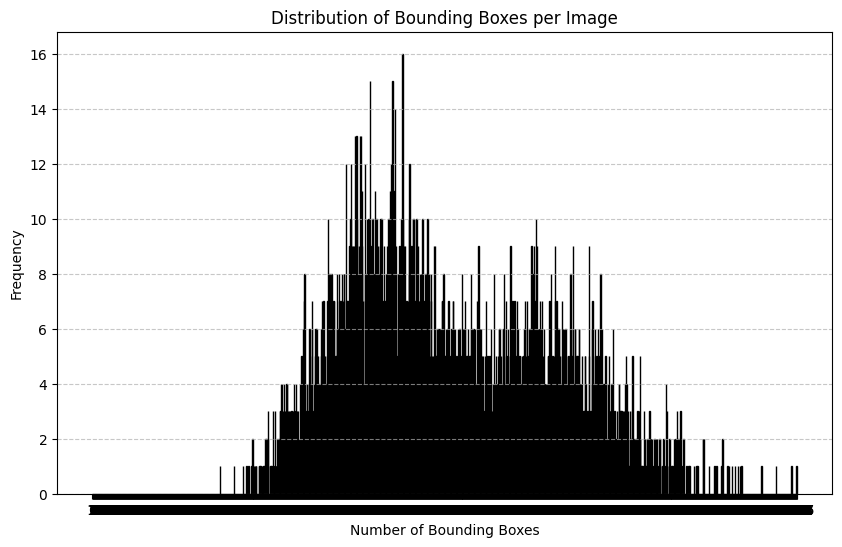

2117 384 1062.6540751385753 1004.0 5176188


In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

# prediction_strings 및 file_names는 기존 코드에서 생성된 결과입니다.

# 바운딩 박스 개수를 저장할 리스트
bbox_counts = []
df = pd.read_csv(r".\datasetensembleweightlimitbreaker.csv",dtype=str)
image_id_column = df['image_id']
prediction_strings = df['PredictionString'].fillna('')
print(prediction_strings)
# prediction_strings에서 바운딩 박스 개수 계산
total=0
for prediction_string in prediction_strings:
    # 바운딩 박스 문자열을 공백으로 나누어 리스트로 변환
    boxes = prediction_string.strip().split()  
    
    # 각 바운딩 박스는 6개의 요소(label, score, x1, y1, x2, y2)로 구성됨
    bbox_count = len(boxes) // 6 if len(boxes) > 0 else 0  # 바운딩 박스의 개수 계산
    bbox_counts.append(bbox_count)
for i in bbox_counts:
    total+=i
# 바운딩 박스 개수 시각화
plt.figure(figsize=(10, 6))
plt.hist(bbox_counts, bins=range(max(bbox_counts) + 1), align='left', color='skyblue', edgecolor='black')
plt.xlabel('Number of Bounding Boxes')
plt.ylabel('Frequency')
plt.title('Distribution of Bounding Boxes per Image')
plt.xticks(range(max(bbox_counts) + 1))  # x축 눈금을 정수로 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print(max(bbox_counts),min(bbox_counts),np.mean(bbox_counts),np.median(bbox_counts),total)